## Google Colab and GitHub Links
- Google colab link if you are using an IDE:
    - https://colab.research.google.com/drive/1ZmUPRiCWr56zcHdCqCqHoiXzjBAybBfb?usp=sharing
- GitHub link:
    - https://github.com/brencemoore/AutoClaimAI
  

## Import Data Set for Evaluation
- Dataset from: https://www.kaggle.com/datasets/gauravduttakiit/vehicle-damage-identification

In [1]:
!pip install gdown

import gdown
import os

file_id = '11fqB0LZeJ5-QmYgQZoM0f1S9hOPQrzf8'
output_filename = 'vehicle-damage-identification.zip'

# Check if the file already exists
if os.path.exists(output_filename):
    print(f"Found existing file: {output_filename}. Removing it now...")
    os.remove(output_filename)
    print("Existing file removed.")
else:
    print(f"No existing file named {output_filename} found. Proceeding with download.")

gdown.download(id=file_id, output=output_filename, quiet=False)

print("Download complete.")

if os.path.exists('data/'):
    print(f"Found existing folder: data/. Removing it now...")
    !rm -r data3a/
    print("Existing folder removed.")
else:
    print(f"No existing folder named data/ found. Proceeding with unzip.")

print("Unzipping data")
!unzip -q vehicle-damage-identification.zip -d data/

!ls -lh


No existing file named vehicle-damage-identification.zip found. Proceeding with download.


Downloading...
From (original): https://drive.google.com/uc?id=11fqB0LZeJ5-QmYgQZoM0f1S9hOPQrzf8
From (redirected): https://drive.google.com/uc?id=11fqB0LZeJ5-QmYgQZoM0f1S9hOPQrzf8&confirm=t&uuid=70381bb9-91a9-4bdc-a1aa-ce7abad3d985
To: /content/vehicle-damage-identification.zip
100%|██████████| 1.60G/1.60G [00:28<00:00, 56.0MB/s]


Download complete.
No existing folder named data/ found. Proceeding with unzip.
Unzipping data
total 1.5G
drwxr-xr-x 5 root root 4.0K Nov 24 05:20 data
drwxr-xr-x 1 root root 4.0K Nov 20 14:30 sample_data
-rw-r--r-- 1 root root 1.5G Nov 24 04:07 vehicle-damage-identification.zip


In [13]:
import pandas as pd
import numpy as np

data_path = './data/test/'

damage_df = pd.DataFrame({'filename': [], 'damage_type': []})

for folder in os.listdir(data_path):
    for filename in os.listdir(f'{data_path}/{folder}'):
        new_row_data = {
            'filename': filename,
            'path_from_test/': f'{folder}/{filename}',
            'damage_type': folder.upper()
        }
        new_row_df = pd.DataFrame([new_row_data])
        damage_df = pd.concat([damage_df, new_row_df], ignore_index=True)

damage_df

,filename,damage_type,path_from_test/
0,6942.jpg,SCRATCH,scratch/6942.jpg
1,6758.jpg,SCRATCH,scratch/6758.jpg
2,3666.jpg,SCRATCH,scratch/3666.jpg
3,1093.jpg,SCRATCH,scratch/1093.jpg
4,5488.jpg,SCRATCH,scratch/5488.jpg
...,...,...,...
1435,2004.jpg,DENT,dent/2004.jpg
1436,3112.jpg,DENT,dent/3112.jpg
1437,4248.jpg,DENT,dent/4248.jpg
1438,6318.jpg,DENT,dent/6318.jpg


## Import Model Used for Damage Severity Classification
- Same as used in GitHub and function pipeline
- Source from: https://huggingface.co/beingamit99/car_damage_detection



In [4]:
# YOU MAY NEED TO RESTART SESSION AFTER RUNNING THIS TO REMOVE ERRORS
!pip install --upgrade accelerate transformers


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.9/380.9 kB 12.4 MB/s eta 0:00:00
  Attempting uninstall: accelerate
    Found existing installation: accelerate 1.11.0
    Uninstalling accelerate-1.11.0:
      Successfully uninstalled accelerate-1.11.0


In [14]:
# Classifies the type of damage on the car
def classify_damage(image_path):
    from transformers import pipeline
    pipe = pipeline("image-classification", model="beingamit99/car_damage_detection", device=0, use_fast=True)
    result = pipe(image_path)
    print(f'Results: {result}')
    best = max(result, key=lambda x: x['score'])
    return best['label'].upper()


In [16]:
# Test if model works on 1 image

damage_type = classify_damage(f'{data_path}/{damage_df['path_from_test/'][0]}')

print(f'\nPrediction: {damage_type}')
print(f'Actual: {damage_df['damage_type'][0]}')

Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691663980484009}, {'label': 'Crack', 'score': 0.006856065709143877}, {'label': 'Dent', 'score': 0.006398818921297789}, {'label': 'Lamp Broken', 'score': 0.00618007080629468}, {'label': 'Glass Shatter', 'score': 0.005795549135655165}]

Prediction: SCRATCH
Actual: SCRATCH


### Evaluate Model
- WILL TAKE A VERY LONG TIME TO RUN DEPENDING ON SAMPLE SIZE


In [18]:
pred_damage = []
count = 1

# Runs predictions for each file in the sampled dataset
for row in damage_df['path_from_test/']:
    path = f'{data_path}/{row}'
    damage = classify_damage(path)

    pred_damage.append(damage)
    print(f'Files completed: {count}')
    count += 1

print(pred_damage)

Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691663980484009}, {'label': 'Crack', 'score': 0.006856065709143877}, {'label': 'Dent', 'score': 0.006398818921297789}, {'label': 'Lamp Broken', 'score': 0.00618007080629468}, {'label': 'Glass Shatter', 'score': 0.005795549135655165}]
Files completed: 1


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662942290306091}, {'label': 'Dent', 'score': 0.010366304777562618}, {'label': 'Glass Shatter', 'score': 0.006383812520653009}, {'label': 'Crack', 'score': 0.006121751386672258}, {'label': 'Lamp Broken', 'score': 0.005780129227787256}]
Files completed: 2


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679610729217529}, {'label': 'Crack', 'score': 0.008055036887526512}, {'label': 'Tire Flat', 'score': 0.00659442413598299}, {'label': 'Lamp Broken', 'score': 0.00599478418007493}, {'label': 'Dent', 'score': 0.005889098159968853}]
Files completed: 3


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.966000497341156}, {'label': 'Glass Shatter', 'score': 0.009528269059956074}, {'label': 'Dent', 'score': 0.006808592472225428}, {'label': 'Lamp Broken', 'score': 0.006777373608201742}, {'label': 'Tire Flat', 'score': 0.005731572397053242}]
Files completed: 4


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9684789180755615}, {'label': 'Lamp Broken', 'score': 0.00759101752191782}, {'label': 'Glass Shatter', 'score': 0.00667004007846117}, {'label': 'Crack', 'score': 0.005956493783742189}, {'label': 'Dent', 'score': 0.005667469464242458}]
Files completed: 5


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9673659801483154}, {'label': 'Tire Flat', 'score': 0.007869480177760124}, {'label': 'Crack', 'score': 0.007511662784963846}, {'label': 'Glass Shatter', 'score': 0.005839426536113024}, {'label': 'Dent', 'score': 0.005770706571638584}]
Files completed: 6


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.7671537399291992}, {'label': 'Dent', 'score': 0.18140140175819397}, {'label': 'Lamp Broken', 'score': 0.02430041879415512}, {'label': 'Glass Shatter', 'score': 0.013610197231173515}, {'label': 'Tire Flat', 'score': 0.006951143033802509}]
Files completed: 7


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677198529243469}, {'label': 'Dent', 'score': 0.007496602833271027}, {'label': 'Tire Flat', 'score': 0.007111106533557177}, {'label': 'Glass Shatter', 'score': 0.0067772455513477325}, {'label': 'Lamp Broken', 'score': 0.006116772536188364}]
Files completed: 8


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685090184211731}, {'label': 'Dent', 'score': 0.00876537524163723}, {'label': 'Tire Flat', 'score': 0.005942198913544416}, {'label': 'Lamp Broken', 'score': 0.0058478680439293385}, {'label': 'Crack', 'score': 0.005825257860124111}]
Files completed: 9


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664321541786194}, {'label': 'Dent', 'score': 0.0107345599681139}, {'label': 'Lamp Broken', 'score': 0.0063575576059520245}, {'label': 'Tire Flat', 'score': 0.006032089702785015}, {'label': 'Glass Shatter', 'score': 0.005932432133704424}]
Files completed: 10


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677102565765381}, {'label': 'Crack', 'score': 0.008293177001178265}, {'label': 'Glass Shatter', 'score': 0.006802561692893505}, {'label': 'Dent', 'score': 0.006191485095769167}, {'label': 'Lamp Broken', 'score': 0.005831168033182621}]
Files completed: 11


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688801765441895}, {'label': 'Dent', 'score': 0.00686144083738327}, {'label': 'Glass Shatter', 'score': 0.006781761068850756}, {'label': 'Tire Flat', 'score': 0.006010445300489664}, {'label': 'Lamp Broken', 'score': 0.005934671498835087}]
Files completed: 12


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688513875007629}, {'label': 'Tire Flat', 'score': 0.006904662121087313}, {'label': 'Dent', 'score': 0.0062599992379546165}, {'label': 'Crack', 'score': 0.006138504017144442}, {'label': 'Lamp Broken', 'score': 0.006090153474360704}]
Files completed: 13


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9628685712814331}, {'label': 'Dent', 'score': 0.010765396989881992}, {'label': 'Lamp Broken', 'score': 0.007582616992294788}, {'label': 'Glass Shatter', 'score': 0.006897295825183392}, {'label': 'Crack', 'score': 0.0059920744970440865}]
Files completed: 14


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671530723571777}, {'label': 'Glass Shatter', 'score': 0.008100390434265137}, {'label': 'Crack', 'score': 0.006772782187908888}, {'label': 'Tire Flat', 'score': 0.006697062868624926}, {'label': 'Lamp Broken', 'score': 0.006380897015333176}]
Files completed: 15


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677996039390564}, {'label': 'Crack', 'score': 0.007055019028484821}, {'label': 'Tire Flat', 'score': 0.006506859324872494}, {'label': 'Dent', 'score': 0.006493162363767624}, {'label': 'Glass Shatter', 'score': 0.006112820468842983}]
Files completed: 16


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9555515050888062}, {'label': 'Tire Flat', 'score': 0.015217451378703117}, {'label': 'Dent', 'score': 0.009252124466001987}, {'label': 'Crack', 'score': 0.008177525363862514}, {'label': 'Glass Shatter', 'score': 0.006390605587512255}]
Files completed: 17


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666767120361328}, {'label': 'Tire Flat', 'score': 0.00751442601904273}, {'label': 'Crack', 'score': 0.007134906481951475}, {'label': 'Lamp Broken', 'score': 0.006918706931173801}, {'label': 'Dent', 'score': 0.005991680547595024}]
Files completed: 18


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9637993574142456}, {'label': 'Tire Flat', 'score': 0.010890557430684566}, {'label': 'Crack', 'score': 0.006914107594639063}, {'label': 'Lamp Broken', 'score': 0.006825684569776058}, {'label': 'Glass Shatter', 'score': 0.006383247673511505}]
Files completed: 19


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680209159851074}, {'label': 'Lamp Broken', 'score': 0.00723696406930685}, {'label': 'Tire Flat', 'score': 0.007006323430687189}, {'label': 'Dent', 'score': 0.006339406128972769}, {'label': 'Crack', 'score': 0.005779917351901531}]
Files completed: 20


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681412577629089}, {'label': 'Dent', 'score': 0.008055857382714748}, {'label': 'Glass Shatter', 'score': 0.007544749416410923}, {'label': 'Lamp Broken', 'score': 0.005526506341993809}, {'label': 'Crack', 'score': 0.005490160547196865}]
Files completed: 21


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680536389350891}, {'label': 'Crack', 'score': 0.007966592907905579}, {'label': 'Dent', 'score': 0.006469641346484423}, {'label': 'Tire Flat', 'score': 0.006120236124843359}, {'label': 'Glass Shatter', 'score': 0.005719697568565607}]
Files completed: 22


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664915204048157}, {'label': 'Tire Flat', 'score': 0.008216258138418198}, {'label': 'Glass Shatter', 'score': 0.006880070548504591}, {'label': 'Crack', 'score': 0.00671389140188694}, {'label': 'Lamp Broken', 'score': 0.006367547903209925}]
Files completed: 23


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9623838067054749}, {'label': 'Glass Shatter', 'score': 0.012014457024633884}, {'label': 'Lamp Broken', 'score': 0.0068544503301382065}, {'label': 'Tire Flat', 'score': 0.0067331138998270035}, {'label': 'Dent', 'score': 0.006129330024123192}]
Files completed: 24


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9553524851799011}, {'label': 'Tire Flat', 'score': 0.015123957768082619}, {'label': 'Dent', 'score': 0.009393878281116486}, {'label': 'Lamp Broken', 'score': 0.008348667994141579}, {'label': 'Glass Shatter', 'score': 0.007665806449949741}]
Files completed: 25


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9667815566062927}, {'label': 'Lamp Broken', 'score': 0.008241061121225357}, {'label': 'Dent', 'score': 0.0074270134791731834}, {'label': 'Glass Shatter', 'score': 0.007050264626741409}, {'label': 'Tire Flat', 'score': 0.005942392162978649}]
Files completed: 26


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9606456160545349}, {'label': 'Dent', 'score': 0.015110762789845467}, {'label': 'Lamp Broken', 'score': 0.006886807736009359}, {'label': 'Glass Shatter', 'score': 0.0065623074769973755}, {'label': 'Crack', 'score': 0.0054719592444598675}]
Files completed: 27


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674527645111084}, {'label': 'Lamp Broken', 'score': 0.0075350673869252205}, {'label': 'Glass Shatter', 'score': 0.006985956337302923}, {'label': 'Tire Flat', 'score': 0.006904729641973972}, {'label': 'Dent', 'score': 0.006494253873825073}]
Files completed: 28


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969362735748291}, {'label': 'Dent', 'score': 0.007399083115160465}, {'label': 'Tire Flat', 'score': 0.006256557069718838}, {'label': 'Glass Shatter', 'score': 0.006037394981831312}, {'label': 'Crack', 'score': 0.0056596724316477776}]
Files completed: 29


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676588177680969}, {'label': 'Dent', 'score': 0.007512550335377455}, {'label': 'Lamp Broken', 'score': 0.007377295289188623}, {'label': 'Glass Shatter', 'score': 0.006867960561066866}, {'label': 'Tire Flat', 'score': 0.006239620968699455}]
Files completed: 30


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9693474769592285}, {'label': 'Dent', 'score': 0.006508154794573784}, {'label': 'Glass Shatter', 'score': 0.006457020994275808}, {'label': 'Tire Flat', 'score': 0.006057950668036938}, {'label': 'Crack', 'score': 0.006005662027746439}]
Files completed: 31


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9623501300811768}, {'label': 'Dent', 'score': 0.011333335191011429}, {'label': 'Crack', 'score': 0.006972434464842081}, {'label': 'Glass Shatter', 'score': 0.006708810105919838}, {'label': 'Tire Flat', 'score': 0.006679325830191374}]
Files completed: 32


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9648756980895996}, {'label': 'Dent', 'score': 0.010533488355576992}, {'label': 'Glass Shatter', 'score': 0.007520090322941542}, {'label': 'Crack', 'score': 0.006282048299908638}, {'label': 'Tire Flat', 'score': 0.005600420758128166}]
Files completed: 33


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682451486587524}, {'label': 'Dent', 'score': 0.007933232933282852}, {'label': 'Tire Flat', 'score': 0.006419731769710779}, {'label': 'Lamp Broken', 'score': 0.006194936577230692}, {'label': 'Crack', 'score': 0.005659868475049734}]
Files completed: 34


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9670591950416565}, {'label': 'Dent', 'score': 0.010690554976463318}, {'label': 'Lamp Broken', 'score': 0.005844715517014265}, {'label': 'Crack', 'score': 0.005536532029509544}, {'label': 'Glass Shatter', 'score': 0.005454060155898333}]
Files completed: 35


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679889678955078}, {'label': 'Dent', 'score': 0.007292565423995256}, {'label': 'Tire Flat', 'score': 0.006975967902690172}, {'label': 'Glass Shatter', 'score': 0.006193085107952356}, {'label': 'Lamp Broken', 'score': 0.0061199902556836605}]
Files completed: 36


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9644755125045776}, {'label': 'Lamp Broken', 'score': 0.008133910596370697}, {'label': 'Tire Flat', 'score': 0.00751354219391942}, {'label': 'Glass Shatter', 'score': 0.006840753369033337}, {'label': 'Dent', 'score': 0.006766387261450291}]
Files completed: 37


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664014577865601}, {'label': 'Glass Shatter', 'score': 0.009165896102786064}, {'label': 'Dent', 'score': 0.006959838327020407}, {'label': 'Lamp Broken', 'score': 0.0064598750323057175}, {'label': 'Crack', 'score': 0.005657180678099394}]
Files completed: 38


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9683434367179871}, {'label': 'Tire Flat', 'score': 0.007566662039607763}, {'label': 'Glass Shatter', 'score': 0.006345144473016262}, {'label': 'Dent', 'score': 0.006279597524553537}, {'label': 'Lamp Broken', 'score': 0.005735910031944513}]
Files completed: 39


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9658379554748535}, {'label': 'Lamp Broken', 'score': 0.009065229445695877}, {'label': 'Tire Flat', 'score': 0.007970089092850685}, {'label': 'Dent', 'score': 0.006424223072826862}, {'label': 'Glass Shatter', 'score': 0.005613089073449373}]
Files completed: 40


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689825773239136}, {'label': 'Tire Flat', 'score': 0.006895432714372873}, {'label': 'Dent', 'score': 0.006785464007407427}, {'label': 'Glass Shatter', 'score': 0.005949690006673336}, {'label': 'Crack', 'score': 0.005792560055851936}]
Files completed: 41


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9697722792625427}, {'label': 'Dent', 'score': 0.006843927316367626}, {'label': 'Crack', 'score': 0.00632441183552146}, {'label': 'Tire Flat', 'score': 0.005811493378132582}, {'label': 'Lamp Broken', 'score': 0.005684495437890291}]
Files completed: 42


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9678379893302917}, {'label': 'Crack', 'score': 0.0074288989417254925}, {'label': 'Tire Flat', 'score': 0.006495141424238682}, {'label': 'Lamp Broken', 'score': 0.006489959545433521}, {'label': 'Glass Shatter', 'score': 0.006188582628965378}]
Files completed: 43


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681564569473267}, {'label': 'Crack', 'score': 0.007647139020264149}, {'label': 'Tire Flat', 'score': 0.006622265093028545}, {'label': 'Lamp Broken', 'score': 0.00611675763502717}, {'label': 'Dent', 'score': 0.006009917706251144}]
Files completed: 44


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967122495174408}, {'label': 'Tire Flat', 'score': 0.007307833060622215}, {'label': 'Glass Shatter', 'score': 0.007273194380104542}, {'label': 'Lamp Broken', 'score': 0.006371814291924238}, {'label': 'Crack', 'score': 0.006329002790153027}]
Files completed: 45


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9693810939788818}, {'label': 'Glass Shatter', 'score': 0.0062812622636556625}, {'label': 'Dent', 'score': 0.0061891344375908375}, {'label': 'Tire Flat', 'score': 0.006080299615859985}, {'label': 'Lamp Broken', 'score': 0.006075871177017689}]
Files completed: 46


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9687187075614929}, {'label': 'Crack', 'score': 0.006951767951250076}, {'label': 'Tire Flat', 'score': 0.006599711254239082}, {'label': 'Glass Shatter', 'score': 0.006458847783505917}, {'label': 'Dent', 'score': 0.005703555885702372}]
Files completed: 47


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664499759674072}, {'label': 'Glass Shatter', 'score': 0.010027183219790459}, {'label': 'Dent', 'score': 0.006425719242542982}, {'label': 'Lamp Broken', 'score': 0.005865805316716433}, {'label': 'Crack', 'score': 0.005663659423589706}]
Files completed: 48


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679223299026489}, {'label': 'Glass Shatter', 'score': 0.007260538171976805}, {'label': 'Tire Flat', 'score': 0.006892697419971228}, {'label': 'Crack', 'score': 0.00621015252545476}, {'label': 'Dent', 'score': 0.005879816599190235}]
Files completed: 49


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671215415000916}, {'label': 'Dent', 'score': 0.009279593825340271}, {'label': 'Lamp Broken', 'score': 0.006853040773421526}, {'label': 'Glass Shatter', 'score': 0.0064515722915530205}, {'label': 'Crack', 'score': 0.005807720124721527}]
Files completed: 50


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9656716585159302}, {'label': 'Lamp Broken', 'score': 0.008789324201643467}, {'label': 'Glass Shatter', 'score': 0.007507540285587311}, {'label': 'Crack', 'score': 0.006737771909683943}, {'label': 'Tire Flat', 'score': 0.005887772887945175}]
Files completed: 51


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9636526703834534}, {'label': 'Glass Shatter', 'score': 0.01125043723732233}, {'label': 'Tire Flat', 'score': 0.007001458201557398}, {'label': 'Lamp Broken', 'score': 0.006521951407194138}, {'label': 'Dent', 'score': 0.005837540607899427}]
Files completed: 52


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662639498710632}, {'label': 'Glass Shatter', 'score': 0.008557766675949097}, {'label': 'Crack', 'score': 0.007220209576189518}, {'label': 'Lamp Broken', 'score': 0.006703568156808615}, {'label': 'Tire Flat', 'score': 0.005660045892000198}]
Files completed: 53


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9672149419784546}, {'label': 'Dent', 'score': 0.00894847046583891}, {'label': 'Tire Flat', 'score': 0.007456390652805567}, {'label': 'Lamp Broken', 'score': 0.006266225595027208}, {'label': 'Glass Shatter', 'score': 0.005687201861292124}]
Files completed: 54


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9658601880073547}, {'label': 'Glass Shatter', 'score': 0.009536667726933956}, {'label': 'Dent', 'score': 0.008033121936023235}, {'label': 'Lamp Broken', 'score': 0.005992994178086519}, {'label': 'Crack', 'score': 0.00530701270326972}]
Files completed: 55


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675431847572327}, {'label': 'Glass Shatter', 'score': 0.007826851680874825}, {'label': 'Dent', 'score': 0.0069778794422745705}, {'label': 'Lamp Broken', 'score': 0.006480018142610788}, {'label': 'Tire Flat', 'score': 0.005588554311543703}]
Files completed: 56


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679038524627686}, {'label': 'Tire Flat', 'score': 0.007576120551675558}, {'label': 'Dent', 'score': 0.0064740898087620735}, {'label': 'Glass Shatter', 'score': 0.006433582399040461}, {'label': 'Lamp Broken', 'score': 0.006192439701408148}]
Files completed: 57


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664162397384644}, {'label': 'Lamp Broken', 'score': 0.00920349545776844}, {'label': 'Dent', 'score': 0.007408593315631151}, {'label': 'Tire Flat', 'score': 0.0060860286466777325}, {'label': 'Glass Shatter', 'score': 0.00572363194078207}]
Files completed: 58


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662009477615356}, {'label': 'Lamp Broken', 'score': 0.008535104803740978}, {'label': 'Tire Flat', 'score': 0.0076753124594688416}, {'label': 'Dent', 'score': 0.0070824166759848595}, {'label': 'Crack', 'score': 0.005286463536322117}]
Files completed: 59


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.965323269367218}, {'label': 'Dent', 'score': 0.01191483624279499}, {'label': 'Lamp Broken', 'score': 0.006159938406199217}, {'label': 'Tire Flat', 'score': 0.005959353409707546}, {'label': 'Crack', 'score': 0.005855388939380646}]
Files completed: 60


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9648138880729675}, {'label': 'Glass Shatter', 'score': 0.008708249777555466}, {'label': 'Dent', 'score': 0.008238347247242928}, {'label': 'Tire Flat', 'score': 0.0073576681315898895}, {'label': 'Lamp Broken', 'score': 0.005618399474769831}]
Files completed: 61


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9427531361579895}, {'label': 'Dent', 'score': 0.01850697211921215}, {'label': 'Glass Shatter', 'score': 0.012380595318973064}, {'label': 'Lamp Broken', 'score': 0.011890451423823833}, {'label': 'Tire Flat', 'score': 0.007665486540645361}]
Files completed: 62


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9644098877906799}, {'label': 'Crack', 'score': 0.008728651329874992}, {'label': 'Dent', 'score': 0.008289886638522148}, {'label': 'Lamp Broken', 'score': 0.0066225226037204266}, {'label': 'Glass Shatter', 'score': 0.006106419488787651}]
Files completed: 63


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675335884094238}, {'label': 'Lamp Broken', 'score': 0.007502185646444559}, {'label': 'Dent', 'score': 0.007316463626921177}, {'label': 'Tire Flat', 'score': 0.007035577204078436}, {'label': 'Glass Shatter', 'score': 0.0053102485835552216}]
Files completed: 64


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9580507278442383}, {'label': 'Lamp Broken', 'score': 0.012417561374604702}, {'label': 'Dent', 'score': 0.012099961750209332}, {'label': 'Glass Shatter', 'score': 0.0074141863733530045}, {'label': 'Tire Flat', 'score': 0.005355114582926035}]
Files completed: 65


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686169028282166}, {'label': 'Glass Shatter', 'score': 0.006839030422270298}, {'label': 'Crack', 'score': 0.006563609931617975}, {'label': 'Tire Flat', 'score': 0.006370477844029665}, {'label': 'Lamp Broken', 'score': 0.006110012531280518}]
Files completed: 66


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9663132429122925}, {'label': 'Crack', 'score': 0.007717640604823828}, {'label': 'Tire Flat', 'score': 0.007481139153242111}, {'label': 'Glass Shatter', 'score': 0.007148458156734705}, {'label': 'Lamp Broken', 'score': 0.006577058229595423}]
Files completed: 67


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676896333694458}, {'label': 'Lamp Broken', 'score': 0.007329677697271109}, {'label': 'Glass Shatter', 'score': 0.007082577329128981}, {'label': 'Dent', 'score': 0.006359148770570755}, {'label': 'Crack', 'score': 0.005976497195661068}]
Files completed: 68


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9590234756469727}, {'label': 'Tire Flat', 'score': 0.017140885815024376}, {'label': 'Crack', 'score': 0.006203694734722376}, {'label': 'Glass Shatter', 'score': 0.005976655054837465}, {'label': 'Dent', 'score': 0.005898497067391872}]
Files completed: 69


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9683822989463806}, {'label': 'Dent', 'score': 0.007377631030976772}, {'label': 'Glass Shatter', 'score': 0.006568559445440769}, {'label': 'Crack', 'score': 0.006341370288282633}, {'label': 'Tire Flat', 'score': 0.006023509427905083}]
Files completed: 70


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9446192383766174}, {'label': 'Tire Flat', 'score': 0.025110706686973572}, {'label': 'Dent', 'score': 0.010137204080820084}, {'label': 'Lamp Broken', 'score': 0.007107358891516924}, {'label': 'Crack', 'score': 0.006710020825266838}]
Files completed: 71


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675076007843018}, {'label': 'Crack', 'score': 0.00931722391396761}, {'label': 'Dent', 'score': 0.006159096024930477}, {'label': 'Glass Shatter', 'score': 0.005891599226742983}, {'label': 'Tire Flat', 'score': 0.0056368643417954445}]
Files completed: 72


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679506421089172}, {'label': 'Crack', 'score': 0.0073311966843903065}, {'label': 'Lamp Broken', 'score': 0.006724758539348841}, {'label': 'Tire Flat', 'score': 0.006425808183848858}, {'label': 'Glass Shatter', 'score': 0.00590664055198431}]
Files completed: 73


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680768847465515}, {'label': 'Crack', 'score': 0.006924235727638006}, {'label': 'Lamp Broken', 'score': 0.006846275180578232}, {'label': 'Dent', 'score': 0.0066705504432320595}, {'label': 'Tire Flat', 'score': 0.005943907890468836}]
Files completed: 74


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9636573195457458}, {'label': 'Dent', 'score': 0.00921327993273735}, {'label': 'Crack', 'score': 0.008252625353634357}, {'label': 'Lamp Broken', 'score': 0.007712398190051317}, {'label': 'Glass Shatter', 'score': 0.00583893246948719}]
Files completed: 75


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9661898612976074}, {'label': 'Glass Shatter', 'score': 0.009549570269882679}, {'label': 'Dent', 'score': 0.007414253894239664}, {'label': 'Lamp Broken', 'score': 0.006962901446968317}, {'label': 'Crack', 'score': 0.004998974036425352}]
Files completed: 76


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675595760345459}, {'label': 'Dent', 'score': 0.0096436757594347}, {'label': 'Tire Flat', 'score': 0.0060371775180101395}, {'label': 'Glass Shatter', 'score': 0.005961705930531025}, {'label': 'Lamp Broken', 'score': 0.00596004631370306}]
Files completed: 77


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9640316367149353}, {'label': 'Dent', 'score': 0.010260311886668205}, {'label': 'Tire Flat', 'score': 0.008691757917404175}, {'label': 'Lamp Broken', 'score': 0.00712434621527791}, {'label': 'Glass Shatter', 'score': 0.005950459744781256}]
Files completed: 78


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685229659080505}, {'label': 'Dent', 'score': 0.00768005196005106}, {'label': 'Crack', 'score': 0.006852320861071348}, {'label': 'Lamp Broken', 'score': 0.005953862797468901}, {'label': 'Glass Shatter', 'score': 0.005671511869877577}]
Files completed: 79


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9433958530426025}, {'label': 'Dent', 'score': 0.02272793836891651}, {'label': 'Tire Flat', 'score': 0.013998296111822128}, {'label': 'Glass Shatter', 'score': 0.00742507167160511}, {'label': 'Lamp Broken', 'score': 0.006534375250339508}]
Files completed: 80


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9696319699287415}, {'label': 'Glass Shatter', 'score': 0.0065786512568593025}, {'label': 'Crack', 'score': 0.006492037791758776}, {'label': 'Lamp Broken', 'score': 0.006025348789989948}, {'label': 'Dent', 'score': 0.005952564533799887}]
Files completed: 81


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9646899104118347}, {'label': 'Glass Shatter', 'score': 0.011249030940234661}, {'label': 'Lamp Broken', 'score': 0.006283633876591921}, {'label': 'Crack', 'score': 0.006100211758166552}, {'label': 'Dent', 'score': 0.006046433467417955}]
Files completed: 82


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671136140823364}, {'label': 'Tire Flat', 'score': 0.009137766435742378}, {'label': 'Dent', 'score': 0.006710323505103588}, {'label': 'Lamp Broken', 'score': 0.006290790159255266}, {'label': 'Glass Shatter', 'score': 0.00539821945130825}]
Files completed: 83


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.7524468898773193}, {'label': 'Scratch', 'score': 0.20495139062404633}, {'label': 'Crack', 'score': 0.013573821634054184}, {'label': 'Lamp Broken', 'score': 0.011119546368718147}, {'label': 'Glass Shatter', 'score': 0.009169751778244972}]
Files completed: 84


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9598761200904846}, {'label': 'Crack', 'score': 0.011998742818832397}, {'label': 'Tire Flat', 'score': 0.01043020747601986}, {'label': 'Dent', 'score': 0.006327248178422451}, {'label': 'Lamp Broken', 'score': 0.005940062925219536}]
Files completed: 85


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.8702977895736694}, {'label': 'Dent', 'score': 0.09949786216020584}, {'label': 'Crack', 'score': 0.008057032711803913}, {'label': 'Tire Flat', 'score': 0.007757037878036499}, {'label': 'Glass Shatter', 'score': 0.007472588215023279}]
Files completed: 86


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690139889717102}, {'label': 'Dent', 'score': 0.008274124003946781}, {'label': 'Glass Shatter', 'score': 0.006305193528532982}, {'label': 'Lamp Broken', 'score': 0.005653585307300091}, {'label': 'Tire Flat', 'score': 0.0054095592349767685}]
Files completed: 87


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9663718342781067}, {'label': 'Crack', 'score': 0.007925434038043022}, {'label': 'Glass Shatter', 'score': 0.0072156875394284725}, {'label': 'Lamp Broken', 'score': 0.006530154496431351}, {'label': 'Tire Flat', 'score': 0.006276880856603384}]
Files completed: 88


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681990146636963}, {'label': 'Lamp Broken', 'score': 0.007559082470834255}, {'label': 'Glass Shatter', 'score': 0.007306509185582399}, {'label': 'Dent', 'score': 0.005870681256055832}, {'label': 'Crack', 'score': 0.005706087686121464}]
Files completed: 89


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9619240760803223}, {'label': 'Lamp Broken', 'score': 0.011814475059509277}, {'label': 'Dent', 'score': 0.008250342682003975}, {'label': 'Glass Shatter', 'score': 0.0066173262894153595}, {'label': 'Tire Flat', 'score': 0.006183067336678505}]
Files completed: 90


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692608118057251}, {'label': 'Tire Flat', 'score': 0.006468893028795719}, {'label': 'Crack', 'score': 0.006452349945902824}, {'label': 'Dent', 'score': 0.006371940486133099}, {'label': 'Glass Shatter', 'score': 0.005902182310819626}]
Files completed: 91


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9694274663925171}, {'label': 'Dent', 'score': 0.007288085296750069}, {'label': 'Lamp Broken', 'score': 0.007087586913257837}, {'label': 'Tire Flat', 'score': 0.005717625841498375}, {'label': 'Glass Shatter', 'score': 0.005589743610471487}]
Files completed: 92


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9583455920219421}, {'label': 'Dent', 'score': 0.01506091095507145}, {'label': 'Lamp Broken', 'score': 0.008747552521526814}, {'label': 'Glass Shatter', 'score': 0.006928408518433571}, {'label': 'Tire Flat', 'score': 0.0064150248654186726}]
Files completed: 93


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691307544708252}, {'label': 'Crack', 'score': 0.007064451463520527}, {'label': 'Dent', 'score': 0.006312439683824778}, {'label': 'Glass Shatter', 'score': 0.006027922499924898}, {'label': 'Tire Flat', 'score': 0.005761662498116493}]
Files completed: 94


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9667083621025085}, {'label': 'Tire Flat', 'score': 0.008331973105669022}, {'label': 'Crack', 'score': 0.0072905272245407104}, {'label': 'Lamp Broken', 'score': 0.00665650051087141}, {'label': 'Glass Shatter', 'score': 0.005678136833012104}]
Files completed: 95


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9625956416130066}, {'label': 'Crack', 'score': 0.011659886687994003}, {'label': 'Glass Shatter', 'score': 0.007619886193424463}, {'label': 'Dent', 'score': 0.006330988369882107}, {'label': 'Lamp Broken', 'score': 0.006089714355766773}]
Files completed: 96


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9670382142066956}, {'label': 'Glass Shatter', 'score': 0.006992662791162729}, {'label': 'Crack', 'score': 0.006780573166906834}, {'label': 'Dent', 'score': 0.006762251723557711}, {'label': 'Lamp Broken', 'score': 0.0064059291034936905}]
Files completed: 97


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9656202793121338}, {'label': 'Glass Shatter', 'score': 0.009100588038563728}, {'label': 'Dent', 'score': 0.007928693667054176}, {'label': 'Lamp Broken', 'score': 0.0063509391620755196}, {'label': 'Tire Flat', 'score': 0.005813111085444689}]
Files completed: 98


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.6642646193504333}, {'label': 'Dent', 'score': 0.2923735976219177}, {'label': 'Crack', 'score': 0.01618073135614395}, {'label': 'Glass Shatter', 'score': 0.00944906659424305}, {'label': 'Tire Flat', 'score': 0.00899527221918106}]
Files completed: 99


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679247736930847}, {'label': 'Dent', 'score': 0.007712057791650295}, {'label': 'Glass Shatter', 'score': 0.007140978239476681}, {'label': 'Tire Flat', 'score': 0.00600188784301281}, {'label': 'Crack', 'score': 0.005889200139790773}]
Files completed: 100


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9648935794830322}, {'label': 'Lamp Broken', 'score': 0.00936830136924982}, {'label': 'Dent', 'score': 0.007662580348551273}, {'label': 'Crack', 'score': 0.007453485392034054}, {'label': 'Glass Shatter', 'score': 0.005632475018501282}]
Files completed: 101


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.7936935424804688}, {'label': 'Lamp Broken', 'score': 0.1531393676996231}, {'label': 'Crack', 'score': 0.02118486538529396}, {'label': 'Dent', 'score': 0.017878761515021324}, {'label': 'Glass Shatter', 'score': 0.007090102881193161}]
Files completed: 102


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9479502439498901}, {'label': 'Lamp Broken', 'score': 0.019269591197371483}, {'label': 'Dent', 'score': 0.014607753604650497}, {'label': 'Crack', 'score': 0.007872997783124447}, {'label': 'Glass Shatter', 'score': 0.00580450939014554}]
Files completed: 103


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676822423934937}, {'label': 'Lamp Broken', 'score': 0.007263065781444311}, {'label': 'Tire Flat', 'score': 0.007252963725477457}, {'label': 'Crack', 'score': 0.0066612111404538155}, {'label': 'Dent', 'score': 0.005639881826937199}]
Files completed: 104


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690797328948975}, {'label': 'Dent', 'score': 0.007008424494415522}, {'label': 'Glass Shatter', 'score': 0.006493115797638893}, {'label': 'Lamp Broken', 'score': 0.006043169181793928}, {'label': 'Tire Flat', 'score': 0.005973242223262787}]
Files completed: 105


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674329161643982}, {'label': 'Crack', 'score': 0.007871882058680058}, {'label': 'Tire Flat', 'score': 0.007421655114740133}, {'label': 'Glass Shatter', 'score': 0.00585812097415328}, {'label': 'Lamp Broken', 'score': 0.005813236348330975}]
Files completed: 106


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666731953620911}, {'label': 'Dent', 'score': 0.008072270080447197}, {'label': 'Glass Shatter', 'score': 0.006907594855874777}, {'label': 'Tire Flat', 'score': 0.006630535237491131}, {'label': 'Crack', 'score': 0.005900020245462656}]
Files completed: 107


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676648378372192}, {'label': 'Crack', 'score': 0.0077466899529099464}, {'label': 'Tire Flat', 'score': 0.006764001678675413}, {'label': 'Lamp Broken', 'score': 0.006166706793010235}, {'label': 'Dent', 'score': 0.006120943930000067}]
Files completed: 108


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685830473899841}, {'label': 'Lamp Broken', 'score': 0.007500774692744017}, {'label': 'Glass Shatter', 'score': 0.006769906263798475}, {'label': 'Dent', 'score': 0.006372181233018637}, {'label': 'Tire Flat', 'score': 0.005774705670773983}]
Files completed: 109


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662445783615112}, {'label': 'Tire Flat', 'score': 0.008127405308187008}, {'label': 'Crack', 'score': 0.007724808994680643}, {'label': 'Glass Shatter', 'score': 0.006607703864574432}, {'label': 'Lamp Broken', 'score': 0.006301892455667257}]
Files completed: 110


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9651431441307068}, {'label': 'Dent', 'score': 0.009203760884702206}, {'label': 'Glass Shatter', 'score': 0.007040537893772125}, {'label': 'Tire Flat', 'score': 0.00665623601526022}, {'label': 'Lamp Broken', 'score': 0.006113962270319462}]
Files completed: 111


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691182374954224}, {'label': 'Dent', 'score': 0.0069538382813334465}, {'label': 'Tire Flat', 'score': 0.006364720873534679}, {'label': 'Crack', 'score': 0.00601374264806509}, {'label': 'Glass Shatter', 'score': 0.00592608330771327}]
Files completed: 112


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9663470983505249}, {'label': 'Tire Flat', 'score': 0.009103827178478241}, {'label': 'Glass Shatter', 'score': 0.006564141251146793}, {'label': 'Crack', 'score': 0.006319087464362383}, {'label': 'Lamp Broken', 'score': 0.0059166355058550835}]
Files completed: 113


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682601690292358}, {'label': 'Tire Flat', 'score': 0.008160930126905441}, {'label': 'Glass Shatter', 'score': 0.006310838740319014}, {'label': 'Dent', 'score': 0.005848562344908714}, {'label': 'Lamp Broken', 'score': 0.005754543002694845}]
Files completed: 114


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688134789466858}, {'label': 'Tire Flat', 'score': 0.006734974682331085}, {'label': 'Lamp Broken', 'score': 0.006445068400353193}, {'label': 'Glass Shatter', 'score': 0.006438989192247391}, {'label': 'Crack', 'score': 0.006343010812997818}]
Files completed: 115


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685935378074646}, {'label': 'Crack', 'score': 0.006888938136398792}, {'label': 'Tire Flat', 'score': 0.006859669461846352}, {'label': 'Glass Shatter', 'score': 0.006259100046008825}, {'label': 'Lamp Broken', 'score': 0.006177365779876709}]
Files completed: 116


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9665802717208862}, {'label': 'Lamp Broken', 'score': 0.00748794199898839}, {'label': 'Dent', 'score': 0.0074318572878837585}, {'label': 'Crack', 'score': 0.00639846408739686}, {'label': 'Tire Flat', 'score': 0.006143831182271242}]
Files completed: 117


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.5130743384361267}, {'label': 'Scratch', 'score': 0.44437888264656067}, {'label': 'Lamp Broken', 'score': 0.011763185262680054}, {'label': 'Glass Shatter', 'score': 0.010723570361733437}, {'label': 'Crack', 'score': 0.010110130533576012}]
Files completed: 118


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9570130705833435}, {'label': 'Scratch', 'score': 0.011046664789319038}, {'label': 'Glass Shatter', 'score': 0.008928943425416946}, {'label': 'Tire Flat', 'score': 0.008153272792696953}, {'label': 'Lamp Broken', 'score': 0.007896426133811474}]
Files completed: 119


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.965726912021637}, {'label': 'Dent', 'score': 0.011954164132475853}, {'label': 'Crack', 'score': 0.006055794190615416}, {'label': 'Glass Shatter', 'score': 0.0054756831377744675}, {'label': 'Lamp Broken', 'score': 0.005434980615973473}]
Files completed: 120


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668309092521667}, {'label': 'Lamp Broken', 'score': 0.007906407117843628}, {'label': 'Tire Flat', 'score': 0.007479388732463121}, {'label': 'Glass Shatter', 'score': 0.00668454822152853}, {'label': 'Crack', 'score': 0.006061916705220938}]
Files completed: 121


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9615278244018555}, {'label': 'Glass Shatter', 'score': 0.010402579791843891}, {'label': 'Dent', 'score': 0.009272846393287182}, {'label': 'Lamp Broken', 'score': 0.006994583178311586}, {'label': 'Tire Flat', 'score': 0.006161129102110863}]
Files completed: 122


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9660199284553528}, {'label': 'Dent', 'score': 0.00990239717066288}, {'label': 'Glass Shatter', 'score': 0.006521560717374086}, {'label': 'Tire Flat', 'score': 0.006150109693408012}, {'label': 'Lamp Broken', 'score': 0.005977381952106953}]
Files completed: 123


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9694294929504395}, {'label': 'Crack', 'score': 0.006641050800681114}, {'label': 'Glass Shatter', 'score': 0.006251593120396137}, {'label': 'Lamp Broken', 'score': 0.006002587731927633}, {'label': 'Dent', 'score': 0.005927732679992914}]
Files completed: 124


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675189256668091}, {'label': 'Dent', 'score': 0.0093278419226408}, {'label': 'Tire Flat', 'score': 0.0064993733540177345}, {'label': 'Lamp Broken', 'score': 0.0063648102805018425}, {'label': 'Crack', 'score': 0.005242165178060532}]
Files completed: 125


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9687934517860413}, {'label': 'Dent', 'score': 0.009332539513707161}, {'label': 'Glass Shatter', 'score': 0.00559195363894105}, {'label': 'Tire Flat', 'score': 0.005566536448895931}, {'label': 'Lamp Broken', 'score': 0.0054955570958554745}]
Files completed: 126


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676728844642639}, {'label': 'Tire Flat', 'score': 0.007880994118750095}, {'label': 'Lamp Broken', 'score': 0.00659559853374958}, {'label': 'Dent', 'score': 0.006416089832782745}, {'label': 'Crack', 'score': 0.00571982329711318}]
Files completed: 127


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662463665008545}, {'label': 'Crack', 'score': 0.008083460852503777}, {'label': 'Lamp Broken', 'score': 0.007076574489474297}, {'label': 'Tire Flat', 'score': 0.00690520741045475}, {'label': 'Dent', 'score': 0.006276161875575781}]
Files completed: 128


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.955618679523468}, {'label': 'Dent', 'score': 0.0173391941934824}, {'label': 'Lamp Broken', 'score': 0.009726476855576038}, {'label': 'Tire Flat', 'score': 0.0074849482625722885}, {'label': 'Glass Shatter', 'score': 0.006060804706066847}]
Files completed: 129


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.7470126748085022}, {'label': 'Scratch', 'score': 0.20817312598228455}, {'label': 'Crack', 'score': 0.014791173860430717}, {'label': 'Glass Shatter', 'score': 0.012290677055716515}, {'label': 'Lamp Broken', 'score': 0.009173081256449223}]
Files completed: 130


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.943223237991333}, {'label': 'Dent', 'score': 0.022365976125001907}, {'label': 'Lamp Broken', 'score': 0.016381457448005676}, {'label': 'Glass Shatter', 'score': 0.00720765208825469}, {'label': 'Tire Flat', 'score': 0.006495970766991377}]
Files completed: 131


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682889580726624}, {'label': 'Tire Flat', 'score': 0.007189634721726179}, {'label': 'Glass Shatter', 'score': 0.00653563579544425}, {'label': 'Lamp Broken', 'score': 0.006122780032455921}, {'label': 'Crack', 'score': 0.005942090414464474}]
Files completed: 132


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9669492840766907}, {'label': 'Lamp Broken', 'score': 0.007181269582360983}, {'label': 'Glass Shatter', 'score': 0.007114051841199398}, {'label': 'Crack', 'score': 0.006372237578034401}, {'label': 'Dent', 'score': 0.006301937159150839}]
Files completed: 133


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9672654867172241}, {'label': 'Tire Flat', 'score': 0.007533099967986345}, {'label': 'Crack', 'score': 0.007399068213999271}, {'label': 'Glass Shatter', 'score': 0.006293461658060551}, {'label': 'Dent', 'score': 0.006102383602410555}]
Files completed: 134


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9694606065750122}, {'label': 'Dent', 'score': 0.006741945166140795}, {'label': 'Crack', 'score': 0.006379290018230677}, {'label': 'Lamp Broken', 'score': 0.006266477983444929}, {'label': 'Tire Flat', 'score': 0.005738360807299614}]
Files completed: 135


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689173102378845}, {'label': 'Glass Shatter', 'score': 0.006853875238448381}, {'label': 'Lamp Broken', 'score': 0.006784592289477587}, {'label': 'Dent', 'score': 0.006763745564967394}, {'label': 'Crack', 'score': 0.005482750479131937}]
Files completed: 136


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9643436074256897}, {'label': 'Glass Shatter', 'score': 0.010189797729253769}, {'label': 'Dent', 'score': 0.008490375243127346}, {'label': 'Lamp Broken', 'score': 0.0060203601606190205}, {'label': 'Tire Flat', 'score': 0.005488164722919464}]
Files completed: 137


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.963944137096405}, {'label': 'Dent', 'score': 0.011797341518104076}, {'label': 'Lamp Broken', 'score': 0.006997683551162481}, {'label': 'Tire Flat', 'score': 0.006760335061699152}, {'label': 'Glass Shatter', 'score': 0.005923149175941944}]
Files completed: 138


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9487048983573914}, {'label': 'Dent', 'score': 0.024334440007805824}, {'label': 'Crack', 'score': 0.008335956372320652}, {'label': 'Lamp Broken', 'score': 0.006705146748572588}, {'label': 'Tire Flat', 'score': 0.006315829232335091}]
Files completed: 139


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9625548720359802}, {'label': 'Dent', 'score': 0.013483233749866486}, {'label': 'Glass Shatter', 'score': 0.007401753682643175}, {'label': 'Tire Flat', 'score': 0.006362140644341707}, {'label': 'Lamp Broken', 'score': 0.006081082858145237}]
Files completed: 140


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9693000912666321}, {'label': 'Tire Flat', 'score': 0.00654899887740612}, {'label': 'Dent', 'score': 0.006544707342982292}, {'label': 'Glass Shatter', 'score': 0.006405271124094725}, {'label': 'Lamp Broken', 'score': 0.006055433768779039}]
Files completed: 141


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685971140861511}, {'label': 'Tire Flat', 'score': 0.007980438880622387}, {'label': 'Glass Shatter', 'score': 0.0063896444626152515}, {'label': 'Dent', 'score': 0.005855311639606953}, {'label': 'Crack', 'score': 0.0056031979620456696}]
Files completed: 142


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689415097236633}, {'label': 'Crack', 'score': 0.007283118553459644}, {'label': 'Dent', 'score': 0.006710512563586235}, {'label': 'Glass Shatter', 'score': 0.006220359355211258}, {'label': 'Tire Flat', 'score': 0.005946069024503231}]
Files completed: 143


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685403108596802}, {'label': 'Dent', 'score': 0.007393592037260532}, {'label': 'Glass Shatter', 'score': 0.006432393100112677}, {'label': 'Crack', 'score': 0.006379086524248123}, {'label': 'Lamp Broken', 'score': 0.006099547725170851}]
Files completed: 144


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9670348763465881}, {'label': 'Crack', 'score': 0.009637700393795967}, {'label': 'Glass Shatter', 'score': 0.006476289592683315}, {'label': 'Tire Flat', 'score': 0.005728434771299362}, {'label': 'Lamp Broken', 'score': 0.005586705636233091}]
Files completed: 145


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689121842384338}, {'label': 'Dent', 'score': 0.007725444622337818}, {'label': 'Tire Flat', 'score': 0.006640099920332432}, {'label': 'Crack', 'score': 0.005973319988697767}, {'label': 'Lamp Broken', 'score': 0.005488535389304161}]
Files completed: 146


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668715000152588}, {'label': 'Dent', 'score': 0.008822825737297535}, {'label': 'Glass Shatter', 'score': 0.00671460572630167}, {'label': 'Tire Flat', 'score': 0.0060791512951254845}, {'label': 'Crack', 'score': 0.005934146698564291}]
Files completed: 147


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.968441903591156}, {'label': 'Dent', 'score': 0.007624456193298101}, {'label': 'Glass Shatter', 'score': 0.006889068055897951}, {'label': 'Lamp Broken', 'score': 0.006305585615336895}, {'label': 'Tire Flat', 'score': 0.005999112967401743}]
Files completed: 148


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9693148732185364}, {'label': 'Glass Shatter', 'score': 0.006419007666409016}, {'label': 'Tire Flat', 'score': 0.006148481275886297}, {'label': 'Dent', 'score': 0.0061124274507164955}, {'label': 'Lamp Broken', 'score': 0.006017688661813736}]
Files completed: 149


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969190776348114}, {'label': 'Dent', 'score': 0.007391240447759628}, {'label': 'Lamp Broken', 'score': 0.006365592125803232}, {'label': 'Glass Shatter', 'score': 0.005747236777096987}, {'label': 'Tire Flat', 'score': 0.005686615593731403}]
Files completed: 150


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692268371582031}, {'label': 'Lamp Broken', 'score': 0.00704855564981699}, {'label': 'Dent', 'score': 0.006598716136068106}, {'label': 'Glass Shatter', 'score': 0.006219159811735153}, {'label': 'Crack', 'score': 0.005522611550986767}]
Files completed: 151


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666332602500916}, {'label': 'Tire Flat', 'score': 0.009289096109569073}, {'label': 'Dent', 'score': 0.006507734302431345}, {'label': 'Lamp Broken', 'score': 0.006177458446472883}, {'label': 'Crack', 'score': 0.005735198501497507}]
Files completed: 152


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692018628120422}, {'label': 'Dent', 'score': 0.007106361910700798}, {'label': 'Glass Shatter', 'score': 0.006623718421906233}, {'label': 'Lamp Broken', 'score': 0.006325622089207172}, {'label': 'Crack', 'score': 0.005666295997798443}]
Files completed: 153


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675987362861633}, {'label': 'Glass Shatter', 'score': 0.00765147153288126}, {'label': 'Crack', 'score': 0.006916326936334372}, {'label': 'Tire Flat', 'score': 0.006230424623936415}, {'label': 'Lamp Broken', 'score': 0.005962160881608725}]
Files completed: 154


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674907326698303}, {'label': 'Tire Flat', 'score': 0.00712702888995409}, {'label': 'Lamp Broken', 'score': 0.006722389720380306}, {'label': 'Glass Shatter', 'score': 0.0065014176070690155}, {'label': 'Crack', 'score': 0.006108819041401148}]
Files completed: 155


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675950407981873}, {'label': 'Dent', 'score': 0.007497697602957487}, {'label': 'Lamp Broken', 'score': 0.007026223931461573}, {'label': 'Glass Shatter', 'score': 0.006645168177783489}, {'label': 'Tire Flat', 'score': 0.005632736720144749}]
Files completed: 156


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690605998039246}, {'label': 'Tire Flat', 'score': 0.006726215593516827}, {'label': 'Glass Shatter', 'score': 0.006458299700170755}, {'label': 'Dent', 'score': 0.006186314858496189}, {'label': 'Lamp Broken', 'score': 0.005951769649982452}]
Files completed: 157


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969296932220459}, {'label': 'Tire Flat', 'score': 0.006910460069775581}, {'label': 'Dent', 'score': 0.006247309036552906}, {'label': 'Crack', 'score': 0.005933041218668222}, {'label': 'Glass Shatter', 'score': 0.005826315376907587}]
Files completed: 158


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688764810562134}, {'label': 'Dent', 'score': 0.008755210787057877}, {'label': 'Glass Shatter', 'score': 0.006055740173906088}, {'label': 'Lamp Broken', 'score': 0.0056724753230810165}, {'label': 'Crack', 'score': 0.005343209020793438}]
Files completed: 159


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9644438028335571}, {'label': 'Crack', 'score': 0.01167837530374527}, {'label': 'Glass Shatter', 'score': 0.006925051100552082}, {'label': 'Lamp Broken', 'score': 0.006174441426992416}, {'label': 'Dent', 'score': 0.00548692187294364}]
Files completed: 160


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679552316665649}, {'label': 'Lamp Broken', 'score': 0.006985796149820089}, {'label': 'Crack', 'score': 0.006933551747351885}, {'label': 'Glass Shatter', 'score': 0.006829980295151472}, {'label': 'Tire Flat', 'score': 0.005953537300229073}]
Files completed: 161


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9510735869407654}, {'label': 'Lamp Broken', 'score': 0.017026720568537712}, {'label': 'Dent', 'score': 0.011454278603196144}, {'label': 'Crack', 'score': 0.008262175135314465}, {'label': 'Glass Shatter', 'score': 0.006992981303483248}]
Files completed: 162


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9655819535255432}, {'label': 'Dent', 'score': 0.009996170178055763}, {'label': 'Glass Shatter', 'score': 0.007609117776155472}, {'label': 'Lamp Broken', 'score': 0.00618860824033618}, {'label': 'Tire Flat', 'score': 0.0059236022643744946}]
Files completed: 163


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.965868353843689}, {'label': 'Glass Shatter', 'score': 0.008639157749712467}, {'label': 'Crack', 'score': 0.006803958211094141}, {'label': 'Lamp Broken', 'score': 0.006425617262721062}, {'label': 'Tire Flat', 'score': 0.006294895429164171}]
Files completed: 164


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9565941095352173}, {'label': 'Dent', 'score': 0.02063211426138878}, {'label': 'Lamp Broken', 'score': 0.006666426081210375}, {'label': 'Tire Flat', 'score': 0.005873631685972214}, {'label': 'Glass Shatter', 'score': 0.005611782893538475}]
Files completed: 165


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9544893503189087}, {'label': 'Dent', 'score': 0.021657899022102356}, {'label': 'Lamp Broken', 'score': 0.006463924888521433}, {'label': 'Glass Shatter', 'score': 0.006240548100322485}, {'label': 'Tire Flat', 'score': 0.005628184415400028}]
Files completed: 166


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9646739363670349}, {'label': 'Glass Shatter', 'score': 0.009850682690739632}, {'label': 'Dent', 'score': 0.00784238800406456}, {'label': 'Lamp Broken', 'score': 0.006208003032952547}, {'label': 'Tire Flat', 'score': 0.006123702973127365}]
Files completed: 167


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676675200462341}, {'label': 'Dent', 'score': 0.008825862780213356}, {'label': 'Glass Shatter', 'score': 0.006333112716674805}, {'label': 'Tire Flat', 'score': 0.006280920002609491}, {'label': 'Crack', 'score': 0.0055826641619205475}]
Files completed: 168


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9673902988433838}, {'label': 'Lamp Broken', 'score': 0.007967106997966766}, {'label': 'Tire Flat', 'score': 0.006972749717533588}, {'label': 'Glass Shatter', 'score': 0.0068151867017149925}, {'label': 'Dent', 'score': 0.005440335720777512}]
Files completed: 169


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662333726882935}, {'label': 'Dent', 'score': 0.010220267809927464}, {'label': 'Lamp Broken', 'score': 0.007429816294461489}, {'label': 'Crack', 'score': 0.005729231983423233}, {'label': 'Glass Shatter', 'score': 0.005391439888626337}]
Files completed: 170


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691839814186096}, {'label': 'Dent', 'score': 0.006665675435215235}, {'label': 'Tire Flat', 'score': 0.00663398252800107}, {'label': 'Glass Shatter', 'score': 0.005974004045128822}, {'label': 'Crack', 'score': 0.005903698969632387}]
Files completed: 171


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690388441085815}, {'label': 'Dent', 'score': 0.006758029572665691}, {'label': 'Glass Shatter', 'score': 0.006495403591543436}, {'label': 'Lamp Broken', 'score': 0.005985118914395571}, {'label': 'Tire Flat', 'score': 0.005887545179575682}]
Files completed: 172


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9655025005340576}, {'label': 'Dent', 'score': 0.009107973426580429}, {'label': 'Lamp Broken', 'score': 0.009047395549714565}, {'label': 'Glass Shatter', 'score': 0.005884288810193539}, {'label': 'Tire Flat', 'score': 0.005372531246393919}]
Files completed: 173


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9660154581069946}, {'label': 'Lamp Broken', 'score': 0.008308177813887596}, {'label': 'Tire Flat', 'score': 0.008147495798766613}, {'label': 'Glass Shatter', 'score': 0.006364056840538979}, {'label': 'Crack', 'score': 0.006320408079773188}]
Files completed: 174


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.8330271244049072}, {'label': 'Dent', 'score': 0.1314861923456192}, {'label': 'Glass Shatter', 'score': 0.011035631410777569}, {'label': 'Lamp Broken', 'score': 0.009757768362760544}, {'label': 'Tire Flat', 'score': 0.00792880542576313}]
Files completed: 175


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969359815120697}, {'label': 'Dent', 'score': 0.006631799042224884}, {'label': 'Crack', 'score': 0.006465320009738207}, {'label': 'Lamp Broken', 'score': 0.0060421316884458065}, {'label': 'Tire Flat', 'score': 0.006030851509422064}]
Files completed: 176


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9687390923500061}, {'label': 'Crack', 'score': 0.007125119678676128}, {'label': 'Glass Shatter', 'score': 0.006334412377327681}, {'label': 'Lamp Broken', 'score': 0.006235822569578886}, {'label': 'Tire Flat', 'score': 0.00599381560459733}]
Files completed: 177


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967945396900177}, {'label': 'Dent', 'score': 0.008830363862216473}, {'label': 'Lamp Broken', 'score': 0.006273218896239996}, {'label': 'Glass Shatter', 'score': 0.0061149923130869865}, {'label': 'Tire Flat', 'score': 0.005781759507954121}]
Files completed: 178


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9654576778411865}, {'label': 'Tire Flat', 'score': 0.008930237032473087}, {'label': 'Glass Shatter', 'score': 0.007357215974479914}, {'label': 'Crack', 'score': 0.00639813719317317}, {'label': 'Dent', 'score': 0.006233813241124153}]
Files completed: 179


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685701727867126}, {'label': 'Dent', 'score': 0.008358089253306389}, {'label': 'Tire Flat', 'score': 0.006308558862656355}, {'label': 'Lamp Broken', 'score': 0.005838276352733374}, {'label': 'Crack', 'score': 0.005833942908793688}]
Files completed: 180


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9548006057739258}, {'label': 'Crack', 'score': 0.013282274827361107}, {'label': 'Tire Flat', 'score': 0.012107329443097115}, {'label': 'Dent', 'score': 0.008734320290386677}, {'label': 'Lamp Broken', 'score': 0.005932337138801813}]
Files completed: 181


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9627057909965515}, {'label': 'Dent', 'score': 0.010245940648019314}, {'label': 'Glass Shatter', 'score': 0.007335286121815443}, {'label': 'Lamp Broken', 'score': 0.0072149550542235374}, {'label': 'Crack', 'score': 0.006503564305603504}]
Files completed: 182


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9646733999252319}, {'label': 'Dent', 'score': 0.010343538597226143}, {'label': 'Tire Flat', 'score': 0.008494049310684204}, {'label': 'Lamp Broken', 'score': 0.006670260801911354}, {'label': 'Glass Shatter', 'score': 0.005229011178016663}]
Files completed: 183


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685651063919067}, {'label': 'Glass Shatter', 'score': 0.006999724078923464}, {'label': 'Lamp Broken', 'score': 0.006390438415110111}, {'label': 'Tire Flat', 'score': 0.006038825027644634}, {'label': 'Crack', 'score': 0.006021934561431408}]
Files completed: 184


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9673026204109192}, {'label': 'Lamp Broken', 'score': 0.008046703413128853}, {'label': 'Glass Shatter', 'score': 0.006570559460669756}, {'label': 'Crack', 'score': 0.006410006433725357}, {'label': 'Tire Flat', 'score': 0.006306302733719349}]
Files completed: 185


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666524529457092}, {'label': 'Dent', 'score': 0.008284949697554111}, {'label': 'Lamp Broken', 'score': 0.00782187283039093}, {'label': 'Glass Shatter', 'score': 0.006641198880970478}, {'label': 'Tire Flat', 'score': 0.005403083749115467}]
Files completed: 186


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9652314186096191}, {'label': 'Lamp Broken', 'score': 0.009794455952942371}, {'label': 'Dent', 'score': 0.0075645288452506065}, {'label': 'Glass Shatter', 'score': 0.006515877321362495}, {'label': 'Crack', 'score': 0.005449493881314993}]
Files completed: 187


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9684471487998962}, {'label': 'Crack', 'score': 0.006919060368090868}, {'label': 'Glass Shatter', 'score': 0.006431397516280413}, {'label': 'Lamp Broken', 'score': 0.006387954577803612}, {'label': 'Tire Flat', 'score': 0.0062731350772082806}]
Files completed: 188


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691759943962097}, {'label': 'Lamp Broken', 'score': 0.00662281783297658}, {'label': 'Tire Flat', 'score': 0.006398717872798443}, {'label': 'Crack', 'score': 0.006267401855438948}, {'label': 'Dent', 'score': 0.005992799997329712}]
Files completed: 189


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9678088426589966}, {'label': 'Dent', 'score': 0.006627144757658243}, {'label': 'Crack', 'score': 0.0066121770069003105}, {'label': 'Lamp Broken', 'score': 0.006480795796960592}, {'label': 'Tire Flat', 'score': 0.006377531681209803}]
Files completed: 190


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.964576244354248}, {'label': 'Glass Shatter', 'score': 0.011096884496510029}, {'label': 'Dent', 'score': 0.007321659941226244}, {'label': 'Crack', 'score': 0.005834273062646389}, {'label': 'Lamp Broken', 'score': 0.0056089432910084724}]
Files completed: 191


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9665037393569946}, {'label': 'Lamp Broken', 'score': 0.009413342922925949}, {'label': 'Crack', 'score': 0.006309554912149906}, {'label': 'Tire Flat', 'score': 0.006229335907846689}, {'label': 'Glass Shatter', 'score': 0.005953121930360794}]
Files completed: 192


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682807326316833}, {'label': 'Crack', 'score': 0.007053763139992952}, {'label': 'Lamp Broken', 'score': 0.006811185274273157}, {'label': 'Glass Shatter', 'score': 0.006692257709801197}, {'label': 'Tire Flat', 'score': 0.005713618826121092}]
Files completed: 193


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679273366928101}, {'label': 'Tire Flat', 'score': 0.007238324265927076}, {'label': 'Lamp Broken', 'score': 0.007201203145086765}, {'label': 'Dent', 'score': 0.006499065086245537}, {'label': 'Glass Shatter', 'score': 0.005710444878786802}]
Files completed: 194


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9683499932289124}, {'label': 'Glass Shatter', 'score': 0.006823342759162188}, {'label': 'Lamp Broken', 'score': 0.0066339909099042416}, {'label': 'Crack', 'score': 0.006325223483145237}, {'label': 'Tire Flat', 'score': 0.006322174333035946}]
Files completed: 195


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686628580093384}, {'label': 'Glass Shatter', 'score': 0.00727308914065361}, {'label': 'Dent', 'score': 0.006704031955450773}, {'label': 'Lamp Broken', 'score': 0.0060082064010202885}, {'label': 'Crack', 'score': 0.005706337280571461}]
Files completed: 196


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9696206450462341}, {'label': 'Dent', 'score': 0.006799645721912384}, {'label': 'Tire Flat', 'score': 0.0060727959498763084}, {'label': 'Crack', 'score': 0.006040856707841158}, {'label': 'Lamp Broken', 'score': 0.005796318873763084}]
Files completed: 197


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671803116798401}, {'label': 'Lamp Broken', 'score': 0.00927871186286211}, {'label': 'Dent', 'score': 0.0069213565438985825}, {'label': 'Crack', 'score': 0.005709177348762751}, {'label': 'Tire Flat', 'score': 0.0055160741321742535}]
Files completed: 198


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662554860115051}, {'label': 'Lamp Broken', 'score': 0.008509104140102863}, {'label': 'Glass Shatter', 'score': 0.007671906612813473}, {'label': 'Dent', 'score': 0.006791341118514538}, {'label': 'Tire Flat', 'score': 0.006005281116813421}]
Files completed: 199


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967599630355835}, {'label': 'Lamp Broken', 'score': 0.007795826066285372}, {'label': 'Crack', 'score': 0.006808549165725708}, {'label': 'Glass Shatter', 'score': 0.0062189907766878605}, {'label': 'Tire Flat', 'score': 0.006054852623492479}]
Files completed: 200


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9667619466781616}, {'label': 'Lamp Broken', 'score': 0.008525974117219448}, {'label': 'Glass Shatter', 'score': 0.007776198908686638}, {'label': 'Dent', 'score': 0.006909679155796766}, {'label': 'Crack', 'score': 0.005250126589089632}]
Files completed: 201


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681134223937988}, {'label': 'Lamp Broken', 'score': 0.0076826936565339565}, {'label': 'Dent', 'score': 0.0070523894391953945}, {'label': 'Tire Flat', 'score': 0.005910154897719622}, {'label': 'Crack', 'score': 0.005799596663564444}]
Files completed: 202


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.838893711566925}, {'label': 'Dent', 'score': 0.11898338794708252}, {'label': 'Lamp Broken', 'score': 0.015535096637904644}, {'label': 'Crack', 'score': 0.010550866834819317}, {'label': 'Tire Flat', 'score': 0.009023511782288551}]
Files completed: 203


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9693413972854614}, {'label': 'Dent', 'score': 0.007097488734871149}, {'label': 'Lamp Broken', 'score': 0.006045008543878794}, {'label': 'Crack', 'score': 0.005939345806837082}, {'label': 'Tire Flat', 'score': 0.005865586455911398}]
Files completed: 204


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668710231781006}, {'label': 'Dent', 'score': 0.010595657862722874}, {'label': 'Glass Shatter', 'score': 0.006206656340509653}, {'label': 'Lamp Broken', 'score': 0.00580216059461236}, {'label': 'Crack', 'score': 0.00557073624804616}]
Files completed: 205


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.956516444683075}, {'label': 'Dent', 'score': 0.012345544062554836}, {'label': 'Tire Flat', 'score': 0.012097237631678581}, {'label': 'Crack', 'score': 0.007570600602775812}, {'label': 'Lamp Broken', 'score': 0.005930937826633453}]
Files completed: 206


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.7818803787231445}, {'label': 'Lamp Broken', 'score': 0.16286705434322357}, {'label': 'Dent', 'score': 0.032036736607551575}, {'label': 'Glass Shatter', 'score': 0.00799519568681717}, {'label': 'Tire Flat', 'score': 0.007946167141199112}]
Files completed: 207


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671028852462769}, {'label': 'Glass Shatter', 'score': 0.0074035064317286015}, {'label': 'Dent', 'score': 0.007164847571402788}, {'label': 'Tire Flat', 'score': 0.006327079143375158}, {'label': 'Lamp Broken', 'score': 0.0060020433738827705}]
Files completed: 208


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9684149622917175}, {'label': 'Crack', 'score': 0.0075459727086126804}, {'label': 'Lamp Broken', 'score': 0.006271685007959604}, {'label': 'Tire Flat', 'score': 0.006178898736834526}, {'label': 'Glass Shatter', 'score': 0.006174115929752588}]
Files completed: 209


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685901999473572}, {'label': 'Dent', 'score': 0.00828838162124157}, {'label': 'Crack', 'score': 0.006010302808135748}, {'label': 'Lamp Broken', 'score': 0.005982134025543928}, {'label': 'Glass Shatter', 'score': 0.005860243923962116}]
Files completed: 210


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.946491003036499}, {'label': 'Dent', 'score': 0.0220795888453722}, {'label': 'Glass Shatter', 'score': 0.01361554954200983}, {'label': 'Tire Flat', 'score': 0.006520969793200493}, {'label': 'Crack', 'score': 0.006014105398207903}]
Files completed: 211


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688723087310791}, {'label': 'Dent', 'score': 0.0067619928158819675}, {'label': 'Glass Shatter', 'score': 0.006744355894625187}, {'label': 'Crack', 'score': 0.00669430335983634}, {'label': 'Lamp Broken', 'score': 0.005693925078958273}]
Files completed: 212


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9654494524002075}, {'label': 'Dent', 'score': 0.008497292175889015}, {'label': 'Lamp Broken', 'score': 0.008362713269889355}, {'label': 'Tire Flat', 'score': 0.006278444547206163}, {'label': 'Crack', 'score': 0.005874129477888346}]
Files completed: 213


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671154022216797}, {'label': 'Lamp Broken', 'score': 0.007240441162139177}, {'label': 'Glass Shatter', 'score': 0.0071168928407132626}, {'label': 'Dent', 'score': 0.006800943985581398}, {'label': 'Tire Flat', 'score': 0.006449941545724869}]
Files completed: 214


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9661710262298584}, {'label': 'Tire Flat', 'score': 0.008318237960338593}, {'label': 'Crack', 'score': 0.007332894951105118}, {'label': 'Glass Shatter', 'score': 0.006534722167998552}, {'label': 'Dent', 'score': 0.005989827681332827}]
Files completed: 215


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.8753056526184082}, {'label': 'Crack', 'score': 0.08489694446325302}, {'label': 'Dent', 'score': 0.012766416184604168}, {'label': 'Lamp Broken', 'score': 0.009973421692848206}, {'label': 'Glass Shatter', 'score': 0.009616400115191936}]
Files completed: 216


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676138162612915}, {'label': 'Tire Flat', 'score': 0.008043629117310047}, {'label': 'Glass Shatter', 'score': 0.00643272465094924}, {'label': 'Crack', 'score': 0.0063744704239070415}, {'label': 'Lamp Broken', 'score': 0.005786171182990074}]
Files completed: 217


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688434600830078}, {'label': 'Tire Flat', 'score': 0.00687401182949543}, {'label': 'Crack', 'score': 0.006152264773845673}, {'label': 'Dent', 'score': 0.006104218773543835}, {'label': 'Lamp Broken', 'score': 0.006040425039827824}]
Files completed: 218


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.966662585735321}, {'label': 'Glass Shatter', 'score': 0.007757095154374838}, {'label': 'Dent', 'score': 0.007311413995921612}, {'label': 'Lamp Broken', 'score': 0.007104848511517048}, {'label': 'Tire Flat', 'score': 0.006461071781814098}]
Files completed: 219


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9297645092010498}, {'label': 'Dent', 'score': 0.035492487251758575}, {'label': 'Glass Shatter', 'score': 0.012307902798056602}, {'label': 'Crack', 'score': 0.010269495658576488}, {'label': 'Lamp Broken', 'score': 0.008287576027214527}]
Files completed: 220


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9651543498039246}, {'label': 'Lamp Broken', 'score': 0.01013447530567646}, {'label': 'Dent', 'score': 0.007882545702159405}, {'label': 'Crack', 'score': 0.0058269258588552475}, {'label': 'Tire Flat', 'score': 0.005612784065306187}]
Files completed: 221


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9656626582145691}, {'label': 'Dent', 'score': 0.010089374147355556}, {'label': 'Glass Shatter', 'score': 0.007535872980952263}, {'label': 'Lamp Broken', 'score': 0.0060243066400289536}, {'label': 'Tire Flat', 'score': 0.005437770858407021}]
Files completed: 222


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674373865127563}, {'label': 'Lamp Broken', 'score': 0.008817379362881184}, {'label': 'Dent', 'score': 0.007809240370988846}, {'label': 'Tire Flat', 'score': 0.005609116051346064}, {'label': 'Glass Shatter', 'score': 0.005476552527397871}]
Files completed: 223


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.911605179309845}, {'label': 'Dent', 'score': 0.05334588140249252}, {'label': 'Crack', 'score': 0.010751505382359028}, {'label': 'Lamp Broken', 'score': 0.010582810267806053}, {'label': 'Tire Flat', 'score': 0.007478519342839718}]
Files completed: 224


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967954158782959}, {'label': 'Tire Flat', 'score': 0.007478906307369471}, {'label': 'Dent', 'score': 0.007030054926872253}, {'label': 'Lamp Broken', 'score': 0.0062026712112128735}, {'label': 'Glass Shatter', 'score': 0.005947713274508715}]
Files completed: 225


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9672634601593018}, {'label': 'Dent', 'score': 0.008782269433140755}, {'label': 'Lamp Broken', 'score': 0.0063494788482785225}, {'label': 'Glass Shatter', 'score': 0.006050584372133017}, {'label': 'Crack', 'score': 0.005802835803478956}]
Files completed: 226


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681372046470642}, {'label': 'Dent', 'score': 0.008152198046445847}, {'label': 'Lamp Broken', 'score': 0.007309744134545326}, {'label': 'Glass Shatter', 'score': 0.006379558239132166}, {'label': 'Crack', 'score': 0.005142198875546455}]
Files completed: 227


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677153825759888}, {'label': 'Dent', 'score': 0.007345989346504211}, {'label': 'Glass Shatter', 'score': 0.00693882443010807}, {'label': 'Lamp Broken', 'score': 0.00654743704944849}, {'label': 'Tire Flat', 'score': 0.00581138813868165}]
Files completed: 228


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685381650924683}, {'label': 'Glass Shatter', 'score': 0.006967026740312576}, {'label': 'Crack', 'score': 0.006638584192842245}, {'label': 'Lamp Broken', 'score': 0.00639506196603179}, {'label': 'Tire Flat', 'score': 0.005924873054027557}]
Files completed: 229


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690932631492615}, {'label': 'Lamp Broken', 'score': 0.006575466599315405}, {'label': 'Glass Shatter', 'score': 0.006458720657974482}, {'label': 'Crack', 'score': 0.006178228184580803}, {'label': 'Tire Flat', 'score': 0.00595340970903635}]
Files completed: 230


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688507318496704}, {'label': 'Dent', 'score': 0.006693713832646608}, {'label': 'Glass Shatter', 'score': 0.006648058537393808}, {'label': 'Crack', 'score': 0.006301252171397209}, {'label': 'Lamp Broken', 'score': 0.005788055248558521}]
Files completed: 231


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675167202949524}, {'label': 'Dent', 'score': 0.009845633991062641}, {'label': 'Tire Flat', 'score': 0.006638904567807913}, {'label': 'Glass Shatter', 'score': 0.005981672555208206}, {'label': 'Lamp Broken', 'score': 0.005475620273500681}]
Files completed: 232


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9645178914070129}, {'label': 'Dent', 'score': 0.01287828478962183}, {'label': 'Tire Flat', 'score': 0.006652869749814272}, {'label': 'Glass Shatter', 'score': 0.005570068024098873}, {'label': 'Lamp Broken', 'score': 0.00545224454253912}]
Files completed: 233


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9694939851760864}, {'label': 'Dent', 'score': 0.006659587845206261}, {'label': 'Glass Shatter', 'score': 0.006558763328939676}, {'label': 'Crack', 'score': 0.006487763952463865}, {'label': 'Lamp Broken', 'score': 0.005489349365234375}]
Files completed: 234


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9650771617889404}, {'label': 'Dent', 'score': 0.010339261032640934}, {'label': 'Glass Shatter', 'score': 0.007223021704703569}, {'label': 'Crack', 'score': 0.006828863639384508}, {'label': 'Lamp Broken', 'score': 0.005580943543463945}]
Files completed: 235


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692757725715637}, {'label': 'Dent', 'score': 0.00807846151292324}, {'label': 'Crack', 'score': 0.00595974363386631}, {'label': 'Lamp Broken', 'score': 0.005635171663016081}, {'label': 'Tire Flat', 'score': 0.00558384507894516}]
Files completed: 236


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.965162456035614}, {'label': 'Dent', 'score': 0.008965768851339817}, {'label': 'Crack', 'score': 0.008781754411756992}, {'label': 'Lamp Broken', 'score': 0.006892092525959015}, {'label': 'Glass Shatter', 'score': 0.00535214226692915}]
Files completed: 237


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9673457145690918}, {'label': 'Dent', 'score': 0.009443335235118866}, {'label': 'Tire Flat', 'score': 0.006227018777281046}, {'label': 'Glass Shatter', 'score': 0.005950803402811289}, {'label': 'Crack', 'score': 0.005888012703508139}]
Files completed: 238


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9660916924476624}, {'label': 'Tire Flat', 'score': 0.008953777141869068}, {'label': 'Glass Shatter', 'score': 0.00675868708640337}, {'label': 'Crack', 'score': 0.006387399975210428}, {'label': 'Lamp Broken', 'score': 0.006359086371958256}]
Files completed: 239


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9696226716041565}, {'label': 'Tire Flat', 'score': 0.006270261015743017}, {'label': 'Dent', 'score': 0.006169941276311874}, {'label': 'Glass Shatter', 'score': 0.006126126274466515}, {'label': 'Crack', 'score': 0.005911281332373619}]
Files completed: 240


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9657491445541382}, {'label': 'Glass Shatter', 'score': 0.008223848417401314}, {'label': 'Tire Flat', 'score': 0.007544972468167543}, {'label': 'Lamp Broken', 'score': 0.006358916871249676}, {'label': 'Dent', 'score': 0.006159765180200338}]
Files completed: 241


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9630665183067322}, {'label': 'Lamp Broken', 'score': 0.008374099619686604}, {'label': 'Dent', 'score': 0.00824411865323782}, {'label': 'Crack', 'score': 0.008231897838413715}, {'label': 'Tire Flat', 'score': 0.006509257014840841}]
Files completed: 242


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9667191505432129}, {'label': 'Dent', 'score': 0.007880719378590584}, {'label': 'Tire Flat', 'score': 0.007368041202425957}, {'label': 'Crack', 'score': 0.0065219164825975895}, {'label': 'Glass Shatter', 'score': 0.006035837810486555}]
Files completed: 243


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.965226948261261}, {'label': 'Lamp Broken', 'score': 0.009375279769301414}, {'label': 'Dent', 'score': 0.008083178661763668}, {'label': 'Glass Shatter', 'score': 0.00701939919963479}, {'label': 'Tire Flat', 'score': 0.005668919067829847}]
Files completed: 244


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9474257230758667}, {'label': 'Dent', 'score': 0.020565642043948174}, {'label': 'Lamp Broken', 'score': 0.012916594743728638}, {'label': 'Crack', 'score': 0.007931554690003395}, {'label': 'Glass Shatter', 'score': 0.006702839862555265}]
Files completed: 245


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9638268351554871}, {'label': 'Dent', 'score': 0.011694771237671375}, {'label': 'Lamp Broken', 'score': 0.006905987858772278}, {'label': 'Crack', 'score': 0.006583796814084053}, {'label': 'Glass Shatter', 'score': 0.006145711522549391}]
Files completed: 246


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.935609757900238}, {'label': 'Dent', 'score': 0.037818338721990585}, {'label': 'Lamp Broken', 'score': 0.007957257330417633}, {'label': 'Tire Flat', 'score': 0.006922881584614515}, {'label': 'Glass Shatter', 'score': 0.006821257993578911}]
Files completed: 247


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680900573730469}, {'label': 'Lamp Broken', 'score': 0.007101033814251423}, {'label': 'Glass Shatter', 'score': 0.006601375062018633}, {'label': 'Crack', 'score': 0.0064168889075517654}, {'label': 'Tire Flat', 'score': 0.006360855884850025}]
Files completed: 248


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677234292030334}, {'label': 'Tire Flat', 'score': 0.008137856610119343}, {'label': 'Dent', 'score': 0.0065201083198189735}, {'label': 'Glass Shatter', 'score': 0.006006662733852863}, {'label': 'Lamp Broken', 'score': 0.005992644466459751}]
Files completed: 249


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676467180252075}, {'label': 'Crack', 'score': 0.007248572073876858}, {'label': 'Lamp Broken', 'score': 0.006946178153157234}, {'label': 'Tire Flat', 'score': 0.006593537516891956}, {'label': 'Glass Shatter', 'score': 0.006297302898019552}]
Files completed: 250


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671589732170105}, {'label': 'Lamp Broken', 'score': 0.008760293014347553}, {'label': 'Dent', 'score': 0.008509962819516659}, {'label': 'Tire Flat', 'score': 0.005789520218968391}, {'label': 'Glass Shatter', 'score': 0.0054652453400194645}]
Files completed: 251


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9580449461936951}, {'label': 'Glass Shatter', 'score': 0.012606611475348473}, {'label': 'Dent', 'score': 0.012482748366892338}, {'label': 'Lamp Broken', 'score': 0.006359687075018883}, {'label': 'Crack', 'score': 0.005285858642309904}]
Files completed: 252


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671314358711243}, {'label': 'Crack', 'score': 0.008871658705174923}, {'label': 'Tire Flat', 'score': 0.006957361940294504}, {'label': 'Lamp Broken', 'score': 0.006132822018116713}, {'label': 'Glass Shatter', 'score': 0.005812760442495346}]
Files completed: 253


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671952128410339}, {'label': 'Dent', 'score': 0.007990207523107529}, {'label': 'Lamp Broken', 'score': 0.007681671995669603}, {'label': 'Glass Shatter', 'score': 0.006998909171670675}, {'label': 'Tire Flat', 'score': 0.005591933615505695}]
Files completed: 254


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9587679505348206}, {'label': 'Lamp Broken', 'score': 0.01350536197423935}, {'label': 'Dent', 'score': 0.0082058385014534}, {'label': 'Tire Flat', 'score': 0.007539607118815184}, {'label': 'Glass Shatter', 'score': 0.0075172604992985725}]
Files completed: 255


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689447283744812}, {'label': 'Dent', 'score': 0.007551573682576418}, {'label': 'Crack', 'score': 0.006799002178013325}, {'label': 'Glass Shatter', 'score': 0.0062009431421756744}, {'label': 'Tire Flat', 'score': 0.005432798992842436}]
Files completed: 256


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668416380882263}, {'label': 'Dent', 'score': 0.007928470149636269}, {'label': 'Tire Flat', 'score': 0.00727144256234169}, {'label': 'Glass Shatter', 'score': 0.006168831139802933}, {'label': 'Crack', 'score': 0.0059540788643062115}]
Files completed: 257


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9698256850242615}, {'label': 'Lamp Broken', 'score': 0.006290744990110397}, {'label': 'Dent', 'score': 0.006114507559686899}, {'label': 'Glass Shatter', 'score': 0.005994084291160107}, {'label': 'Tire Flat', 'score': 0.005901686381548643}]
Files completed: 258


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9645618200302124}, {'label': 'Dent', 'score': 0.009160167537629604}, {'label': 'Glass Shatter', 'score': 0.008707115426659584}, {'label': 'Crack', 'score': 0.006778699345886707}, {'label': 'Lamp Broken', 'score': 0.006456970702856779}]
Files completed: 259


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681440591812134}, {'label': 'Glass Shatter', 'score': 0.007159041240811348}, {'label': 'Lamp Broken', 'score': 0.006874976679682732}, {'label': 'Dent', 'score': 0.0062661971896886826}, {'label': 'Tire Flat', 'score': 0.006030803080648184}]
Files completed: 260


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9653244614601135}, {'label': 'Tire Flat', 'score': 0.00890039186924696}, {'label': 'Lamp Broken', 'score': 0.007227643392980099}, {'label': 'Dent', 'score': 0.006961775477975607}, {'label': 'Crack', 'score': 0.006174818612635136}]
Files completed: 261


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9667692184448242}, {'label': 'Lamp Broken', 'score': 0.00876919087022543}, {'label': 'Glass Shatter', 'score': 0.007543357089161873}, {'label': 'Dent', 'score': 0.006501639261841774}, {'label': 'Crack', 'score': 0.005597050301730633}]
Files completed: 262


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9627485275268555}, {'label': 'Glass Shatter', 'score': 0.010396330617368221}, {'label': 'Dent', 'score': 0.009166005998849869}, {'label': 'Tire Flat', 'score': 0.00593529362231493}, {'label': 'Crack', 'score': 0.0058958400040864944}]
Files completed: 263


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674650430679321}, {'label': 'Crack', 'score': 0.00703652435913682}, {'label': 'Tire Flat', 'score': 0.006878457963466644}, {'label': 'Dent', 'score': 0.006573913618922234}, {'label': 'Lamp Broken', 'score': 0.006046224385499954}]
Files completed: 264


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969745397567749}, {'label': 'Tire Flat', 'score': 0.006585350260138512}, {'label': 'Glass Shatter', 'score': 0.006306282710283995}, {'label': 'Dent', 'score': 0.006093256175518036}, {'label': 'Crack', 'score': 0.00591290695592761}]
Files completed: 265


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675273299217224}, {'label': 'Dent', 'score': 0.008491688407957554}, {'label': 'Glass Shatter', 'score': 0.0068900324404239655}, {'label': 'Lamp Broken', 'score': 0.00656355544924736}, {'label': 'Tire Flat', 'score': 0.005945365875959396}]
Files completed: 266


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679295420646667}, {'label': 'Lamp Broken', 'score': 0.006967368070036173}, {'label': 'Crack', 'score': 0.006809195503592491}, {'label': 'Glass Shatter', 'score': 0.0066982354037463665}, {'label': 'Tire Flat', 'score': 0.006051163654774427}]
Files completed: 267


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9669362306594849}, {'label': 'Crack', 'score': 0.007008545100688934}, {'label': 'Glass Shatter', 'score': 0.0068776230327785015}, {'label': 'Tire Flat', 'score': 0.006747615057975054}, {'label': 'Lamp Broken', 'score': 0.00669383117929101}]
Files completed: 268


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9624313116073608}, {'label': 'Dent', 'score': 0.015339119359850883}, {'label': 'Glass Shatter', 'score': 0.006918494123965502}, {'label': 'Lamp Broken', 'score': 0.005574635695666075}, {'label': 'Tire Flat', 'score': 0.0052948687225580215}]
Files completed: 269


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9647855758666992}, {'label': 'Dent', 'score': 0.008200634270906448}, {'label': 'Tire Flat', 'score': 0.007924094796180725}, {'label': 'Crack', 'score': 0.006664566695690155}, {'label': 'Lamp Broken', 'score': 0.006390455178916454}]
Files completed: 270


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9687050580978394}, {'label': 'Crack', 'score': 0.007309404201805592}, {'label': 'Tire Flat', 'score': 0.007123484276235104}, {'label': 'Lamp Broken', 'score': 0.006061466410756111}, {'label': 'Glass Shatter', 'score': 0.00552181014791131}]
Files completed: 271


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686515927314758}, {'label': 'Glass Shatter', 'score': 0.0070309885777533054}, {'label': 'Lamp Broken', 'score': 0.006919636856764555}, {'label': 'Tire Flat', 'score': 0.006312149576842785}, {'label': 'Dent', 'score': 0.0055822874419391155}]
Files completed: 272


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679181575775146}, {'label': 'Glass Shatter', 'score': 0.00799311138689518}, {'label': 'Lamp Broken', 'score': 0.006376198958605528}, {'label': 'Dent', 'score': 0.006107266992330551}, {'label': 'Tire Flat', 'score': 0.005942335352301598}]
Files completed: 273


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666413068771362}, {'label': 'Dent', 'score': 0.0112955616787076}, {'label': 'Glass Shatter', 'score': 0.006360416300594807}, {'label': 'Lamp Broken', 'score': 0.005920968484133482}, {'label': 'Crack', 'score': 0.0051375641487538815}]
Files completed: 274


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690320491790771}, {'label': 'Tire Flat', 'score': 0.006412152666598558}, {'label': 'Dent', 'score': 0.006304216105490923}, {'label': 'Glass Shatter', 'score': 0.006288670003414154}, {'label': 'Lamp Broken', 'score': 0.006075633689761162}]
Files completed: 275


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680630564689636}, {'label': 'Tire Flat', 'score': 0.0081941494718194}, {'label': 'Dent', 'score': 0.006553546991199255}, {'label': 'Glass Shatter', 'score': 0.005866015795618296}, {'label': 'Crack', 'score': 0.005686126183718443}]
Files completed: 276


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9662452340126038}, {'label': 'Glass Shatter', 'score': 0.008449984714388847}, {'label': 'Lamp Broken', 'score': 0.006960004568099976}, {'label': 'Dent', 'score': 0.006827772129327059}, {'label': 'Tire Flat', 'score': 0.006447716150432825}]
Files completed: 277


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671908617019653}, {'label': 'Crack', 'score': 0.007977411150932312}, {'label': 'Tire Flat', 'score': 0.007608597166836262}, {'label': 'Lamp Broken', 'score': 0.006043124012649059}, {'label': 'Glass Shatter', 'score': 0.00603082962334156}]
Files completed: 278


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668904542922974}, {'label': 'Crack', 'score': 0.007286700885742903}, {'label': 'Tire Flat', 'score': 0.0072836680337786674}, {'label': 'Lamp Broken', 'score': 0.006902729626744986}, {'label': 'Dent', 'score': 0.005844935774803162}]
Files completed: 279


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.966049313545227}, {'label': 'Tire Flat', 'score': 0.008474395610392094}, {'label': 'Crack', 'score': 0.006938974838703871}, {'label': 'Lamp Broken', 'score': 0.006430784706026316}, {'label': 'Glass Shatter', 'score': 0.0063956077210605145}]
Files completed: 280


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.8892752528190613}, {'label': 'Dent', 'score': 0.0693976879119873}, {'label': 'Glass Shatter', 'score': 0.013519740663468838}, {'label': 'Tire Flat', 'score': 0.009690523147583008}, {'label': 'Lamp Broken', 'score': 0.009324181824922562}]
Files completed: 281


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.6740202307701111}, {'label': 'Dent', 'score': 0.26097843050956726}, {'label': 'Lamp Broken', 'score': 0.029479017481207848}, {'label': 'Glass Shatter', 'score': 0.020330760627985}, {'label': 'Tire Flat', 'score': 0.00796060636639595}]
Files completed: 282


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666733741760254}, {'label': 'Tire Flat', 'score': 0.007389439269900322}, {'label': 'Glass Shatter', 'score': 0.00712956627830863}, {'label': 'Crack', 'score': 0.006667374633252621}, {'label': 'Dent', 'score': 0.006326003931462765}]
Files completed: 283


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9654712677001953}, {'label': 'Dent', 'score': 0.010555610992014408}, {'label': 'Lamp Broken', 'score': 0.006620489060878754}, {'label': 'Crack', 'score': 0.00636628782376647}, {'label': 'Glass Shatter', 'score': 0.006029241718351841}]
Files completed: 284


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9638197422027588}, {'label': 'Crack', 'score': 0.010025976225733757}, {'label': 'Glass Shatter', 'score': 0.007913117296993732}, {'label': 'Dent', 'score': 0.006684485357254744}, {'label': 'Lamp Broken', 'score': 0.006627771537750959}]
Files completed: 285


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9688267707824707}, {'label': 'Tire Flat', 'score': 0.006913915276527405}, {'label': 'Lamp Broken', 'score': 0.006419628858566284}, {'label': 'Dent', 'score': 0.006343177054077387}, {'label': 'Crack', 'score': 0.005967968143522739}]
Files completed: 286


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685276746749878}, {'label': 'Dent', 'score': 0.007790320552885532}, {'label': 'Tire Flat', 'score': 0.006460019387304783}, {'label': 'Lamp Broken', 'score': 0.006169527769088745}, {'label': 'Glass Shatter', 'score': 0.005925983656197786}]
Files completed: 287


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.910247802734375}, {'label': 'Dent', 'score': 0.03128481283783913}, {'label': 'Glass Shatter', 'score': 0.02186047099530697}, {'label': 'Crack', 'score': 0.01825437694787979}, {'label': 'Lamp Broken', 'score': 0.009380732662975788}]
Files completed: 288


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679577350616455}, {'label': 'Tire Flat', 'score': 0.006915514823049307}, {'label': 'Dent', 'score': 0.006817544810473919}, {'label': 'Glass Shatter', 'score': 0.006743813864886761}, {'label': 'Lamp Broken', 'score': 0.0060688708908855915}]
Files completed: 289


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.96329665184021}, {'label': 'Lamp Broken', 'score': 0.012431169860064983}, {'label': 'Crack', 'score': 0.006972821895033121}, {'label': 'Tire Flat', 'score': 0.006264131516218185}, {'label': 'Glass Shatter', 'score': 0.005914690438657999}]
Files completed: 290


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9665549993515015}, {'label': 'Tire Flat', 'score': 0.007236960344016552}, {'label': 'Glass Shatter', 'score': 0.007195338141173124}, {'label': 'Crack', 'score': 0.0066469949670135975}, {'label': 'Lamp Broken', 'score': 0.006199348252266645}]
Files completed: 291


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676974415779114}, {'label': 'Lamp Broken', 'score': 0.008602750487625599}, {'label': 'Tire Flat', 'score': 0.006434645503759384}, {'label': 'Dent', 'score': 0.006382677238434553}, {'label': 'Crack', 'score': 0.005658334121108055}]
Files completed: 292


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9643438458442688}, {'label': 'Dent', 'score': 0.010723179206252098}, {'label': 'Lamp Broken', 'score': 0.008859136141836643}, {'label': 'Glass Shatter', 'score': 0.006575519219040871}, {'label': 'Tire Flat', 'score': 0.005228027235716581}]
Files completed: 293


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664372801780701}, {'label': 'Crack', 'score': 0.008412581868469715}, {'label': 'Glass Shatter', 'score': 0.007243514526635408}, {'label': 'Dent', 'score': 0.006542179733514786}, {'label': 'Lamp Broken', 'score': 0.005862920079380274}]
Files completed: 294


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9653774499893188}, {'label': 'Dent', 'score': 0.008571881800889969}, {'label': 'Lamp Broken', 'score': 0.007594624534249306}, {'label': 'Tire Flat', 'score': 0.006491026375442743}, {'label': 'Glass Shatter', 'score': 0.006111960392445326}]
Files completed: 295


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689540266990662}, {'label': 'Lamp Broken', 'score': 0.007213414181023836}, {'label': 'Dent', 'score': 0.006827309262007475}, {'label': 'Tire Flat', 'score': 0.005931123159825802}, {'label': 'Glass Shatter', 'score': 0.005548615474253893}]
Files completed: 296


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690102934837341}, {'label': 'Crack', 'score': 0.00674527557566762}, {'label': 'Tire Flat', 'score': 0.006603993009775877}, {'label': 'Lamp Broken', 'score': 0.006273266859352589}, {'label': 'Glass Shatter', 'score': 0.005886557977646589}]
Files completed: 297


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9678942561149597}, {'label': 'Crack', 'score': 0.007274220697581768}, {'label': 'Glass Shatter', 'score': 0.007128400262445211}, {'label': 'Tire Flat', 'score': 0.00655957218259573}, {'label': 'Lamp Broken', 'score': 0.006136625539511442}]
Files completed: 298


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689008593559265}, {'label': 'Dent', 'score': 0.0076418351382017136}, {'label': 'Lamp Broken', 'score': 0.0065522100776433945}, {'label': 'Tire Flat', 'score': 0.006345637608319521}, {'label': 'Glass Shatter', 'score': 0.005593494046479464}]
Files completed: 299


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9659862518310547}, {'label': 'Dent', 'score': 0.007468998897820711}, {'label': 'Tire Flat', 'score': 0.007443332578986883}, {'label': 'Glass Shatter', 'score': 0.007158988621085882}, {'label': 'Lamp Broken', 'score': 0.00601148558780551}]
Files completed: 300


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9652696251869202}, {'label': 'Dent', 'score': 0.008476972579956055}, {'label': 'Tire Flat', 'score': 0.008355986326932907}, {'label': 'Glass Shatter', 'score': 0.00691313436254859}, {'label': 'Crack', 'score': 0.006027526222169399}]
Files completed: 301


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9576259255409241}, {'label': 'Dent', 'score': 0.013563469052314758}, {'label': 'Glass Shatter', 'score': 0.011982802301645279}, {'label': 'Lamp Broken', 'score': 0.006488580722361803}, {'label': 'Tire Flat', 'score': 0.00546643789857626}]
Files completed: 302


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677212238311768}, {'label': 'Dent', 'score': 0.009292240254580975}, {'label': 'Glass Shatter', 'score': 0.006917333230376244}, {'label': 'Crack', 'score': 0.0062091457657516}, {'label': 'Lamp Broken', 'score': 0.0051980759017169476}]
Files completed: 303


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9660214781761169}, {'label': 'Dent', 'score': 0.008930801413953304}, {'label': 'Tire Flat', 'score': 0.00855669192969799}, {'label': 'Crack', 'score': 0.005602695979177952}, {'label': 'Lamp Broken', 'score': 0.00558400247246027}]
Files completed: 304


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9612097144126892}, {'label': 'Lamp Broken', 'score': 0.009832475334405899}, {'label': 'Glass Shatter', 'score': 0.008963006548583508}, {'label': 'Dent', 'score': 0.007418485824018717}, {'label': 'Crack', 'score': 0.00655715586617589}]
Files completed: 305


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680349826812744}, {'label': 'Crack', 'score': 0.0071855871938169}, {'label': 'Glass Shatter', 'score': 0.006960058119148016}, {'label': 'Lamp Broken', 'score': 0.006335753947496414}, {'label': 'Tire Flat', 'score': 0.005806514527648687}]
Files completed: 306


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679626226425171}, {'label': 'Dent', 'score': 0.009314633905887604}, {'label': 'Lamp Broken', 'score': 0.006797168869525194}, {'label': 'Glass Shatter', 'score': 0.005817800760269165}, {'label': 'Tire Flat', 'score': 0.005409037694334984}]
Files completed: 307


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9678893685340881}, {'label': 'Lamp Broken', 'score': 0.007368823979049921}, {'label': 'Glass Shatter', 'score': 0.0071745808236300945}, {'label': 'Dent', 'score': 0.007125610485672951}, {'label': 'Tire Flat', 'score': 0.005690079648047686}]
Files completed: 308


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9694110751152039}, {'label': 'Glass Shatter', 'score': 0.006652978248894215}, {'label': 'Crack', 'score': 0.006494599860161543}, {'label': 'Tire Flat', 'score': 0.006000926252454519}, {'label': 'Dent', 'score': 0.0059944395907223225}]
Files completed: 309


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9678242802619934}, {'label': 'Dent', 'score': 0.008572684600949287}, {'label': 'Glass Shatter', 'score': 0.0069760968908667564}, {'label': 'Lamp Broken', 'score': 0.005970137193799019}, {'label': 'Crack', 'score': 0.005440341308712959}]
Files completed: 310


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9660940170288086}, {'label': 'Tire Flat', 'score': 0.007819907739758492}, {'label': 'Dent', 'score': 0.006940026767551899}, {'label': 'Glass Shatter', 'score': 0.006899834144860506}, {'label': 'Crack', 'score': 0.00619471725076437}]
Files completed: 311


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9683389663696289}, {'label': 'Dent', 'score': 0.007385719567537308}, {'label': 'Tire Flat', 'score': 0.006507877726107836}, {'label': 'Crack', 'score': 0.006138605531305075}, {'label': 'Glass Shatter', 'score': 0.00588390463963151}]
Files completed: 312


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690054059028625}, {'label': 'Dent', 'score': 0.007993866689503193}, {'label': 'Tire Flat', 'score': 0.006149761378765106}, {'label': 'Glass Shatter', 'score': 0.005869411397725344}, {'label': 'Lamp Broken', 'score': 0.00554946344345808}]
Files completed: 313


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9669027924537659}, {'label': 'Glass Shatter', 'score': 0.007703273091465235}, {'label': 'Tire Flat', 'score': 0.006731599569320679}, {'label': 'Lamp Broken', 'score': 0.006456880364567041}, {'label': 'Crack', 'score': 0.006247000768780708}]
Files completed: 314


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9633368253707886}, {'label': 'Dent', 'score': 0.01184657122939825}, {'label': 'Tire Flat', 'score': 0.00786004401743412}, {'label': 'Lamp Broken', 'score': 0.0066914944909513}, {'label': 'Glass Shatter', 'score': 0.0052540902979671955}]
Files completed: 315


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671760201454163}, {'label': 'Tire Flat', 'score': 0.007872272282838821}, {'label': 'Dent', 'score': 0.007053342182189226}, {'label': 'Glass Shatter', 'score': 0.006331273354589939}, {'label': 'Lamp Broken', 'score': 0.005922962445765734}]
Files completed: 316


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9663028120994568}, {'label': 'Dent', 'score': 0.009331748820841312}, {'label': 'Glass Shatter', 'score': 0.00672921584919095}, {'label': 'Crack', 'score': 0.0060658580623567104}, {'label': 'Tire Flat', 'score': 0.006061177235096693}]
Files completed: 317


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.960686981678009}, {'label': 'Crack', 'score': 0.012445616535842419}, {'label': 'Dent', 'score': 0.010179923847317696}, {'label': 'Glass Shatter', 'score': 0.005983021110296249}, {'label': 'Lamp Broken', 'score': 0.005463158246129751}]
Files completed: 318


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9663888812065125}, {'label': 'Dent', 'score': 0.010814966633915901}, {'label': 'Glass Shatter', 'score': 0.006275255233049393}, {'label': 'Lamp Broken', 'score': 0.006216483190655708}, {'label': 'Tire Flat', 'score': 0.005516038276255131}]
Files completed: 319


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9623599648475647}, {'label': 'Glass Shatter', 'score': 0.013129668310284615}, {'label': 'Lamp Broken', 'score': 0.007734556216746569}, {'label': 'Crack', 'score': 0.006384610198438168}, {'label': 'Dent', 'score': 0.005801113322377205}]
Files completed: 320


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9665864109992981}, {'label': 'Crack', 'score': 0.008296515792608261}, {'label': 'Lamp Broken', 'score': 0.006772913970053196}, {'label': 'Tire Flat', 'score': 0.006182477809488773}, {'label': 'Dent', 'score': 0.0061222584918141365}]
Files completed: 321


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9687179327011108}, {'label': 'Dent', 'score': 0.008425168693065643}, {'label': 'Glass Shatter', 'score': 0.006234915927052498}, {'label': 'Crack', 'score': 0.005843386519700289}, {'label': 'Tire Flat', 'score': 0.005664557684212923}]
Files completed: 322


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.8844097852706909}, {'label': 'Dent', 'score': 0.06601763516664505}, {'label': 'Tire Flat', 'score': 0.02728435769677162}, {'label': 'Lamp Broken', 'score': 0.007685152348130941}, {'label': 'Glass Shatter', 'score': 0.007380892522633076}]
Files completed: 323


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9695174098014832}, {'label': 'Lamp Broken', 'score': 0.006317915860563517}, {'label': 'Tire Flat', 'score': 0.00623772107064724}, {'label': 'Crack', 'score': 0.006160663906484842}, {'label': 'Dent', 'score': 0.005899197421967983}]
Files completed: 324


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691726565361023}, {'label': 'Dent', 'score': 0.007282106205821037}, {'label': 'Glass Shatter', 'score': 0.00613749772310257}, {'label': 'Lamp Broken', 'score': 0.006093326024711132}, {'label': 'Tire Flat', 'score': 0.005721571389585733}]
Files completed: 325


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679422974586487}, {'label': 'Crack', 'score': 0.007364140823483467}, {'label': 'Tire Flat', 'score': 0.006610153242945671}, {'label': 'Lamp Broken', 'score': 0.006465619429945946}, {'label': 'Dent', 'score': 0.006447338033467531}]
Files completed: 326


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9608796238899231}, {'label': 'Dent', 'score': 0.015253135934472084}, {'label': 'Glass Shatter', 'score': 0.00761662470176816}, {'label': 'Lamp Broken', 'score': 0.005710722878575325}, {'label': 'Tire Flat', 'score': 0.005292405840009451}]
Files completed: 327


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9578725099563599}, {'label': 'Crack', 'score': 0.013521377928555012}, {'label': 'Dent', 'score': 0.010278148576617241}, {'label': 'Glass Shatter', 'score': 0.006622137501835823}, {'label': 'Tire Flat', 'score': 0.0066124689765274525}]
Files completed: 328


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682031273841858}, {'label': 'Dent', 'score': 0.009167907759547234}, {'label': 'Lamp Broken', 'score': 0.0068964832462370396}, {'label': 'Glass Shatter', 'score': 0.0057142372243106365}, {'label': 'Tire Flat', 'score': 0.005278652999550104}]
Files completed: 329


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9649098515510559}, {'label': 'Crack', 'score': 0.008077060803771019}, {'label': 'Lamp Broken', 'score': 0.008016134612262249}, {'label': 'Tire Flat', 'score': 0.007951200939714909}, {'label': 'Dent', 'score': 0.0064719910733401775}]
Files completed: 330


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9661923050880432}, {'label': 'Dent', 'score': 0.008589648641645908}, {'label': 'Glass Shatter', 'score': 0.007937382906675339}, {'label': 'Lamp Broken', 'score': 0.007915177382528782}, {'label': 'Tire Flat', 'score': 0.005316284950822592}]
Files completed: 331


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674330353736877}, {'label': 'Crack', 'score': 0.007964172400534153}, {'label': 'Glass Shatter', 'score': 0.00648334389552474}, {'label': 'Lamp Broken', 'score': 0.006236582528799772}, {'label': 'Tire Flat', 'score': 0.006174520589411259}]
Files completed: 332


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9665794968605042}, {'label': 'Dent', 'score': 0.007632462307810783}, {'label': 'Tire Flat', 'score': 0.007476415950804949}, {'label': 'Glass Shatter', 'score': 0.006718310061842203}, {'label': 'Crack', 'score': 0.006099216639995575}]
Files completed: 333


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692432284355164}, {'label': 'Crack', 'score': 0.007232911419123411}, {'label': 'Dent', 'score': 0.006393833551555872}, {'label': 'Tire Flat', 'score': 0.005866111256182194}, {'label': 'Lamp Broken', 'score': 0.005650628823786974}]
Files completed: 334


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9655640721321106}, {'label': 'Crack', 'score': 0.0075475857593119144}, {'label': 'Glass Shatter', 'score': 0.00724714295938611}, {'label': 'Lamp Broken', 'score': 0.007078290916979313}, {'label': 'Dent', 'score': 0.007055053953081369}]
Files completed: 335


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.954738438129425}, {'label': 'Dent', 'score': 0.019118910655379295}, {'label': 'Lamp Broken', 'score': 0.008543639443814754}, {'label': 'Tire Flat', 'score': 0.007513165473937988}, {'label': 'Glass Shatter', 'score': 0.005897047929465771}]
Files completed: 336


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9552087783813477}, {'label': 'Dent', 'score': 0.016688115894794464}, {'label': 'Crack', 'score': 0.007655407767742872}, {'label': 'Lamp Broken', 'score': 0.00757279247045517}, {'label': 'Tire Flat', 'score': 0.007022819947451353}]
Files completed: 337


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690302610397339}, {'label': 'Dent', 'score': 0.009107525460422039}, {'label': 'Glass Shatter', 'score': 0.00609224196523428}, {'label': 'Lamp Broken', 'score': 0.0057539804838597775}, {'label': 'Tire Flat', 'score': 0.005228176712989807}]
Files completed: 338


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679064154624939}, {'label': 'Dent', 'score': 0.008523560129106045}, {'label': 'Lamp Broken', 'score': 0.005981877446174622}, {'label': 'Tire Flat', 'score': 0.005919980816543102}, {'label': 'Crack', 'score': 0.005836384370923042}]
Files completed: 339


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681346416473389}, {'label': 'Crack', 'score': 0.007536572404205799}, {'label': 'Lamp Broken', 'score': 0.006395385134965181}, {'label': 'Dent', 'score': 0.00630081444978714}, {'label': 'Tire Flat', 'score': 0.005922313779592514}]
Files completed: 340


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9699695706367493}, {'label': 'Crack', 'score': 0.006201381329447031}, {'label': 'Glass Shatter', 'score': 0.0060915471985936165}, {'label': 'Tire Flat', 'score': 0.006089848466217518}, {'label': 'Dent', 'score': 0.005998033564537764}]
Files completed: 341


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967603862285614}, {'label': 'Tire Flat', 'score': 0.00739571638405323}, {'label': 'Crack', 'score': 0.007076863199472427}, {'label': 'Dent', 'score': 0.006398390047252178}, {'label': 'Glass Shatter', 'score': 0.006124943494796753}]
Files completed: 342


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9655920267105103}, {'label': 'Dent', 'score': 0.010945352725684643}, {'label': 'Lamp Broken', 'score': 0.007236838340759277}, {'label': 'Tire Flat', 'score': 0.005800575949251652}, {'label': 'Crack', 'score': 0.005477529484778643}]
Files completed: 343


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685409665107727}, {'label': 'Lamp Broken', 'score': 0.007072386331856251}, {'label': 'Tire Flat', 'score': 0.00670157466083765}, {'label': 'Glass Shatter', 'score': 0.006683958228677511}, {'label': 'Dent', 'score': 0.005673940759152174}]
Files completed: 344


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967987060546875}, {'label': 'Glass Shatter', 'score': 0.007802927866578102}, {'label': 'Dent', 'score': 0.006377790123224258}, {'label': 'Crack', 'score': 0.006047868635505438}, {'label': 'Lamp Broken', 'score': 0.005960721056908369}]
Files completed: 345


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9588313102722168}, {'label': 'Dent', 'score': 0.015698136761784554}, {'label': 'Glass Shatter', 'score': 0.008277284912765026}, {'label': 'Lamp Broken', 'score': 0.006460181903094053}, {'label': 'Crack', 'score': 0.005671432241797447}]
Files completed: 346


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.8385403752326965}, {'label': 'Scratch', 'score': 0.12508608400821686}, {'label': 'Dent', 'score': 0.015781719237565994}, {'label': 'Crack', 'score': 0.007943188771605492}, {'label': 'Tire Flat', 'score': 0.007231416646391153}]
Files completed: 347


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686888456344604}, {'label': 'Dent', 'score': 0.0069498526863753796}, {'label': 'Crack', 'score': 0.006583126727491617}, {'label': 'Glass Shatter', 'score': 0.0063465675339102745}, {'label': 'Tire Flat', 'score': 0.006267867051064968}]
Files completed: 348


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685560464859009}, {'label': 'Tire Flat', 'score': 0.006883260328322649}, {'label': 'Lamp Broken', 'score': 0.006449999287724495}, {'label': 'Dent', 'score': 0.006398904602974653}, {'label': 'Crack', 'score': 0.0059121050871908665}]
Files completed: 349


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9615208506584167}, {'label': 'Tire Flat', 'score': 0.01357300579547882}, {'label': 'Dent', 'score': 0.007006893865764141}, {'label': 'Lamp Broken', 'score': 0.006374363787472248}, {'label': 'Crack', 'score': 0.005806484259665012}]
Files completed: 350


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666391015052795}, {'label': 'Dent', 'score': 0.007335736881941557}, {'label': 'Tire Flat', 'score': 0.007281048223376274}, {'label': 'Glass Shatter', 'score': 0.0067259687930345535}, {'label': 'Crack', 'score': 0.006509914994239807}]
Files completed: 351


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9620831608772278}, {'label': 'Tire Flat', 'score': 0.01290296670049429}, {'label': 'Crack', 'score': 0.006929938215762377}, {'label': 'Glass Shatter', 'score': 0.006537417881190777}, {'label': 'Lamp Broken', 'score': 0.006127634551376104}]
Files completed: 352


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686111211776733}, {'label': 'Crack', 'score': 0.007119984365999699}, {'label': 'Tire Flat', 'score': 0.006750207860022783}, {'label': 'Lamp Broken', 'score': 0.006219794973731041}, {'label': 'Glass Shatter', 'score': 0.00571089843288064}]
Files completed: 353


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9669238924980164}, {'label': 'Dent', 'score': 0.010321665555238724}, {'label': 'Lamp Broken', 'score': 0.0072577646933496}, {'label': 'Tire Flat', 'score': 0.005569481290876865}, {'label': 'Glass Shatter', 'score': 0.005539823789149523}]
Files completed: 354


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9644957184791565}, {'label': 'Dent', 'score': 0.012475050985813141}, {'label': 'Tire Flat', 'score': 0.006423360668122768}, {'label': 'Glass Shatter', 'score': 0.006147915031760931}, {'label': 'Lamp Broken', 'score': 0.005627304781228304}]
Files completed: 355


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9673371911048889}, {'label': 'Dent', 'score': 0.0075390697456896305}, {'label': 'Crack', 'score': 0.00660885963588953}, {'label': 'Tire Flat', 'score': 0.0062595512717962265}, {'label': 'Lamp Broken', 'score': 0.006235950160771608}]
Files completed: 356


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9476876854896545}, {'label': 'Dent', 'score': 0.01666654460132122}, {'label': 'Lamp Broken', 'score': 0.015802763402462006}, {'label': 'Crack', 'score': 0.007227635942399502}, {'label': 'Tire Flat', 'score': 0.0063726999796926975}]
Files completed: 357


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9578031897544861}, {'label': 'Dent', 'score': 0.01926862634718418}, {'label': 'Glass Shatter', 'score': 0.007002236787229776}, {'label': 'Lamp Broken', 'score': 0.006078455131500959}, {'label': 'Tire Flat', 'score': 0.005656355060636997}]
Files completed: 358


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9625925421714783}, {'label': 'Dent', 'score': 0.009883462451398373}, {'label': 'Crack', 'score': 0.009138312190771103}, {'label': 'Lamp Broken', 'score': 0.006879344582557678}, {'label': 'Tire Flat', 'score': 0.006013920065015554}]
Files completed: 359


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9383630156517029}, {'label': 'Crack', 'score': 0.029658818617463112}, {'label': 'Dent', 'score': 0.012117653153836727}, {'label': 'Tire Flat', 'score': 0.007843879982829094}, {'label': 'Glass Shatter', 'score': 0.006239837966859341}]
Files completed: 360


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969180166721344}, {'label': 'Glass Shatter', 'score': 0.0070606921799480915}, {'label': 'Dent', 'score': 0.006585652474313974}, {'label': 'Lamp Broken', 'score': 0.006304564420133829}, {'label': 'Tire Flat', 'score': 0.005735316779464483}]
Files completed: 361


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9648721218109131}, {'label': 'Lamp Broken', 'score': 0.009123868308961391}, {'label': 'Tire Flat', 'score': 0.007843592204153538}, {'label': 'Dent', 'score': 0.007558068260550499}, {'label': 'Glass Shatter', 'score': 0.005825967062264681}]
Files completed: 362


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9579923152923584}, {'label': 'Lamp Broken', 'score': 0.01414119079709053}, {'label': 'Dent', 'score': 0.011934424750506878}, {'label': 'Crack', 'score': 0.005780124571174383}, {'label': 'Glass Shatter', 'score': 0.005187529139220715}]
Files completed: 363


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679374694824219}, {'label': 'Dent', 'score': 0.007654102519154549}, {'label': 'Crack', 'score': 0.006794743239879608}, {'label': 'Lamp Broken', 'score': 0.006728653330355883}, {'label': 'Tire Flat', 'score': 0.005514748860150576}]
Files completed: 364


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686520099639893}, {'label': 'Crack', 'score': 0.006928670220077038}, {'label': 'Dent', 'score': 0.006909511052072048}, {'label': 'Glass Shatter', 'score': 0.006447883322834969}, {'label': 'Lamp Broken', 'score': 0.005756383761763573}]
Files completed: 365


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692242741584778}, {'label': 'Crack', 'score': 0.006375454366207123}, {'label': 'Lamp Broken', 'score': 0.006364249624311924}, {'label': 'Tire Flat', 'score': 0.006068921182304621}, {'label': 'Dent', 'score': 0.0060341074131429195}]
Files completed: 366


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9338282346725464}, {'label': 'Dent', 'score': 0.029750922694802284}, {'label': 'Crack', 'score': 0.012655346654355526}, {'label': 'Tire Flat', 'score': 0.009662148542702198}, {'label': 'Lamp Broken', 'score': 0.007515677250921726}]
Files completed: 367


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9627357125282288}, {'label': 'Dent', 'score': 0.009793403558433056}, {'label': 'Glass Shatter', 'score': 0.008086535148322582}, {'label': 'Crack', 'score': 0.007358422502875328}, {'label': 'Lamp Broken', 'score': 0.007338033989071846}]
Files completed: 368


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664561152458191}, {'label': 'Glass Shatter', 'score': 0.007965723052620888}, {'label': 'Dent', 'score': 0.007239757105708122}, {'label': 'Lamp Broken', 'score': 0.0070028770714998245}, {'label': 'Crack', 'score': 0.005994441919028759}]
Files completed: 369


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9619575142860413}, {'label': 'Glass Shatter', 'score': 0.01068081334233284}, {'label': 'Dent', 'score': 0.010246890597045422}, {'label': 'Lamp Broken', 'score': 0.006352331954985857}, {'label': 'Tire Flat', 'score': 0.00568160368129611}]
Files completed: 370


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9669791460037231}, {'label': 'Crack', 'score': 0.007426069118082523}, {'label': 'Tire Flat', 'score': 0.006680837366729975}, {'label': 'Glass Shatter', 'score': 0.006515084765851498}, {'label': 'Dent', 'score': 0.006366466637700796}]
Files completed: 371


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9676682949066162}, {'label': 'Tire Flat', 'score': 0.007465565111488104}, {'label': 'Dent', 'score': 0.006678219418972731}, {'label': 'Crack', 'score': 0.006198397371917963}, {'label': 'Glass Shatter', 'score': 0.006098471581935883}]
Files completed: 372


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668324589729309}, {'label': 'Dent', 'score': 0.008740327320992947}, {'label': 'Tire Flat', 'score': 0.007545696571469307}, {'label': 'Lamp Broken', 'score': 0.006330500356853008}, {'label': 'Glass Shatter', 'score': 0.0054710800759494305}]
Files completed: 373


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674870371818542}, {'label': 'Lamp Broken', 'score': 0.0073140645399689674}, {'label': 'Tire Flat', 'score': 0.007077408954501152}, {'label': 'Glass Shatter', 'score': 0.006605746690183878}, {'label': 'Crack', 'score': 0.005829776171594858}]
Files completed: 374


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.965180516242981}, {'label': 'Glass Shatter', 'score': 0.0083518847823143}, {'label': 'Tire Flat', 'score': 0.007758754305541515}, {'label': 'Crack', 'score': 0.007230384740978479}, {'label': 'Lamp Broken', 'score': 0.006389901973307133}]
Files completed: 375


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9672083854675293}, {'label': 'Lamp Broken', 'score': 0.008545910939574242}, {'label': 'Dent', 'score': 0.007953539490699768}, {'label': 'Tire Flat', 'score': 0.005924074910581112}, {'label': 'Glass Shatter', 'score': 0.005695641972124577}]
Files completed: 376


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.6079959869384766}, {'label': 'Scratch', 'score': 0.34938162565231323}, {'label': 'Crack', 'score': 0.012232153676450253}, {'label': 'Tire Flat', 'score': 0.011272731237113476}, {'label': 'Glass Shatter', 'score': 0.009656158275902271}]
Files completed: 377


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691442251205444}, {'label': 'Crack', 'score': 0.006836934946477413}, {'label': 'Lamp Broken', 'score': 0.006316444370895624}, {'label': 'Tire Flat', 'score': 0.006126473657786846}, {'label': 'Dent', 'score': 0.005838037934154272}]
Files completed: 378


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9663800597190857}, {'label': 'Lamp Broken', 'score': 0.008756761439144611}, {'label': 'Dent', 'score': 0.00746191805228591}, {'label': 'Tire Flat', 'score': 0.006518994923681021}, {'label': 'Glass Shatter', 'score': 0.005815161857753992}]
Files completed: 379


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9695452451705933}, {'label': 'Glass Shatter', 'score': 0.00627470389008522}, {'label': 'Crack', 'score': 0.006180897820740938}, {'label': 'Dent', 'score': 0.006073120515793562}, {'label': 'Tire Flat', 'score': 0.005973038263618946}]
Files completed: 380


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685778617858887}, {'label': 'Glass Shatter', 'score': 0.007354216184467077}, {'label': 'Tire Flat', 'score': 0.006635814905166626}, {'label': 'Crack', 'score': 0.006257328204810619}, {'label': 'Lamp Broken', 'score': 0.005587503779679537}]
Files completed: 381


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690948128700256}, {'label': 'Dent', 'score': 0.006658321712166071}, {'label': 'Glass Shatter', 'score': 0.006304258015006781}, {'label': 'Lamp Broken', 'score': 0.006245684344321489}, {'label': 'Crack', 'score': 0.0060692476108670235}]
Files completed: 382


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679374694824219}, {'label': 'Lamp Broken', 'score': 0.009297003969550133}, {'label': 'Dent', 'score': 0.006637318059802055}, {'label': 'Glass Shatter', 'score': 0.005928495898842812}, {'label': 'Tire Flat', 'score': 0.005159022752195597}]
Files completed: 383


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692972898483276}, {'label': 'Dent', 'score': 0.008125131018459797}, {'label': 'Crack', 'score': 0.006312262732535601}, {'label': 'Glass Shatter', 'score': 0.006301000248640776}, {'label': 'Lamp Broken', 'score': 0.005451792851090431}]
Files completed: 384


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9627470970153809}, {'label': 'Crack', 'score': 0.012884951196610928}, {'label': 'Dent', 'score': 0.0064376723021268845}, {'label': 'Tire Flat', 'score': 0.006099612917751074}, {'label': 'Lamp Broken', 'score': 0.005954280495643616}]
Files completed: 385


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9695771336555481}, {'label': 'Dent', 'score': 0.006667479872703552}, {'label': 'Lamp Broken', 'score': 0.006274506915360689}, {'label': 'Crack', 'score': 0.0062124403193593025}, {'label': 'Tire Flat', 'score': 0.006114725023508072}]
Files completed: 386


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679803848266602}, {'label': 'Crack', 'score': 0.00801699049770832}, {'label': 'Dent', 'score': 0.0065216971561312675}, {'label': 'Tire Flat', 'score': 0.006254794541746378}, {'label': 'Lamp Broken', 'score': 0.005687218625098467}]
Files completed: 387


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9658037424087524}, {'label': 'Dent', 'score': 0.008570846170186996}, {'label': 'Glass Shatter', 'score': 0.007571265567094088}, {'label': 'Crack', 'score': 0.006903446279466152}, {'label': 'Lamp Broken', 'score': 0.0058380188420414925}]
Files completed: 388


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682368040084839}, {'label': 'Dent', 'score': 0.007685137912631035}, {'label': 'Glass Shatter', 'score': 0.0074668945744633675}, {'label': 'Lamp Broken', 'score': 0.0058705443516373634}, {'label': 'Tire Flat', 'score': 0.0054558683186769485}]
Files completed: 389


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680166840553284}, {'label': 'Tire Flat', 'score': 0.007373006083071232}, {'label': 'Lamp Broken', 'score': 0.006720905192196369}, {'label': 'Glass Shatter', 'score': 0.006370088551193476}, {'label': 'Crack', 'score': 0.0060758744366467}]
Files completed: 390


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9670025706291199}, {'label': 'Tire Flat', 'score': 0.007902231067419052}, {'label': 'Crack', 'score': 0.0074430000968277454}, {'label': 'Lamp Broken', 'score': 0.0069884611293673515}, {'label': 'Dent', 'score': 0.0058534289710223675}]
Files completed: 391


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9655619263648987}, {'label': 'Dent', 'score': 0.010432603769004345}, {'label': 'Crack', 'score': 0.006334951613098383}, {'label': 'Glass Shatter', 'score': 0.006116315256804228}, {'label': 'Tire Flat', 'score': 0.005978521425276995}]
Files completed: 392


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680251479148865}, {'label': 'Crack', 'score': 0.008104881271719933}, {'label': 'Glass Shatter', 'score': 0.006905757822096348}, {'label': 'Dent', 'score': 0.005816323682665825}, {'label': 'Lamp Broken', 'score': 0.005751725751906633}]
Files completed: 393


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686495661735535}, {'label': 'Glass Shatter', 'score': 0.007136875297874212}, {'label': 'Lamp Broken', 'score': 0.006964243948459625}, {'label': 'Tire Flat', 'score': 0.0060259378515183926}, {'label': 'Crack', 'score': 0.005772035103291273}]
Files completed: 394


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9638729095458984}, {'label': 'Dent', 'score': 0.010769562795758247}, {'label': 'Lamp Broken', 'score': 0.007887890562415123}, {'label': 'Tire Flat', 'score': 0.0059186918660998344}, {'label': 'Glass Shatter', 'score': 0.005891367327421904}]
Files completed: 395


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677343964576721}, {'label': 'Crack', 'score': 0.00844538677483797}, {'label': 'Glass Shatter', 'score': 0.006442127749323845}, {'label': 'Lamp Broken', 'score': 0.006120242178440094}, {'label': 'Tire Flat', 'score': 0.006065969355404377}]
Files completed: 396


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.964708149433136}, {'label': 'Lamp Broken', 'score': 0.011300920508801937}, {'label': 'Dent', 'score': 0.006538949906826019}, {'label': 'Crack', 'score': 0.006104080937802792}, {'label': 'Glass Shatter', 'score': 0.005758986342698336}]
Files completed: 397


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9639008045196533}, {'label': 'Crack', 'score': 0.008461199700832367}, {'label': 'Lamp Broken', 'score': 0.0078005101531744}, {'label': 'Dent', 'score': 0.007353068795055151}, {'label': 'Tire Flat', 'score': 0.006957184989005327}]
Files completed: 398


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9649904370307922}, {'label': 'Tire Flat', 'score': 0.008348858915269375}, {'label': 'Crack', 'score': 0.008064011111855507}, {'label': 'Glass Shatter', 'score': 0.006785060279071331}, {'label': 'Lamp Broken', 'score': 0.006234984379261732}]
Files completed: 399


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9693899154663086}, {'label': 'Dent', 'score': 0.007795653305947781}, {'label': 'Lamp Broken', 'score': 0.00602628942579031}, {'label': 'Glass Shatter', 'score': 0.005758129060268402}, {'label': 'Tire Flat', 'score': 0.005634175147861242}]
Files completed: 400


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686777591705322}, {'label': 'Dent', 'score': 0.008200748823583126}, {'label': 'Lamp Broken', 'score': 0.00642101326957345}, {'label': 'Glass Shatter', 'score': 0.005860198754817247}, {'label': 'Tire Flat', 'score': 0.005677451845258474}]
Files completed: 401


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680370092391968}, {'label': 'Crack', 'score': 0.007777857594192028}, {'label': 'Tire Flat', 'score': 0.006348165683448315}, {'label': 'Dent', 'score': 0.006206243298947811}, {'label': 'Lamp Broken', 'score': 0.006047508213669062}]
Files completed: 402


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9635976552963257}, {'label': 'Dent', 'score': 0.012382441200315952}, {'label': 'Tire Flat', 'score': 0.0065465946681797504}, {'label': 'Lamp Broken', 'score': 0.006394239142537117}, {'label': 'Crack', 'score': 0.006214246153831482}]
Files completed: 403


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9619752764701843}, {'label': 'Dent', 'score': 0.013567272573709488}, {'label': 'Tire Flat', 'score': 0.006827699486166239}, {'label': 'Glass Shatter', 'score': 0.00656663253903389}, {'label': 'Crack', 'score': 0.005590230226516724}]
Files completed: 404


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9671099185943604}, {'label': 'Dent', 'score': 0.00859928224235773}, {'label': 'Crack', 'score': 0.006836117245256901}, {'label': 'Tire Flat', 'score': 0.0062257954850792885}, {'label': 'Glass Shatter', 'score': 0.005955685395747423}]
Files completed: 405


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9670740365982056}, {'label': 'Dent', 'score': 0.008777757175266743}, {'label': 'Glass Shatter', 'score': 0.006277699489146471}, {'label': 'Tire Flat', 'score': 0.006138657685369253}, {'label': 'Lamp Broken', 'score': 0.006120713893324137}]
Files completed: 406


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.966375470161438}, {'label': 'Lamp Broken', 'score': 0.009414010681211948}, {'label': 'Dent', 'score': 0.0069860913790762424}, {'label': 'Glass Shatter', 'score': 0.0061113424599170685}, {'label': 'Crack', 'score': 0.005660202354192734}]
Files completed: 407


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692478179931641}, {'label': 'Dent', 'score': 0.006760892458260059}, {'label': 'Crack', 'score': 0.00658419681712985}, {'label': 'Glass Shatter', 'score': 0.006267934571951628}, {'label': 'Tire Flat', 'score': 0.005923462565988302}]
Files completed: 408


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9684574604034424}, {'label': 'Dent', 'score': 0.00818329956382513}, {'label': 'Glass Shatter', 'score': 0.006858807522803545}, {'label': 'Tire Flat', 'score': 0.005974886007606983}, {'label': 'Lamp Broken', 'score': 0.005452445708215237}]
Files completed: 409


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682419300079346}, {'label': 'Dent', 'score': 0.007726501207798719}, {'label': 'Crack', 'score': 0.00739566795527935}, {'label': 'Glass Shatter', 'score': 0.006149521097540855}, {'label': 'Tire Flat', 'score': 0.00536680081859231}]
Files completed: 410


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9675929546356201}, {'label': 'Dent', 'score': 0.009318890981376171}, {'label': 'Lamp Broken', 'score': 0.0064040557481348515}, {'label': 'Glass Shatter', 'score': 0.006028438918292522}, {'label': 'Tire Flat', 'score': 0.005794181954115629}]
Files completed: 411


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9657567143440247}, {'label': 'Glass Shatter', 'score': 0.008856358006596565}, {'label': 'Lamp Broken', 'score': 0.006578537169843912}, {'label': 'Crack', 'score': 0.006539217662066221}, {'label': 'Tire Flat', 'score': 0.0062634702771902084}]
Files completed: 412


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9586194157600403}, {'label': 'Lamp Broken', 'score': 0.016979169100522995}, {'label': 'Dent', 'score': 0.007390066981315613}, {'label': 'Glass Shatter', 'score': 0.006229412741959095}, {'label': 'Tire Flat', 'score': 0.005995406303554773}]
Files completed: 413


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691872000694275}, {'label': 'Dent', 'score': 0.007591550704091787}, {'label': 'Glass Shatter', 'score': 0.006660290528088808}, {'label': 'Lamp Broken', 'score': 0.005872614681720734}, {'label': 'Tire Flat', 'score': 0.005496264901012182}]
Files completed: 414


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9696546196937561}, {'label': 'Crack', 'score': 0.006580154411494732}, {'label': 'Dent', 'score': 0.00636508921161294}, {'label': 'Glass Shatter', 'score': 0.005941823124885559}, {'label': 'Lamp Broken', 'score': 0.005808876361697912}]
Files completed: 415


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677928686141968}, {'label': 'Tire Flat', 'score': 0.007708396762609482}, {'label': 'Glass Shatter', 'score': 0.007211077027022839}, {'label': 'Crack', 'score': 0.0063461498357355595}, {'label': 'Lamp Broken', 'score': 0.005679307505488396}]
Files completed: 416


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9650537371635437}, {'label': 'Lamp Broken', 'score': 0.011197113431990147}, {'label': 'Dent', 'score': 0.006371553521603346}, {'label': 'Tire Flat', 'score': 0.006023038644343615}, {'label': 'Glass Shatter', 'score': 0.0059091681614518166}]
Files completed: 417


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9656436443328857}, {'label': 'Dent', 'score': 0.010351108387112617}, {'label': 'Tire Flat', 'score': 0.006649061106145382}, {'label': 'Lamp Broken', 'score': 0.006576575338840485}, {'label': 'Crack', 'score': 0.005417559761554003}]
Files completed: 418


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686976671218872}, {'label': 'Dent', 'score': 0.007723336573690176}, {'label': 'Lamp Broken', 'score': 0.006401808932423592}, {'label': 'Glass Shatter', 'score': 0.005846405401825905}, {'label': 'Tire Flat', 'score': 0.005670871585607529}]
Files completed: 419


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9630869626998901}, {'label': 'Lamp Broken', 'score': 0.011814321391284466}, {'label': 'Glass Shatter', 'score': 0.007442179601639509}, {'label': 'Crack', 'score': 0.006558356340974569}, {'label': 'Dent', 'score': 0.005713504273444414}]
Files completed: 420


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664891958236694}, {'label': 'Tire Flat', 'score': 0.009159732609987259}, {'label': 'Crack', 'score': 0.006450499873608351}, {'label': 'Glass Shatter', 'score': 0.0064471205696463585}, {'label': 'Lamp Broken', 'score': 0.005827899556607008}]
Files completed: 421


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.968264639377594}, {'label': 'Lamp Broken', 'score': 0.0074684275314211845}, {'label': 'Crack', 'score': 0.0067069572396576405}, {'label': 'Tire Flat', 'score': 0.00631440756842494}, {'label': 'Dent', 'score': 0.0057338811457157135}]
Files completed: 422


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967477560043335}, {'label': 'Tire Flat', 'score': 0.008076841942965984}, {'label': 'Glass Shatter', 'score': 0.007013772614300251}, {'label': 'Crack', 'score': 0.006671610288321972}, {'label': 'Lamp Broken', 'score': 0.005787405651062727}]
Files completed: 423


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666096568107605}, {'label': 'Tire Flat', 'score': 0.00730517040938139}, {'label': 'Lamp Broken', 'score': 0.007267643231898546}, {'label': 'Dent', 'score': 0.007012180518358946}, {'label': 'Glass Shatter', 'score': 0.006019344553351402}]
Files completed: 424


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9673948884010315}, {'label': 'Dent', 'score': 0.009891158901154995}, {'label': 'Lamp Broken', 'score': 0.006728079169988632}, {'label': 'Glass Shatter', 'score': 0.005707376636564732}, {'label': 'Tire Flat', 'score': 0.005273426417261362}]
Files completed: 425


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681873917579651}, {'label': 'Lamp Broken', 'score': 0.007793646305799484}, {'label': 'Dent', 'score': 0.006929539144039154}, {'label': 'Tire Flat', 'score': 0.006308062933385372}, {'label': 'Glass Shatter', 'score': 0.0057660555467009544}]
Files completed: 426


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9679816365242004}, {'label': 'Lamp Broken', 'score': 0.0075263106264173985}, {'label': 'Glass Shatter', 'score': 0.006715312134474516}, {'label': 'Tire Flat', 'score': 0.006682837847620249}, {'label': 'Dent', 'score': 0.006274599116295576}]
Files completed: 427


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681380391120911}, {'label': 'Tire Flat', 'score': 0.0076037682592868805}, {'label': 'Dent', 'score': 0.006655958015471697}, {'label': 'Glass Shatter', 'score': 0.006307329051196575}, {'label': 'Lamp Broken', 'score': 0.005847556982189417}]
Files completed: 428


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9608289003372192}, {'label': 'Dent', 'score': 0.016797086223959923}, {'label': 'Glass Shatter', 'score': 0.006400023587048054}, {'label': 'Lamp Broken', 'score': 0.005939476191997528}, {'label': 'Tire Flat', 'score': 0.005298276897519827}]
Files completed: 429


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.967296838760376}, {'label': 'Glass Shatter', 'score': 0.0074999528005719185}, {'label': 'Lamp Broken', 'score': 0.007284224033355713}, {'label': 'Dent', 'score': 0.0061750346794724464}, {'label': 'Tire Flat', 'score': 0.006151057314127684}]
Files completed: 430


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9659576416015625}, {'label': 'Lamp Broken', 'score': 0.009844779036939144}, {'label': 'Dent', 'score': 0.00844197254627943}, {'label': 'Glass Shatter', 'score': 0.005385500378906727}, {'label': 'Tire Flat', 'score': 0.005272377748042345}]
Files completed: 431


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685908555984497}, {'label': 'Crack', 'score': 0.0073934211395680904}, {'label': 'Glass Shatter', 'score': 0.006353236734867096}, {'label': 'Dent', 'score': 0.006051479373127222}, {'label': 'Lamp Broken', 'score': 0.005959333386272192}]
Files completed: 432


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.963822066783905}, {'label': 'Dent', 'score': 0.010064676403999329}, {'label': 'Lamp Broken', 'score': 0.008116153068840504}, {'label': 'Glass Shatter', 'score': 0.006997561082243919}, {'label': 'Tire Flat', 'score': 0.006005864590406418}]
Files completed: 433


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690931439399719}, {'label': 'Dent', 'score': 0.006823036819696426}, {'label': 'Lamp Broken', 'score': 0.006816416047513485}, {'label': 'Tire Flat', 'score': 0.006017444655299187}, {'label': 'Crack', 'score': 0.0058676027692854404}]
Files completed: 434


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9547974467277527}, {'label': 'Lamp Broken', 'score': 0.01093778945505619}, {'label': 'Crack', 'score': 0.009674946777522564}, {'label': 'Tire Flat', 'score': 0.008972597308456898}, {'label': 'Dent', 'score': 0.00889905821532011}]
Files completed: 435


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9657931327819824}, {'label': 'Dent', 'score': 0.008829587139189243}, {'label': 'Tire Flat', 'score': 0.00716786552220583}, {'label': 'Glass Shatter', 'score': 0.007012561429291964}, {'label': 'Lamp Broken', 'score': 0.005613545421510935}]
Files completed: 436


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9683578610420227}, {'label': 'Lamp Broken', 'score': 0.007195012178272009}, {'label': 'Glass Shatter', 'score': 0.0069645303301513195}, {'label': 'Crack', 'score': 0.0059105027467012405}, {'label': 'Tire Flat', 'score': 0.005840028170496225}]
Files completed: 437


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9373329877853394}, {'label': 'Dent', 'score': 0.03371249511837959}, {'label': 'Crack', 'score': 0.010029666125774384}, {'label': 'Lamp Broken', 'score': 0.007707062177360058}, {'label': 'Tire Flat', 'score': 0.006294777151197195}]
Files completed: 438


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9408765435218811}, {'label': 'Lamp Broken', 'score': 0.03018060512840748}, {'label': 'Glass Shatter', 'score': 0.007784475572407246}, {'label': 'Tire Flat', 'score': 0.007537341210991144}, {'label': 'Dent', 'score': 0.007494807709008455}]
Files completed: 439


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.964223325252533}, {'label': 'Dent', 'score': 0.00889767799526453}, {'label': 'Lamp Broken', 'score': 0.008885662071406841}, {'label': 'Glass Shatter', 'score': 0.0069856224581599236}, {'label': 'Tire Flat', 'score': 0.006095455959439278}]
Files completed: 440


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9642007350921631}, {'label': 'Dent', 'score': 0.01147005707025528}, {'label': 'Lamp Broken', 'score': 0.006555754691362381}, {'label': 'Tire Flat', 'score': 0.00615276675671339}, {'label': 'Glass Shatter', 'score': 0.005994993727654219}]
Files completed: 441


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9657183289527893}, {'label': 'Dent', 'score': 0.010592830367386341}, {'label': 'Crack', 'score': 0.0064030177891254425}, {'label': 'Lamp Broken', 'score': 0.0061113289557397366}, {'label': 'Glass Shatter', 'score': 0.005949634592980146}]
Files completed: 442


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.969286322593689}, {'label': 'Dent', 'score': 0.007671254221349955}, {'label': 'Lamp Broken', 'score': 0.006334458477795124}, {'label': 'Glass Shatter', 'score': 0.006047573871910572}, {'label': 'Crack', 'score': 0.005484835710376501}]
Files completed: 443


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9568572640419006}, {'label': 'Dent', 'score': 0.01454248744994402}, {'label': 'Crack', 'score': 0.01231025718152523}, {'label': 'Glass Shatter', 'score': 0.005707979667931795}, {'label': 'Lamp Broken', 'score': 0.005494818557053804}]
Files completed: 444


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9416480660438538}, {'label': 'Dent', 'score': 0.024935847148299217}, {'label': 'Glass Shatter', 'score': 0.010364175774157047}, {'label': 'Tire Flat', 'score': 0.008726324886083603}, {'label': 'Lamp Broken', 'score': 0.0072440397925674915}]
Files completed: 445


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9638820886611938}, {'label': 'Dent', 'score': 0.011925430037081242}, {'label': 'Lamp Broken', 'score': 0.007202819921076298}, {'label': 'Glass Shatter', 'score': 0.006713885348290205}, {'label': 'Tire Flat', 'score': 0.005172193981707096}]
Files completed: 446


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680689573287964}, {'label': 'Glass Shatter', 'score': 0.008179486729204655}, {'label': 'Dent', 'score': 0.006308340933173895}, {'label': 'Lamp Broken', 'score': 0.006272401660680771}, {'label': 'Tire Flat', 'score': 0.005668077152222395}]
Files completed: 447


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9677327275276184}, {'label': 'Dent', 'score': 0.010051719844341278}, {'label': 'Glass Shatter', 'score': 0.005783731117844582}, {'label': 'Lamp Broken', 'score': 0.005696221254765987}, {'label': 'Crack', 'score': 0.005388678517192602}]
Files completed: 448


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9694151282310486}, {'label': 'Glass Shatter', 'score': 0.006555791012942791}, {'label': 'Dent', 'score': 0.006499757058918476}, {'label': 'Lamp Broken', 'score': 0.006440746132284403}, {'label': 'Tire Flat', 'score': 0.005881582852452993}]
Files completed: 449


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9681309461593628}, {'label': 'Crack', 'score': 0.00724867032840848}, {'label': 'Lamp Broken', 'score': 0.00656942930072546}, {'label': 'Glass Shatter', 'score': 0.0062720878049731255}, {'label': 'Dent', 'score': 0.005931106396019459}]
Files completed: 450


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9664516448974609}, {'label': 'Crack', 'score': 0.007779514882713556}, {'label': 'Tire Flat', 'score': 0.007344996090978384}, {'label': 'Lamp Broken', 'score': 0.006575894542038441}, {'label': 'Dent', 'score': 0.006489946506917477}]
Files completed: 451


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9672962427139282}, {'label': 'Glass Shatter', 'score': 0.0071454462595283985}, {'label': 'Tire Flat', 'score': 0.007070579100400209}, {'label': 'Crack', 'score': 0.007026201114058495}, {'label': 'Lamp Broken', 'score': 0.006230776198208332}]
Files completed: 452


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9686155915260315}, {'label': 'Lamp Broken', 'score': 0.0063551017083227634}, {'label': 'Tire Flat', 'score': 0.006338172592222691}, {'label': 'Dent', 'score': 0.006322581321001053}, {'label': 'Glass Shatter', 'score': 0.006251719780266285}]
Files completed: 453


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9692254066467285}, {'label': 'Dent', 'score': 0.007779452484101057}, {'label': 'Crack', 'score': 0.00583732221275568}, {'label': 'Lamp Broken', 'score': 0.005747760180383921}, {'label': 'Tire Flat', 'score': 0.0057230666279792786}]
Files completed: 454


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9251154065132141}, {'label': 'Dent', 'score': 0.030845442786812782}, {'label': 'Crack', 'score': 0.02317364327609539}, {'label': 'Lamp Broken', 'score': 0.007567436899989843}, {'label': 'Tire Flat', 'score': 0.0068800607696175575}]
Files completed: 455


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9690027236938477}, {'label': 'Glass Shatter', 'score': 0.006558069959282875}, {'label': 'Crack', 'score': 0.006514304783195257}, {'label': 'Dent', 'score': 0.006279849447309971}, {'label': 'Lamp Broken', 'score': 0.006275891792029142}]
Files completed: 456


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.966802179813385}, {'label': 'Dent', 'score': 0.009039517492055893}, {'label': 'Lamp Broken', 'score': 0.007381168194115162}, {'label': 'Tire Flat', 'score': 0.0059958877973258495}, {'label': 'Glass Shatter', 'score': 0.00583873363211751}]
Files completed: 457


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9477357268333435}, {'label': 'Dent', 'score': 0.02600679360330105}, {'label': 'Crack', 'score': 0.007865858264267445}, {'label': 'Lamp Broken', 'score': 0.006685660686343908}, {'label': 'Tire Flat', 'score': 0.006020415108650923}]
Files completed: 458


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9691150784492493}, {'label': 'Lamp Broken', 'score': 0.00721361581236124}, {'label': 'Glass Shatter', 'score': 0.006394975818693638}, {'label': 'Dent', 'score': 0.006315257400274277}, {'label': 'Crack', 'score': 0.005504376720637083}]
Files completed: 459


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9666856527328491}, {'label': 'Dent', 'score': 0.00920072477310896}, {'label': 'Lamp Broken', 'score': 0.007233525160700083}, {'label': 'Tire Flat', 'score': 0.006373228970915079}, {'label': 'Glass Shatter', 'score': 0.005791394039988518}]
Files completed: 460


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9687682390213013}, {'label': 'Dent', 'score': 0.007456320803612471}, {'label': 'Tire Flat', 'score': 0.006193851586431265}, {'label': 'Glass Shatter', 'score': 0.0059015522710978985}, {'label': 'Crack', 'score': 0.005891914013773203}]
Files completed: 461


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9689643383026123}, {'label': 'Lamp Broken', 'score': 0.007197521161288023}, {'label': 'Tire Flat', 'score': 0.006271778605878353}, {'label': 'Dent', 'score': 0.006141817197203636}, {'label': 'Crack', 'score': 0.0058305091224610806}]
Files completed: 462


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9682022333145142}, {'label': 'Crack', 'score': 0.007568485103547573}, {'label': 'Tire Flat', 'score': 0.006606375798583031}, {'label': 'Glass Shatter', 'score': 0.006513907108455896}, {'label': 'Dent', 'score': 0.005962577182799578}]
Files completed: 463


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9668479561805725}, {'label': 'Lamp Broken', 'score': 0.007704789284616709}, {'label': 'Crack', 'score': 0.006827224045991898}, {'label': 'Glass Shatter', 'score': 0.006332539953291416}, {'label': 'Dent', 'score': 0.006150317378342152}]
Files completed: 464


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.96708083152771}, {'label': 'Lamp Broken', 'score': 0.009257173165678978}, {'label': 'Dent', 'score': 0.006563783157616854}, {'label': 'Glass Shatter', 'score': 0.006173877045512199}, {'label': 'Tire Flat', 'score': 0.005601458251476288}]
Files completed: 465


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9655141234397888}, {'label': 'Tire Flat', 'score': 0.008538654074072838}, {'label': 'Lamp Broken', 'score': 0.007443112321197987}, {'label': 'Dent', 'score': 0.007174742873758078}, {'label': 'Crack', 'score': 0.0057955654338002205}]
Files completed: 466


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9648085236549377}, {'label': 'Glass Shatter', 'score': 0.009794320911169052}, {'label': 'Lamp Broken', 'score': 0.007138500921428204}, {'label': 'Tire Flat', 'score': 0.00686991773545742}, {'label': 'Dent', 'score': 0.006376106757670641}]
Files completed: 467


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9674299955368042}, {'label': 'Dent', 'score': 0.008861762471497059}, {'label': 'Glass Shatter', 'score': 0.006598233245313168}, {'label': 'Crack', 'score': 0.005862814374268055}, {'label': 'Lamp Broken', 'score': 0.005675734952092171}]
Files completed: 468


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9685064554214478}, {'label': 'Crack', 'score': 0.007210574112832546}, {'label': 'Glass Shatter', 'score': 0.00670565664768219}, {'label': 'Lamp Broken', 'score': 0.005982349626719952}, {'label': 'Tire Flat', 'score': 0.00595275592058897}]
Files completed: 469


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9680128693580627}, {'label': 'Crack', 'score': 0.00792139582335949}, {'label': 'Tire Flat', 'score': 0.006435733754187822}, {'label': 'Glass Shatter', 'score': 0.006365403067320585}, {'label': 'Lamp Broken', 'score': 0.005928220227360725}]
Files completed: 470


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9730620980262756}, {'label': 'Dent', 'score': 0.005570907145738602}, {'label': 'Lamp Broken', 'score': 0.005507411900907755}, {'label': 'Scratch', 'score': 0.005499132443219423}, {'label': 'Tire Flat', 'score': 0.005188644863665104}]
Files completed: 471


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9734067320823669}, {'label': 'Tire Flat', 'score': 0.00619161082431674}, {'label': 'Scratch', 'score': 0.005969606339931488}, {'label': 'Lamp Broken', 'score': 0.005200681742280722}, {'label': 'Glass Shatter', 'score': 0.004849283955991268}]
Files completed: 472


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.972223162651062}, {'label': 'Tire Flat', 'score': 0.006050783209502697}, {'label': 'Scratch', 'score': 0.005594301037490368}, {'label': 'Glass Shatter', 'score': 0.005545041523873806}, {'label': 'Lamp Broken', 'score': 0.005527825560420752}]
Files completed: 473


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9632114171981812}, {'label': 'Dent', 'score': 0.012263207696378231}, {'label': 'Scratch', 'score': 0.007371159736067057}, {'label': 'Tire Flat', 'score': 0.0057512191124260426}, {'label': 'Glass Shatter', 'score': 0.005719287786632776}]
Files completed: 474


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9719822406768799}, {'label': 'Dent', 'score': 0.0068315486423671246}, {'label': 'Scratch', 'score': 0.0063444687984883785}, {'label': 'Lamp Broken', 'score': 0.005194373894482851}, {'label': 'Tire Flat', 'score': 0.005176139064133167}]
Files completed: 475


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9736826419830322}, {'label': 'Tire Flat', 'score': 0.005956709384918213}, {'label': 'Lamp Broken', 'score': 0.0055675930343568325}, {'label': 'Glass Shatter', 'score': 0.005334630608558655}, {'label': 'Dent', 'score': 0.005113793071359396}]
Files completed: 476


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9614062309265137}, {'label': 'Dent', 'score': 0.010895753279328346}, {'label': 'Scratch', 'score': 0.01051041018217802}, {'label': 'Lamp Broken', 'score': 0.0063074855133891106}, {'label': 'Tire Flat', 'score': 0.005919307470321655}]
Files completed: 477


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9705608487129211}, {'label': 'Tire Flat', 'score': 0.007168857380747795}, {'label': 'Dent', 'score': 0.00692803505808115}, {'label': 'Lamp Broken', 'score': 0.005699688568711281}, {'label': 'Glass Shatter', 'score': 0.005372622516006231}]
Files completed: 478


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9731829166412354}, {'label': 'Tire Flat', 'score': 0.006210342049598694}, {'label': 'Scratch', 'score': 0.005571707617491484}, {'label': 'Lamp Broken', 'score': 0.005379125475883484}, {'label': 'Glass Shatter', 'score': 0.0050717866979539394}]
Files completed: 479


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9730997085571289}, {'label': 'Dent', 'score': 0.006508891005069017}, {'label': 'Tire Flat', 'score': 0.005833015777170658}, {'label': 'Lamp Broken', 'score': 0.0053031002171337605}, {'label': 'Scratch', 'score': 0.004878914915025234}]
Files completed: 480


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9695054292678833}, {'label': 'Scratch', 'score': 0.008349274285137653}, {'label': 'Dent', 'score': 0.00586442556232214}, {'label': 'Lamp Broken', 'score': 0.0055114408023655415}, {'label': 'Glass Shatter', 'score': 0.005433251149952412}]
Files completed: 481


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9742354154586792}, {'label': 'Tire Flat', 'score': 0.005643731914460659}, {'label': 'Glass Shatter', 'score': 0.005348701495677233}, {'label': 'Scratch', 'score': 0.005147174000740051}, {'label': 'Lamp Broken', 'score': 0.004852130077779293}]
Files completed: 482


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9723586440086365}, {'label': 'Lamp Broken', 'score': 0.006565245334059}, {'label': 'Dent', 'score': 0.006503548938781023}, {'label': 'Tire Flat', 'score': 0.005293155089020729}, {'label': 'Scratch', 'score': 0.00483492249622941}]
Files completed: 483


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.97408127784729}, {'label': 'Lamp Broken', 'score': 0.005833094008266926}, {'label': 'Tire Flat', 'score': 0.005664711818099022}, {'label': 'Glass Shatter', 'score': 0.005273418966680765}, {'label': 'Scratch', 'score': 0.005092499777674675}]
Files completed: 484


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9738708734512329}, {'label': 'Tire Flat', 'score': 0.006103409919887781}, {'label': 'Lamp Broken', 'score': 0.005306963808834553}, {'label': 'Scratch', 'score': 0.005201888736337423}, {'label': 'Dent', 'score': 0.0048151398077607155}]
Files completed: 485


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9731374979019165}, {'label': 'Scratch', 'score': 0.0064055644907057285}, {'label': 'Dent', 'score': 0.005991170648485422}, {'label': 'Tire Flat', 'score': 0.005277341231703758}, {'label': 'Lamp Broken', 'score': 0.004650684539228678}]
Files completed: 486


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9676638245582581}, {'label': 'Dent', 'score': 0.008508597500622272}, {'label': 'Scratch', 'score': 0.0071836975403130054}, {'label': 'Tire Flat', 'score': 0.005921242758631706}, {'label': 'Glass Shatter', 'score': 0.00567878782749176}]
Files completed: 487


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9707350730895996}, {'label': 'Scratch', 'score': 0.006750797852873802}, {'label': 'Tire Flat', 'score': 0.006463184487074614}, {'label': 'Dent', 'score': 0.00602696230635047}, {'label': 'Glass Shatter', 'score': 0.005076956003904343}]
Files completed: 488


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9714065194129944}, {'label': 'Dent', 'score': 0.0067516351118683815}, {'label': 'Scratch', 'score': 0.006197941489517689}, {'label': 'Glass Shatter', 'score': 0.005375572945922613}, {'label': 'Lamp Broken', 'score': 0.005217953585088253}]
Files completed: 489


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9723891615867615}, {'label': 'Scratch', 'score': 0.00583647983148694}, {'label': 'Tire Flat', 'score': 0.005707406438887119}, {'label': 'Lamp Broken', 'score': 0.005655210930854082}, {'label': 'Glass Shatter', 'score': 0.0054343282245099545}]
Files completed: 490


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9742375612258911}, {'label': 'Tire Flat', 'score': 0.00598666537553072}, {'label': 'Glass Shatter', 'score': 0.0057127224281430244}, {'label': 'Lamp Broken', 'score': 0.0048006153665483}, {'label': 'Dent', 'score': 0.004660332575440407}]
Files completed: 491


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9739794135093689}, {'label': 'Glass Shatter', 'score': 0.005564429331570864}, {'label': 'Tire Flat', 'score': 0.005525387357920408}, {'label': 'Lamp Broken', 'score': 0.005219444632530212}, {'label': 'Scratch', 'score': 0.0049102711491286755}]
Files completed: 492


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.97169029712677}, {'label': 'Tire Flat', 'score': 0.006337983533740044}, {'label': 'Dent', 'score': 0.00610945513471961}, {'label': 'Lamp Broken', 'score': 0.005778578110039234}, {'label': 'Glass Shatter', 'score': 0.005133458413183689}]
Files completed: 493


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9703436493873596}, {'label': 'Scratch', 'score': 0.00667123356834054}, {'label': 'Dent', 'score': 0.0063713532872498035}, {'label': 'Tire Flat', 'score': 0.005727918352931738}, {'label': 'Glass Shatter', 'score': 0.005537304095923901}]
Files completed: 494


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9725885987281799}, {'label': 'Scratch', 'score': 0.006660474929958582}, {'label': 'Tire Flat', 'score': 0.005988921970129013}, {'label': 'Lamp Broken', 'score': 0.005623150616884232}, {'label': 'Dent', 'score': 0.00461115688085556}]
Files completed: 495


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9739631414413452}, {'label': 'Tire Flat', 'score': 0.0056821382604539394}, {'label': 'Scratch', 'score': 0.00564862135797739}, {'label': 'Lamp Broken', 'score': 0.005338327959179878}, {'label': 'Glass Shatter', 'score': 0.005019952543079853}]
Files completed: 496


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9646196961402893}, {'label': 'Scratch', 'score': 0.010229261592030525}, {'label': 'Lamp Broken', 'score': 0.007168297655880451}, {'label': 'Dent', 'score': 0.006428372114896774}, {'label': 'Tire Flat', 'score': 0.005999652668833733}]
Files completed: 497


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9733284711837769}, {'label': 'Scratch', 'score': 0.005933729931712151}, {'label': 'Glass Shatter', 'score': 0.005641267169266939}, {'label': 'Lamp Broken', 'score': 0.00533954706043005}, {'label': 'Tire Flat', 'score': 0.005319739691913128}]
Files completed: 498


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9743031859397888}, {'label': 'Tire Flat', 'score': 0.006282626185566187}, {'label': 'Lamp Broken', 'score': 0.005095670465379953}, {'label': 'Scratch', 'score': 0.004986583720892668}, {'label': 'Glass Shatter', 'score': 0.004832922481000423}]
Files completed: 499


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9714898467063904}, {'label': 'Tire Flat', 'score': 0.006294304970651865}, {'label': 'Scratch', 'score': 0.005821142345666885}, {'label': 'Glass Shatter', 'score': 0.0055315555073320866}, {'label': 'Dent', 'score': 0.005509898066520691}]
Files completed: 500


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9720361828804016}, {'label': 'Dent', 'score': 0.006502858828753233}, {'label': 'Tire Flat', 'score': 0.006181472446769476}, {'label': 'Scratch', 'score': 0.005954315420240164}, {'label': 'Lamp Broken', 'score': 0.00520224729552865}]
Files completed: 501


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9736320376396179}, {'label': 'Scratch', 'score': 0.006252179387956858}, {'label': 'Tire Flat', 'score': 0.0059400685131549835}, {'label': 'Lamp Broken', 'score': 0.0050329286605119705}, {'label': 'Glass Shatter', 'score': 0.0049116783775389194}]
Files completed: 502


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9729658365249634}, {'label': 'Tire Flat', 'score': 0.006342307664453983}, {'label': 'Glass Shatter', 'score': 0.006115110125392675}, {'label': 'Lamp Broken', 'score': 0.005197627004235983}, {'label': 'Dent', 'score': 0.004740237724035978}]
Files completed: 503


Device set to use cuda:0


Results: [{'label': 'Crack', 'score': 0.9735994935035706}, {'label': 'Tire Flat', 'score': 0.006045089568942785}, {'label': 'Scratch', 'score': 0.005575168877840042}, {'label': 'Lamp Broken', 'score': 0.005408098455518484}, {'label': 'Glass Shatter', 'score': 0.005145119037479162}]
Files completed: 504


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760913252830505}, {'label': 'Dent', 'score': 0.005395697429776192}, {'label': 'Crack', 'score': 0.005174976773560047}, {'label': 'Glass Shatter', 'score': 0.005101180635392666}, {'label': 'Scratch', 'score': 0.004200499039143324}]
Files completed: 505


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9704360365867615}, {'label': 'Scratch', 'score': 0.00801414530724287}, {'label': 'Dent', 'score': 0.006746105384081602}, {'label': 'Crack', 'score': 0.005511301103979349}, {'label': 'Lamp Broken', 'score': 0.004953212570399046}]
Files completed: 506


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760741591453552}, {'label': 'Dent', 'score': 0.0058980644680559635}, {'label': 'Crack', 'score': 0.005092378705739975}, {'label': 'Glass Shatter', 'score': 0.004671135917305946}, {'label': 'Lamp Broken', 'score': 0.00421555619686842}]
Files completed: 507


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754349589347839}, {'label': 'Dent', 'score': 0.005828124471008778}, {'label': 'Glass Shatter', 'score': 0.005118929781019688}, {'label': 'Crack', 'score': 0.0050866855308413506}, {'label': 'Lamp Broken', 'score': 0.004401030484586954}]
Files completed: 508


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756382703781128}, {'label': 'Crack', 'score': 0.005859051365405321}, {'label': 'Dent', 'score': 0.004875433165580034}, {'label': 'Lamp Broken', 'score': 0.004853844176977873}, {'label': 'Glass Shatter', 'score': 0.004726668819785118}]
Files completed: 509


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.975517213344574}, {'label': 'Dent', 'score': 0.005221382714807987}, {'label': 'Glass Shatter', 'score': 0.00515337660908699}, {'label': 'Crack', 'score': 0.0050142123363912106}, {'label': 'Lamp Broken', 'score': 0.0047879707999527454}]
Files completed: 510


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9759924411773682}, {'label': 'Dent', 'score': 0.005502775777131319}, {'label': 'Crack', 'score': 0.005427852272987366}, {'label': 'Glass Shatter', 'score': 0.004715291783213615}, {'label': 'Lamp Broken', 'score': 0.0044356053695082664}]
Files completed: 511


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.976290225982666}, {'label': 'Crack', 'score': 0.00509827071800828}, {'label': 'Glass Shatter', 'score': 0.00507812574505806}, {'label': 'Dent', 'score': 0.004918099381029606}, {'label': 'Lamp Broken', 'score': 0.004671615082770586}]
Files completed: 512


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9695656299591064}, {'label': 'Scratch', 'score': 0.008057337254285812}, {'label': 'Crack', 'score': 0.006595472805202007}, {'label': 'Lamp Broken', 'score': 0.005487056914716959}, {'label': 'Glass Shatter', 'score': 0.0051892478950321674}]
Files completed: 513


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.975798487663269}, {'label': 'Crack', 'score': 0.0057639023289084435}, {'label': 'Dent', 'score': 0.005294737406075001}, {'label': 'Lamp Broken', 'score': 0.004757464863359928}, {'label': 'Glass Shatter', 'score': 0.004548328462988138}]
Files completed: 514


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9753729104995728}, {'label': 'Glass Shatter', 'score': 0.005453488323837519}, {'label': 'Dent', 'score': 0.005250533577054739}, {'label': 'Crack', 'score': 0.004908642265945673}, {'label': 'Lamp Broken', 'score': 0.004634200129657984}]
Files completed: 515


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758691191673279}, {'label': 'Crack', 'score': 0.005601526703685522}, {'label': 'Dent', 'score': 0.005530018825083971}, {'label': 'Glass Shatter', 'score': 0.004799562972038984}, {'label': 'Lamp Broken', 'score': 0.004385482985526323}]
Files completed: 516


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756646752357483}, {'label': 'Dent', 'score': 0.005731313955038786}, {'label': 'Lamp Broken', 'score': 0.0051052081398665905}, {'label': 'Crack', 'score': 0.004590406082570553}, {'label': 'Scratch', 'score': 0.00446600466966629}]
Files completed: 517


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9734139442443848}, {'label': 'Crack', 'score': 0.007126471493393183}, {'label': 'Scratch', 'score': 0.005958797875791788}, {'label': 'Glass Shatter', 'score': 0.0051123229786753654}, {'label': 'Lamp Broken', 'score': 0.0042369794100522995}]
Files completed: 518


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760504364967346}, {'label': 'Dent', 'score': 0.005484024994075298}, {'label': 'Crack', 'score': 0.004975282121449709}, {'label': 'Lamp Broken', 'score': 0.004856881219893694}, {'label': 'Glass Shatter', 'score': 0.004520990885794163}]
Files completed: 519


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754688739776611}, {'label': 'Crack', 'score': 0.006001919507980347}, {'label': 'Dent', 'score': 0.005539358593523502}, {'label': 'Glass Shatter', 'score': 0.004575871862471104}, {'label': 'Lamp Broken', 'score': 0.0043649799190461636}]
Files completed: 520


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9764949083328247}, {'label': 'Dent', 'score': 0.005257199984043837}, {'label': 'Crack', 'score': 0.00505705876275897}, {'label': 'Glass Shatter', 'score': 0.0044215950183570385}, {'label': 'Scratch', 'score': 0.004391832742840052}]
Files completed: 521


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9748918414115906}, {'label': 'Crack', 'score': 0.006091223563998938}, {'label': 'Dent', 'score': 0.00568857928737998}, {'label': 'Glass Shatter', 'score': 0.004998211748898029}, {'label': 'Lamp Broken', 'score': 0.0044969175942242146}]
Files completed: 522


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.972761869430542}, {'label': 'Scratch', 'score': 0.007283030543476343}, {'label': 'Crack', 'score': 0.006016395520418882}, {'label': 'Lamp Broken', 'score': 0.005111739505082369}, {'label': 'Dent', 'score': 0.004957911092787981}]
Files completed: 523


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9761507511138916}, {'label': 'Crack', 'score': 0.005160363391041756}, {'label': 'Dent', 'score': 0.005156875587999821}, {'label': 'Glass Shatter', 'score': 0.004700308199971914}, {'label': 'Scratch', 'score': 0.004556706640869379}]
Files completed: 524


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9765768051147461}, {'label': 'Dent', 'score': 0.005126308184117079}, {'label': 'Crack', 'score': 0.005026713013648987}, {'label': 'Glass Shatter', 'score': 0.004519013687968254}, {'label': 'Scratch', 'score': 0.004447858314961195}]
Files completed: 525


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760932922363281}, {'label': 'Crack', 'score': 0.005317464470863342}, {'label': 'Dent', 'score': 0.00521507766097784}, {'label': 'Lamp Broken', 'score': 0.00474994070827961}, {'label': 'Glass Shatter', 'score': 0.004549115896224976}]
Files completed: 526


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9742863178253174}, {'label': 'Dent', 'score': 0.006634921301156282}, {'label': 'Crack', 'score': 0.00552492868155241}, {'label': 'Glass Shatter', 'score': 0.005182294175028801}, {'label': 'Lamp Broken', 'score': 0.0045224810019135475}]
Files completed: 527


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756019711494446}, {'label': 'Crack', 'score': 0.005401748698204756}, {'label': 'Glass Shatter', 'score': 0.0052900901064276695}, {'label': 'Dent', 'score': 0.005117477849125862}, {'label': 'Lamp Broken', 'score': 0.004611072596162558}]
Files completed: 528


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756170511245728}, {'label': 'Crack', 'score': 0.005610527470707893}, {'label': 'Dent', 'score': 0.005423405673354864}, {'label': 'Glass Shatter', 'score': 0.005041184835135937}, {'label': 'Scratch', 'score': 0.004201726522296667}]
Files completed: 529


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754517674446106}, {'label': 'Crack', 'score': 0.0057866815477609634}, {'label': 'Dent', 'score': 0.005184959154576063}, {'label': 'Scratch', 'score': 0.004801147151738405}, {'label': 'Glass Shatter', 'score': 0.004490245133638382}]
Files completed: 530


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9757450222969055}, {'label': 'Dent', 'score': 0.005894684232771397}, {'label': 'Scratch', 'score': 0.005136524327099323}, {'label': 'Crack', 'score': 0.0050613307394087315}, {'label': 'Lamp Broken', 'score': 0.004214133135974407}]
Files completed: 531


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760125279426575}, {'label': 'Crack', 'score': 0.005239013582468033}, {'label': 'Dent', 'score': 0.005158941727131605}, {'label': 'Glass Shatter', 'score': 0.004984800238162279}, {'label': 'Lamp Broken', 'score': 0.004638464655727148}]
Files completed: 532


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.976292610168457}, {'label': 'Crack', 'score': 0.0049714334309101105}, {'label': 'Dent', 'score': 0.0048064133152365685}, {'label': 'Scratch', 'score': 0.004721240606158972}, {'label': 'Lamp Broken', 'score': 0.0046875448897480965}]
Files completed: 533


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9759090542793274}, {'label': 'Dent', 'score': 0.005617693066596985}, {'label': 'Crack', 'score': 0.00510997511446476}, {'label': 'Scratch', 'score': 0.004505664110183716}, {'label': 'Glass Shatter', 'score': 0.00449394853785634}]
Files completed: 534


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9744827747344971}, {'label': 'Dent', 'score': 0.006212504580616951}, {'label': 'Glass Shatter', 'score': 0.0050431955605745316}, {'label': 'Crack', 'score': 0.004913113545626402}, {'label': 'Lamp Broken', 'score': 0.0046798172406852245}]
Files completed: 535


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9731176495552063}, {'label': 'Scratch', 'score': 0.006318943575024605}, {'label': 'Crack', 'score': 0.0054715657606720924}, {'label': 'Dent', 'score': 0.005248564295470715}, {'label': 'Glass Shatter', 'score': 0.005006598774343729}]
Files completed: 536


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762366414070129}, {'label': 'Dent', 'score': 0.005162111949175596}, {'label': 'Crack', 'score': 0.005119930021464825}, {'label': 'Glass Shatter', 'score': 0.00476740300655365}, {'label': 'Lamp Broken', 'score': 0.004674825351685286}]
Files completed: 537


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756827354431152}, {'label': 'Crack', 'score': 0.005532209761440754}, {'label': 'Dent', 'score': 0.005504443310201168}, {'label': 'Lamp Broken', 'score': 0.0048349779099226}, {'label': 'Scratch', 'score': 0.004226310178637505}]
Files completed: 538


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9742853045463562}, {'label': 'Scratch', 'score': 0.006078128237277269}, {'label': 'Dent', 'score': 0.005806896835565567}, {'label': 'Crack', 'score': 0.0047881463542580605}, {'label': 'Glass Shatter', 'score': 0.0046811290085315704}]
Files completed: 539


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762829542160034}, {'label': 'Dent', 'score': 0.005025868769735098}, {'label': 'Lamp Broken', 'score': 0.004929221235215664}, {'label': 'Crack', 'score': 0.004892457742244005}, {'label': 'Glass Shatter', 'score': 0.004715528804808855}]
Files completed: 540


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9765699505805969}, {'label': 'Crack', 'score': 0.005153164267539978}, {'label': 'Dent', 'score': 0.005152371246367693}, {'label': 'Lamp Broken', 'score': 0.004507208708673716}, {'label': 'Scratch', 'score': 0.004449686035513878}]
Files completed: 541


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9732756018638611}, {'label': 'Scratch', 'score': 0.005979285109788179}, {'label': 'Dent', 'score': 0.005696555133908987}, {'label': 'Crack', 'score': 0.005241289734840393}, {'label': 'Glass Shatter', 'score': 0.0050346264615654945}]
Files completed: 542


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.975961446762085}, {'label': 'Crack', 'score': 0.0058893426321446896}, {'label': 'Dent', 'score': 0.004942526575177908}, {'label': 'Lamp Broken', 'score': 0.004884439520537853}, {'label': 'Glass Shatter', 'score': 0.004466538783162832}]
Files completed: 543


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9693570137023926}, {'label': 'Scratch', 'score': 0.007899845950305462}, {'label': 'Crack', 'score': 0.006348446011543274}, {'label': 'Lamp Broken', 'score': 0.005699248518794775}, {'label': 'Dent', 'score': 0.005601020529866219}]
Files completed: 544


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9763626456260681}, {'label': 'Crack', 'score': 0.005325872451066971}, {'label': 'Dent', 'score': 0.005003724247217178}, {'label': 'Glass Shatter', 'score': 0.004987584892660379}, {'label': 'Lamp Broken', 'score': 0.0043915556743741035}]
Files completed: 545


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9737558960914612}, {'label': 'Dent', 'score': 0.006619424093514681}, {'label': 'Crack', 'score': 0.005369439721107483}, {'label': 'Glass Shatter', 'score': 0.0051995692774653435}, {'label': 'Scratch', 'score': 0.004660916514694691}]
Files completed: 546


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754886031150818}, {'label': 'Crack', 'score': 0.005319844000041485}, {'label': 'Dent', 'score': 0.00519251823425293}, {'label': 'Scratch', 'score': 0.0048921057023108006}, {'label': 'Glass Shatter', 'score': 0.0045893569476902485}]
Files completed: 547


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9761084914207458}, {'label': 'Crack', 'score': 0.005438535008579493}, {'label': 'Dent', 'score': 0.005185610614717007}, {'label': 'Glass Shatter', 'score': 0.004843773785978556}, {'label': 'Lamp Broken', 'score': 0.00438276119530201}]
Files completed: 548


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9750295281410217}, {'label': 'Crack', 'score': 0.005739500746130943}, {'label': 'Dent', 'score': 0.005558765027672052}, {'label': 'Lamp Broken', 'score': 0.004877446684986353}, {'label': 'Glass Shatter', 'score': 0.004755932837724686}]
Files completed: 549


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9761500358581543}, {'label': 'Dent', 'score': 0.005593963898718357}, {'label': 'Crack', 'score': 0.005576261784881353}, {'label': 'Glass Shatter', 'score': 0.00453113904222846}, {'label': 'Lamp Broken', 'score': 0.004224180709570646}]
Files completed: 550


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9751268625259399}, {'label': 'Dent', 'score': 0.005370821803808212}, {'label': 'Lamp Broken', 'score': 0.005321912467479706}, {'label': 'Crack', 'score': 0.005145572125911713}, {'label': 'Glass Shatter', 'score': 0.005076296161860228}]
Files completed: 551


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9764919877052307}, {'label': 'Dent', 'score': 0.0052375998347997665}, {'label': 'Crack', 'score': 0.005096025299280882}, {'label': 'Glass Shatter', 'score': 0.0045159910805523396}, {'label': 'Scratch', 'score': 0.004353971686214209}]
Files completed: 552


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9682620763778687}, {'label': 'Dent', 'score': 0.00987363513559103}, {'label': 'Glass Shatter', 'score': 0.005873517598956823}, {'label': 'Scratch', 'score': 0.005699744913727045}, {'label': 'Lamp Broken', 'score': 0.005230230744928122}]
Files completed: 553


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758801460266113}, {'label': 'Crack', 'score': 0.005329560488462448}, {'label': 'Scratch', 'score': 0.005009313113987446}, {'label': 'Dent', 'score': 0.004981432110071182}, {'label': 'Glass Shatter', 'score': 0.004513174295425415}]
Files completed: 554


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758431315422058}, {'label': 'Dent', 'score': 0.005694441497325897}, {'label': 'Crack', 'score': 0.004958758596330881}, {'label': 'Lamp Broken', 'score': 0.004796030931174755}, {'label': 'Glass Shatter', 'score': 0.004401233978569508}]
Files completed: 555


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9755309224128723}, {'label': 'Dent', 'score': 0.005614330060780048}, {'label': 'Glass Shatter', 'score': 0.005075927823781967}, {'label': 'Crack', 'score': 0.0050325230695307255}, {'label': 'Scratch', 'score': 0.004546851385384798}]
Files completed: 556


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9759726524353027}, {'label': 'Crack', 'score': 0.005591856315732002}, {'label': 'Dent', 'score': 0.00547363655641675}, {'label': 'Glass Shatter', 'score': 0.00471319817006588}, {'label': 'Lamp Broken', 'score': 0.00433980580419302}]
Files completed: 557


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756466746330261}, {'label': 'Dent', 'score': 0.0055388230830430984}, {'label': 'Glass Shatter', 'score': 0.005181748420000076}, {'label': 'Crack', 'score': 0.005068628117442131}, {'label': 'Lamp Broken', 'score': 0.004359875805675983}]
Files completed: 558


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9759448170661926}, {'label': 'Dent', 'score': 0.005766303278505802}, {'label': 'Glass Shatter', 'score': 0.004734094254672527}, {'label': 'Crack', 'score': 0.004701452329754829}, {'label': 'Scratch', 'score': 0.004537775181233883}]
Files completed: 559


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762628674507141}, {'label': 'Crack', 'score': 0.00533315259963274}, {'label': 'Dent', 'score': 0.004866614006459713}, {'label': 'Glass Shatter', 'score': 0.004636233206838369}, {'label': 'Lamp Broken', 'score': 0.004626094829291105}]
Files completed: 560


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9733747839927673}, {'label': 'Scratch', 'score': 0.005851750262081623}, {'label': 'Glass Shatter', 'score': 0.005577088799327612}, {'label': 'Crack', 'score': 0.005434404127299786}, {'label': 'Lamp Broken', 'score': 0.004915948957204819}]
Files completed: 561


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9761605262756348}, {'label': 'Dent', 'score': 0.00554355513304472}, {'label': 'Crack', 'score': 0.004833388142287731}, {'label': 'Scratch', 'score': 0.004726653918623924}, {'label': 'Glass Shatter', 'score': 0.0045340340584516525}]
Files completed: 562


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756096601486206}, {'label': 'Crack', 'score': 0.005255104973912239}, {'label': 'Dent', 'score': 0.005063225980848074}, {'label': 'Scratch', 'score': 0.005044146906584501}, {'label': 'Glass Shatter', 'score': 0.004543031100183725}]
Files completed: 563


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758604764938354}, {'label': 'Crack', 'score': 0.0056615471839904785}, {'label': 'Dent', 'score': 0.0053668334148824215}, {'label': 'Scratch', 'score': 0.004573964048177004}, {'label': 'Glass Shatter', 'score': 0.004472120199352503}]
Files completed: 564


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762341380119324}, {'label': 'Crack', 'score': 0.005552203860133886}, {'label': 'Dent', 'score': 0.004857632797211409}, {'label': 'Scratch', 'score': 0.00475884648039937}, {'label': 'Lamp Broken', 'score': 0.004392923321574926}]
Files completed: 565


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9739494323730469}, {'label': 'Scratch', 'score': 0.006750491913408041}, {'label': 'Dent', 'score': 0.005413214210420847}, {'label': 'Glass Shatter', 'score': 0.005101107992231846}, {'label': 'Crack', 'score': 0.004811406135559082}]
Files completed: 566


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9763669371604919}, {'label': 'Crack', 'score': 0.005377687513828278}, {'label': 'Dent', 'score': 0.004967769142240286}, {'label': 'Lamp Broken', 'score': 0.00456603430211544}, {'label': 'Glass Shatter', 'score': 0.004558213986456394}]
Files completed: 567


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754171371459961}, {'label': 'Scratch', 'score': 0.005983747076243162}, {'label': 'Crack', 'score': 0.00542825274169445}, {'label': 'Dent', 'score': 0.004829535260796547}, {'label': 'Lamp Broken', 'score': 0.00418452825397253}]
Files completed: 568


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9738984704017639}, {'label': 'Dent', 'score': 0.005895843263715506}, {'label': 'Crack', 'score': 0.00550544960424304}, {'label': 'Scratch', 'score': 0.005489377770572901}, {'label': 'Lamp Broken', 'score': 0.004623857792466879}]
Files completed: 569


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762909412384033}, {'label': 'Crack', 'score': 0.005328405182808638}, {'label': 'Dent', 'score': 0.0051957061514258385}, {'label': 'Lamp Broken', 'score': 0.004576222039759159}, {'label': 'Glass Shatter', 'score': 0.004517141729593277}]
Files completed: 570


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758937358856201}, {'label': 'Dent', 'score': 0.005262237507849932}, {'label': 'Scratch', 'score': 0.004984591156244278}, {'label': 'Glass Shatter', 'score': 0.004949542228132486}, {'label': 'Crack', 'score': 0.004492294974625111}]
Files completed: 571


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9747232794761658}, {'label': 'Dent', 'score': 0.006894343998283148}, {'label': 'Glass Shatter', 'score': 0.0051590921357274055}, {'label': 'Crack', 'score': 0.004557539243251085}, {'label': 'Lamp Broken', 'score': 0.004403257742524147}]
Files completed: 572


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9715591669082642}, {'label': 'Scratch', 'score': 0.008031971752643585}, {'label': 'Glass Shatter', 'score': 0.005373044870793819}, {'label': 'Crack', 'score': 0.005340230651199818}, {'label': 'Dent', 'score': 0.00526848528534174}]
Files completed: 573


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.975479781627655}, {'label': 'Dent', 'score': 0.005234644282609224}, {'label': 'Crack', 'score': 0.005222828593105078}, {'label': 'Scratch', 'score': 0.004850182216614485}, {'label': 'Lamp Broken', 'score': 0.004624643828719854}]
Files completed: 574


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760264754295349}, {'label': 'Crack', 'score': 0.005185147747397423}, {'label': 'Dent', 'score': 0.004834730178117752}, {'label': 'Glass Shatter', 'score': 0.004811669699847698}, {'label': 'Scratch', 'score': 0.004668259993195534}]
Files completed: 575


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.975847065448761}, {'label': 'Dent', 'score': 0.005731803365051746}, {'label': 'Crack', 'score': 0.0050612399354577065}, {'label': 'Scratch', 'score': 0.00499359518289566}, {'label': 'Glass Shatter', 'score': 0.004317849408835173}]
Files completed: 576


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9747535586357117}, {'label': 'Crack', 'score': 0.0061161937192082405}, {'label': 'Dent', 'score': 0.005470567848533392}, {'label': 'Glass Shatter', 'score': 0.004788547288626432}, {'label': 'Lamp Broken', 'score': 0.00462305685505271}]
Files completed: 577


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9755967259407043}, {'label': 'Dent', 'score': 0.005753819365054369}, {'label': 'Crack', 'score': 0.005149283912032843}, {'label': 'Glass Shatter', 'score': 0.004787959158420563}, {'label': 'Lamp Broken', 'score': 0.004786859266459942}]
Files completed: 578


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9752010107040405}, {'label': 'Crack', 'score': 0.00557826180011034}, {'label': 'Scratch', 'score': 0.005320116877555847}, {'label': 'Glass Shatter', 'score': 0.004763102158904076}, {'label': 'Dent', 'score': 0.004640802275389433}]
Files completed: 579


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9753035306930542}, {'label': 'Dent', 'score': 0.005875477567315102}, {'label': 'Lamp Broken', 'score': 0.005325484089553356}, {'label': 'Crack', 'score': 0.005045876372605562}, {'label': 'Glass Shatter', 'score': 0.004312095697969198}]
Files completed: 580


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758104085922241}, {'label': 'Crack', 'score': 0.005330124404281378}, {'label': 'Dent', 'score': 0.00531379971653223}, {'label': 'Glass Shatter', 'score': 0.0052812290377914906}, {'label': 'Scratch', 'score': 0.004151794593781233}]
Files completed: 581


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9755762815475464}, {'label': 'Dent', 'score': 0.005616824142634869}, {'label': 'Crack', 'score': 0.005491786170750856}, {'label': 'Glass Shatter', 'score': 0.004852404352277517}, {'label': 'Lamp Broken', 'score': 0.004738482180982828}]
Files completed: 582


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9743351936340332}, {'label': 'Crack', 'score': 0.005988461896777153}, {'label': 'Dent', 'score': 0.005900203250348568}, {'label': 'Glass Shatter', 'score': 0.004965541884303093}, {'label': 'Lamp Broken', 'score': 0.004701744765043259}]
Files completed: 583


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754204154014587}, {'label': 'Dent', 'score': 0.00571079645305872}, {'label': 'Crack', 'score': 0.0056402552872896194}, {'label': 'Glass Shatter', 'score': 0.0049554952420294285}, {'label': 'Lamp Broken', 'score': 0.004714875016361475}]
Files completed: 584


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9764705896377563}, {'label': 'Crack', 'score': 0.005399622023105621}, {'label': 'Dent', 'score': 0.0050080325454473495}, {'label': 'Glass Shatter', 'score': 0.004832515027374029}, {'label': 'Lamp Broken', 'score': 0.004468789789825678}]
Files completed: 585


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760572910308838}, {'label': 'Crack', 'score': 0.00541757233440876}, {'label': 'Scratch', 'score': 0.004937975667417049}, {'label': 'Dent', 'score': 0.004916168283671141}, {'label': 'Lamp Broken', 'score': 0.004398643970489502}]
Files completed: 586


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9752177000045776}, {'label': 'Dent', 'score': 0.006022195797413588}, {'label': 'Crack', 'score': 0.0055029792711138725}, {'label': 'Glass Shatter', 'score': 0.004738958552479744}, {'label': 'Lamp Broken', 'score': 0.004577058367431164}]
Files completed: 587


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760377407073975}, {'label': 'Crack', 'score': 0.005120349582284689}, {'label': 'Dent', 'score': 0.004987185820937157}, {'label': 'Glass Shatter', 'score': 0.004767377395182848}, {'label': 'Lamp Broken', 'score': 0.004686021711677313}]
Files completed: 588


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762738943099976}, {'label': 'Dent', 'score': 0.005320556461811066}, {'label': 'Crack', 'score': 0.005298973992466927}, {'label': 'Glass Shatter', 'score': 0.004648901522159576}, {'label': 'Lamp Broken', 'score': 0.004627314396202564}]
Files completed: 589


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756896495819092}, {'label': 'Crack', 'score': 0.00558756198734045}, {'label': 'Dent', 'score': 0.005312637891620398}, {'label': 'Scratch', 'score': 0.005200886633247137}, {'label': 'Glass Shatter', 'score': 0.0042077661491930485}]
Files completed: 590


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9758820533752441}, {'label': 'Crack', 'score': 0.005802178755402565}, {'label': 'Lamp Broken', 'score': 0.004761762451380491}, {'label': 'Glass Shatter', 'score': 0.004622541833668947}, {'label': 'Dent', 'score': 0.004610817413777113}]
Files completed: 591


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9763901233673096}, {'label': 'Crack', 'score': 0.005266103893518448}, {'label': 'Glass Shatter', 'score': 0.004931086208671331}, {'label': 'Dent', 'score': 0.004707973450422287}, {'label': 'Scratch', 'score': 0.004546305164694786}]
Files completed: 592


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9757508635520935}, {'label': 'Dent', 'score': 0.0051956502720713615}, {'label': 'Crack', 'score': 0.005127155687659979}, {'label': 'Scratch', 'score': 0.004784933291375637}, {'label': 'Glass Shatter', 'score': 0.0046063694171607494}]
Files completed: 593


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.975907027721405}, {'label': 'Crack', 'score': 0.005108507350087166}, {'label': 'Scratch', 'score': 0.00509596336632967}, {'label': 'Dent', 'score': 0.004944160580635071}, {'label': 'Glass Shatter', 'score': 0.0045666941441595554}]
Files completed: 594


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762765169143677}, {'label': 'Dent', 'score': 0.005292392335832119}, {'label': 'Crack', 'score': 0.005096242297440767}, {'label': 'Lamp Broken', 'score': 0.00487356586381793}, {'label': 'Glass Shatter', 'score': 0.004636841826140881}]
Files completed: 595


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9757541418075562}, {'label': 'Dent', 'score': 0.005560299381613731}, {'label': 'Crack', 'score': 0.005189938470721245}, {'label': 'Lamp Broken', 'score': 0.005140266381204128}, {'label': 'Glass Shatter', 'score': 0.0046707261353731155}]
Files completed: 596


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9759178161621094}, {'label': 'Crack', 'score': 0.005389195401221514}, {'label': 'Glass Shatter', 'score': 0.005311891436576843}, {'label': 'Dent', 'score': 0.005191053729504347}, {'label': 'Lamp Broken', 'score': 0.004541188478469849}]
Files completed: 597


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9753143191337585}, {'label': 'Dent', 'score': 0.0059652179479599}, {'label': 'Crack', 'score': 0.0056400904431939125}, {'label': 'Glass Shatter', 'score': 0.004938569385558367}, {'label': 'Lamp Broken', 'score': 0.004512999672442675}]
Files completed: 598


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9751771092414856}, {'label': 'Dent', 'score': 0.005434001330286264}, {'label': 'Crack', 'score': 0.005153036676347256}, {'label': 'Glass Shatter', 'score': 0.005025483667850494}, {'label': 'Lamp Broken', 'score': 0.004832469392567873}]
Files completed: 599


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9754711389541626}, {'label': 'Crack', 'score': 0.00559937534853816}, {'label': 'Dent', 'score': 0.005452796816825867}, {'label': 'Glass Shatter', 'score': 0.005115216132253408}, {'label': 'Lamp Broken', 'score': 0.004613453522324562}]
Files completed: 600


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762937426567078}, {'label': 'Crack', 'score': 0.005309639498591423}, {'label': 'Dent', 'score': 0.0049719540402293205}, {'label': 'Glass Shatter', 'score': 0.004650524351745844}, {'label': 'Lamp Broken', 'score': 0.004532983992248774}]
Files completed: 601


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9753596782684326}, {'label': 'Crack', 'score': 0.005933396052569151}, {'label': 'Dent', 'score': 0.005448015872389078}, {'label': 'Glass Shatter', 'score': 0.004688984248787165}, {'label': 'Lamp Broken', 'score': 0.004357840865850449}]
Files completed: 602


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9760413765907288}, {'label': 'Dent', 'score': 0.005374846048653126}, {'label': 'Lamp Broken', 'score': 0.00493053300306201}, {'label': 'Crack', 'score': 0.004844385199248791}, {'label': 'Glass Shatter', 'score': 0.00451066717505455}]
Files completed: 603


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762914776802063}, {'label': 'Dent', 'score': 0.005199456587433815}, {'label': 'Crack', 'score': 0.00516550475731492}, {'label': 'Glass Shatter', 'score': 0.004690245259553194}, {'label': 'Lamp Broken', 'score': 0.004559092223644257}]
Files completed: 604


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9743232131004333}, {'label': 'Crack', 'score': 0.006359829101711512}, {'label': 'Scratch', 'score': 0.006291104480624199}, {'label': 'Dent', 'score': 0.004572775214910507}, {'label': 'Glass Shatter', 'score': 0.004410907160490751}]
Files completed: 605


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9759584665298462}, {'label': 'Dent', 'score': 0.005500616505742073}, {'label': 'Scratch', 'score': 0.004852567333728075}, {'label': 'Glass Shatter', 'score': 0.00472454447299242}, {'label': 'Lamp Broken', 'score': 0.004499837290495634}]
Files completed: 606


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9751944541931152}, {'label': 'Crack', 'score': 0.0057188463397324085}, {'label': 'Dent', 'score': 0.00549670634791255}, {'label': 'Glass Shatter', 'score': 0.0049329777248203754}, {'label': 'Lamp Broken', 'score': 0.004426605999469757}]
Files completed: 607


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9756404161453247}, {'label': 'Scratch', 'score': 0.005804524291306734}, {'label': 'Dent', 'score': 0.004898057784885168}, {'label': 'Glass Shatter', 'score': 0.0046555520966649055}, {'label': 'Crack', 'score': 0.004522655624896288}]
Files completed: 608


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9761542677879333}, {'label': 'Crack', 'score': 0.005067653954029083}, {'label': 'Dent', 'score': 0.005030346568673849}, {'label': 'Lamp Broken', 'score': 0.004736625123769045}, {'label': 'Glass Shatter', 'score': 0.0046054162085056305}]
Files completed: 609


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9762194752693176}, {'label': 'Crack', 'score': 0.005388825666159391}, {'label': 'Dent', 'score': 0.0048099709674716}, {'label': 'Glass Shatter', 'score': 0.004697276279330254}, {'label': 'Lamp Broken', 'score': 0.004496707580983639}]
Files completed: 610


Device set to use cuda:0


Results: [{'label': 'Tire Flat', 'score': 0.9740785956382751}, {'label': 'Scratch', 'score': 0.0061307442374527454}, {'label': 'Glass Shatter', 'score': 0.0050551253370940685}, {'label': 'Crack', 'score': 0.005047242157161236}, {'label': 'Dent', 'score': 0.004869363736361265}]
Files completed: 611


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831297993659973}, {'label': 'Tire Flat', 'score': 0.003714740974828601}, {'label': 'Dent', 'score': 0.0036010672338306904}, {'label': 'Crack', 'score': 0.0033800583332777023}, {'label': 'Scratch', 'score': 0.00310098216868937}]
Files completed: 612


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829952120780945}, {'label': 'Scratch', 'score': 0.0036192198749631643}, {'label': 'Tire Flat', 'score': 0.0034645460546016693}, {'label': 'Dent', 'score': 0.0033715509343892336}, {'label': 'Lamp Broken', 'score': 0.003325999015942216}]
Files completed: 613


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828421473503113}, {'label': 'Scratch', 'score': 0.003955112304538488}, {'label': 'Dent', 'score': 0.003818175755441189}, {'label': 'Crack', 'score': 0.003350352169945836}, {'label': 'Lamp Broken', 'score': 0.0030755745247006416}]
Files completed: 614


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834921956062317}, {'label': 'Scratch', 'score': 0.0037274828646332026}, {'label': 'Tire Flat', 'score': 0.0032883239910006523}, {'label': 'Crack', 'score': 0.0032383743673563004}, {'label': 'Dent', 'score': 0.003209915943443775}]
Files completed: 615


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.982848048210144}, {'label': 'Tire Flat', 'score': 0.0038305933121591806}, {'label': 'Crack', 'score': 0.0036587021313607693}, {'label': 'Dent', 'score': 0.0033766026608645916}, {'label': 'Lamp Broken', 'score': 0.0031810111831873655}]
Files completed: 616


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9779486656188965}, {'label': 'Scratch', 'score': 0.0075697931461036205}, {'label': 'Dent', 'score': 0.004222496412694454}, {'label': 'Crack', 'score': 0.0035745971836149693}, {'label': 'Tire Flat', 'score': 0.003354883287101984}]
Files completed: 617


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9792942404747009}, {'label': 'Dent', 'score': 0.0067573231644928455}, {'label': 'Crack', 'score': 0.0037244949489831924}, {'label': 'Tire Flat', 'score': 0.003572626505047083}, {'label': 'Lamp Broken', 'score': 0.003421669825911522}]
Files completed: 618


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834986329078674}, {'label': 'Crack', 'score': 0.0034879292361438274}, {'label': 'Dent', 'score': 0.0034578926861286163}, {'label': 'Scratch', 'score': 0.003430499229580164}, {'label': 'Tire Flat', 'score': 0.00328797847032547}]
Files completed: 619


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828580617904663}, {'label': 'Scratch', 'score': 0.003989591728895903}, {'label': 'Crack', 'score': 0.003962075337767601}, {'label': 'Dent', 'score': 0.003254247596487403}, {'label': 'Tire Flat', 'score': 0.0031074571888893843}]
Files completed: 620


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834099411964417}, {'label': 'Tire Flat', 'score': 0.0036943135783076286}, {'label': 'Crack', 'score': 0.0033000933472067118}, {'label': 'Lamp Broken', 'score': 0.003255010349676013}, {'label': 'Dent', 'score': 0.0032008334528654814}]
Files completed: 621


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830595254898071}, {'label': 'Tire Flat', 'score': 0.003751350101083517}, {'label': 'Crack', 'score': 0.003573643509298563}, {'label': 'Dent', 'score': 0.003440902568399906}, {'label': 'Scratch', 'score': 0.003109785495325923}]
Files completed: 622


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829775094985962}, {'label': 'Crack', 'score': 0.0036888241302222013}, {'label': 'Tire Flat', 'score': 0.0035301351454108953}, {'label': 'Scratch', 'score': 0.0034369833301752806}, {'label': 'Dent', 'score': 0.0033673171419650316}]
Files completed: 623


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830719232559204}, {'label': 'Crack', 'score': 0.0037085446529090405}, {'label': 'Tire Flat', 'score': 0.0035083023831248283}, {'label': 'Dent', 'score': 0.0034832372330129147}, {'label': 'Scratch', 'score': 0.003306556260213256}]
Files completed: 624


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832687377929688}, {'label': 'Tire Flat', 'score': 0.0035681219305843115}, {'label': 'Crack', 'score': 0.003460435662418604}, {'label': 'Scratch', 'score': 0.003396456129848957}, {'label': 'Dent', 'score': 0.0032940839882940054}]
Files completed: 625


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830375909805298}, {'label': 'Tire Flat', 'score': 0.003615965601056814}, {'label': 'Crack', 'score': 0.003607230493798852}, {'label': 'Dent', 'score': 0.0034775412641465664}, {'label': 'Scratch', 'score': 0.003319668350741267}]
Files completed: 626


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829432964324951}, {'label': 'Tire Flat', 'score': 0.003649201476946473}, {'label': 'Crack', 'score': 0.003528982400894165}, {'label': 'Scratch', 'score': 0.003346106270328164}, {'label': 'Lamp Broken', 'score': 0.0033059928100556135}]
Files completed: 627


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829829931259155}, {'label': 'Lamp Broken', 'score': 0.003749654395505786}, {'label': 'Tire Flat', 'score': 0.003601108444854617}, {'label': 'Dent', 'score': 0.0034405726473778486}, {'label': 'Crack', 'score': 0.0031435706187039614}]
Files completed: 628


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830830097198486}, {'label': 'Scratch', 'score': 0.003669715253636241}, {'label': 'Crack', 'score': 0.0036553156096488237}, {'label': 'Tire Flat', 'score': 0.003344499971717596}, {'label': 'Dent', 'score': 0.0032938860822468996}]
Files completed: 629


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834403991699219}, {'label': 'Crack', 'score': 0.0036073015071451664}, {'label': 'Scratch', 'score': 0.0035210545174777508}, {'label': 'Tire Flat', 'score': 0.0033112927339971066}, {'label': 'Dent', 'score': 0.0031744358129799366}]
Files completed: 630


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831493496894836}, {'label': 'Tire Flat', 'score': 0.0034825929906219244}, {'label': 'Dent', 'score': 0.0034696643706411123}, {'label': 'Scratch', 'score': 0.0033874348737299442}, {'label': 'Crack', 'score': 0.0032911391463130713}]
Files completed: 631


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834610223770142}, {'label': 'Tire Flat', 'score': 0.003436113940551877}, {'label': 'Crack', 'score': 0.0033190338872373104}, {'label': 'Scratch', 'score': 0.0033082214649766684}, {'label': 'Lamp Broken', 'score': 0.003267974127084017}]
Files completed: 632


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833555817604065}, {'label': 'Tire Flat', 'score': 0.0037777218967676163}, {'label': 'Crack', 'score': 0.003376350738108158}, {'label': 'Dent', 'score': 0.0032332390546798706}, {'label': 'Lamp Broken', 'score': 0.0031692618504166603}]
Files completed: 633


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9822965264320374}, {'label': 'Dent', 'score': 0.004037829581648111}, {'label': 'Tire Flat', 'score': 0.003708412405103445}, {'label': 'Crack', 'score': 0.0035025894176214933}, {'label': 'Scratch', 'score': 0.003333084750920534}]
Files completed: 634


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826148152351379}, {'label': 'Dent', 'score': 0.004009696654975414}, {'label': 'Lamp Broken', 'score': 0.0036370984744280577}, {'label': 'Tire Flat', 'score': 0.0032970698084682226}, {'label': 'Scratch', 'score': 0.0032756119035184383}]
Files completed: 635


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983507513999939}, {'label': 'Scratch', 'score': 0.0034303825814276934}, {'label': 'Crack', 'score': 0.003404047340154648}, {'label': 'Tire Flat', 'score': 0.0033655348233878613}, {'label': 'Dent', 'score': 0.0032736528664827347}]
Files completed: 636


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833147525787354}, {'label': 'Crack', 'score': 0.0038250363431870937}, {'label': 'Scratch', 'score': 0.0035384949296712875}, {'label': 'Tire Flat', 'score': 0.0031898324377834797}, {'label': 'Dent', 'score': 0.0030682857614010572}]
Files completed: 637


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833473563194275}, {'label': 'Tire Flat', 'score': 0.0037090510595589876}, {'label': 'Dent', 'score': 0.0033454664517194033}, {'label': 'Crack', 'score': 0.003338203299790621}, {'label': 'Lamp Broken', 'score': 0.003157408209517598}]
Files completed: 638


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831961393356323}, {'label': 'Scratch', 'score': 0.003543656785041094}, {'label': 'Crack', 'score': 0.003455690573900938}, {'label': 'Tire Flat', 'score': 0.0033794515766203403}, {'label': 'Dent', 'score': 0.003293625544756651}]
Files completed: 639


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9792017340660095}, {'label': 'Dent', 'score': 0.00544514786452055}, {'label': 'Scratch', 'score': 0.004559770692139864}, {'label': 'Crack', 'score': 0.003964999224990606}, {'label': 'Tire Flat', 'score': 0.003544918727129698}]
Files completed: 640


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834495186805725}, {'label': 'Tire Flat', 'score': 0.0036638553719967604}, {'label': 'Crack', 'score': 0.0033692074939608574}, {'label': 'Dent', 'score': 0.0032486377749592066}, {'label': 'Lamp Broken', 'score': 0.0031521907076239586}]
Files completed: 641


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983260452747345}, {'label': 'Tire Flat', 'score': 0.0036441476549953222}, {'label': 'Crack', 'score': 0.0034440273884683847}, {'label': 'Scratch', 'score': 0.003349424572661519}, {'label': 'Dent', 'score': 0.003244771622121334}]
Files completed: 642


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9824128150939941}, {'label': 'Dent', 'score': 0.004405206069350243}, {'label': 'Scratch', 'score': 0.0037318654358386993}, {'label': 'Crack', 'score': 0.003415646031498909}, {'label': 'Tire Flat', 'score': 0.0030770436860620975}]
Files completed: 643


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9780564308166504}, {'label': 'Dent', 'score': 0.006439941003918648}, {'label': 'Scratch', 'score': 0.004610664676874876}, {'label': 'Crack', 'score': 0.004282396286725998}, {'label': 'Tire Flat', 'score': 0.004115223418921232}]
Files completed: 644


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828613996505737}, {'label': 'Scratch', 'score': 0.003922236151993275}, {'label': 'Crack', 'score': 0.0034796639811247587}, {'label': 'Tire Flat', 'score': 0.003397209569811821}, {'label': 'Lamp Broken', 'score': 0.0033105171751230955}]
Files completed: 645


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.98299640417099}, {'label': 'Crack', 'score': 0.0037077642045915127}, {'label': 'Tire Flat', 'score': 0.003570395754650235}, {'label': 'Lamp Broken', 'score': 0.003548575332388282}, {'label': 'Dent', 'score': 0.003122747875750065}]
Files completed: 646


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833114147186279}, {'label': 'Tire Flat', 'score': 0.0035203255247324705}, {'label': 'Scratch', 'score': 0.0034242572728544474}, {'label': 'Crack', 'score': 0.0033646682277321815}, {'label': 'Dent', 'score': 0.003216311801224947}]
Files completed: 647


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832874536514282}, {'label': 'Dent', 'score': 0.003534466028213501}, {'label': 'Crack', 'score': 0.003385219955816865}, {'label': 'Scratch', 'score': 0.0033329613506793976}, {'label': 'Tire Flat', 'score': 0.0033241237979382277}]
Files completed: 648


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830290675163269}, {'label': 'Crack', 'score': 0.003567079082131386}, {'label': 'Scratch', 'score': 0.00342016713693738}, {'label': 'Tire Flat', 'score': 0.003399411216378212}, {'label': 'Dent', 'score': 0.0033973415847867727}]
Files completed: 649


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9823139905929565}, {'label': 'Dent', 'score': 0.003972237464040518}, {'label': 'Tire Flat', 'score': 0.0036081522703170776}, {'label': 'Scratch', 'score': 0.0034958606120198965}, {'label': 'Lamp Broken', 'score': 0.0033110566437244415}]
Files completed: 650


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832559823989868}, {'label': 'Dent', 'score': 0.003457260550931096}, {'label': 'Lamp Broken', 'score': 0.0034378289710730314}, {'label': 'Tire Flat', 'score': 0.0033595149870961905}, {'label': 'Crack', 'score': 0.003306817030534148}]
Files completed: 651


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983426570892334}, {'label': 'Tire Flat', 'score': 0.00358279375359416}, {'label': 'Dent', 'score': 0.003541187848895788}, {'label': 'Scratch', 'score': 0.003213275922462344}, {'label': 'Crack', 'score': 0.0031922359485179186}]
Files completed: 652


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831820726394653}, {'label': 'Tire Flat', 'score': 0.003581529250368476}, {'label': 'Crack', 'score': 0.003441945416852832}, {'label': 'Lamp Broken', 'score': 0.0033633641432970762}, {'label': 'Dent', 'score': 0.0032304308842867613}]
Files completed: 653


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9815276265144348}, {'label': 'Crack', 'score': 0.004055691417306662}, {'label': 'Dent', 'score': 0.00380342616699636}, {'label': 'Tire Flat', 'score': 0.003706700401380658}, {'label': 'Lamp Broken', 'score': 0.0034666061401367188}]
Files completed: 654


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9815357327461243}, {'label': 'Dent', 'score': 0.00434492202475667}, {'label': 'Crack', 'score': 0.003839722601696849}, {'label': 'Lamp Broken', 'score': 0.0037119754124432802}, {'label': 'Tire Flat', 'score': 0.0035543611738830805}]
Files completed: 655


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831551313400269}, {'label': 'Crack', 'score': 0.0039948052726686}, {'label': 'Tire Flat', 'score': 0.003457423532381654}, {'label': 'Scratch', 'score': 0.0033325885888189077}, {'label': 'Dent', 'score': 0.003162215929478407}]
Files completed: 656


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9812961220741272}, {'label': 'Dent', 'score': 0.004720165394246578}, {'label': 'Scratch', 'score': 0.004320608917623758}, {'label': 'Crack', 'score': 0.0033620770554989576}, {'label': 'Tire Flat', 'score': 0.0031768197659403086}]
Files completed: 657


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834824800491333}, {'label': 'Tire Flat', 'score': 0.003497474826872349}, {'label': 'Crack', 'score': 0.0034295381046831608}, {'label': 'Dent', 'score': 0.003363256109878421}, {'label': 'Scratch', 'score': 0.0031673922203481197}]
Files completed: 658


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826532602310181}, {'label': 'Scratch', 'score': 0.003532896749675274}, {'label': 'Tire Flat', 'score': 0.0035180984996259212}, {'label': 'Crack', 'score': 0.003502190811559558}, {'label': 'Lamp Broken', 'score': 0.0034700685646384954}]
Files completed: 659


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9818164110183716}, {'label': 'Dent', 'score': 0.004070899449288845}, {'label': 'Tire Flat', 'score': 0.003918325994163752}, {'label': 'Crack', 'score': 0.0037947038654237986}, {'label': 'Scratch', 'score': 0.0036155865527689457}]
Files completed: 660


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834117889404297}, {'label': 'Tire Flat', 'score': 0.0035594026558101177}, {'label': 'Crack', 'score': 0.003378884168341756}, {'label': 'Dent', 'score': 0.003246274311095476}, {'label': 'Scratch', 'score': 0.003221074352040887}]
Files completed: 661


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983366072177887}, {'label': 'Tire Flat', 'score': 0.0036534247919917107}, {'label': 'Crack', 'score': 0.00338724278844893}, {'label': 'Dent', 'score': 0.003325862344354391}, {'label': 'Lamp Broken', 'score': 0.0031822812743484974}]
Files completed: 662


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830830097198486}, {'label': 'Tire Flat', 'score': 0.003834513947367668}, {'label': 'Crack', 'score': 0.003410147503018379}, {'label': 'Scratch', 'score': 0.0033862402196973562}, {'label': 'Dent', 'score': 0.0031502097845077515}]
Files completed: 663


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833508133888245}, {'label': 'Scratch', 'score': 0.0037010787054896355}, {'label': 'Dent', 'score': 0.003431846620514989}, {'label': 'Crack', 'score': 0.0032732782419770956}, {'label': 'Tire Flat', 'score': 0.0031819723080843687}]
Files completed: 664


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834858179092407}, {'label': 'Crack', 'score': 0.0034951644483953714}, {'label': 'Tire Flat', 'score': 0.0033740908838808537}, {'label': 'Dent', 'score': 0.003317680675536394}, {'label': 'Lamp Broken', 'score': 0.003200810169801116}]
Files completed: 665


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9823118448257446}, {'label': 'Scratch', 'score': 0.00455665634945035}, {'label': 'Crack', 'score': 0.00398264080286026}, {'label': 'Tire Flat', 'score': 0.0032193991355597973}, {'label': 'Dent', 'score': 0.0030160616151988506}]
Files completed: 666


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9801986813545227}, {'label': 'Dent', 'score': 0.00510013522580266}, {'label': 'Lamp Broken', 'score': 0.004186751786619425}, {'label': 'Scratch', 'score': 0.004121454898267984}, {'label': 'Crack', 'score': 0.003359968541190028}]
Files completed: 667


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9825740456581116}, {'label': 'Tire Flat', 'score': 0.00391418719664216}, {'label': 'Crack', 'score': 0.0035704278852790594}, {'label': 'Lamp Broken', 'score': 0.0034038731828331947}, {'label': 'Scratch', 'score': 0.0032939095981419086}]
Files completed: 668


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9810296297073364}, {'label': 'Scratch', 'score': 0.004707731772214174}, {'label': 'Dent', 'score': 0.004333164542913437}, {'label': 'Tire Flat', 'score': 0.003639933420345187}, {'label': 'Crack', 'score': 0.0034432844258844852}]
Files completed: 669


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9806798696517944}, {'label': 'Dent', 'score': 0.005518199410289526}, {'label': 'Crack', 'score': 0.003960940521210432}, {'label': 'Lamp Broken', 'score': 0.0033683457877486944}, {'label': 'Scratch', 'score': 0.003262897953391075}]
Files completed: 670


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.982636570930481}, {'label': 'Crack', 'score': 0.003699766006320715}, {'label': 'Tire Flat', 'score': 0.00357589079067111}, {'label': 'Lamp Broken', 'score': 0.0034941183403134346}, {'label': 'Scratch', 'score': 0.0033765363041311502}]
Files completed: 671


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831794500350952}, {'label': 'Tire Flat', 'score': 0.0036996451672166586}, {'label': 'Crack', 'score': 0.003532191039994359}, {'label': 'Lamp Broken', 'score': 0.003266639541834593}, {'label': 'Scratch', 'score': 0.0031618012581020594}]
Files completed: 672


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832378625869751}, {'label': 'Scratch', 'score': 0.003741867607459426}, {'label': 'Crack', 'score': 0.003514581359922886}, {'label': 'Tire Flat', 'score': 0.003286616178229451}, {'label': 'Dent', 'score': 0.0032662185840308666}]
Files completed: 673


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834031462669373}, {'label': 'Tire Flat', 'score': 0.003474409459158778}, {'label': 'Dent', 'score': 0.0033596111461520195}, {'label': 'Scratch', 'score': 0.0033106699120253325}, {'label': 'Crack', 'score': 0.003291347064077854}]
Files completed: 674


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.982857346534729}, {'label': 'Scratch', 'score': 0.003688983852043748}, {'label': 'Tire Flat', 'score': 0.0034729845356196165}, {'label': 'Dent', 'score': 0.0033923161681741476}, {'label': 'Lamp Broken', 'score': 0.003323836252093315}]
Files completed: 675


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.98322993516922}, {'label': 'Tire Flat', 'score': 0.0035126779694110155}, {'label': 'Dent', 'score': 0.003418369684368372}, {'label': 'Scratch', 'score': 0.0033141218591481447}, {'label': 'Crack', 'score': 0.003301511285826564}]
Files completed: 676


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828401803970337}, {'label': 'Scratch', 'score': 0.003921856638044119}, {'label': 'Dent', 'score': 0.0035763948690146208}, {'label': 'Crack', 'score': 0.0035286492202430964}, {'label': 'Tire Flat', 'score': 0.0032281808089464903}]
Files completed: 677


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9812295436859131}, {'label': 'Crack', 'score': 0.004453915171325207}, {'label': 'Scratch', 'score': 0.004292258061468601}, {'label': 'Dent', 'score': 0.004244841635227203}, {'label': 'Tire Flat', 'score': 0.003043975681066513}]
Files completed: 678


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835980534553528}, {'label': 'Dent', 'score': 0.0034195692278444767}, {'label': 'Scratch', 'score': 0.003346088109537959}, {'label': 'Crack', 'score': 0.003329698694869876}, {'label': 'Tire Flat', 'score': 0.0032685804180800915}]
Files completed: 679


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9748797416687012}, {'label': 'Dent', 'score': 0.008040683344006538}, {'label': 'Tire Flat', 'score': 0.00518406368792057}, {'label': 'Scratch', 'score': 0.0047228229232132435}, {'label': 'Crack', 'score': 0.003998205531388521}]
Files completed: 680


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833923578262329}, {'label': 'Scratch', 'score': 0.0034535808954387903}, {'label': 'Tire Flat', 'score': 0.003430783748626709}, {'label': 'Crack', 'score': 0.0033440596889704466}, {'label': 'Dent', 'score': 0.0032024187967181206}]
Files completed: 681


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834897518157959}, {'label': 'Tire Flat', 'score': 0.0036131825763732195}, {'label': 'Scratch', 'score': 0.0033831424079835415}, {'label': 'Crack', 'score': 0.003289836924523115}, {'label': 'Dent', 'score': 0.0031596289481967688}]
Files completed: 682


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832918047904968}, {'label': 'Crack', 'score': 0.003532431088387966}, {'label': 'Tire Flat', 'score': 0.0033550700172781944}, {'label': 'Scratch', 'score': 0.0032926523126661777}, {'label': 'Dent', 'score': 0.003286378225311637}]
Files completed: 683


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983066201210022}, {'label': 'Tire Flat', 'score': 0.003666383447125554}, {'label': 'Scratch', 'score': 0.0036051052156835794}, {'label': 'Crack', 'score': 0.00346832862123847}, {'label': 'Lamp Broken', 'score': 0.0032216256950050592}]
Files completed: 684


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829891324043274}, {'label': 'Scratch', 'score': 0.003901788964867592}, {'label': 'Dent', 'score': 0.003792263800278306}, {'label': 'Tire Flat', 'score': 0.003344906261190772}, {'label': 'Crack', 'score': 0.0032300278544425964}]
Files completed: 685


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9767332673072815}, {'label': 'Dent', 'score': 0.007517624646425247}, {'label': 'Tire Flat', 'score': 0.004419292788952589}, {'label': 'Crack', 'score': 0.004388008266687393}, {'label': 'Scratch', 'score': 0.00436653196811676}]
Files completed: 686


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833179712295532}, {'label': 'Dent', 'score': 0.003872374538332224}, {'label': 'Crack', 'score': 0.003334072418510914}, {'label': 'Scratch', 'score': 0.003273014212027192}, {'label': 'Tire Flat', 'score': 0.0031054073479026556}]
Files completed: 687


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832003116607666}, {'label': 'Tire Flat', 'score': 0.0036736493930220604}, {'label': 'Scratch', 'score': 0.0034689041785895824}, {'label': 'Crack', 'score': 0.0033795912750065327}, {'label': 'Dent', 'score': 0.003234842559322715}]
Files completed: 688


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832200407981873}, {'label': 'Tire Flat', 'score': 0.0036035741213709116}, {'label': 'Crack', 'score': 0.003411846002563834}, {'label': 'Dent', 'score': 0.003317190334200859}, {'label': 'Scratch', 'score': 0.003239632351323962}]
Files completed: 689


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834729433059692}, {'label': 'Crack', 'score': 0.003370285499840975}, {'label': 'Lamp Broken', 'score': 0.003336886642500758}, {'label': 'Scratch', 'score': 0.0033138662111014128}, {'label': 'Dent', 'score': 0.0032648001797497272}]
Files completed: 690


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834068417549133}, {'label': 'Tire Flat', 'score': 0.0036082931328564882}, {'label': 'Crack', 'score': 0.0034339441917836666}, {'label': 'Dent', 'score': 0.003301499178633094}, {'label': 'Lamp Broken', 'score': 0.003162402892485261}]
Files completed: 691


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835062623023987}, {'label': 'Crack', 'score': 0.003446238813921809}, {'label': 'Tire Flat', 'score': 0.003433017525821924}, {'label': 'Scratch', 'score': 0.0033275485038757324}, {'label': 'Dent', 'score': 0.0031635884661227465}]
Files completed: 692


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828936457633972}, {'label': 'Scratch', 'score': 0.003963577561080456}, {'label': 'Dent', 'score': 0.003728685202077031}, {'label': 'Crack', 'score': 0.0033735386095941067}, {'label': 'Tire Flat', 'score': 0.00325996452011168}]
Files completed: 693


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9816510677337646}, {'label': 'Scratch', 'score': 0.004182282369583845}, {'label': 'Crack', 'score': 0.0038152928464114666}, {'label': 'Dent', 'score': 0.0037884963676333427}, {'label': 'Tire Flat', 'score': 0.0034445885103195906}]
Files completed: 694


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828717708587646}, {'label': 'Tire Flat', 'score': 0.003583985846489668}, {'label': 'Crack', 'score': 0.0035453466698527336}, {'label': 'Lamp Broken', 'score': 0.0034290854819118977}, {'label': 'Scratch', 'score': 0.0033049415796995163}]
Files completed: 695


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832452535629272}, {'label': 'Tire Flat', 'score': 0.0036362556274980307}, {'label': 'Crack', 'score': 0.0034720071125775576}, {'label': 'Lamp Broken', 'score': 0.00344262458384037}, {'label': 'Dent', 'score': 0.0033075001556426287}]
Files completed: 696


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828314781188965}, {'label': 'Scratch', 'score': 0.0038068355061113834}, {'label': 'Dent', 'score': 0.0036479856353253126}, {'label': 'Crack', 'score': 0.0032997613307088614}, {'label': 'Tire Flat', 'score': 0.0032765045762062073}]
Files completed: 697


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831963777542114}, {'label': 'Lamp Broken', 'score': 0.0036696188617497683}, {'label': 'Tire Flat', 'score': 0.003400745103135705}, {'label': 'Dent', 'score': 0.003284030593931675}, {'label': 'Scratch', 'score': 0.0032476233318448067}]
Files completed: 698


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832903146743774}, {'label': 'Crack', 'score': 0.0036866546142846346}, {'label': 'Tire Flat', 'score': 0.003509486559778452}, {'label': 'Dent', 'score': 0.0032677247654646635}, {'label': 'Lamp Broken', 'score': 0.003178526647388935}]
Files completed: 699


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834644794464111}, {'label': 'Dent', 'score': 0.0035201734863221645}, {'label': 'Scratch', 'score': 0.003390186931937933}, {'label': 'Crack', 'score': 0.00326139316894114}, {'label': 'Tire Flat', 'score': 0.003223270643502474}]
Files completed: 700


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9825412631034851}, {'label': 'Dent', 'score': 0.0037543154321610928}, {'label': 'Tire Flat', 'score': 0.0036491388455033302}, {'label': 'Crack', 'score': 0.0035926944110542536}, {'label': 'Scratch', 'score': 0.00349127477966249}]
Files completed: 701


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9757225513458252}, {'label': 'Dent', 'score': 0.009204104542732239}, {'label': 'Lamp Broken', 'score': 0.004649026785045862}, {'label': 'Scratch', 'score': 0.003890351625159383}, {'label': 'Tire Flat', 'score': 0.003477063961327076}]
Files completed: 702


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834416508674622}, {'label': 'Crack', 'score': 0.003466579131782055}, {'label': 'Scratch', 'score': 0.0033759300131350756}, {'label': 'Dent', 'score': 0.0033322940580546856}, {'label': 'Tire Flat', 'score': 0.003242532955482602}]
Files completed: 703


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832514524459839}, {'label': 'Scratch', 'score': 0.003490656381472945}, {'label': 'Tire Flat', 'score': 0.0034590931609272957}, {'label': 'Dent', 'score': 0.003317022928968072}, {'label': 'Crack', 'score': 0.00325364014133811}]
Files completed: 704


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9813730716705322}, {'label': 'Scratch', 'score': 0.00423263106495142}, {'label': 'Crack', 'score': 0.004160481970757246}, {'label': 'Dent', 'score': 0.003802016843110323}, {'label': 'Tire Flat', 'score': 0.003702133893966675}]
Files completed: 705


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831488132476807}, {'label': 'Tire Flat', 'score': 0.0037053218111395836}, {'label': 'Crack', 'score': 0.0036190326791256666}, {'label': 'Dent', 'score': 0.0031942676287144423}, {'label': 'Scratch', 'score': 0.0031725368462502956}]
Files completed: 706


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831749796867371}, {'label': 'Tire Flat', 'score': 0.0035438677296042442}, {'label': 'Lamp Broken', 'score': 0.003540472825989127}, {'label': 'Dent', 'score': 0.0034839226864278316}, {'label': 'Crack', 'score': 0.0031830330844968557}]
Files completed: 707


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832581877708435}, {'label': 'Tire Flat', 'score': 0.003647115081548691}, {'label': 'Crack', 'score': 0.0035061368253082037}, {'label': 'Scratch', 'score': 0.0034256393555551767}, {'label': 'Dent', 'score': 0.0031207315623760223}]
Files completed: 708


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9821573495864868}, {'label': 'Crack', 'score': 0.0041166809387505054}, {'label': 'Dent', 'score': 0.0035618175752460957}, {'label': 'Tire Flat', 'score': 0.0034961418714374304}, {'label': 'Lamp Broken', 'score': 0.003436209401115775}]
Files completed: 709


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835097193717957}, {'label': 'Lamp Broken', 'score': 0.0034124881494790316}, {'label': 'Tire Flat', 'score': 0.003329563420265913}, {'label': 'Crack', 'score': 0.0032968369778245687}, {'label': 'Dent', 'score': 0.0032589887268841267}]
Files completed: 710


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983034610748291}, {'label': 'Scratch', 'score': 0.0037529366090893745}, {'label': 'Dent', 'score': 0.003429838689044118}, {'label': 'Tire Flat', 'score': 0.0034281625412404537}, {'label': 'Crack', 'score': 0.0034088497050106525}]
Files completed: 711


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833873510360718}, {'label': 'Tire Flat', 'score': 0.0037420867010951042}, {'label': 'Crack', 'score': 0.003362922929227352}, {'label': 'Dent', 'score': 0.0032921130768954754}, {'label': 'Scratch', 'score': 0.003230241360142827}]
Files completed: 712


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830232262611389}, {'label': 'Tire Flat', 'score': 0.0038761813193559647}, {'label': 'Crack', 'score': 0.003371862228959799}, {'label': 'Lamp Broken', 'score': 0.0033049341291189194}, {'label': 'Dent', 'score': 0.0033025192096829414}]
Files completed: 713


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829608798027039}, {'label': 'Dent', 'score': 0.003870477667078376}, {'label': 'Crack', 'score': 0.0036403124686330557}, {'label': 'Tire Flat', 'score': 0.003484285669401288}, {'label': 'Scratch', 'score': 0.0034224961418658495}]
Files completed: 714


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9822485446929932}, {'label': 'Crack', 'score': 0.00422503100708127}, {'label': 'Dent', 'score': 0.003977281507104635}, {'label': 'Tire Flat', 'score': 0.0033133486285805702}, {'label': 'Scratch', 'score': 0.003307278035208583}]
Files completed: 715


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831111431121826}, {'label': 'Dent', 'score': 0.003668226068839431}, {'label': 'Scratch', 'score': 0.0035040888469666243}, {'label': 'Tire Flat', 'score': 0.0033409791067242622}, {'label': 'Lamp Broken', 'score': 0.003312367480248213}]
Files completed: 716


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830121397972107}, {'label': 'Tire Flat', 'score': 0.0036454759538173676}, {'label': 'Crack', 'score': 0.0034831813536584377}, {'label': 'Scratch', 'score': 0.0034768355544656515}, {'label': 'Lamp Broken', 'score': 0.0032756151631474495}]
Files completed: 717


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826798439025879}, {'label': 'Crack', 'score': 0.004124313127249479}, {'label': 'Scratch', 'score': 0.004059432540088892}, {'label': 'Dent', 'score': 0.0032185218296945095}, {'label': 'Tire Flat', 'score': 0.003129187971353531}]
Files completed: 718


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834895133972168}, {'label': 'Scratch', 'score': 0.003492020769044757}, {'label': 'Crack', 'score': 0.0034152197185903788}, {'label': 'Tire Flat', 'score': 0.003319769399240613}, {'label': 'Dent', 'score': 0.003268888685852289}]
Files completed: 719


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9827438592910767}, {'label': 'Tire Flat', 'score': 0.003774506039917469}, {'label': 'Crack', 'score': 0.0037501880433410406}, {'label': 'Dent', 'score': 0.0034217797219753265}, {'label': 'Scratch', 'score': 0.0033684680238366127}]
Files completed: 720


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9824784398078918}, {'label': 'Scratch', 'score': 0.0040688784793019295}, {'label': 'Crack', 'score': 0.0034692196641117334}, {'label': 'Dent', 'score': 0.0033734228927642107}, {'label': 'Tire Flat', 'score': 0.003369419602677226}]
Files completed: 721


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9783135056495667}, {'label': 'Scratch', 'score': 0.006957632023841143}, {'label': 'Dent', 'score': 0.004558931104838848}, {'label': 'Crack', 'score': 0.004474398214370012}, {'label': 'Tire Flat', 'score': 0.0029591864440590143}]
Files completed: 722


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834508895874023}, {'label': 'Crack', 'score': 0.0035506717395037413}, {'label': 'Scratch', 'score': 0.003545391606166959}, {'label': 'Tire Flat', 'score': 0.0032298415899276733}, {'label': 'Dent', 'score': 0.003180325496941805}]
Files completed: 723


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833511710166931}, {'label': 'Tire Flat', 'score': 0.003445724956691265}, {'label': 'Crack', 'score': 0.0034250521566718817}, {'label': 'Dent', 'score': 0.00339409988373518}, {'label': 'Lamp Broken', 'score': 0.003223845735192299}]
Files completed: 724


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831152558326721}, {'label': 'Crack', 'score': 0.003805242944508791}, {'label': 'Tire Flat', 'score': 0.0033979294821619987}, {'label': 'Lamp Broken', 'score': 0.00328338542021811}, {'label': 'Dent', 'score': 0.00324090663343668}]
Files completed: 725


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9822399616241455}, {'label': 'Dent', 'score': 0.004715005401521921}, {'label': 'Scratch', 'score': 0.003562713274732232}, {'label': 'Crack', 'score': 0.0032852631993591785}, {'label': 'Tire Flat', 'score': 0.003150939242914319}]
Files completed: 726


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983180582523346}, {'label': 'Scratch', 'score': 0.003657036926597357}, {'label': 'Tire Flat', 'score': 0.0034506532829254866}, {'label': 'Dent', 'score': 0.0033779193181544542}, {'label': 'Crack', 'score': 0.00328241684474051}]
Files completed: 727


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833787083625793}, {'label': 'Tire Flat', 'score': 0.0036542804446071386}, {'label': 'Dent', 'score': 0.0033960468135774136}, {'label': 'Crack', 'score': 0.0032633391674607992}, {'label': 'Lamp Broken', 'score': 0.0032509160228073597}]
Files completed: 728


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833449721336365}, {'label': 'Crack', 'score': 0.003551210043951869}, {'label': 'Scratch', 'score': 0.003442157758399844}, {'label': 'Tire Flat', 'score': 0.00343691254965961}, {'label': 'Dent', 'score': 0.0031967994291335344}]
Files completed: 729


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830660820007324}, {'label': 'Dent', 'score': 0.0034740068949759007}, {'label': 'Tire Flat', 'score': 0.00344828050583601}, {'label': 'Lamp Broken', 'score': 0.003406813833862543}, {'label': 'Scratch', 'score': 0.003309411695227027}]
Files completed: 730


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833332896232605}, {'label': 'Scratch', 'score': 0.0035182831343263388}, {'label': 'Crack', 'score': 0.0034512514248490334}, {'label': 'Tire Flat', 'score': 0.0034028508234769106}, {'label': 'Dent', 'score': 0.0033293883316218853}]
Files completed: 731


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9824953079223633}, {'label': 'Lamp Broken', 'score': 0.004020521882921457}, {'label': 'Dent', 'score': 0.0039845360442996025}, {'label': 'Scratch', 'score': 0.0032299761660397053}, {'label': 'Tire Flat', 'score': 0.003178635612130165}]
Files completed: 732


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831851124763489}, {'label': 'Dent', 'score': 0.003499401267617941}, {'label': 'Crack', 'score': 0.0034669076558202505}, {'label': 'Scratch', 'score': 0.0034221617970615625}, {'label': 'Tire Flat', 'score': 0.00341429584659636}]
Files completed: 733


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830116033554077}, {'label': 'Scratch', 'score': 0.0037203426472842693}, {'label': 'Crack', 'score': 0.0035932674072682858}, {'label': 'Tire Flat', 'score': 0.003427595365792513}, {'label': 'Lamp Broken', 'score': 0.003195303026586771}]
Files completed: 734


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832040071487427}, {'label': 'Dent', 'score': 0.0035785071086138487}, {'label': 'Tire Flat', 'score': 0.0035409589763730764}, {'label': 'Crack', 'score': 0.0032906820997595787}, {'label': 'Lamp Broken', 'score': 0.0032037326600402594}]
Files completed: 735


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832308292388916}, {'label': 'Scratch', 'score': 0.003496458288282156}, {'label': 'Tire Flat', 'score': 0.003414899343624711}, {'label': 'Crack', 'score': 0.003352746367454529}, {'label': 'Lamp Broken', 'score': 0.0032670970540493727}]
Files completed: 736


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.982353925704956}, {'label': 'Dent', 'score': 0.004325625021010637}, {'label': 'Lamp Broken', 'score': 0.003490522736683488}, {'label': 'Scratch', 'score': 0.0033188925590366125}, {'label': 'Tire Flat', 'score': 0.0033152149990200996}]
Files completed: 737


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834187030792236}, {'label': 'Tire Flat', 'score': 0.0034895821008831263}, {'label': 'Crack', 'score': 0.003396203275769949}, {'label': 'Dent', 'score': 0.0033883124124258757}, {'label': 'Scratch', 'score': 0.0033034193329513073}]
Files completed: 738


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832362532615662}, {'label': 'Crack', 'score': 0.003786045592278242}, {'label': 'Scratch', 'score': 0.0033676207531243563}, {'label': 'Dent', 'score': 0.00322341057471931}, {'label': 'Tire Flat', 'score': 0.0031981675419956446}]
Files completed: 739


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.963290274143219}, {'label': 'Dent', 'score': 0.01864800415933132}, {'label': 'Crack', 'score': 0.005612893030047417}, {'label': 'Tire Flat', 'score': 0.004566534887999296}, {'label': 'Scratch', 'score': 0.004131886642426252}]
Files completed: 740


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.981727123260498}, {'label': 'Crack', 'score': 0.0040871016681194305}, {'label': 'Tire Flat', 'score': 0.004068258684128523}, {'label': 'Scratch', 'score': 0.0035817925818264484}, {'label': 'Dent', 'score': 0.0034876035060733557}]
Files completed: 741


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829993844032288}, {'label': 'Scratch', 'score': 0.004065253306180239}, {'label': 'Crack', 'score': 0.003490937640890479}, {'label': 'Dent', 'score': 0.003267519874498248}, {'label': 'Tire Flat', 'score': 0.0032120977994054556}]
Files completed: 742


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9821427464485168}, {'label': 'Crack', 'score': 0.004158927593380213}, {'label': 'Scratch', 'score': 0.003821086138486862}, {'label': 'Dent', 'score': 0.003484291722998023}, {'label': 'Tire Flat', 'score': 0.0033109087962657213}]
Files completed: 743


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9816582202911377}, {'label': 'Scratch', 'score': 0.004551940131932497}, {'label': 'Crack', 'score': 0.003771404502913356}, {'label': 'Dent', 'score': 0.003670478705316782}, {'label': 'Tire Flat', 'score': 0.0033965480979532003}]
Files completed: 744


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9815967679023743}, {'label': 'Scratch', 'score': 0.003992758225649595}, {'label': 'Dent', 'score': 0.003857671283185482}, {'label': 'Lamp Broken', 'score': 0.003714463673532009}, {'label': 'Crack', 'score': 0.00349976378493011}]
Files completed: 745


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833383560180664}, {'label': 'Crack', 'score': 0.0036511102225631475}, {'label': 'Tire Flat', 'score': 0.0033985483460128307}, {'label': 'Scratch', 'score': 0.003321553347632289}, {'label': 'Dent', 'score': 0.0032191879581660032}]
Files completed: 746


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9804134964942932}, {'label': 'Dent', 'score': 0.005645073018968105}, {'label': 'Crack', 'score': 0.004024668131023645}, {'label': 'Tire Flat', 'score': 0.0037777514662593603}, {'label': 'Lamp Broken', 'score': 0.003169052302837372}]
Files completed: 747


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834907650947571}, {'label': 'Crack', 'score': 0.0033219666220247746}, {'label': 'Scratch', 'score': 0.0033181386534124613}, {'label': 'Dent', 'score': 0.0033001648262143135}, {'label': 'Tire Flat', 'score': 0.0032897742930799723}]
Files completed: 748


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829623103141785}, {'label': 'Crack', 'score': 0.0038118415977805853}, {'label': 'Tire Flat', 'score': 0.0035632834769785404}, {'label': 'Scratch', 'score': 0.003423241898417473}, {'label': 'Dent', 'score': 0.0031571544241160154}]
Files completed: 749


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983162522315979}, {'label': 'Dent', 'score': 0.0036331298761069775}, {'label': 'Lamp Broken', 'score': 0.0035761436447501183}, {'label': 'Scratch', 'score': 0.003304070560261607}, {'label': 'Tire Flat', 'score': 0.0032300278544425964}]
Files completed: 750


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834203720092773}, {'label': 'Scratch', 'score': 0.003681197529658675}, {'label': 'Crack', 'score': 0.0033583850599825382}, {'label': 'Tire Flat', 'score': 0.0033313140738755465}, {'label': 'Dent', 'score': 0.003247839631512761}]
Files completed: 751


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9810560345649719}, {'label': 'Dent', 'score': 0.004183880984783173}, {'label': 'Lamp Broken', 'score': 0.003977386746555567}, {'label': 'Crack', 'score': 0.003915590234100819}, {'label': 'Scratch', 'score': 0.0034760846756398678}]
Files completed: 752


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835101366043091}, {'label': 'Crack', 'score': 0.003513768082484603}, {'label': 'Tire Flat', 'score': 0.0033371387980878353}, {'label': 'Lamp Broken', 'score': 0.003234606236219406}, {'label': 'Dent', 'score': 0.0032196149695664644}]
Files completed: 753


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9825788736343384}, {'label': 'Crack', 'score': 0.004332154523581266}, {'label': 'Dent', 'score': 0.0038034769240766764}, {'label': 'Scratch', 'score': 0.0035030501894652843}, {'label': 'Tire Flat', 'score': 0.0030492607038468122}]
Files completed: 754


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833963513374329}, {'label': 'Dent', 'score': 0.0037424445617944}, {'label': 'Tire Flat', 'score': 0.003473565448075533}, {'label': 'Scratch', 'score': 0.0032607517205178738}, {'label': 'Lamp Broken', 'score': 0.003152504563331604}]
Files completed: 755


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826738238334656}, {'label': 'Dent', 'score': 0.0038484756369143724}, {'label': 'Scratch', 'score': 0.0037069949321448803}, {'label': 'Lamp Broken', 'score': 0.0034145815297961235}, {'label': 'Crack', 'score': 0.0032564811408519745}]
Files completed: 756


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829046726226807}, {'label': 'Tire Flat', 'score': 0.003512350143864751}, {'label': 'Lamp Broken', 'score': 0.00349257281050086}, {'label': 'Scratch', 'score': 0.003446470480412245}, {'label': 'Crack', 'score': 0.0033662605565041304}]
Files completed: 757


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9761956334114075}, {'label': 'Dent', 'score': 0.008653831668198109}, {'label': 'Tire Flat', 'score': 0.0040940092876553535}, {'label': 'Crack', 'score': 0.0039275153540074825}, {'label': 'Scratch', 'score': 0.0037338656838983297}]
Files completed: 758


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835848808288574}, {'label': 'Crack', 'score': 0.0035106115974485874}, {'label': 'Dent', 'score': 0.003367645898833871}, {'label': 'Tire Flat', 'score': 0.003356266999617219}, {'label': 'Scratch', 'score': 0.0031263672281056643}]
Files completed: 759


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829753041267395}, {'label': 'Scratch', 'score': 0.003803257131949067}, {'label': 'Crack', 'score': 0.003734299447387457}, {'label': 'Tire Flat', 'score': 0.0033781398087739944}, {'label': 'Dent', 'score': 0.0032181174028664827}]
Files completed: 760


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832646250724792}, {'label': 'Tire Flat', 'score': 0.003664980176836252}, {'label': 'Crack', 'score': 0.0033118457067757845}, {'label': 'Lamp Broken', 'score': 0.0032810214906930923}, {'label': 'Dent', 'score': 0.003247113199904561}]
Files completed: 761


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834483861923218}, {'label': 'Tire Flat', 'score': 0.003454182529821992}, {'label': 'Dent', 'score': 0.00341645791195333}, {'label': 'Crack', 'score': 0.0032950546592473984}, {'label': 'Scratch', 'score': 0.003266977146267891}]
Files completed: 762


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826323986053467}, {'label': 'Crack', 'score': 0.0036572765093296766}, {'label': 'Dent', 'score': 0.0034866109490394592}, {'label': 'Lamp Broken', 'score': 0.003452175995334983}, {'label': 'Tire Flat', 'score': 0.0034185051918029785}]
Files completed: 763


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833480715751648}, {'label': 'Scratch', 'score': 0.0038570172619074583}, {'label': 'Crack', 'score': 0.0032492538448423147}, {'label': 'Dent', 'score': 0.0032445178367197514}, {'label': 'Tire Flat', 'score': 0.003185698064044118}]
Files completed: 764


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9827197790145874}, {'label': 'Dent', 'score': 0.003704936010763049}, {'label': 'Crack', 'score': 0.003662062343209982}, {'label': 'Scratch', 'score': 0.003534067887812853}, {'label': 'Lamp Broken', 'score': 0.0032980728428810835}]
Files completed: 765


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833309054374695}, {'label': 'Tire Flat', 'score': 0.003482281230390072}, {'label': 'Lamp Broken', 'score': 0.0034036992583423853}, {'label': 'Scratch', 'score': 0.0033830346073955297}, {'label': 'Dent', 'score': 0.0032277447171509266}]
Files completed: 766


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829995036125183}, {'label': 'Dent', 'score': 0.003685407806187868}, {'label': 'Lamp Broken', 'score': 0.003440244821831584}, {'label': 'Tire Flat', 'score': 0.0034147307742387056}, {'label': 'Crack', 'score': 0.0034091114066541195}]
Files completed: 767


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834348559379578}, {'label': 'Tire Flat', 'score': 0.0035626953467726707}, {'label': 'Crack', 'score': 0.0035054280888289213}, {'label': 'Scratch', 'score': 0.003348741214722395}, {'label': 'Dent', 'score': 0.0030996394343674183}]
Files completed: 768


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832104444503784}, {'label': 'Dent', 'score': 0.003888930194079876}, {'label': 'Tire Flat', 'score': 0.0034828591160476208}, {'label': 'Scratch', 'score': 0.003312033833935857}, {'label': 'Crack', 'score': 0.003148468676954508}]
Files completed: 769


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9822783470153809}, {'label': 'Scratch', 'score': 0.0044479588977992535}, {'label': 'Crack', 'score': 0.004084783606231213}, {'label': 'Tire Flat', 'score': 0.00325244152918458}, {'label': 'Dent', 'score': 0.003057929454371333}]
Files completed: 770


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835325479507446}, {'label': 'Dent', 'score': 0.003377992659807205}, {'label': 'Tire Flat', 'score': 0.003354096319526434}, {'label': 'Scratch', 'score': 0.0033108731731772423}, {'label': 'Crack', 'score': 0.003268258646130562}]
Files completed: 771


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835346341133118}, {'label': 'Tire Flat', 'score': 0.003443719819188118}, {'label': 'Dent', 'score': 0.003329685889184475}, {'label': 'Crack', 'score': 0.003312900196760893}, {'label': 'Scratch', 'score': 0.0032430156134068966}]
Files completed: 772


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829050302505493}, {'label': 'Crack', 'score': 0.0038843201473355293}, {'label': 'Tire Flat', 'score': 0.003651466453447938}, {'label': 'Dent', 'score': 0.0032797183375805616}, {'label': 'Scratch', 'score': 0.0032501292880624533}]
Files completed: 773


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829375147819519}, {'label': 'Dent', 'score': 0.0037007653154432774}, {'label': 'Scratch', 'score': 0.0034002484753727913}, {'label': 'Lamp Broken', 'score': 0.0033851678017526865}, {'label': 'Crack', 'score': 0.0033736415207386017}]
Files completed: 774


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9821558594703674}, {'label': 'Dent', 'score': 0.004501833114773035}, {'label': 'Scratch', 'score': 0.004082417115569115}, {'label': 'Crack', 'score': 0.003176434664055705}, {'label': 'Tire Flat', 'score': 0.003079651389271021}]
Files completed: 775


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833939671516418}, {'label': 'Dent', 'score': 0.0034803394228219986}, {'label': 'Tire Flat', 'score': 0.003399497363716364}, {'label': 'Scratch', 'score': 0.0033285985700786114}, {'label': 'Crack', 'score': 0.00327294715680182}]
Files completed: 776


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832043647766113}, {'label': 'Scratch', 'score': 0.00381427351385355}, {'label': 'Crack', 'score': 0.0034651211462914944}, {'label': 'Dent', 'score': 0.0033113993704319}, {'label': 'Tire Flat', 'score': 0.0032065107952803373}]
Files completed: 777


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9817147254943848}, {'label': 'Crack', 'score': 0.0046308040618896484}, {'label': 'Scratch', 'score': 0.003933629486709833}, {'label': 'Tire Flat', 'score': 0.0033651923295110464}, {'label': 'Dent', 'score': 0.0032110491301864386}]
Files completed: 778


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829792380332947}, {'label': 'Dent', 'score': 0.003785866079851985}, {'label': 'Tire Flat', 'score': 0.003434109501540661}, {'label': 'Scratch', 'score': 0.003410688368603587}, {'label': 'Crack', 'score': 0.003409930504858494}]
Files completed: 779


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834044575691223}, {'label': 'Tire Flat', 'score': 0.003583781188353896}, {'label': 'Dent', 'score': 0.003466860856860876}, {'label': 'Scratch', 'score': 0.003334588371217251}, {'label': 'Crack', 'score': 0.003246260341256857}]
Files completed: 780


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9821813702583313}, {'label': 'Scratch', 'score': 0.004209483973681927}, {'label': 'Dent', 'score': 0.004168321378529072}, {'label': 'Crack', 'score': 0.0032916280906647444}, {'label': 'Tire Flat', 'score': 0.0031689677853137255}]
Files completed: 781


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830927848815918}, {'label': 'Scratch', 'score': 0.0035939349327236414}, {'label': 'Lamp Broken', 'score': 0.0035843164660036564}, {'label': 'Dent', 'score': 0.003372929058969021}, {'label': 'Crack', 'score': 0.003179652849212289}]
Files completed: 782


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834548234939575}, {'label': 'Tire Flat', 'score': 0.0036503951996564865}, {'label': 'Crack', 'score': 0.0034981302451342344}, {'label': 'Scratch', 'score': 0.003227018751204014}, {'label': 'Dent', 'score': 0.003095767227932811}]
Files completed: 783


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826310276985168}, {'label': 'Tire Flat', 'score': 0.003824756247922778}, {'label': 'Scratch', 'score': 0.0037752031348645687}, {'label': 'Crack', 'score': 0.003304403508082032}, {'label': 'Lamp Broken', 'score': 0.003248940920457244}]
Files completed: 784


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832507967948914}, {'label': 'Dent', 'score': 0.0035433261655271053}, {'label': 'Scratch', 'score': 0.0035418353509157896}, {'label': 'Crack', 'score': 0.0033756287302821875}, {'label': 'Tire Flat', 'score': 0.0033365830313414335}]
Files completed: 785


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830964803695679}, {'label': 'Tire Flat', 'score': 0.0036933806259185076}, {'label': 'Crack', 'score': 0.0035139652900397778}, {'label': 'Dent', 'score': 0.003476636717095971}, {'label': 'Scratch', 'score': 0.0031632804311811924}]
Files completed: 786


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833780527114868}, {'label': 'Tire Flat', 'score': 0.0037195421755313873}, {'label': 'Dent', 'score': 0.0032640977296978235}, {'label': 'Lamp Broken', 'score': 0.0032438957132399082}, {'label': 'Crack', 'score': 0.003216164419427514}]
Files completed: 787


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983141303062439}, {'label': 'Tire Flat', 'score': 0.0035122993867844343}, {'label': 'Scratch', 'score': 0.003484404878690839}, {'label': 'Crack', 'score': 0.003455050988122821}, {'label': 'Dent', 'score': 0.0034437938593328}]
Files completed: 788


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9820582270622253}, {'label': 'Dent', 'score': 0.004523923620581627}, {'label': 'Crack', 'score': 0.003878589253872633}, {'label': 'Scratch', 'score': 0.0033143404871225357}, {'label': 'Lamp Broken', 'score': 0.0032108405139297247}]
Files completed: 789


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830295443534851}, {'label': 'Crack', 'score': 0.0038054934702813625}, {'label': 'Scratch', 'score': 0.0035210554488003254}, {'label': 'Lamp Broken', 'score': 0.003309240099042654}, {'label': 'Dent', 'score': 0.0031924659851938486}]
Files completed: 790


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833359718322754}, {'label': 'Crack', 'score': 0.0034944801591336727}, {'label': 'Tire Flat', 'score': 0.003457459155470133}, {'label': 'Scratch', 'score': 0.003363781375810504}, {'label': 'Dent', 'score': 0.0032345284707844257}]
Files completed: 791


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832820296287537}, {'label': 'Scratch', 'score': 0.003693281440064311}, {'label': 'Crack', 'score': 0.003455048194155097}, {'label': 'Dent', 'score': 0.0032754053827375174}, {'label': 'Tire Flat', 'score': 0.0032235055696219206}]
Files completed: 792


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9823769330978394}, {'label': 'Scratch', 'score': 0.0040748147293925285}, {'label': 'Lamp Broken', 'score': 0.0035282461903989315}, {'label': 'Dent', 'score': 0.0034446592908352613}, {'label': 'Crack', 'score': 0.0033129665534943342}]
Files completed: 793


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9827117323875427}, {'label': 'Dent', 'score': 0.003986374940723181}, {'label': 'Crack', 'score': 0.0039031945634633303}, {'label': 'Scratch', 'score': 0.0036623200867325068}, {'label': 'Tire Flat', 'score': 0.002879725769162178}]
Files completed: 794


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833530187606812}, {'label': 'Scratch', 'score': 0.0038765938952565193}, {'label': 'Crack', 'score': 0.00350184366106987}, {'label': 'Dent', 'score': 0.003120513167232275}, {'label': 'Tire Flat', 'score': 0.0030939490534365177}]
Files completed: 795


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831864833831787}, {'label': 'Tire Flat', 'score': 0.003743520937860012}, {'label': 'Crack', 'score': 0.0034170146100223064}, {'label': 'Scratch', 'score': 0.0032812205608934164}, {'label': 'Lamp Broken', 'score': 0.003210482420399785}]
Files completed: 796


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832952618598938}, {'label': 'Tire Flat', 'score': 0.003645694348961115}, {'label': 'Crack', 'score': 0.0034812900703400373}, {'label': 'Scratch', 'score': 0.0033115537371486425}, {'label': 'Dent', 'score': 0.003233088180422783}]
Files completed: 797


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9817177057266235}, {'label': 'Scratch', 'score': 0.0044785900972783566}, {'label': 'Dent', 'score': 0.0040770829655230045}, {'label': 'Tire Flat', 'score': 0.003555935574695468}, {'label': 'Crack', 'score': 0.003340210299938917}]
Files completed: 798


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829675555229187}, {'label': 'Lamp Broken', 'score': 0.003655010601505637}, {'label': 'Scratch', 'score': 0.003643241012468934}, {'label': 'Dent', 'score': 0.003365407232195139}, {'label': 'Crack', 'score': 0.0032036039046943188}]
Files completed: 799


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9825548529624939}, {'label': 'Dent', 'score': 0.00375357735902071}, {'label': 'Crack', 'score': 0.003652672516182065}, {'label': 'Tire Flat', 'score': 0.0036357406061142683}, {'label': 'Lamp Broken', 'score': 0.0033602104522287846}]
Files completed: 800


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9824854135513306}, {'label': 'Scratch', 'score': 0.004238601308315992}, {'label': 'Crack', 'score': 0.004161013290286064}, {'label': 'Dent', 'score': 0.0032479488290846348}, {'label': 'Tire Flat', 'score': 0.003146420232951641}]
Files completed: 801


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9824984073638916}, {'label': 'Scratch', 'score': 0.00396681809797883}, {'label': 'Tire Flat', 'score': 0.0039148791693151}, {'label': 'Crack', 'score': 0.003501652739942074}, {'label': 'Dent', 'score': 0.003192004282027483}]
Files completed: 802


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9820078015327454}, {'label': 'Crack', 'score': 0.004387257620692253}, {'label': 'Scratch', 'score': 0.003970394842326641}, {'label': 'Tire Flat', 'score': 0.0033048391342163086}, {'label': 'Dent', 'score': 0.0032553572673350573}]
Files completed: 803


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830387830734253}, {'label': 'Crack', 'score': 0.0038745792116969824}, {'label': 'Tire Flat', 'score': 0.0033631674014031887}, {'label': 'Dent', 'score': 0.0033509901259094477}, {'label': 'Lamp Broken', 'score': 0.0033289913553744555}]
Files completed: 804


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829006791114807}, {'label': 'Lamp Broken', 'score': 0.0036661382764577866}, {'label': 'Dent', 'score': 0.0036636218428611755}, {'label': 'Tire Flat', 'score': 0.003588511608541012}, {'label': 'Crack', 'score': 0.003134766360744834}]
Files completed: 805


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9796426892280579}, {'label': 'Dent', 'score': 0.006299515254795551}, {'label': 'Scratch', 'score': 0.0040855505503714085}, {'label': 'Crack', 'score': 0.003492375835776329}, {'label': 'Lamp Broken', 'score': 0.0032712682150304317}]
Files completed: 806


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833483099937439}, {'label': 'Tire Flat', 'score': 0.003845987608656287}, {'label': 'Dent', 'score': 0.003362006973475218}, {'label': 'Crack', 'score': 0.0033447933383286}, {'label': 'Scratch', 'score': 0.00320596806704998}]
Files completed: 807


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9835157990455627}, {'label': 'Crack', 'score': 0.0033890025224536657}, {'label': 'Scratch', 'score': 0.003346901386976242}, {'label': 'Tire Flat', 'score': 0.0032753637060523033}, {'label': 'Dent', 'score': 0.003248426131904125}]
Files completed: 808


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829018115997314}, {'label': 'Dent', 'score': 0.0037194411270320415}, {'label': 'Scratch', 'score': 0.0036228762473911047}, {'label': 'Lamp Broken', 'score': 0.0034968387335538864}, {'label': 'Tire Flat', 'score': 0.003169925417751074}]
Files completed: 809


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832699298858643}, {'label': 'Lamp Broken', 'score': 0.003560983808711171}, {'label': 'Tire Flat', 'score': 0.003516946919262409}, {'label': 'Crack', 'score': 0.0033386375289410353}, {'label': 'Dent', 'score': 0.003300252603366971}]
Files completed: 810


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832083582878113}, {'label': 'Tire Flat', 'score': 0.003496994962915778}, {'label': 'Lamp Broken', 'score': 0.003481662832200527}, {'label': 'Dent', 'score': 0.003412000834941864}, {'label': 'Scratch', 'score': 0.0032148680184036493}]
Files completed: 811


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9827933311462402}, {'label': 'Crack', 'score': 0.0038022014778107405}, {'label': 'Dent', 'score': 0.003551986301317811}, {'label': 'Tire Flat', 'score': 0.0035319773014634848}, {'label': 'Scratch', 'score': 0.00336659699678421}]
Files completed: 812


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9823700189590454}, {'label': 'Dent', 'score': 0.004018634557723999}, {'label': 'Scratch', 'score': 0.0037656365893781185}, {'label': 'Crack', 'score': 0.003491408657282591}, {'label': 'Tire Flat', 'score': 0.003402029164135456}]
Files completed: 813


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830758571624756}, {'label': 'Tire Flat', 'score': 0.003653264604508877}, {'label': 'Crack', 'score': 0.0034209354780614376}, {'label': 'Dent', 'score': 0.0033007797319442034}, {'label': 'Lamp Broken', 'score': 0.0032756333239376545}]
Files completed: 814


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9761708378791809}, {'label': 'Dent', 'score': 0.007965332828462124}, {'label': 'Crack', 'score': 0.005357199348509312}, {'label': 'Lamp Broken', 'score': 0.0037073870189487934}, {'label': 'Tire Flat', 'score': 0.0034895765129476786}]
Files completed: 815


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830504059791565}, {'label': 'Crack', 'score': 0.0037028018850833178}, {'label': 'Lamp Broken', 'score': 0.0034709975589066744}, {'label': 'Tire Flat', 'score': 0.003460753010585904}, {'label': 'Scratch', 'score': 0.0031826449558138847}]
Files completed: 816


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830498099327087}, {'label': 'Lamp Broken', 'score': 0.0036767111159861088}, {'label': 'Dent', 'score': 0.0035167736932635307}, {'label': 'Tire Flat', 'score': 0.0034836905542761087}, {'label': 'Crack', 'score': 0.0031778858974575996}]
Files completed: 817


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983386218547821}, {'label': 'Crack', 'score': 0.003619392402470112}, {'label': 'Tire Flat', 'score': 0.0035571518819779158}, {'label': 'Dent', 'score': 0.0032825928647071123}, {'label': 'Scratch', 'score': 0.003124677576124668}]
Files completed: 818


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9825548529624939}, {'label': 'Crack', 'score': 0.00428381422534585}, {'label': 'Dent', 'score': 0.003999509382992983}, {'label': 'Scratch', 'score': 0.0033802709076553583}, {'label': 'Tire Flat', 'score': 0.0031581521034240723}]
Files completed: 819


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832118153572083}, {'label': 'Dent', 'score': 0.0036075017414987087}, {'label': 'Scratch', 'score': 0.003522524842992425}, {'label': 'Tire Flat', 'score': 0.003369241487234831}, {'label': 'Lamp Broken', 'score': 0.0032097185030579567}]
Files completed: 820


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826781153678894}, {'label': 'Tire Flat', 'score': 0.0037902777548879385}, {'label': 'Crack', 'score': 0.0036612749099731445}, {'label': 'Scratch', 'score': 0.0035024250391870737}, {'label': 'Lamp Broken', 'score': 0.0031961535569280386}]
Files completed: 821


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831085801124573}, {'label': 'Scratch', 'score': 0.0036069098860025406}, {'label': 'Crack', 'score': 0.0035468388814479113}, {'label': 'Dent', 'score': 0.0034631763119250536}, {'label': 'Tire Flat', 'score': 0.003207496367394924}]
Files completed: 822


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9773765802383423}, {'label': 'Dent', 'score': 0.006440440658479929}, {'label': 'Scratch', 'score': 0.004903050605207682}, {'label': 'Crack', 'score': 0.004012120421975851}, {'label': 'Tire Flat', 'score': 0.003703209338709712}]
Files completed: 823


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9833498001098633}, {'label': 'Crack', 'score': 0.003675426123663783}, {'label': 'Scratch', 'score': 0.0034433305263519287}, {'label': 'Tire Flat', 'score': 0.0033968398347496986}, {'label': 'Lamp Broken', 'score': 0.003075386630371213}]
Files completed: 824


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9757936000823975}, {'label': 'Dent', 'score': 0.009158837608993053}, {'label': 'Tire Flat', 'score': 0.004147977102547884}, {'label': 'Crack', 'score': 0.003915749490261078}, {'label': 'Scratch', 'score': 0.0036384030245244503}]
Files completed: 825


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9822958111763}, {'label': 'Scratch', 'score': 0.003953270148485899}, {'label': 'Crack', 'score': 0.003804630134254694}, {'label': 'Dent', 'score': 0.003401476889848709}, {'label': 'Lamp Broken', 'score': 0.0033077809493988752}]
Files completed: 826


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.981989860534668}, {'label': 'Dent', 'score': 0.00401227455586195}, {'label': 'Scratch', 'score': 0.0039999461732804775}, {'label': 'Tire Flat', 'score': 0.0035610892809927464}, {'label': 'Crack', 'score': 0.0033374568447470665}]
Files completed: 827


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9800706505775452}, {'label': 'Tire Flat', 'score': 0.004490951541811228}, {'label': 'Dent', 'score': 0.004214955493807793}, {'label': 'Scratch', 'score': 0.004022662062197924}, {'label': 'Crack', 'score': 0.0036908970214426517}]
Files completed: 828


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832661151885986}, {'label': 'Dent', 'score': 0.00353654520586133}, {'label': 'Tire Flat', 'score': 0.0034511242993175983}, {'label': 'Scratch', 'score': 0.0032789320684969425}, {'label': 'Crack', 'score': 0.003252472262829542}]
Files completed: 829


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9825698733329773}, {'label': 'Crack', 'score': 0.004279745742678642}, {'label': 'Scratch', 'score': 0.0038146323058754206}, {'label': 'Tire Flat', 'score': 0.003322303295135498}, {'label': 'Dent', 'score': 0.0031364639289677143}]
Files completed: 830


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9811047911643982}, {'label': 'Dent', 'score': 0.005015042144805193}, {'label': 'Crack', 'score': 0.0038063828833401203}, {'label': 'Scratch', 'score': 0.0035662774462252855}, {'label': 'Tire Flat', 'score': 0.0034571168944239616}]
Files completed: 831


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834263324737549}, {'label': 'Tire Flat', 'score': 0.0034584379754960537}, {'label': 'Dent', 'score': 0.0033998878207057714}, {'label': 'Crack', 'score': 0.0033822308760136366}, {'label': 'Lamp Broken', 'score': 0.0032208655029535294}]
Files completed: 832


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9812737703323364}, {'label': 'Dent', 'score': 0.005053599830716848}, {'label': 'Crack', 'score': 0.0037789749912917614}, {'label': 'Tire Flat', 'score': 0.0034644126426428556}, {'label': 'Lamp Broken', 'score': 0.003240928053855896}]
Files completed: 833


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831730127334595}, {'label': 'Dent', 'score': 0.0037517037708312273}, {'label': 'Tire Flat', 'score': 0.0034494190476834774}, {'label': 'Crack', 'score': 0.0033464462030678988}, {'label': 'Scratch', 'score': 0.003296371316537261}]
Files completed: 834


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9826671481132507}, {'label': 'Tire Flat', 'score': 0.003865363309159875}, {'label': 'Dent', 'score': 0.0035935952328145504}, {'label': 'Crack', 'score': 0.0035334760323166847}, {'label': 'Scratch', 'score': 0.003405876224860549}]
Files completed: 835


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828115105628967}, {'label': 'Tire Flat', 'score': 0.0038595839869230986}, {'label': 'Crack', 'score': 0.00356457382440567}, {'label': 'Dent', 'score': 0.003316537942737341}, {'label': 'Lamp Broken', 'score': 0.0033047362230718136}]
Files completed: 836


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830123782157898}, {'label': 'Scratch', 'score': 0.0037601583171635866}, {'label': 'Dent', 'score': 0.0035633135121315718}, {'label': 'Crack', 'score': 0.00337799359112978}, {'label': 'Tire Flat', 'score': 0.0032791118137538433}]
Files completed: 837


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9834858179092407}, {'label': 'Crack', 'score': 0.003509483067318797}, {'label': 'Dent', 'score': 0.0033240430057048798}, {'label': 'Scratch', 'score': 0.00326668843626976}, {'label': 'Tire Flat', 'score': 0.003207191824913025}]
Files completed: 838


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830765724182129}, {'label': 'Tire Flat', 'score': 0.003738305764272809}, {'label': 'Scratch', 'score': 0.0034839843865484}, {'label': 'Crack', 'score': 0.00341310678049922}, {'label': 'Lamp Broken', 'score': 0.0031565402168780565}]
Files completed: 839


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831883311271667}, {'label': 'Dent', 'score': 0.003587058512493968}, {'label': 'Scratch', 'score': 0.003570893779397011}, {'label': 'Crack', 'score': 0.0033632346894592047}, {'label': 'Tire Flat', 'score': 0.003337477333843708}]
Files completed: 840


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9806447625160217}, {'label': 'Dent', 'score': 0.004617615602910519}, {'label': 'Crack', 'score': 0.004031484015285969}, {'label': 'Scratch', 'score': 0.003743179375305772}, {'label': 'Lamp Broken', 'score': 0.003539422992616892}]
Files completed: 841


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9829455614089966}, {'label': 'Crack', 'score': 0.004016669932752848}, {'label': 'Dent', 'score': 0.0033813512418419123}, {'label': 'Lamp Broken', 'score': 0.003344101132825017}, {'label': 'Tire Flat', 'score': 0.003233418334275484}]
Files completed: 842


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9830622673034668}, {'label': 'Scratch', 'score': 0.0035436912439763546}, {'label': 'Tire Flat', 'score': 0.003429167903959751}, {'label': 'Crack', 'score': 0.0034232879988849163}, {'label': 'Lamp Broken', 'score': 0.0032800037879496813}]
Files completed: 843


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9828670620918274}, {'label': 'Crack', 'score': 0.0036114610265940428}, {'label': 'Dent', 'score': 0.0035785119980573654}, {'label': 'Scratch', 'score': 0.003373576095327735}, {'label': 'Tire Flat', 'score': 0.00336662121117115}]
Files completed: 844


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9831200838088989}, {'label': 'Crack', 'score': 0.0036794589832425117}, {'label': 'Tire Flat', 'score': 0.0036540706641972065}, {'label': 'Scratch', 'score': 0.0032499227672815323}, {'label': 'Dent', 'score': 0.0032004285603761673}]
Files completed: 845


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9832310676574707}, {'label': 'Scratch', 'score': 0.004099011886864901}, {'label': 'Crack', 'score': 0.003496417310088873}, {'label': 'Dent', 'score': 0.0030716268811374903}, {'label': 'Tire Flat', 'score': 0.0030677642207592726}]
Files completed: 846


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.9821529984474182}, {'label': 'Dent', 'score': 0.004633092321455479}, {'label': 'Scratch', 'score': 0.003620874136686325}, {'label': 'Crack', 'score': 0.003312961431220174}, {'label': 'Tire Flat', 'score': 0.00317213567905128}]
Files completed: 847


Device set to use cuda:0


Results: [{'label': 'Glass Shatter', 'score': 0.983182430267334}, {'label': 'Tire Flat', 'score': 0.0038624040316790342}, {'label': 'Dent', 'score': 0.003392952959984541}, {'label': 'Crack', 'score': 0.0032996241934597492}, {'label': 'Scratch', 'score': 0.003180013969540596}]
Files completed: 848


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9780440926551819}, {'label': 'Scratch', 'score': 0.005163016263395548}, {'label': 'Dent', 'score': 0.004911064635962248}, {'label': 'Crack', 'score': 0.004645217210054398}, {'label': 'Tire Flat', 'score': 0.0038742180913686752}]
Files completed: 849


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9764221906661987}, {'label': 'Scratch', 'score': 0.00583943584933877}, {'label': 'Glass Shatter', 'score': 0.0057063777931034565}, {'label': 'Dent', 'score': 0.004487687721848488}, {'label': 'Tire Flat', 'score': 0.0037806686013936996}]
Files completed: 850


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9740667343139648}, {'label': 'Crack', 'score': 0.006873749196529388}, {'label': 'Scratch', 'score': 0.006656680256128311}, {'label': 'Tire Flat', 'score': 0.004532427992671728}, {'label': 'Dent', 'score': 0.004482773132622242}]
Files completed: 851


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766833186149597}, {'label': 'Scratch', 'score': 0.006023922935128212}, {'label': 'Tire Flat', 'score': 0.005126813892275095}, {'label': 'Crack', 'score': 0.004781648982316256}, {'label': 'Dent', 'score': 0.0038528405129909515}]
Files completed: 852


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772172570228577}, {'label': 'Scratch', 'score': 0.0054810610599815845}, {'label': 'Dent', 'score': 0.004922940861433744}, {'label': 'Crack', 'score': 0.004688583314418793}, {'label': 'Glass Shatter', 'score': 0.004106860142201185}]
Files completed: 853


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769695997238159}, {'label': 'Dent', 'score': 0.005781697109341621}, {'label': 'Crack', 'score': 0.005105152260512114}, {'label': 'Scratch', 'score': 0.004156192764639854}, {'label': 'Tire Flat', 'score': 0.004053664859384298}]
Files completed: 854


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9774695038795471}, {'label': 'Dent', 'score': 0.005540076177567244}, {'label': 'Crack', 'score': 0.004828779958188534}, {'label': 'Scratch', 'score': 0.004636737983673811}, {'label': 'Tire Flat', 'score': 0.003853457048535347}]
Files completed: 855


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773574471473694}, {'label': 'Scratch', 'score': 0.0058419364504516125}, {'label': 'Crack', 'score': 0.004606018308550119}, {'label': 'Tire Flat', 'score': 0.004309700336307287}, {'label': 'Dent', 'score': 0.0041374340653419495}]
Files completed: 856


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772095084190369}, {'label': 'Scratch', 'score': 0.0057809967547655106}, {'label': 'Dent', 'score': 0.0053332154639065266}, {'label': 'Crack', 'score': 0.004204475320875645}, {'label': 'Glass Shatter', 'score': 0.004077846184372902}]
Files completed: 857


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9775753021240234}, {'label': 'Dent', 'score': 0.004859839100390673}, {'label': 'Tire Flat', 'score': 0.004526590462774038}, {'label': 'Glass Shatter', 'score': 0.004517990630120039}, {'label': 'Scratch', 'score': 0.004464262630790472}]
Files completed: 858


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9783486723899841}, {'label': 'Scratch', 'score': 0.004780707415193319}, {'label': 'Dent', 'score': 0.004469537176191807}, {'label': 'Tire Flat', 'score': 0.004190253559499979}, {'label': 'Glass Shatter', 'score': 0.004164396319538355}]
Files completed: 859


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9782665371894836}, {'label': 'Scratch', 'score': 0.0045861187390983105}, {'label': 'Dent', 'score': 0.004368266090750694}, {'label': 'Tire Flat', 'score': 0.004323377273976803}, {'label': 'Crack', 'score': 0.004280261695384979}]
Files completed: 860


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9714391231536865}, {'label': 'Scratch', 'score': 0.011136180721223354}, {'label': 'Dent', 'score': 0.004704831168055534}, {'label': 'Glass Shatter', 'score': 0.004417327232658863}, {'label': 'Tire Flat', 'score': 0.004302102141082287}]
Files completed: 861


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9758455157279968}, {'label': 'Dent', 'score': 0.00750464154407382}, {'label': 'Scratch', 'score': 0.00477618956938386}, {'label': 'Tire Flat', 'score': 0.004353135824203491}, {'label': 'Crack', 'score': 0.00400770828127861}]
Files completed: 862


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9778265953063965}, {'label': 'Scratch', 'score': 0.005167155526578426}, {'label': 'Tire Flat', 'score': 0.004767263773828745}, {'label': 'Dent', 'score': 0.004139258526265621}, {'label': 'Glass Shatter', 'score': 0.004108404275029898}]
Files completed: 863


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9776450395584106}, {'label': 'Dent', 'score': 0.005327251274138689}, {'label': 'Scratch', 'score': 0.005069895647466183}, {'label': 'Glass Shatter', 'score': 0.004199342802166939}, {'label': 'Crack', 'score': 0.003959599882364273}]
Files completed: 864


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766130447387695}, {'label': 'Crack', 'score': 0.005569515749812126}, {'label': 'Scratch', 'score': 0.005359395872801542}, {'label': 'Dent', 'score': 0.004490954801440239}, {'label': 'Glass Shatter', 'score': 0.004129314795136452}]
Files completed: 865


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769172668457031}, {'label': 'Scratch', 'score': 0.005422182381153107}, {'label': 'Dent', 'score': 0.005059134215116501}, {'label': 'Tire Flat', 'score': 0.004580090753734112}, {'label': 'Glass Shatter', 'score': 0.004536787513643503}]
Files completed: 866


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9760969877243042}, {'label': 'Dent', 'score': 0.006387289147824049}, {'label': 'Tire Flat', 'score': 0.004995706956833601}, {'label': 'Crack', 'score': 0.004619626794010401}, {'label': 'Scratch', 'score': 0.004328478127717972}]
Files completed: 867


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772859215736389}, {'label': 'Dent', 'score': 0.006004942115396261}, {'label': 'Crack', 'score': 0.004631123039871454}, {'label': 'Scratch', 'score': 0.004564697854220867}, {'label': 'Tire Flat', 'score': 0.00418757414445281}]
Files completed: 868


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770574569702148}, {'label': 'Dent', 'score': 0.005293798167258501}, {'label': 'Scratch', 'score': 0.005264557432383299}, {'label': 'Crack', 'score': 0.005152184050530195}, {'label': 'Tire Flat', 'score': 0.0038902985397726297}]
Files completed: 869


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9775391817092896}, {'label': 'Scratch', 'score': 0.005242961924523115}, {'label': 'Crack', 'score': 0.00482063926756382}, {'label': 'Glass Shatter', 'score': 0.004221692215651274}, {'label': 'Tire Flat', 'score': 0.0041429996490478516}]
Files completed: 870


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9765154123306274}, {'label': 'Scratch', 'score': 0.006492484360933304}, {'label': 'Crack', 'score': 0.005500428844243288}, {'label': 'Dent', 'score': 0.004079442471265793}, {'label': 'Tire Flat', 'score': 0.0038609092589467764}]
Files completed: 871


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777663946151733}, {'label': 'Scratch', 'score': 0.005806016270071268}, {'label': 'Dent', 'score': 0.004399009048938751}, {'label': 'Tire Flat', 'score': 0.0042959339916706085}, {'label': 'Crack', 'score': 0.0038708730135113}]
Files completed: 872


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9731413722038269}, {'label': 'Scratch', 'score': 0.010191747918725014}, {'label': 'Tire Flat', 'score': 0.004563627764582634}, {'label': 'Crack', 'score': 0.004484113305807114}, {'label': 'Dent', 'score': 0.0038534116465598345}]
Files completed: 873


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9779177904129028}, {'label': 'Scratch', 'score': 0.005374201573431492}, {'label': 'Tire Flat', 'score': 0.004373165778815746}, {'label': 'Dent', 'score': 0.004337766673415899}, {'label': 'Crack', 'score': 0.0041403574869036674}]
Files completed: 874


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9749054312705994}, {'label': 'Scratch', 'score': 0.007832879200577736}, {'label': 'Dent', 'score': 0.004860130604356527}, {'label': 'Glass Shatter', 'score': 0.004351223818957806}, {'label': 'Crack', 'score': 0.0042769224382936954}]
Files completed: 875


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9735725522041321}, {'label': 'Dent', 'score': 0.009043630212545395}, {'label': 'Tire Flat', 'score': 0.004819733090698719}, {'label': 'Scratch', 'score': 0.0047042532823979855}, {'label': 'Crack', 'score': 0.004143975675106049}]
Files completed: 876


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9733205437660217}, {'label': 'Dent', 'score': 0.008376511745154858}, {'label': 'Crack', 'score': 0.005382619332522154}, {'label': 'Tire Flat', 'score': 0.004744542296975851}, {'label': 'Scratch', 'score': 0.004553309641778469}]
Files completed: 877


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.978158712387085}, {'label': 'Dent', 'score': 0.005290556233376265}, {'label': 'Scratch', 'score': 0.004426388535648584}, {'label': 'Crack', 'score': 0.004362580366432667}, {'label': 'Tire Flat', 'score': 0.0040384139865636826}]
Files completed: 878


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.977294921875}, {'label': 'Scratch', 'score': 0.006239030510187149}, {'label': 'Dent', 'score': 0.004449951462447643}, {'label': 'Tire Flat', 'score': 0.004274439066648483}, {'label': 'Crack', 'score': 0.0039042930584400892}]
Files completed: 879


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9739237427711487}, {'label': 'Dent', 'score': 0.007874642498791218}, {'label': 'Scratch', 'score': 0.005476103164255619}, {'label': 'Tire Flat', 'score': 0.004714854061603546}, {'label': 'Crack', 'score': 0.004429508466273546}]
Files completed: 880


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773737192153931}, {'label': 'Glass Shatter', 'score': 0.005018636118620634}, {'label': 'Dent', 'score': 0.004807501565665007}, {'label': 'Scratch', 'score': 0.004428022541105747}, {'label': 'Tire Flat', 'score': 0.004187388811260462}]
Files completed: 881


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766278266906738}, {'label': 'Crack', 'score': 0.0064514013938605785}, {'label': 'Scratch', 'score': 0.004730145446956158}, {'label': 'Dent', 'score': 0.0045457035303115845}, {'label': 'Tire Flat', 'score': 0.0042910706251859665}]
Files completed: 882


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.976891815662384}, {'label': 'Dent', 'score': 0.006668261252343655}, {'label': 'Tire Flat', 'score': 0.004480444826185703}, {'label': 'Scratch', 'score': 0.00411898922175169}, {'label': 'Crack', 'score': 0.00399429677054286}]
Files completed: 883


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.977931559085846}, {'label': 'Scratch', 'score': 0.005323737859725952}, {'label': 'Crack', 'score': 0.004871179349720478}, {'label': 'Tire Flat', 'score': 0.004020356573164463}, {'label': 'Dent', 'score': 0.004015752580016851}]
Files completed: 884


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9659433960914612}, {'label': 'Dent', 'score': 0.015132464468479156}, {'label': 'Scratch', 'score': 0.00643526017665863}, {'label': 'Crack', 'score': 0.0050849332474172115}, {'label': 'Tire Flat', 'score': 0.004019612446427345}]
Files completed: 885


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770291447639465}, {'label': 'Dent', 'score': 0.0050269742496311665}, {'label': 'Crack', 'score': 0.004992370493710041}, {'label': 'Scratch', 'score': 0.004694706294685602}, {'label': 'Tire Flat', 'score': 0.004204222001135349}]
Files completed: 886


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777792692184448}, {'label': 'Dent', 'score': 0.0051582008600234985}, {'label': 'Crack', 'score': 0.004556611180305481}, {'label': 'Tire Flat', 'score': 0.004360969178378582}, {'label': 'Scratch', 'score': 0.004269202705472708}]
Files completed: 887


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9768821597099304}, {'label': 'Scratch', 'score': 0.0053115906193852425}, {'label': 'Crack', 'score': 0.0049247946590185165}, {'label': 'Glass Shatter', 'score': 0.0046539525501430035}, {'label': 'Tire Flat', 'score': 0.004291952587664127}]
Files completed: 888


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766825437545776}, {'label': 'Scratch', 'score': 0.005617246497422457}, {'label': 'Dent', 'score': 0.005149229429662228}, {'label': 'Tire Flat', 'score': 0.004312979523092508}, {'label': 'Glass Shatter', 'score': 0.0042180996388196945}]
Files completed: 889


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9776449203491211}, {'label': 'Crack', 'score': 0.005060634110122919}, {'label': 'Scratch', 'score': 0.004982934333384037}, {'label': 'Tire Flat', 'score': 0.00440504914149642}, {'label': 'Dent', 'score': 0.0042520323768258095}]
Files completed: 890


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9767806529998779}, {'label': 'Crack', 'score': 0.0056230234913527966}, {'label': 'Scratch', 'score': 0.005348022561520338}, {'label': 'Tire Flat', 'score': 0.004402359016239643}, {'label': 'Dent', 'score': 0.004322411026805639}]
Files completed: 891


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9771627187728882}, {'label': 'Dent', 'score': 0.006407912354916334}, {'label': 'Scratch', 'score': 0.004794709384441376}, {'label': 'Tire Flat', 'score': 0.004008234944194555}, {'label': 'Crack', 'score': 0.003824692452326417}]
Files completed: 892


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769014716148376}, {'label': 'Scratch', 'score': 0.0053522889502346516}, {'label': 'Glass Shatter', 'score': 0.004640449769794941}, {'label': 'Dent', 'score': 0.004466928541660309}, {'label': 'Crack', 'score': 0.004390825051814318}]
Files completed: 893


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772551655769348}, {'label': 'Scratch', 'score': 0.005216554738581181}, {'label': 'Dent', 'score': 0.004563644528388977}, {'label': 'Glass Shatter', 'score': 0.004561223089694977}, {'label': 'Tire Flat', 'score': 0.004335321485996246}]
Files completed: 894


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9775074124336243}, {'label': 'Dent', 'score': 0.004976081661880016}, {'label': 'Tire Flat', 'score': 0.004485120065510273}, {'label': 'Glass Shatter', 'score': 0.004446756560355425}, {'label': 'Scratch', 'score': 0.004396136850118637}]
Files completed: 895


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9757952094078064}, {'label': 'Dent', 'score': 0.005983626935631037}, {'label': 'Scratch', 'score': 0.0056350091472268105}, {'label': 'Crack', 'score': 0.005041949450969696}, {'label': 'Glass Shatter', 'score': 0.0041818683966994286}]
Files completed: 896


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9617161154747009}, {'label': 'Scratch', 'score': 0.016484692692756653}, {'label': 'Dent', 'score': 0.007223126944154501}, {'label': 'Crack', 'score': 0.005538174416869879}, {'label': 'Glass Shatter', 'score': 0.005305501166731119}]
Files completed: 897


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9751548767089844}, {'label': 'Dent', 'score': 0.007406625431030989}, {'label': 'Tire Flat', 'score': 0.00505478773266077}, {'label': 'Scratch', 'score': 0.0044667478650808334}, {'label': 'Glass Shatter', 'score': 0.0039907535538077354}]
Files completed: 898


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9781583547592163}, {'label': 'Scratch', 'score': 0.004970079753547907}, {'label': 'Crack', 'score': 0.004628775641322136}, {'label': 'Dent', 'score': 0.004404447972774506}, {'label': 'Tire Flat', 'score': 0.00396411307156086}]
Files completed: 899


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9779431819915771}, {'label': 'Scratch', 'score': 0.005608945153653622}, {'label': 'Crack', 'score': 0.004220686852931976}, {'label': 'Tire Flat', 'score': 0.004186161793768406}, {'label': 'Dent', 'score': 0.004133304581046104}]
Files completed: 900


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.976667046546936}, {'label': 'Scratch', 'score': 0.0060826935805380344}, {'label': 'Dent', 'score': 0.005263038445264101}, {'label': 'Crack', 'score': 0.004473693668842316}, {'label': 'Glass Shatter', 'score': 0.004010937176644802}]
Files completed: 901


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9660237431526184}, {'label': 'Scratch', 'score': 0.012336761690676212}, {'label': 'Dent', 'score': 0.0069465371780097485}, {'label': 'Tire Flat', 'score': 0.0059995329938828945}, {'label': 'Crack', 'score': 0.004571610130369663}]
Files completed: 902


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770436882972717}, {'label': 'Scratch', 'score': 0.005672994535416365}, {'label': 'Dent', 'score': 0.005487561691552401}, {'label': 'Crack', 'score': 0.004217237234115601}, {'label': 'Tire Flat', 'score': 0.0038913493044674397}]
Files completed: 903


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9780223369598389}, {'label': 'Scratch', 'score': 0.0047965641133487225}, {'label': 'Crack', 'score': 0.004591633565723896}, {'label': 'Dent', 'score': 0.004500063136219978}, {'label': 'Tire Flat', 'score': 0.004464762285351753}]
Files completed: 904


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769683480262756}, {'label': 'Dent', 'score': 0.006669407710433006}, {'label': 'Scratch', 'score': 0.004600155632942915}, {'label': 'Crack', 'score': 0.004251869395375252}, {'label': 'Tire Flat', 'score': 0.0038277425337582827}]
Files completed: 905


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9778242111206055}, {'label': 'Scratch', 'score': 0.005164903588593006}, {'label': 'Tire Flat', 'score': 0.004471168853342533}, {'label': 'Dent', 'score': 0.004369616974145174}, {'label': 'Crack', 'score': 0.004234049003571272}]
Files completed: 906


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770811200141907}, {'label': 'Crack', 'score': 0.005149550270289183}, {'label': 'Scratch', 'score': 0.004917534533888102}, {'label': 'Dent', 'score': 0.00462250504642725}, {'label': 'Tire Flat', 'score': 0.004507061559706926}]
Files completed: 907


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.977717399597168}, {'label': 'Scratch', 'score': 0.005065669305622578}, {'label': 'Crack', 'score': 0.005015928763896227}, {'label': 'Tire Flat', 'score': 0.004150587599724531}, {'label': 'Dent', 'score': 0.004067164845764637}]
Files completed: 908


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9763428568840027}, {'label': 'Scratch', 'score': 0.007161288522183895}, {'label': 'Dent', 'score': 0.004903092049062252}, {'label': 'Crack', 'score': 0.004301947075873613}, {'label': 'Tire Flat', 'score': 0.004120859783142805}]
Files completed: 909


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.978158712387085}, {'label': 'Scratch', 'score': 0.0051706163212656975}, {'label': 'Crack', 'score': 0.004512412939220667}, {'label': 'Dent', 'score': 0.004376974888145924}, {'label': 'Tire Flat', 'score': 0.004251789301633835}]
Files completed: 910


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9756141901016235}, {'label': 'Scratch', 'score': 0.006341622676700354}, {'label': 'Dent', 'score': 0.005867629311978817}, {'label': 'Crack', 'score': 0.004916428588330746}, {'label': 'Glass Shatter', 'score': 0.0036684407386928797}]
Files completed: 911


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9768449068069458}, {'label': 'Dent', 'score': 0.005463289096951485}, {'label': 'Scratch', 'score': 0.005045236088335514}, {'label': 'Glass Shatter', 'score': 0.00502387760207057}, {'label': 'Tire Flat', 'score': 0.003891034284606576}]
Files completed: 912


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9774372577667236}, {'label': 'Dent', 'score': 0.005500876810401678}, {'label': 'Scratch', 'score': 0.004804528318345547}, {'label': 'Crack', 'score': 0.004580467939376831}, {'label': 'Tire Flat', 'score': 0.004079630598425865}]
Files completed: 913


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9781010150909424}, {'label': 'Scratch', 'score': 0.0052102962508797646}, {'label': 'Crack', 'score': 0.0046374378725886345}, {'label': 'Dent', 'score': 0.004232578910887241}, {'label': 'Tire Flat', 'score': 0.004126511048525572}]
Files completed: 914


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9751890301704407}, {'label': 'Dent', 'score': 0.007456457242369652}, {'label': 'Scratch', 'score': 0.004984303843230009}, {'label': 'Tire Flat', 'score': 0.004328187555074692}, {'label': 'Crack', 'score': 0.004054790362715721}]
Files completed: 915


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.97561115026474}, {'label': 'Dent', 'score': 0.006518995855003595}, {'label': 'Scratch', 'score': 0.006079233251512051}, {'label': 'Tire Flat', 'score': 0.004149622283875942}, {'label': 'Crack', 'score': 0.0038207154721021652}]
Files completed: 916


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9755962491035461}, {'label': 'Scratch', 'score': 0.007481761276721954}, {'label': 'Crack', 'score': 0.004828879609704018}, {'label': 'Dent', 'score': 0.00426556495949626}, {'label': 'Glass Shatter', 'score': 0.003948567900806665}]
Files completed: 917


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9734805822372437}, {'label': 'Scratch', 'score': 0.008476996794342995}, {'label': 'Crack', 'score': 0.006163733080029488}, {'label': 'Dent', 'score': 0.004810445476323366}, {'label': 'Tire Flat', 'score': 0.0041334135457873344}]
Files completed: 918


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.978178083896637}, {'label': 'Scratch', 'score': 0.004913854878395796}, {'label': 'Dent', 'score': 0.004894648678600788}, {'label': 'Crack', 'score': 0.004618837032467127}, {'label': 'Tire Flat', 'score': 0.003869689768180251}]
Files completed: 919


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9695823192596436}, {'label': 'Scratch', 'score': 0.010549466125667095}, {'label': 'Dent', 'score': 0.007631510030478239}, {'label': 'Crack', 'score': 0.004501530434936285}, {'label': 'Tire Flat', 'score': 0.003910594619810581}]
Files completed: 920


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770300388336182}, {'label': 'Dent', 'score': 0.006026520859450102}, {'label': 'Scratch', 'score': 0.004508697893470526}, {'label': 'Crack', 'score': 0.004461938515305519}, {'label': 'Tire Flat', 'score': 0.004060537554323673}]
Files completed: 921


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9768051505088806}, {'label': 'Scratch', 'score': 0.00530690373852849}, {'label': 'Crack', 'score': 0.004746283404529095}, {'label': 'Glass Shatter', 'score': 0.0047361101023852825}, {'label': 'Tire Flat', 'score': 0.004213311243802309}]
Files completed: 922


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777267575263977}, {'label': 'Dent', 'score': 0.005176303908228874}, {'label': 'Scratch', 'score': 0.004523901734501123}, {'label': 'Tire Flat', 'score': 0.004376049619168043}, {'label': 'Crack', 'score': 0.0041282265447080135}]
Files completed: 923


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9724946022033691}, {'label': 'Scratch', 'score': 0.009854402393102646}, {'label': 'Dent', 'score': 0.005268136505037546}, {'label': 'Crack', 'score': 0.0042245653457939625}, {'label': 'Glass Shatter', 'score': 0.004100231919437647}]
Files completed: 924


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9776936769485474}, {'label': 'Scratch', 'score': 0.005710733588784933}, {'label': 'Dent', 'score': 0.004398700315505266}, {'label': 'Tire Flat', 'score': 0.004294580314308405}, {'label': 'Crack', 'score': 0.00400487519800663}]
Files completed: 925


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9779370427131653}, {'label': 'Dent', 'score': 0.005061644595116377}, {'label': 'Crack', 'score': 0.004899255931377411}, {'label': 'Scratch', 'score': 0.004857304506003857}, {'label': 'Tire Flat', 'score': 0.004047473892569542}]
Files completed: 926


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9767034649848938}, {'label': 'Dent', 'score': 0.0064473520033061504}, {'label': 'Scratch', 'score': 0.004518384579569101}, {'label': 'Tire Flat', 'score': 0.00448945164680481}, {'label': 'Crack', 'score': 0.004027973860502243}]
Files completed: 927


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9754550457000732}, {'label': 'Scratch', 'score': 0.006613105535507202}, {'label': 'Glass Shatter', 'score': 0.0056829918175935745}, {'label': 'Dent', 'score': 0.004448227118700743}, {'label': 'Crack', 'score': 0.003927125129848719}]
Files completed: 928


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9753859639167786}, {'label': 'Scratch', 'score': 0.007265858352184296}, {'label': 'Dent', 'score': 0.004648417700082064}, {'label': 'Tire Flat', 'score': 0.0043389154598116875}, {'label': 'Glass Shatter', 'score': 0.004183253273367882}]
Files completed: 929


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9771738052368164}, {'label': 'Scratch', 'score': 0.006170579232275486}, {'label': 'Glass Shatter', 'score': 0.004403731785714626}, {'label': 'Crack', 'score': 0.004376342985779047}, {'label': 'Dent', 'score': 0.004066968336701393}]
Files completed: 930


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9767812490463257}, {'label': 'Scratch', 'score': 0.005232477560639381}, {'label': 'Crack', 'score': 0.00520046753808856}, {'label': 'Dent', 'score': 0.004945711698383093}, {'label': 'Tire Flat', 'score': 0.004202588461339474}]
Files completed: 931


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9762478470802307}, {'label': 'Glass Shatter', 'score': 0.005419483408331871}, {'label': 'Tire Flat', 'score': 0.0050272149965167046}, {'label': 'Crack', 'score': 0.004825870972126722}, {'label': 'Scratch', 'score': 0.004723847843706608}]
Files completed: 932


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9757242798805237}, {'label': 'Scratch', 'score': 0.007295407820492983}, {'label': 'Dent', 'score': 0.005231346469372511}, {'label': 'Crack', 'score': 0.00420965114608407}, {'label': 'Glass Shatter', 'score': 0.004038714803755283}]
Files completed: 933


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769755601882935}, {'label': 'Scratch', 'score': 0.00614456320181489}, {'label': 'Crack', 'score': 0.004753188695758581}, {'label': 'Tire Flat', 'score': 0.004488371312618256}, {'label': 'Dent', 'score': 0.004093089606612921}]
Files completed: 934


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769977331161499}, {'label': 'Scratch', 'score': 0.006218768190592527}, {'label': 'Dent', 'score': 0.0050506931729614735}, {'label': 'Crack', 'score': 0.004233148414641619}, {'label': 'Tire Flat', 'score': 0.00403914600610733}]
Files completed: 935


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772573709487915}, {'label': 'Dent', 'score': 0.005656626541167498}, {'label': 'Crack', 'score': 0.004754805006086826}, {'label': 'Scratch', 'score': 0.004548284690827131}, {'label': 'Glass Shatter', 'score': 0.004182592500001192}]
Files completed: 936


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9778485894203186}, {'label': 'Scratch', 'score': 0.0052074287086725235}, {'label': 'Dent', 'score': 0.004541307222098112}, {'label': 'Tire Flat', 'score': 0.004320770036429167}, {'label': 'Glass Shatter', 'score': 0.004249212797731161}]
Files completed: 937


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9759104251861572}, {'label': 'Scratch', 'score': 0.007430295459926128}, {'label': 'Dent', 'score': 0.005030673462897539}, {'label': 'Crack', 'score': 0.004384229425340891}, {'label': 'Tire Flat', 'score': 0.003986674826592207}]
Files completed: 938


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9776896834373474}, {'label': 'Scratch', 'score': 0.0052177817560732365}, {'label': 'Crack', 'score': 0.0045267571695148945}, {'label': 'Glass Shatter', 'score': 0.0043801129795610905}, {'label': 'Dent', 'score': 0.004173869267106056}]
Files completed: 939


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9752219915390015}, {'label': 'Scratch', 'score': 0.007728664204478264}, {'label': 'Crack', 'score': 0.004548965021967888}, {'label': 'Dent', 'score': 0.004501303192228079}, {'label': 'Glass Shatter', 'score': 0.004132552072405815}]
Files completed: 940


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9745404124259949}, {'label': 'Scratch', 'score': 0.008913408033549786}, {'label': 'Dent', 'score': 0.004422191996127367}, {'label': 'Crack', 'score': 0.004311083350330591}, {'label': 'Glass Shatter', 'score': 0.004148878622800112}]
Files completed: 941


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9778671860694885}, {'label': 'Crack', 'score': 0.005228644702583551}, {'label': 'Scratch', 'score': 0.005117430817335844}, {'label': 'Dent', 'score': 0.0044697728008031845}, {'label': 'Tire Flat', 'score': 0.00412224093452096}]
Files completed: 942


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777458906173706}, {'label': 'Crack', 'score': 0.005350898019969463}, {'label': 'Scratch', 'score': 0.004893813747912645}, {'label': 'Dent', 'score': 0.004616128746420145}, {'label': 'Tire Flat', 'score': 0.003988245967775583}]
Files completed: 943


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9765223264694214}, {'label': 'Dent', 'score': 0.005794546566903591}, {'label': 'Scratch', 'score': 0.005771134980022907}, {'label': 'Tire Flat', 'score': 0.004231631755828857}, {'label': 'Crack', 'score': 0.004216283559799194}]
Files completed: 944


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773938655853271}, {'label': 'Scratch', 'score': 0.00563031155616045}, {'label': 'Dent', 'score': 0.004873895086348057}, {'label': 'Crack', 'score': 0.004505172837525606}, {'label': 'Tire Flat', 'score': 0.004065192304551601}]
Files completed: 945


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.977137565612793}, {'label': 'Dent', 'score': 0.005545930005609989}, {'label': 'Tire Flat', 'score': 0.00495981564745307}, {'label': 'Scratch', 'score': 0.0047410777769982815}, {'label': 'Crack', 'score': 0.003998017404228449}]
Files completed: 946


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9739388227462769}, {'label': 'Scratch', 'score': 0.008129976689815521}, {'label': 'Dent', 'score': 0.0052635869942605495}, {'label': 'Crack', 'score': 0.005082417745143175}, {'label': 'Glass Shatter', 'score': 0.003982083406299353}]
Files completed: 947


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9768224954605103}, {'label': 'Dent', 'score': 0.006908751092851162}, {'label': 'Scratch', 'score': 0.0045388247817754745}, {'label': 'Crack', 'score': 0.00425795977935195}, {'label': 'Tire Flat', 'score': 0.004002487752586603}]
Files completed: 948


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.97641921043396}, {'label': 'Scratch', 'score': 0.005490477196872234}, {'label': 'Dent', 'score': 0.005385709926486015}, {'label': 'Glass Shatter', 'score': 0.004970999900251627}, {'label': 'Crack', 'score': 0.004260343499481678}]
Files completed: 949


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9763594269752502}, {'label': 'Crack', 'score': 0.006165910046547651}, {'label': 'Scratch', 'score': 0.005447333212941885}, {'label': 'Dent', 'score': 0.004563876893371344}, {'label': 'Tire Flat', 'score': 0.0037644736003130674}]
Files completed: 950


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770656824111938}, {'label': 'Scratch', 'score': 0.006158600095659494}, {'label': 'Tire Flat', 'score': 0.004891609773039818}, {'label': 'Dent', 'score': 0.004500734154134989}, {'label': 'Crack', 'score': 0.0039894357323646545}]
Files completed: 951


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.977343738079071}, {'label': 'Scratch', 'score': 0.005373396910727024}, {'label': 'Crack', 'score': 0.005296955816447735}, {'label': 'Tire Flat', 'score': 0.00448857294395566}, {'label': 'Dent', 'score': 0.004316424950957298}]
Files completed: 952


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773820042610168}, {'label': 'Scratch', 'score': 0.005120453424751759}, {'label': 'Tire Flat', 'score': 0.004866254050284624}, {'label': 'Crack', 'score': 0.0044355690479278564}, {'label': 'Glass Shatter', 'score': 0.004173342138528824}]
Files completed: 953


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9765982627868652}, {'label': 'Dent', 'score': 0.006268937140703201}, {'label': 'Crack', 'score': 0.004762147553265095}, {'label': 'Tire Flat', 'score': 0.004568767733871937}, {'label': 'Scratch', 'score': 0.00408181780949235}]
Files completed: 954


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9752050042152405}, {'label': 'Scratch', 'score': 0.007555149961262941}, {'label': 'Tire Flat', 'score': 0.004813870415091515}, {'label': 'Crack', 'score': 0.0046733831986784935}, {'label': 'Dent', 'score': 0.0042901975102722645}]
Files completed: 955


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9749900698661804}, {'label': 'Dent', 'score': 0.006456926465034485}, {'label': 'Crack', 'score': 0.005443882197141647}, {'label': 'Scratch', 'score': 0.005256555043160915}, {'label': 'Tire Flat', 'score': 0.004292018711566925}]
Files completed: 956


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9771698117256165}, {'label': 'Scratch', 'score': 0.005788981448858976}, {'label': 'Dent', 'score': 0.0051560793071985245}, {'label': 'Glass Shatter', 'score': 0.004211673978716135}, {'label': 'Tire Flat', 'score': 0.0040979813784360886}]
Files completed: 957


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9746794700622559}, {'label': 'Crack', 'score': 0.006412447430193424}, {'label': 'Dent', 'score': 0.005953233689069748}, {'label': 'Scratch', 'score': 0.0053568449802696705}, {'label': 'Tire Flat', 'score': 0.004215558525174856}]
Files completed: 958


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773283004760742}, {'label': 'Scratch', 'score': 0.005532642360776663}, {'label': 'Dent', 'score': 0.005043880548328161}, {'label': 'Crack', 'score': 0.004234603140503168}, {'label': 'Tire Flat', 'score': 0.004105648957192898}]
Files completed: 959


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9764212965965271}, {'label': 'Scratch', 'score': 0.00575063144788146}, {'label': 'Glass Shatter', 'score': 0.00562662398442626}, {'label': 'Tire Flat', 'score': 0.00435751723125577}, {'label': 'Dent', 'score': 0.003946390934288502}]
Files completed: 960


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9765958786010742}, {'label': 'Scratch', 'score': 0.0066575221717357635}, {'label': 'Crack', 'score': 0.005021382123231888}, {'label': 'Tire Flat', 'score': 0.004254041239619255}, {'label': 'Dent', 'score': 0.0038684923201799393}]
Files completed: 961


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777332544326782}, {'label': 'Scratch', 'score': 0.005273662973195314}, {'label': 'Crack', 'score': 0.004660033155232668}, {'label': 'Tire Flat', 'score': 0.004263480193912983}, {'label': 'Dent', 'score': 0.004143885336816311}]
Files completed: 962


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.975148618221283}, {'label': 'Scratch', 'score': 0.00771853793412447}, {'label': 'Crack', 'score': 0.005754990037530661}, {'label': 'Dent', 'score': 0.004439598880708218}, {'label': 'Tire Flat', 'score': 0.0037717337254434824}]
Files completed: 963


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773843288421631}, {'label': 'Scratch', 'score': 0.0060548558831214905}, {'label': 'Crack', 'score': 0.004379768390208483}, {'label': 'Glass Shatter', 'score': 0.004171238746494055}, {'label': 'Tire Flat', 'score': 0.004152202047407627}]
Files completed: 964


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9764501452445984}, {'label': 'Dent', 'score': 0.006291456054896116}, {'label': 'Crack', 'score': 0.005239143967628479}, {'label': 'Scratch', 'score': 0.004523262847214937}, {'label': 'Tire Flat', 'score': 0.0037680864334106445}]
Files completed: 965


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766046404838562}, {'label': 'Scratch', 'score': 0.006147786974906921}, {'label': 'Crack', 'score': 0.00498034106567502}, {'label': 'Dent', 'score': 0.004522363189607859}, {'label': 'Tire Flat', 'score': 0.003979223780333996}]
Files completed: 966


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9741166830062866}, {'label': 'Scratch', 'score': 0.008924247696995735}, {'label': 'Dent', 'score': 0.004490775987505913}, {'label': 'Crack', 'score': 0.004429416730999947}, {'label': 'Glass Shatter', 'score': 0.004087646491825581}]
Files completed: 967


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9754010438919067}, {'label': 'Scratch', 'score': 0.0067911697551608086}, {'label': 'Dent', 'score': 0.005820074118673801}, {'label': 'Tire Flat', 'score': 0.004406462423503399}, {'label': 'Crack', 'score': 0.00439618993550539}]
Files completed: 968


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9776055216789246}, {'label': 'Scratch', 'score': 0.00597774051129818}, {'label': 'Dent', 'score': 0.004381035454571247}, {'label': 'Crack', 'score': 0.0042758421041071415}, {'label': 'Tire Flat', 'score': 0.0041673071682453156}]
Files completed: 969


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770557880401611}, {'label': 'Scratch', 'score': 0.005973538849502802}, {'label': 'Dent', 'score': 0.0051925512962043285}, {'label': 'Crack', 'score': 0.004237487446516752}, {'label': 'Glass Shatter', 'score': 0.004093554336577654}]
Files completed: 970


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.976538896560669}, {'label': 'Dent', 'score': 0.006011142861098051}, {'label': 'Glass Shatter', 'score': 0.004862761124968529}, {'label': 'Scratch', 'score': 0.004471466410905123}, {'label': 'Tire Flat', 'score': 0.004390102345496416}]
Files completed: 971


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9738528728485107}, {'label': 'Dent', 'score': 0.00874754786491394}, {'label': 'Scratch', 'score': 0.005496792960911989}, {'label': 'Tire Flat', 'score': 0.00463156308978796}, {'label': 'Crack', 'score': 0.004201871808618307}]
Files completed: 972


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9774148464202881}, {'label': 'Scratch', 'score': 0.005596216768026352}, {'label': 'Crack', 'score': 0.005038778763264418}, {'label': 'Dent', 'score': 0.004643394611775875}, {'label': 'Tire Flat', 'score': 0.003705491777509451}]
Files completed: 973


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9744048118591309}, {'label': 'Dent', 'score': 0.007349183317273855}, {'label': 'Scratch', 'score': 0.005321776494383812}, {'label': 'Glass Shatter', 'score': 0.004816201515495777}, {'label': 'Crack', 'score': 0.004167861305177212}]
Files completed: 974


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9765075445175171}, {'label': 'Scratch', 'score': 0.005514860153198242}, {'label': 'Crack', 'score': 0.005108016077429056}, {'label': 'Glass Shatter', 'score': 0.004921256098896265}, {'label': 'Dent', 'score': 0.00433654710650444}]
Files completed: 975


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9760238528251648}, {'label': 'Dent', 'score': 0.0072219292633235455}, {'label': 'Scratch', 'score': 0.0046629589051008224}, {'label': 'Tire Flat', 'score': 0.0045992713421583176}, {'label': 'Crack', 'score': 0.003900835057720542}]
Files completed: 976


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770320057868958}, {'label': 'Scratch', 'score': 0.006100739352405071}, {'label': 'Crack', 'score': 0.004519380629062653}, {'label': 'Tire Flat', 'score': 0.0043067182414233685}, {'label': 'Glass Shatter', 'score': 0.0040273298509418964}]
Files completed: 977


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9759417772293091}, {'label': 'Dent', 'score': 0.006768662948161364}, {'label': 'Tire Flat', 'score': 0.0051885806024074554}, {'label': 'Scratch', 'score': 0.004518937785178423}, {'label': 'Glass Shatter', 'score': 0.003917340189218521}]
Files completed: 978


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9771825671195984}, {'label': 'Dent', 'score': 0.0055730207823216915}, {'label': 'Scratch', 'score': 0.004982504528015852}, {'label': 'Crack', 'score': 0.004616488702595234}, {'label': 'Glass Shatter', 'score': 0.004096946679055691}]
Files completed: 979


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9778182506561279}, {'label': 'Dent', 'score': 0.005225161090493202}, {'label': 'Crack', 'score': 0.004557848908007145}, {'label': 'Scratch', 'score': 0.004316665232181549}, {'label': 'Tire Flat', 'score': 0.004142027348279953}]
Files completed: 980


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9779924750328064}, {'label': 'Dent', 'score': 0.0051606809720396996}, {'label': 'Scratch', 'score': 0.004691151902079582}, {'label': 'Crack', 'score': 0.004314362071454525}, {'label': 'Glass Shatter', 'score': 0.003954247571527958}]
Files completed: 981


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9765098094940186}, {'label': 'Scratch', 'score': 0.006640344392508268}, {'label': 'Dent', 'score': 0.004996057134121656}, {'label': 'Crack', 'score': 0.004419421311467886}, {'label': 'Glass Shatter', 'score': 0.003939940128475428}]
Files completed: 982


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9774388670921326}, {'label': 'Scratch', 'score': 0.005615941248834133}, {'label': 'Crack', 'score': 0.004604012705385685}, {'label': 'Dent', 'score': 0.004448588937520981}, {'label': 'Tire Flat', 'score': 0.003999087959527969}]
Files completed: 983


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770972728729248}, {'label': 'Scratch', 'score': 0.006143169943243265}, {'label': 'Dent', 'score': 0.004493425600230694}, {'label': 'Tire Flat', 'score': 0.004241534974426031}, {'label': 'Crack', 'score': 0.004028097726404667}]
Files completed: 984


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9762483239173889}, {'label': 'Scratch', 'score': 0.006759671960026026}, {'label': 'Crack', 'score': 0.005073062144219875}, {'label': 'Dent', 'score': 0.005002761259675026}, {'label': 'Tire Flat', 'score': 0.003698518266901374}]
Files completed: 985


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772166013717651}, {'label': 'Dent', 'score': 0.005980091169476509}, {'label': 'Scratch', 'score': 0.004833647981286049}, {'label': 'Glass Shatter', 'score': 0.0044409483671188354}, {'label': 'Tire Flat', 'score': 0.003904221812263131}]
Files completed: 986


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9757691025733948}, {'label': 'Scratch', 'score': 0.007430055178701878}, {'label': 'Tire Flat', 'score': 0.004622163251042366}, {'label': 'Crack', 'score': 0.0043901377357542515}, {'label': 'Dent', 'score': 0.0043481504544615746}]
Files completed: 987


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9779967665672302}, {'label': 'Dent', 'score': 0.005185476969927549}, {'label': 'Crack', 'score': 0.004491520579904318}, {'label': 'Scratch', 'score': 0.004350496456027031}, {'label': 'Tire Flat', 'score': 0.004149268381297588}]
Files completed: 988


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9762158393859863}, {'label': 'Dent', 'score': 0.006349186412990093}, {'label': 'Scratch', 'score': 0.005443907808512449}, {'label': 'Tire Flat', 'score': 0.004309028387069702}, {'label': 'Glass Shatter', 'score': 0.003980562090873718}]
Files completed: 989


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9709522724151611}, {'label': 'Dent', 'score': 0.010821846313774586}, {'label': 'Scratch', 'score': 0.00509260967373848}, {'label': 'Crack', 'score': 0.004810696002095938}, {'label': 'Tire Flat', 'score': 0.004535770043730736}]
Files completed: 990


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9774209856987}, {'label': 'Scratch', 'score': 0.005245783366262913}, {'label': 'Crack', 'score': 0.005136925261467695}, {'label': 'Tire Flat', 'score': 0.004252954851835966}, {'label': 'Dent', 'score': 0.00419144332408905}]
Files completed: 991


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769997596740723}, {'label': 'Dent', 'score': 0.005992933176457882}, {'label': 'Scratch', 'score': 0.004645490553230047}, {'label': 'Tire Flat', 'score': 0.004617641214281321}, {'label': 'Crack', 'score': 0.003938450012356043}]
Files completed: 992


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770406484603882}, {'label': 'Scratch', 'score': 0.005705514922738075}, {'label': 'Glass Shatter', 'score': 0.0047863624058663845}, {'label': 'Crack', 'score': 0.004394202958792448}, {'label': 'Dent', 'score': 0.004384479485452175}]
Files completed: 993


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9767657518386841}, {'label': 'Scratch', 'score': 0.006845739204436541}, {'label': 'Tire Flat', 'score': 0.004435241688042879}, {'label': 'Dent', 'score': 0.004124477505683899}, {'label': 'Crack', 'score': 0.004029613919556141}]
Files completed: 994


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9761728644371033}, {'label': 'Scratch', 'score': 0.0067798602394759655}, {'label': 'Glass Shatter', 'score': 0.0044543989934027195}, {'label': 'Crack', 'score': 0.004396949894726276}, {'label': 'Tire Flat', 'score': 0.004256252199411392}]
Files completed: 995


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777252674102783}, {'label': 'Scratch', 'score': 0.00504987733438611}, {'label': 'Crack', 'score': 0.0047278618440032005}, {'label': 'Tire Flat', 'score': 0.004250877536833286}, {'label': 'Dent', 'score': 0.004208278376609087}]
Files completed: 996


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9768412709236145}, {'label': 'Scratch', 'score': 0.005399745423346758}, {'label': 'Dent', 'score': 0.004945786669850349}, {'label': 'Tire Flat', 'score': 0.004377245437353849}, {'label': 'Crack', 'score': 0.00429189158603549}]
Files completed: 997


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.977124035358429}, {'label': 'Scratch', 'score': 0.005811410956084728}, {'label': 'Dent', 'score': 0.004440879449248314}, {'label': 'Glass Shatter', 'score': 0.0043709855526685715}, {'label': 'Crack', 'score': 0.004329932387918234}]
Files completed: 998


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9771268963813782}, {'label': 'Dent', 'score': 0.005466575268656015}, {'label': 'Crack', 'score': 0.005038137547671795}, {'label': 'Scratch', 'score': 0.004349825903773308}, {'label': 'Glass Shatter', 'score': 0.004302356392145157}]
Files completed: 999


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.975243330001831}, {'label': 'Scratch', 'score': 0.00729628698900342}, {'label': 'Crack', 'score': 0.005542082246392965}, {'label': 'Dent', 'score': 0.0052151246927678585}, {'label': 'Tire Flat', 'score': 0.0037614719476550817}]
Files completed: 1000


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.976186990737915}, {'label': 'Dent', 'score': 0.007185772527009249}, {'label': 'Tire Flat', 'score': 0.004568197764456272}, {'label': 'Scratch', 'score': 0.004345175810158253}, {'label': 'Crack', 'score': 0.004072246607393026}]
Files completed: 1001


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.976951539516449}, {'label': 'Scratch', 'score': 0.005542701110243797}, {'label': 'Tire Flat', 'score': 0.005416545085608959}, {'label': 'Crack', 'score': 0.004713293164968491}, {'label': 'Dent', 'score': 0.003886577906087041}]
Files completed: 1002


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9780020117759705}, {'label': 'Scratch', 'score': 0.005246854852885008}, {'label': 'Crack', 'score': 0.004571762401610613}, {'label': 'Dent', 'score': 0.004568559117615223}, {'label': 'Tire Flat', 'score': 0.004050575662404299}]
Files completed: 1003


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9757524132728577}, {'label': 'Scratch', 'score': 0.007527671754360199}, {'label': 'Dent', 'score': 0.005009529646486044}, {'label': 'Crack', 'score': 0.004325741436332464}, {'label': 'Tire Flat', 'score': 0.004062295891344547}]
Files completed: 1004


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.978018581867218}, {'label': 'Dent', 'score': 0.005260572303086519}, {'label': 'Scratch', 'score': 0.004708089400082827}, {'label': 'Tire Flat', 'score': 0.004365977831184864}, {'label': 'Crack', 'score': 0.003854283131659031}]
Files completed: 1005


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9775261282920837}, {'label': 'Scratch', 'score': 0.005481065716594458}, {'label': 'Dent', 'score': 0.005326562561094761}, {'label': 'Crack', 'score': 0.004252663813531399}, {'label': 'Tire Flat', 'score': 0.0039440481923520565}]
Files completed: 1006


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9777287840843201}, {'label': 'Scratch', 'score': 0.0054692467674613}, {'label': 'Tire Flat', 'score': 0.004710792098194361}, {'label': 'Dent', 'score': 0.00408925861120224}, {'label': 'Glass Shatter', 'score': 0.004015076905488968}]
Files completed: 1007


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9767791628837585}, {'label': 'Scratch', 'score': 0.006776671390980482}, {'label': 'Tire Flat', 'score': 0.0047515081241726875}, {'label': 'Crack', 'score': 0.004275952000170946}, {'label': 'Dent', 'score': 0.0037787556648254395}]
Files completed: 1008


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773563146591187}, {'label': 'Scratch', 'score': 0.005930662155151367}, {'label': 'Dent', 'score': 0.004894561134278774}, {'label': 'Glass Shatter', 'score': 0.0041547841392457485}, {'label': 'Crack', 'score': 0.004122465383261442}]
Files completed: 1009


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9691358208656311}, {'label': 'Scratch', 'score': 0.013606499880552292}, {'label': 'Dent', 'score': 0.004866720177233219}, {'label': 'Crack', 'score': 0.0046123722568154335}, {'label': 'Tire Flat', 'score': 0.004488539416342974}]
Files completed: 1010


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.976024329662323}, {'label': 'Scratch', 'score': 0.007741506677120924}, {'label': 'Crack', 'score': 0.004600953310728073}, {'label': 'Dent', 'score': 0.004176460672169924}, {'label': 'Tire Flat', 'score': 0.0037487156223505735}]
Files completed: 1011


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9772790670394897}, {'label': 'Scratch', 'score': 0.005755332298576832}, {'label': 'Crack', 'score': 0.004950177390128374}, {'label': 'Tire Flat', 'score': 0.004416096955537796}, {'label': 'Glass Shatter', 'score': 0.0038918822538107634}]
Files completed: 1012


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.972055196762085}, {'label': 'Dent', 'score': 0.010378415696322918}, {'label': 'Tire Flat', 'score': 0.00521057890728116}, {'label': 'Scratch', 'score': 0.004614217672497034}, {'label': 'Glass Shatter', 'score': 0.004043435677886009}]
Files completed: 1013


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9770514369010925}, {'label': 'Scratch', 'score': 0.005849198438227177}, {'label': 'Tire Flat', 'score': 0.00448963139206171}, {'label': 'Crack', 'score': 0.0044627380557358265}, {'label': 'Dent', 'score': 0.004145678132772446}]
Files completed: 1014


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9767144918441772}, {'label': 'Dent', 'score': 0.005628074519336224}, {'label': 'Crack', 'score': 0.00505615072324872}, {'label': 'Tire Flat', 'score': 0.004582935944199562}, {'label': 'Scratch', 'score': 0.004542037378996611}]
Files completed: 1015


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9778617024421692}, {'label': 'Scratch', 'score': 0.005194076802581549}, {'label': 'Crack', 'score': 0.004758403170853853}, {'label': 'Tire Flat', 'score': 0.004191514104604721}, {'label': 'Dent', 'score': 0.004043579567223787}]
Files completed: 1016


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9769651889801025}, {'label': 'Scratch', 'score': 0.005144462920725346}, {'label': 'Dent', 'score': 0.004833959974348545}, {'label': 'Tire Flat', 'score': 0.004514617379754782}, {'label': 'Crack', 'score': 0.004339198116213083}]
Files completed: 1017


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9758918285369873}, {'label': 'Dent', 'score': 0.008047234266996384}, {'label': 'Scratch', 'score': 0.004496102686971426}, {'label': 'Crack', 'score': 0.0040819342248141766}, {'label': 'Tire Flat', 'score': 0.003921018913388252}]
Files completed: 1018


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9753419756889343}, {'label': 'Dent', 'score': 0.00831665564328432}, {'label': 'Scratch', 'score': 0.0048346444964408875}, {'label': 'Tire Flat', 'score': 0.003898407332599163}, {'label': 'Crack', 'score': 0.0038722455501556396}]
Files completed: 1019


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766056537628174}, {'label': 'Scratch', 'score': 0.006484522949904203}, {'label': 'Dent', 'score': 0.004819085821509361}, {'label': 'Crack', 'score': 0.0047234948724508286}, {'label': 'Glass Shatter', 'score': 0.003868121886625886}]
Files completed: 1020


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773632287979126}, {'label': 'Dent', 'score': 0.005525204818695784}, {'label': 'Scratch', 'score': 0.005102209746837616}, {'label': 'Tire Flat', 'score': 0.004444509278982878}, {'label': 'Crack', 'score': 0.003981475718319416}]
Files completed: 1021


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9749056696891785}, {'label': 'Scratch', 'score': 0.00711727375164628}, {'label': 'Crack', 'score': 0.005386224947869778}, {'label': 'Dent', 'score': 0.004794191103428602}, {'label': 'Tire Flat', 'score': 0.003954711835831404}]
Files completed: 1022


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9773997664451599}, {'label': 'Scratch', 'score': 0.005977081134915352}, {'label': 'Crack', 'score': 0.004500989336520433}, {'label': 'Tire Flat', 'score': 0.004233630374073982}, {'label': 'Dent', 'score': 0.00406839931383729}]
Files completed: 1023


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9766139388084412}, {'label': 'Scratch', 'score': 0.005746864713728428}, {'label': 'Tire Flat', 'score': 0.005075543187558651}, {'label': 'Crack', 'score': 0.00435321219265461}, {'label': 'Dent', 'score': 0.004194899462163448}]
Files completed: 1024


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.8412544131278992}, {'label': 'Lamp Broken', 'score': 0.11770787835121155}, {'label': 'Scratch', 'score': 0.012654867023229599}, {'label': 'Glass Shatter', 'score': 0.011320454999804497}, {'label': 'Tire Flat', 'score': 0.009271823801100254}]
Files completed: 1025


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617936015129089}, {'label': 'Scratch', 'score': 0.0095579344779253}, {'label': 'Tire Flat', 'score': 0.007978454232215881}, {'label': 'Glass Shatter', 'score': 0.007583956234157085}, {'label': 'Lamp Broken', 'score': 0.007015501148998737}]
Files completed: 1026


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9546994566917419}, {'label': 'Scratch', 'score': 0.013891561888158321}, {'label': 'Glass Shatter', 'score': 0.008376633748412132}, {'label': 'Tire Flat', 'score': 0.008328842930495739}, {'label': 'Lamp Broken', 'score': 0.0073712971061468124}]
Files completed: 1027


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9552174806594849}, {'label': 'Glass Shatter', 'score': 0.010225694626569748}, {'label': 'Scratch', 'score': 0.009525015018880367}, {'label': 'Lamp Broken', 'score': 0.008958221413195133}, {'label': 'Tire Flat', 'score': 0.00873875804245472}]
Files completed: 1028


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609482288360596}, {'label': 'Scratch', 'score': 0.008961216546595097}, {'label': 'Lamp Broken', 'score': 0.008223527111113071}, {'label': 'Tire Flat', 'score': 0.007834642194211483}, {'label': 'Glass Shatter', 'score': 0.007441302761435509}]
Files completed: 1029


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9566115736961365}, {'label': 'Scratch', 'score': 0.015127782709896564}, {'label': 'Tire Flat', 'score': 0.00810220092535019}, {'label': 'Crack', 'score': 0.007341803051531315}, {'label': 'Lamp Broken', 'score': 0.0070800562389194965}]
Files completed: 1030


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9496933221817017}, {'label': 'Scratch', 'score': 0.01892809011042118}, {'label': 'Glass Shatter', 'score': 0.009016748517751694}, {'label': 'Tire Flat', 'score': 0.008046268485486507}, {'label': 'Lamp Broken', 'score': 0.007747808005660772}]
Files completed: 1031


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620751142501831}, {'label': 'Lamp Broken', 'score': 0.008642476983368397}, {'label': 'Scratch', 'score': 0.008297382853925228}, {'label': 'Glass Shatter', 'score': 0.007236364297568798}, {'label': 'Tire Flat', 'score': 0.007186688017100096}]
Files completed: 1032


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9626109600067139}, {'label': 'Scratch', 'score': 0.008888333104550838}, {'label': 'Tire Flat', 'score': 0.008045079186558723}, {'label': 'Lamp Broken', 'score': 0.007821166887879372}, {'label': 'Glass Shatter', 'score': 0.006696315016597509}]
Files completed: 1033


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620892405509949}, {'label': 'Scratch', 'score': 0.008489423431456089}, {'label': 'Glass Shatter', 'score': 0.007773289456963539}, {'label': 'Tire Flat', 'score': 0.007303239312022924}, {'label': 'Crack', 'score': 0.007264948450028896}]
Files completed: 1034


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9624393582344055}, {'label': 'Scratch', 'score': 0.008651799522340298}, {'label': 'Crack', 'score': 0.007859771139919758}, {'label': 'Tire Flat', 'score': 0.007393860258162022}, {'label': 'Lamp Broken', 'score': 0.007145440671592951}]
Files completed: 1035


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9613420367240906}, {'label': 'Scratch', 'score': 0.01115548424422741}, {'label': 'Tire Flat', 'score': 0.00755015155300498}, {'label': 'Crack', 'score': 0.007054770831018686}, {'label': 'Glass Shatter', 'score': 0.006633265875279903}]
Files completed: 1036


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9570004940032959}, {'label': 'Scratch', 'score': 0.013266060501337051}, {'label': 'Glass Shatter', 'score': 0.008605245500802994}, {'label': 'Lamp Broken', 'score': 0.008437179028987885}, {'label': 'Tire Flat', 'score': 0.006670705042779446}]
Files completed: 1037


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9580947160720825}, {'label': 'Scratch', 'score': 0.010706243105232716}, {'label': 'Lamp Broken', 'score': 0.009725905954837799}, {'label': 'Tire Flat', 'score': 0.007776736747473478}, {'label': 'Crack', 'score': 0.007008226588368416}]
Files completed: 1038


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611819982528687}, {'label': 'Glass Shatter', 'score': 0.00876944325864315}, {'label': 'Scratch', 'score': 0.008666789159178734}, {'label': 'Tire Flat', 'score': 0.007669377606362104}, {'label': 'Lamp Broken', 'score': 0.007642311975359917}]
Files completed: 1039


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9565920233726501}, {'label': 'Scratch', 'score': 0.01557584386318922}, {'label': 'Crack', 'score': 0.007602459751069546}, {'label': 'Tire Flat', 'score': 0.007390386890619993}, {'label': 'Lamp Broken', 'score': 0.007107852026820183}]
Files completed: 1040


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.6187220215797424}, {'label': 'Scratch', 'score': 0.3322616219520569}, {'label': 'Glass Shatter', 'score': 0.015518293716013432}, {'label': 'Lamp Broken', 'score': 0.011909539811313152}, {'label': 'Crack', 'score': 0.011261764913797379}]
Files completed: 1041


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9587258696556091}, {'label': 'Scratch', 'score': 0.010430308990180492}, {'label': 'Crack', 'score': 0.008673025295138359}, {'label': 'Lamp Broken', 'score': 0.007618781644850969}, {'label': 'Glass Shatter', 'score': 0.007572841364890337}]
Files completed: 1042


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596299529075623}, {'label': 'Scratch', 'score': 0.010618382133543491}, {'label': 'Glass Shatter', 'score': 0.008614721707999706}, {'label': 'Tire Flat', 'score': 0.007603066973388195}, {'label': 'Lamp Broken', 'score': 0.007340068928897381}]
Files completed: 1043


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617978930473328}, {'label': 'Lamp Broken', 'score': 0.009753832593560219}, {'label': 'Scratch', 'score': 0.00835405383259058}, {'label': 'Tire Flat', 'score': 0.006913224700838327}, {'label': 'Glass Shatter', 'score': 0.006633155979216099}]
Files completed: 1044


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961583137512207}, {'label': 'Tire Flat', 'score': 0.008362943306565285}, {'label': 'Scratch', 'score': 0.008276475593447685}, {'label': 'Lamp Broken', 'score': 0.007761047221720219}, {'label': 'Glass Shatter', 'score': 0.007572758477181196}]
Files completed: 1045


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9591667056083679}, {'label': 'Glass Shatter', 'score': 0.01180415228009224}, {'label': 'Tire Flat', 'score': 0.007937325164675713}, {'label': 'Lamp Broken', 'score': 0.007833044975996017}, {'label': 'Scratch', 'score': 0.007504807785153389}]
Files completed: 1046


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9608941674232483}, {'label': 'Lamp Broken', 'score': 0.008782713674008846}, {'label': 'Scratch', 'score': 0.008580534718930721}, {'label': 'Tire Flat', 'score': 0.007838862016797066}, {'label': 'Glass Shatter', 'score': 0.007497462909668684}]
Files completed: 1047


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596766233444214}, {'label': 'Glass Shatter', 'score': 0.009953992441296577}, {'label': 'Scratch', 'score': 0.008783354423940182}, {'label': 'Tire Flat', 'score': 0.007814059033989906}, {'label': 'Lamp Broken', 'score': 0.007181505672633648}]
Files completed: 1048


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9530313014984131}, {'label': 'Scratch', 'score': 0.013358699157834053}, {'label': 'Tire Flat', 'score': 0.01139874942600727}, {'label': 'Glass Shatter', 'score': 0.008807233534753323}, {'label': 'Lamp Broken', 'score': 0.00801132246851921}]
Files completed: 1049


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9592467546463013}, {'label': 'Scratch', 'score': 0.009768297895789146}, {'label': 'Glass Shatter', 'score': 0.008870773017406464}, {'label': 'Crack', 'score': 0.007759242784231901}, {'label': 'Lamp Broken', 'score': 0.007541883736848831}]
Files completed: 1050


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.955691397190094}, {'label': 'Tire Flat', 'score': 0.011710736900568008}, {'label': 'Crack', 'score': 0.011391079053282738}, {'label': 'Scratch', 'score': 0.0077756126411259174}, {'label': 'Glass Shatter', 'score': 0.0074665420688688755}]
Files completed: 1051


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9603472352027893}, {'label': 'Scratch', 'score': 0.011302840895950794}, {'label': 'Crack', 'score': 0.007725357543677092}, {'label': 'Glass Shatter', 'score': 0.0074147372506558895}, {'label': 'Tire Flat', 'score': 0.007277428638190031}]
Files completed: 1052


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612377882003784}, {'label': 'Scratch', 'score': 0.008579486049711704}, {'label': 'Crack', 'score': 0.007828423753380775}, {'label': 'Lamp Broken', 'score': 0.007550204172730446}, {'label': 'Tire Flat', 'score': 0.007527072448283434}]
Files completed: 1053


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9561481475830078}, {'label': 'Scratch', 'score': 0.010772058740258217}, {'label': 'Lamp Broken', 'score': 0.009893777780234814}, {'label': 'Crack', 'score': 0.008139471523463726}, {'label': 'Glass Shatter', 'score': 0.007986181415617466}]
Files completed: 1054


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9629120826721191}, {'label': 'Scratch', 'score': 0.008339148946106434}, {'label': 'Glass Shatter', 'score': 0.007544494234025478}, {'label': 'Lamp Broken', 'score': 0.0073069375939667225}, {'label': 'Tire Flat', 'score': 0.007258033845573664}]
Files completed: 1055


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9631880521774292}, {'label': 'Scratch', 'score': 0.008422505110502243}, {'label': 'Lamp Broken', 'score': 0.007618369068950415}, {'label': 'Tire Flat', 'score': 0.007324357982724905}, {'label': 'Glass Shatter', 'score': 0.007019514683634043}]
Files completed: 1056


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612045288085938}, {'label': 'Lamp Broken', 'score': 0.00865640677511692}, {'label': 'Scratch', 'score': 0.008524688892066479}, {'label': 'Glass Shatter', 'score': 0.008317583240568638}, {'label': 'Tire Flat', 'score': 0.007081835530698299}]
Files completed: 1057


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9573301076889038}, {'label': 'Scratch', 'score': 0.012438801117241383}, {'label': 'Lamp Broken', 'score': 0.008531080558896065}, {'label': 'Glass Shatter', 'score': 0.007705762516707182}, {'label': 'Crack', 'score': 0.007622695527970791}]
Files completed: 1058


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614564776420593}, {'label': 'Glass Shatter', 'score': 0.008998783305287361}, {'label': 'Scratch', 'score': 0.00844752136617899}, {'label': 'Lamp Broken', 'score': 0.007735217455774546}, {'label': 'Tire Flat', 'score': 0.007133999839425087}]
Files completed: 1059


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620944261550903}, {'label': 'Tire Flat', 'score': 0.007913975976407528}, {'label': 'Lamp Broken', 'score': 0.007909984327852726}, {'label': 'Scratch', 'score': 0.007657891605049372}, {'label': 'Glass Shatter', 'score': 0.007553236559033394}]
Files completed: 1060


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.958001971244812}, {'label': 'Lamp Broken', 'score': 0.010242976248264313}, {'label': 'Glass Shatter', 'score': 0.009184770286083221}, {'label': 'Tire Flat', 'score': 0.007651932071894407}, {'label': 'Crack', 'score': 0.007637908216565847}]
Files completed: 1061


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9579735994338989}, {'label': 'Tire Flat', 'score': 0.011026774533092976}, {'label': 'Crack', 'score': 0.009977772831916809}, {'label': 'Scratch', 'score': 0.007624411955475807}, {'label': 'Glass Shatter', 'score': 0.00728359492495656}]
Files completed: 1062


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9573816657066345}, {'label': 'Scratch', 'score': 0.013362708501517773}, {'label': 'Glass Shatter', 'score': 0.008354210294783115}, {'label': 'Lamp Broken', 'score': 0.008163340389728546}, {'label': 'Tire Flat', 'score': 0.00727930897846818}]
Files completed: 1063


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.958774745464325}, {'label': 'Scratch', 'score': 0.011442470364272594}, {'label': 'Tire Flat', 'score': 0.008342595770955086}, {'label': 'Crack', 'score': 0.007744759786874056}, {'label': 'Glass Shatter', 'score': 0.007660266477614641}]
Files completed: 1064


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611160159111023}, {'label': 'Lamp Broken', 'score': 0.00916990451514721}, {'label': 'Scratch', 'score': 0.008920153602957726}, {'label': 'Tire Flat', 'score': 0.007727037649601698}, {'label': 'Glass Shatter', 'score': 0.007001485209912062}]
Files completed: 1065


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614633321762085}, {'label': 'Scratch', 'score': 0.012195485644042492}, {'label': 'Tire Flat', 'score': 0.006941727362573147}, {'label': 'Lamp Broken', 'score': 0.0068566445261240005}, {'label': 'Crack', 'score': 0.006304305978119373}]
Files completed: 1066


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9595493674278259}, {'label': 'Scratch', 'score': 0.008982046507298946}, {'label': 'Tire Flat', 'score': 0.008445451967418194}, {'label': 'Crack', 'score': 0.008277656510472298}, {'label': 'Glass Shatter', 'score': 0.008080195635557175}]
Files completed: 1067


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9590837955474854}, {'label': 'Scratch', 'score': 0.013229240663349628}, {'label': 'Tire Flat', 'score': 0.007585345301777124}, {'label': 'Crack', 'score': 0.0068680159747600555}, {'label': 'Lamp Broken', 'score': 0.006719522178173065}]
Files completed: 1068


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9628486633300781}, {'label': 'Scratch', 'score': 0.008468843065202236}, {'label': 'Glass Shatter', 'score': 0.007783577777445316}, {'label': 'Tire Flat', 'score': 0.007349775172770023}, {'label': 'Lamp Broken', 'score': 0.007298698183149099}]
Files completed: 1069


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9622783064842224}, {'label': 'Tire Flat', 'score': 0.007823166437447071}, {'label': 'Lamp Broken', 'score': 0.007621941156685352}, {'label': 'Scratch', 'score': 0.007594474591314793}, {'label': 'Crack', 'score': 0.007354063913226128}]
Files completed: 1070


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960405170917511}, {'label': 'Scratch', 'score': 0.010166170075535774}, {'label': 'Crack', 'score': 0.007631254848092794}, {'label': 'Lamp Broken', 'score': 0.007534276694059372}, {'label': 'Tire Flat', 'score': 0.0075124772265553474}]
Files completed: 1071


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9579284191131592}, {'label': 'Scratch', 'score': 0.010021460242569447}, {'label': 'Tire Flat', 'score': 0.009061822667717934}, {'label': 'Crack', 'score': 0.008297001011669636}, {'label': 'Glass Shatter', 'score': 0.007882969453930855}]
Files completed: 1072


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9329354763031006}, {'label': 'Scratch', 'score': 0.03675909340381622}, {'label': 'Crack', 'score': 0.010415460914373398}, {'label': 'Tire Flat', 'score': 0.0069039431400597095}, {'label': 'Lamp Broken', 'score': 0.0066420407965779305}]
Files completed: 1073


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611339569091797}, {'label': 'Scratch', 'score': 0.008864670991897583}, {'label': 'Lamp Broken', 'score': 0.008381654508411884}, {'label': 'Tire Flat', 'score': 0.00790417566895485}, {'label': 'Glass Shatter', 'score': 0.007383180316537619}]
Files completed: 1074


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9588665962219238}, {'label': 'Scratch', 'score': 0.00979271624237299}, {'label': 'Glass Shatter', 'score': 0.009355911053717136}, {'label': 'Crack', 'score': 0.00745362276211381}, {'label': 'Lamp Broken', 'score': 0.007398294750601053}]
Files completed: 1075


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9594204425811768}, {'label': 'Scratch', 'score': 0.010693052783608437}, {'label': 'Glass Shatter', 'score': 0.007905340753495693}, {'label': 'Crack', 'score': 0.007778567261993885}, {'label': 'Tire Flat', 'score': 0.007619708310812712}]
Files completed: 1076


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9584363698959351}, {'label': 'Glass Shatter', 'score': 0.010736136697232723}, {'label': 'Scratch', 'score': 0.009428750723600388}, {'label': 'Tire Flat', 'score': 0.008006107062101364}, {'label': 'Crack', 'score': 0.006913622375577688}]
Files completed: 1077


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9516071081161499}, {'label': 'Crack', 'score': 0.01242905668914318}, {'label': 'Scratch', 'score': 0.012238608673214912}, {'label': 'Tire Flat', 'score': 0.009535306133329868}, {'label': 'Glass Shatter', 'score': 0.007358720991760492}]
Files completed: 1078


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9601839780807495}, {'label': 'Tire Flat', 'score': 0.009239284321665764}, {'label': 'Glass Shatter', 'score': 0.008707805536687374}, {'label': 'Scratch', 'score': 0.008296048268675804}, {'label': 'Crack', 'score': 0.007205734495073557}]
Files completed: 1079


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9587163329124451}, {'label': 'Glass Shatter', 'score': 0.011080729775130749}, {'label': 'Scratch', 'score': 0.008961928077042103}, {'label': 'Lamp Broken', 'score': 0.007838339544832706}, {'label': 'Tire Flat', 'score': 0.0069330292753875256}]
Files completed: 1080


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9571885466575623}, {'label': 'Scratch', 'score': 0.012474444694817066}, {'label': 'Tire Flat', 'score': 0.00813836045563221}, {'label': 'Lamp Broken', 'score': 0.007921863347291946}, {'label': 'Crack', 'score': 0.007866375148296356}]
Files completed: 1081


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9566800594329834}, {'label': 'Scratch', 'score': 0.01395131554454565}, {'label': 'Tire Flat', 'score': 0.008325993083417416}, {'label': 'Crack', 'score': 0.007634290028363466}, {'label': 'Lamp Broken', 'score': 0.007074985187500715}]
Files completed: 1082


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9567335247993469}, {'label': 'Scratch', 'score': 0.009726334363222122}, {'label': 'Lamp Broken', 'score': 0.0089790690690279}, {'label': 'Glass Shatter', 'score': 0.008654063567519188}, {'label': 'Tire Flat', 'score': 0.008166924118995667}]
Files completed: 1083


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9615475535392761}, {'label': 'Scratch', 'score': 0.00875902734696865}, {'label': 'Tire Flat', 'score': 0.007644438650459051}, {'label': 'Crack', 'score': 0.007482178509235382}, {'label': 'Glass Shatter', 'score': 0.007419631350785494}]
Files completed: 1084


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9299919009208679}, {'label': 'Scratch', 'score': 0.036803148686885834}, {'label': 'Tire Flat', 'score': 0.009759549982845783}, {'label': 'Glass Shatter', 'score': 0.009093215689063072}, {'label': 'Crack', 'score': 0.007407904602587223}]
Files completed: 1085


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609763026237488}, {'label': 'Glass Shatter', 'score': 0.009820140898227692}, {'label': 'Scratch', 'score': 0.008090210147202015}, {'label': 'Tire Flat', 'score': 0.007681925315409899}, {'label': 'Lamp Broken', 'score': 0.0073489900678396225}]
Files completed: 1086


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9594370126724243}, {'label': 'Tire Flat', 'score': 0.011674119159579277}, {'label': 'Scratch', 'score': 0.009211762808263302}, {'label': 'Glass Shatter', 'score': 0.007355045061558485}, {'label': 'Lamp Broken', 'score': 0.0063874926418066025}]
Files completed: 1087


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9626572728157043}, {'label': 'Scratch', 'score': 0.008178174495697021}, {'label': 'Lamp Broken', 'score': 0.007938889786601067}, {'label': 'Tire Flat', 'score': 0.0073483712039887905}, {'label': 'Glass Shatter', 'score': 0.007289630826562643}]
Files completed: 1088


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9553178548812866}, {'label': 'Scratch', 'score': 0.01655326411128044}, {'label': 'Tire Flat', 'score': 0.007406593766063452}, {'label': 'Glass Shatter', 'score': 0.00721181882545352}, {'label': 'Lamp Broken', 'score': 0.006840927992016077}]
Files completed: 1089


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9602533578872681}, {'label': 'Scratch', 'score': 0.010065148584544659}, {'label': 'Tire Flat', 'score': 0.008274475112557411}, {'label': 'Glass Shatter', 'score': 0.007381014060229063}, {'label': 'Crack', 'score': 0.007037390023469925}]
Files completed: 1090


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9608121514320374}, {'label': 'Scratch', 'score': 0.01114532258361578}, {'label': 'Crack', 'score': 0.00812289584428072}, {'label': 'Tire Flat', 'score': 0.007506104651838541}, {'label': 'Lamp Broken', 'score': 0.006311175413429737}]
Files completed: 1091


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596530199050903}, {'label': 'Glass Shatter', 'score': 0.008628972806036472}, {'label': 'Lamp Broken', 'score': 0.008478854782879353}, {'label': 'Scratch', 'score': 0.008047821000218391}, {'label': 'Tire Flat', 'score': 0.007933931425213814}]
Files completed: 1092


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.955676257610321}, {'label': 'Scratch', 'score': 0.01553475484251976}, {'label': 'Glass Shatter', 'score': 0.007655836641788483}, {'label': 'Lamp Broken', 'score': 0.007244881242513657}, {'label': 'Tire Flat', 'score': 0.007239784114062786}]
Files completed: 1093


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9164909720420837}, {'label': 'Scratch', 'score': 0.04970282316207886}, {'label': 'Lamp Broken', 'score': 0.010276900604367256}, {'label': 'Tire Flat', 'score': 0.007870703935623169}, {'label': 'Crack', 'score': 0.007830076850950718}]
Files completed: 1094


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9561701416969299}, {'label': 'Lamp Broken', 'score': 0.01502979639917612}, {'label': 'Scratch', 'score': 0.009505548514425755}, {'label': 'Tire Flat', 'score': 0.0071904403157532215}, {'label': 'Glass Shatter', 'score': 0.0066307904198765755}]
Files completed: 1095


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9523113965988159}, {'label': 'Glass Shatter', 'score': 0.012906882911920547}, {'label': 'Scratch', 'score': 0.011047746986150742}, {'label': 'Crack', 'score': 0.010732220485806465}, {'label': 'Tire Flat', 'score': 0.007651445455849171}]
Files completed: 1096


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.785537838935852}, {'label': 'Scratch', 'score': 0.12319307029247284}, {'label': 'Crack', 'score': 0.05412229150533676}, {'label': 'Tire Flat', 'score': 0.017428133636713028}, {'label': 'Lamp Broken', 'score': 0.012937231920659542}]
Files completed: 1097


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611853957176208}, {'label': 'Scratch', 'score': 0.008936491794884205}, {'label': 'Crack', 'score': 0.00843255314975977}, {'label': 'Tire Flat', 'score': 0.008103561587631702}, {'label': 'Glass Shatter', 'score': 0.006849134340882301}]
Files completed: 1098


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9483660459518433}, {'label': 'Scratch', 'score': 0.020313890650868416}, {'label': 'Crack', 'score': 0.009159627370536327}, {'label': 'Tire Flat', 'score': 0.00831221230328083}, {'label': 'Glass Shatter', 'score': 0.0071556661278009415}]
Files completed: 1099


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9456996917724609}, {'label': 'Scratch', 'score': 0.017685359343886375}, {'label': 'Tire Flat', 'score': 0.012961509637534618}, {'label': 'Crack', 'score': 0.01260356418788433}, {'label': 'Glass Shatter', 'score': 0.005710245575755835}]
Files completed: 1100


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9524503350257874}, {'label': 'Crack', 'score': 0.01549270749092102}, {'label': 'Scratch', 'score': 0.010785776190459728}, {'label': 'Lamp Broken', 'score': 0.008641610853374004}, {'label': 'Tire Flat', 'score': 0.007309297565370798}]
Files completed: 1101


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9615904092788696}, {'label': 'Glass Shatter', 'score': 0.008870582096278667}, {'label': 'Lamp Broken', 'score': 0.008259079419076443}, {'label': 'Tire Flat', 'score': 0.007580340839922428}, {'label': 'Scratch', 'score': 0.007542381063103676}]
Files completed: 1102


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620909690856934}, {'label': 'Tire Flat', 'score': 0.008788371458649635}, {'label': 'Glass Shatter', 'score': 0.007836493663489819}, {'label': 'Lamp Broken', 'score': 0.007297992240637541}, {'label': 'Scratch', 'score': 0.007243860978633165}]
Files completed: 1103


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9486362338066101}, {'label': 'Scratch', 'score': 0.016951538622379303}, {'label': 'Glass Shatter', 'score': 0.010965872555971146}, {'label': 'Tire Flat', 'score': 0.008182038553059101}, {'label': 'Lamp Broken', 'score': 0.007932707667350769}]
Files completed: 1104


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9553912281990051}, {'label': 'Scratch', 'score': 0.011680427938699722}, {'label': 'Lamp Broken', 'score': 0.010838974267244339}, {'label': 'Glass Shatter', 'score': 0.008464934304356575}, {'label': 'Tire Flat', 'score': 0.00786617398262024}]
Files completed: 1105


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9595714211463928}, {'label': 'Glass Shatter', 'score': 0.009333520196378231}, {'label': 'Crack', 'score': 0.008983100764453411}, {'label': 'Scratch', 'score': 0.007919480092823505}, {'label': 'Tire Flat', 'score': 0.007797838654369116}]
Files completed: 1106


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9567688703536987}, {'label': 'Scratch', 'score': 0.012632914818823338}, {'label': 'Glass Shatter', 'score': 0.008739884942770004}, {'label': 'Tire Flat', 'score': 0.008067985065281391}, {'label': 'Lamp Broken', 'score': 0.0069658709689974785}]
Files completed: 1107


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9570673108100891}, {'label': 'Scratch', 'score': 0.014608954079449177}, {'label': 'Lamp Broken', 'score': 0.009979115799069405}, {'label': 'Crack', 'score': 0.006643259432166815}, {'label': 'Tire Flat', 'score': 0.006111610680818558}]
Files completed: 1108


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9290635585784912}, {'label': 'Lamp Broken', 'score': 0.034845247864723206}, {'label': 'Scratch', 'score': 0.01689630001783371}, {'label': 'Crack', 'score': 0.007260867860168219}, {'label': 'Tire Flat', 'score': 0.0068497792817652225}]
Files completed: 1109


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961452066898346}, {'label': 'Scratch', 'score': 0.0095033785328269}, {'label': 'Tire Flat', 'score': 0.0077681452967226505}, {'label': 'Glass Shatter', 'score': 0.0077629913575947285}, {'label': 'Crack', 'score': 0.007445618975907564}]
Files completed: 1110


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961261510848999}, {'label': 'Tire Flat', 'score': 0.008257264271378517}, {'label': 'Glass Shatter', 'score': 0.008190041407942772}, {'label': 'Scratch', 'score': 0.007938080467283726}, {'label': 'Lamp Broken', 'score': 0.007429221179336309}]
Files completed: 1111


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9633400440216064}, {'label': 'Scratch', 'score': 0.008290020748972893}, {'label': 'Glass Shatter', 'score': 0.008008003234863281}, {'label': 'Tire Flat', 'score': 0.007394997403025627}, {'label': 'Lamp Broken', 'score': 0.006930054165422916}]
Files completed: 1112


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9098870158195496}, {'label': 'Dent', 'score': 0.053904011845588684}, {'label': 'Crack', 'score': 0.01476610079407692}, {'label': 'Lamp Broken', 'score': 0.008577517233788967}, {'label': 'Tire Flat', 'score': 0.006826804485172033}]
Files completed: 1113


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.958827018737793}, {'label': 'Scratch', 'score': 0.01297574769705534}, {'label': 'Crack', 'score': 0.007721228059381247}, {'label': 'Glass Shatter', 'score': 0.0068392520770430565}, {'label': 'Tire Flat', 'score': 0.006828167010098696}]
Files completed: 1114


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614076018333435}, {'label': 'Scratch', 'score': 0.011775738559663296}, {'label': 'Glass Shatter', 'score': 0.0071555799804627895}, {'label': 'Tire Flat', 'score': 0.007094343658536673}, {'label': 'Crack', 'score': 0.00639223912730813}]
Files completed: 1115


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9537967443466187}, {'label': 'Scratch', 'score': 0.017681743949651718}, {'label': 'Tire Flat', 'score': 0.00810034666210413}, {'label': 'Glass Shatter', 'score': 0.007517547812312841}, {'label': 'Crack', 'score': 0.006684061139822006}]
Files completed: 1116


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609699249267578}, {'label': 'Lamp Broken', 'score': 0.00990897137671709}, {'label': 'Glass Shatter', 'score': 0.007990028709173203}, {'label': 'Scratch', 'score': 0.0077656339854002}, {'label': 'Tire Flat', 'score': 0.0076671261340379715}]
Files completed: 1117


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609087109565735}, {'label': 'Scratch', 'score': 0.011459137313067913}, {'label': 'Glass Shatter', 'score': 0.0074158962815999985}, {'label': 'Tire Flat', 'score': 0.007259284611791372}, {'label': 'Lamp Broken', 'score': 0.006858648266643286}]
Files completed: 1118


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.8991932272911072}, {'label': 'Scratch', 'score': 0.0675019770860672}, {'label': 'Glass Shatter', 'score': 0.009364756755530834}, {'label': 'Lamp Broken', 'score': 0.008989963680505753}, {'label': 'Crack', 'score': 0.007746829651296139}]
Files completed: 1119


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9625290036201477}, {'label': 'Tire Flat', 'score': 0.008102068677544594}, {'label': 'Glass Shatter', 'score': 0.007619497831910849}, {'label': 'Scratch', 'score': 0.007609273307025433}, {'label': 'Crack', 'score': 0.007327026221901178}]
Files completed: 1120


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.95915287733078}, {'label': 'Scratch', 'score': 0.010056969709694386}, {'label': 'Glass Shatter', 'score': 0.00920816045254469}, {'label': 'Crack', 'score': 0.007589053828269243}, {'label': 'Lamp Broken', 'score': 0.007392754312604666}]
Files completed: 1121


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9418972134590149}, {'label': 'Scratch', 'score': 0.030465805903077126}, {'label': 'Crack', 'score': 0.007485649082809687}, {'label': 'Lamp Broken', 'score': 0.007019135169684887}, {'label': 'Tire Flat', 'score': 0.0067833345383405685}]
Files completed: 1122


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960025429725647}, {'label': 'Scratch', 'score': 0.009375364519655704}, {'label': 'Tire Flat', 'score': 0.008910533040761948}, {'label': 'Lamp Broken', 'score': 0.008158652111887932}, {'label': 'Glass Shatter', 'score': 0.007451319135725498}]
Files completed: 1123


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9622937440872192}, {'label': 'Scratch', 'score': 0.00828960258513689}, {'label': 'Lamp Broken', 'score': 0.007546084932982922}, {'label': 'Glass Shatter', 'score': 0.007485304493457079}, {'label': 'Crack', 'score': 0.00719979964196682}]
Files completed: 1124


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.956880509853363}, {'label': 'Scratch', 'score': 0.012561180628836155}, {'label': 'Crack', 'score': 0.008369688875973225}, {'label': 'Tire Flat', 'score': 0.008269133977591991}, {'label': 'Lamp Broken', 'score': 0.007124938536435366}]
Files completed: 1125


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607888460159302}, {'label': 'Scratch', 'score': 0.009839062578976154}, {'label': 'Glass Shatter', 'score': 0.007959030568599701}, {'label': 'Tire Flat', 'score': 0.007884562946856022}, {'label': 'Lamp Broken', 'score': 0.007230050396174192}]
Files completed: 1126


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9536363482475281}, {'label': 'Tire Flat', 'score': 0.013471166603267193}, {'label': 'Scratch', 'score': 0.009056023322045803}, {'label': 'Glass Shatter', 'score': 0.008710751309990883}, {'label': 'Crack', 'score': 0.00817012693732977}]
Files completed: 1127


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617123603820801}, {'label': 'Scratch', 'score': 0.01055432390421629}, {'label': 'Tire Flat', 'score': 0.007591716945171356}, {'label': 'Glass Shatter', 'score': 0.006771900691092014}, {'label': 'Lamp Broken', 'score': 0.006727719679474831}]
Files completed: 1128


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9602252244949341}, {'label': 'Scratch', 'score': 0.009675869718194008}, {'label': 'Tire Flat', 'score': 0.00836167298257351}, {'label': 'Crack', 'score': 0.00818652007728815}, {'label': 'Glass Shatter', 'score': 0.006838149856775999}]
Files completed: 1129


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9216139912605286}, {'label': 'Tire Flat', 'score': 0.024524517357349396}, {'label': 'Scratch', 'score': 0.02144821360707283}, {'label': 'Crack', 'score': 0.014412851072847843}, {'label': 'Glass Shatter', 'score': 0.009520196355879307}]
Files completed: 1130


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9594528079032898}, {'label': 'Tire Flat', 'score': 0.010285683907568455}, {'label': 'Scratch', 'score': 0.009049562737345695}, {'label': 'Glass Shatter', 'score': 0.007489162031561136}, {'label': 'Crack', 'score': 0.006985813844949007}]
Files completed: 1131


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612115025520325}, {'label': 'Scratch', 'score': 0.011810554191470146}, {'label': 'Glass Shatter', 'score': 0.008137128315865993}, {'label': 'Tire Flat', 'score': 0.00703813973814249}, {'label': 'Lamp Broken', 'score': 0.006099602673202753}]
Files completed: 1132


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9618204832077026}, {'label': 'Scratch', 'score': 0.009539692662656307}, {'label': 'Tire Flat', 'score': 0.007835864089429379}, {'label': 'Glass Shatter', 'score': 0.007448135409504175}, {'label': 'Lamp Broken', 'score': 0.007104048039764166}]
Files completed: 1133


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9460824131965637}, {'label': 'Scratch', 'score': 0.01661168970167637}, {'label': 'Crack', 'score': 0.013873426243662834}, {'label': 'Lamp Broken', 'score': 0.008716288954019547}, {'label': 'Glass Shatter', 'score': 0.007885458879172802}]
Files completed: 1134


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9580870866775513}, {'label': 'Scratch', 'score': 0.010742869228124619}, {'label': 'Tire Flat', 'score': 0.00861368142068386}, {'label': 'Glass Shatter', 'score': 0.008438683114945889}, {'label': 'Lamp Broken', 'score': 0.007271924987435341}]
Files completed: 1135


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612768292427063}, {'label': 'Scratch', 'score': 0.008877554908394814}, {'label': 'Lamp Broken', 'score': 0.007911655120551586}, {'label': 'Glass Shatter', 'score': 0.00772320618852973}, {'label': 'Tire Flat', 'score': 0.007545975036919117}]
Files completed: 1136


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9598504304885864}, {'label': 'Scratch', 'score': 0.010466976091265678}, {'label': 'Crack', 'score': 0.008720272220671177}, {'label': 'Tire Flat', 'score': 0.00778445927426219}, {'label': 'Lamp Broken', 'score': 0.006684578955173492}]
Files completed: 1137


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9590467214584351}, {'label': 'Scratch', 'score': 0.010062533430755138}, {'label': 'Crack', 'score': 0.00856790505349636}, {'label': 'Tire Flat', 'score': 0.007959640584886074}, {'label': 'Lamp Broken', 'score': 0.007535846903920174}]
Files completed: 1138


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9535419344902039}, {'label': 'Scratch', 'score': 0.014838897623121738}, {'label': 'Tire Flat', 'score': 0.009206312708556652}, {'label': 'Glass Shatter', 'score': 0.0076869032345712185}, {'label': 'Lamp Broken', 'score': 0.00739407679066062}]
Files completed: 1139


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.962035596370697}, {'label': 'Tire Flat', 'score': 0.008631953969597816}, {'label': 'Scratch', 'score': 0.007652359548956156}, {'label': 'Lamp Broken', 'score': 0.007322703953832388}, {'label': 'Glass Shatter', 'score': 0.007207179442048073}]
Files completed: 1140


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9630007147789001}, {'label': 'Tire Flat', 'score': 0.008077760227024555}, {'label': 'Scratch', 'score': 0.00784075167030096}, {'label': 'Glass Shatter', 'score': 0.007384230382740498}, {'label': 'Crack', 'score': 0.007325500715523958}]
Files completed: 1141


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9616778492927551}, {'label': 'Lamp Broken', 'score': 0.01091679185628891}, {'label': 'Scratch', 'score': 0.0077035571448504925}, {'label': 'Glass Shatter', 'score': 0.007224878296256065}, {'label': 'Tire Flat', 'score': 0.006945944856852293}]
Files completed: 1142


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614247679710388}, {'label': 'Glass Shatter', 'score': 0.008908920921385288}, {'label': 'Scratch', 'score': 0.007977099157869816}, {'label': 'Lamp Broken', 'score': 0.007688478566706181}, {'label': 'Tire Flat', 'score': 0.007576358038932085}]
Files completed: 1143


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.8787296414375305}, {'label': 'Scratch', 'score': 0.0732889175415039}, {'label': 'Tire Flat', 'score': 0.02435409463942051}, {'label': 'Crack', 'score': 0.009528817608952522}, {'label': 'Glass Shatter', 'score': 0.00763909425586462}]
Files completed: 1144


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9562392830848694}, {'label': 'Tire Flat', 'score': 0.0144850118085742}, {'label': 'Scratch', 'score': 0.007993732579052448}, {'label': 'Glass Shatter', 'score': 0.0076508549973368645}, {'label': 'Crack', 'score': 0.0074210017919540405}]
Files completed: 1145


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9603912830352783}, {'label': 'Glass Shatter', 'score': 0.009783918969333172}, {'label': 'Scratch', 'score': 0.008276982232928276}, {'label': 'Tire Flat', 'score': 0.008115810342133045}, {'label': 'Lamp Broken', 'score': 0.007179435808211565}]
Files completed: 1146


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611022472381592}, {'label': 'Scratch', 'score': 0.010595804080367088}, {'label': 'Lamp Broken', 'score': 0.008254507556557655}, {'label': 'Crack', 'score': 0.007216331083327532}, {'label': 'Tire Flat', 'score': 0.006641496904194355}]
Files completed: 1147


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9599074125289917}, {'label': 'Glass Shatter', 'score': 0.009723801165819168}, {'label': 'Tire Flat', 'score': 0.008428492583334446}, {'label': 'Scratch', 'score': 0.008251926861703396}, {'label': 'Lamp Broken', 'score': 0.00765623152256012}]
Files completed: 1148


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9548285603523254}, {'label': 'Scratch', 'score': 0.011877395212650299}, {'label': 'Crack', 'score': 0.01124313659965992}, {'label': 'Lamp Broken', 'score': 0.007944905199110508}, {'label': 'Tire Flat', 'score': 0.007568168919533491}]
Files completed: 1149


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9597079753875732}, {'label': 'Glass Shatter', 'score': 0.009374727495014668}, {'label': 'Scratch', 'score': 0.008191229775547981}, {'label': 'Tire Flat', 'score': 0.007643304765224457}, {'label': 'Crack', 'score': 0.0076399557292461395}]
Files completed: 1150


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.962439239025116}, {'label': 'Scratch', 'score': 0.009019821882247925}, {'label': 'Glass Shatter', 'score': 0.00832583848387003}, {'label': 'Tire Flat', 'score': 0.007955680601298809}, {'label': 'Lamp Broken', 'score': 0.006256765220314264}]
Files completed: 1151


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9621977210044861}, {'label': 'Scratch', 'score': 0.009508715942502022}, {'label': 'Glass Shatter', 'score': 0.007520443294197321}, {'label': 'Tire Flat', 'score': 0.0072828796692192554}, {'label': 'Lamp Broken', 'score': 0.007226020563393831}]
Files completed: 1152


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9737159609794617}, {'label': 'Dent', 'score': 0.008769894018769264}, {'label': 'Scratch', 'score': 0.0055516860447824}, {'label': 'Glass Shatter', 'score': 0.004364559892565012}, {'label': 'Tire Flat', 'score': 0.003997975029051304}]
Files completed: 1153


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9581595063209534}, {'label': 'Scratch', 'score': 0.009353975765407085}, {'label': 'Glass Shatter', 'score': 0.008832494728267193}, {'label': 'Tire Flat', 'score': 0.008551225066184998}, {'label': 'Crack', 'score': 0.00761826615780592}]
Files completed: 1154


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611278176307678}, {'label': 'Scratch', 'score': 0.010779003612697124}, {'label': 'Lamp Broken', 'score': 0.007404896896332502}, {'label': 'Tire Flat', 'score': 0.007154831197112799}, {'label': 'Crack', 'score': 0.007051521446555853}]
Files completed: 1155


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.95767742395401}, {'label': 'Crack', 'score': 0.00982461217790842}, {'label': 'Scratch', 'score': 0.009052405133843422}, {'label': 'Tire Flat', 'score': 0.008687653578817844}, {'label': 'Glass Shatter', 'score': 0.00818188488483429}]
Files completed: 1156


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9615107178688049}, {'label': 'Scratch', 'score': 0.008293377235531807}, {'label': 'Glass Shatter', 'score': 0.008065758273005486}, {'label': 'Tire Flat', 'score': 0.0079036895185709}, {'label': 'Lamp Broken', 'score': 0.007429205812513828}]
Files completed: 1157


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9554187059402466}, {'label': 'Scratch', 'score': 0.011637995019555092}, {'label': 'Lamp Broken', 'score': 0.009896422736346722}, {'label': 'Crack', 'score': 0.008394677191972733}, {'label': 'Glass Shatter', 'score': 0.0077521358616650105}]
Files completed: 1158


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.958442747592926}, {'label': 'Lamp Broken', 'score': 0.01111316867172718}, {'label': 'Scratch', 'score': 0.010433066636323929}, {'label': 'Tire Flat', 'score': 0.007220371626317501}, {'label': 'Glass Shatter', 'score': 0.006654976401478052}]
Files completed: 1159


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9593138694763184}, {'label': 'Scratch', 'score': 0.011098066344857216}, {'label': 'Glass Shatter', 'score': 0.008117432706058025}, {'label': 'Lamp Broken', 'score': 0.008051524870097637}, {'label': 'Tire Flat', 'score': 0.00707459868863225}]
Files completed: 1160


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9629247784614563}, {'label': 'Scratch', 'score': 0.010759477503597736}, {'label': 'Lamp Broken', 'score': 0.00706082209944725}, {'label': 'Tire Flat', 'score': 0.0067999400198459625}, {'label': 'Glass Shatter', 'score': 0.006438673473894596}]
Files completed: 1161


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.959395170211792}, {'label': 'Scratch', 'score': 0.010735409334301949}, {'label': 'Tire Flat', 'score': 0.008216251619160175}, {'label': 'Lamp Broken', 'score': 0.0073798419907689095}, {'label': 'Glass Shatter', 'score': 0.0073749166913330555}]
Files completed: 1162


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9586287140846252}, {'label': 'Glass Shatter', 'score': 0.010249217972159386}, {'label': 'Tire Flat', 'score': 0.009138213470578194}, {'label': 'Scratch', 'score': 0.007665764074772596}, {'label': 'Lamp Broken', 'score': 0.007286080624908209}]
Files completed: 1163


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9624480605125427}, {'label': 'Scratch', 'score': 0.009345293045043945}, {'label': 'Tire Flat', 'score': 0.007806051522493362}, {'label': 'Lamp Broken', 'score': 0.00698469765484333}, {'label': 'Crack', 'score': 0.006827326957136393}]
Files completed: 1164


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607741236686707}, {'label': 'Tire Flat', 'score': 0.009814457036554813}, {'label': 'Scratch', 'score': 0.00818849727511406}, {'label': 'Glass Shatter', 'score': 0.007936094887554646}, {'label': 'Lamp Broken', 'score': 0.007000049576163292}]
Files completed: 1165


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9552916288375854}, {'label': 'Glass Shatter', 'score': 0.01098244171589613}, {'label': 'Scratch', 'score': 0.00956820696592331}, {'label': 'Lamp Broken', 'score': 0.008663383312523365}, {'label': 'Crack', 'score': 0.008027788251638412}]
Files completed: 1166


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9598292112350464}, {'label': 'Lamp Broken', 'score': 0.010516959242522717}, {'label': 'Scratch', 'score': 0.009418080560863018}, {'label': 'Glass Shatter', 'score': 0.007625590544193983}, {'label': 'Tire Flat', 'score': 0.007051422726362944}]
Files completed: 1167


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9579586386680603}, {'label': 'Scratch', 'score': 0.012942533940076828}, {'label': 'Lamp Broken', 'score': 0.009389825165271759}, {'label': 'Tire Flat', 'score': 0.007397444918751717}, {'label': 'Crack', 'score': 0.006440292578190565}]
Files completed: 1168


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612719416618347}, {'label': 'Scratch', 'score': 0.010039200074970722}, {'label': 'Glass Shatter', 'score': 0.008119907230138779}, {'label': 'Tire Flat', 'score': 0.007350181695073843}, {'label': 'Lamp Broken', 'score': 0.006800235714763403}]
Files completed: 1169


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620126485824585}, {'label': 'Glass Shatter', 'score': 0.008622108958661556}, {'label': 'Scratch', 'score': 0.008030353114008904}, {'label': 'Tire Flat', 'score': 0.007841803133487701}, {'label': 'Lamp Broken', 'score': 0.007031092885881662}]
Files completed: 1170


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9604557752609253}, {'label': 'Glass Shatter', 'score': 0.010010479018092155}, {'label': 'Scratch', 'score': 0.00819105189293623}, {'label': 'Lamp Broken', 'score': 0.007965320721268654}, {'label': 'Tire Flat', 'score': 0.007483150810003281}]
Files completed: 1171


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9476115703582764}, {'label': 'Scratch', 'score': 0.022466260939836502}, {'label': 'Glass Shatter', 'score': 0.00884589459747076}, {'label': 'Tire Flat', 'score': 0.007882394827902317}, {'label': 'Crack', 'score': 0.006956235971301794}]
Files completed: 1172


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9538825154304504}, {'label': 'Scratch', 'score': 0.017899971455335617}, {'label': 'Glass Shatter', 'score': 0.008269577287137508}, {'label': 'Tire Flat', 'score': 0.0072388178668916225}, {'label': 'Lamp Broken', 'score': 0.00646426435559988}]
Files completed: 1173


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.955391526222229}, {'label': 'Scratch', 'score': 0.014198385179042816}, {'label': 'Tire Flat', 'score': 0.009262192994356155}, {'label': 'Glass Shatter', 'score': 0.008102752268314362}, {'label': 'Crack', 'score': 0.00741727976128459}]
Files completed: 1174


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9623739719390869}, {'label': 'Scratch', 'score': 0.00839100033044815}, {'label': 'Tire Flat', 'score': 0.008070115931332111}, {'label': 'Glass Shatter', 'score': 0.007421618793159723}, {'label': 'Lamp Broken', 'score': 0.007170629221946001}]
Files completed: 1175


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9606587886810303}, {'label': 'Scratch', 'score': 0.010395764373242855}, {'label': 'Crack', 'score': 0.008235551416873932}, {'label': 'Glass Shatter', 'score': 0.00729020033031702}, {'label': 'Tire Flat', 'score': 0.007222035434097052}]
Files completed: 1176


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.962030291557312}, {'label': 'Glass Shatter', 'score': 0.00827037449926138}, {'label': 'Scratch', 'score': 0.00826846994459629}, {'label': 'Lamp Broken', 'score': 0.007719065528362989}, {'label': 'Tire Flat', 'score': 0.007425547577440739}]
Files completed: 1177


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9427170157432556}, {'label': 'Glass Shatter', 'score': 0.019188381731510162}, {'label': 'Scratch', 'score': 0.013105521909892559}, {'label': 'Crack', 'score': 0.010050268843770027}, {'label': 'Lamp Broken', 'score': 0.008109196089208126}]
Files completed: 1178


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9499025940895081}, {'label': 'Scratch', 'score': 0.012729880400002003}, {'label': 'Lamp Broken', 'score': 0.012702418491244316}, {'label': 'Glass Shatter', 'score': 0.009377791546285152}, {'label': 'Tire Flat', 'score': 0.007950201630592346}]
Files completed: 1179


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9613458514213562}, {'label': 'Scratch', 'score': 0.00938843097537756}, {'label': 'Tire Flat', 'score': 0.009222839958965778}, {'label': 'Lamp Broken', 'score': 0.007791879121214151}, {'label': 'Glass Shatter', 'score': 0.006145651917904615}]
Files completed: 1180


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617739915847778}, {'label': 'Glass Shatter', 'score': 0.009006931446492672}, {'label': 'Scratch', 'score': 0.008319824934005737}, {'label': 'Tire Flat', 'score': 0.008075571618974209}, {'label': 'Lamp Broken', 'score': 0.006637090817093849}]
Files completed: 1181


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9510306715965271}, {'label': 'Glass Shatter', 'score': 0.012548284605145454}, {'label': 'Scratch', 'score': 0.010347365401685238}, {'label': 'Tire Flat', 'score': 0.009841758757829666}, {'label': 'Lamp Broken', 'score': 0.008383559994399548}]
Files completed: 1182


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9633280634880066}, {'label': 'Scratch', 'score': 0.00845414400100708}, {'label': 'Tire Flat', 'score': 0.007779811508953571}, {'label': 'Lamp Broken', 'score': 0.0072648366913199425}, {'label': 'Glass Shatter', 'score': 0.007123690098524094}]
Files completed: 1183


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9758430123329163}, {'label': 'Crack', 'score': 0.005719397682696581}, {'label': 'Dent', 'score': 0.005244309548288584}, {'label': 'Tire Flat', 'score': 0.004705399740487337}, {'label': 'Scratch', 'score': 0.004306904040277004}]
Files completed: 1184


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9581514000892639}, {'label': 'Glass Shatter', 'score': 0.009982376359403133}, {'label': 'Tire Flat', 'score': 0.009591702371835709}, {'label': 'Crack', 'score': 0.007595064118504524}, {'label': 'Scratch', 'score': 0.0074835303239524364}]
Files completed: 1185


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611905813217163}, {'label': 'Lamp Broken', 'score': 0.009871830232441425}, {'label': 'Scratch', 'score': 0.009043588303029537}, {'label': 'Glass Shatter', 'score': 0.007331946399062872}, {'label': 'Tire Flat', 'score': 0.006752881221473217}]
Files completed: 1186


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.958922803401947}, {'label': 'Scratch', 'score': 0.010576450265944004}, {'label': 'Crack', 'score': 0.009289147332310677}, {'label': 'Glass Shatter', 'score': 0.007369922008365393}, {'label': 'Tire Flat', 'score': 0.007159230764955282}]
Files completed: 1187


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9505402445793152}, {'label': 'Crack', 'score': 0.013825161382555962}, {'label': 'Scratch', 'score': 0.010698427446186543}, {'label': 'Glass Shatter', 'score': 0.01025512907654047}, {'label': 'Lamp Broken', 'score': 0.007500834763050079}]
Files completed: 1188


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9622292518615723}, {'label': 'Scratch', 'score': 0.009994538500905037}, {'label': 'Crack', 'score': 0.007814230397343636}, {'label': 'Tire Flat', 'score': 0.007471263408660889}, {'label': 'Lamp Broken', 'score': 0.006367611698806286}]
Files completed: 1189


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9623620510101318}, {'label': 'Scratch', 'score': 0.008946506306529045}, {'label': 'Tire Flat', 'score': 0.007757151965051889}, {'label': 'Lamp Broken', 'score': 0.007376704830676317}, {'label': 'Glass Shatter', 'score': 0.007218440994620323}]
Files completed: 1190


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9513555765151978}, {'label': 'Scratch', 'score': 0.01673014461994171}, {'label': 'Tire Flat', 'score': 0.009895136579871178}, {'label': 'Crack', 'score': 0.008847824297845364}, {'label': 'Lamp Broken', 'score': 0.006717625539749861}]
Files completed: 1191


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.956680178642273}, {'label': 'Scratch', 'score': 0.010488469153642654}, {'label': 'Crack', 'score': 0.00856628268957138}, {'label': 'Tire Flat', 'score': 0.008476460352540016}, {'label': 'Glass Shatter', 'score': 0.007987169548869133}]
Files completed: 1192


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9618679285049438}, {'label': 'Scratch', 'score': 0.008710378780961037}, {'label': 'Glass Shatter', 'score': 0.008108939975500107}, {'label': 'Tire Flat', 'score': 0.007722301874309778}, {'label': 'Lamp Broken', 'score': 0.007360330782830715}]
Files completed: 1193


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9577227234840393}, {'label': 'Scratch', 'score': 0.010499313473701477}, {'label': 'Glass Shatter', 'score': 0.008664085529744625}, {'label': 'Tire Flat', 'score': 0.0085187628865242}, {'label': 'Lamp Broken', 'score': 0.007556525059044361}]
Files completed: 1194


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9531480073928833}, {'label': 'Scratch', 'score': 0.018815232440829277}, {'label': 'Lamp Broken', 'score': 0.007552439346909523}, {'label': 'Tire Flat', 'score': 0.007422217633575201}, {'label': 'Crack', 'score': 0.00731569854542613}]
Files completed: 1195


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9578731060028076}, {'label': 'Lamp Broken', 'score': 0.010990239679813385}, {'label': 'Scratch', 'score': 0.008823254145681858}, {'label': 'Glass Shatter', 'score': 0.008436569012701511}, {'label': 'Tire Flat', 'score': 0.007563767954707146}]
Files completed: 1196


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9610590934753418}, {'label': 'Lamp Broken', 'score': 0.009115399792790413}, {'label': 'Glass Shatter', 'score': 0.007839892990887165}, {'label': 'Tire Flat', 'score': 0.007741985842585564}, {'label': 'Scratch', 'score': 0.007328617852181196}]
Files completed: 1197


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9188409447669983}, {'label': 'Scratch', 'score': 0.04971616715192795}, {'label': 'Crack', 'score': 0.008281308226287365}, {'label': 'Tire Flat', 'score': 0.008084786124527454}, {'label': 'Lamp Broken', 'score': 0.007785193622112274}]
Files completed: 1198


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.5727575421333313}, {'label': 'Scratch', 'score': 0.3837352395057678}, {'label': 'Crack', 'score': 0.015085732564330101}, {'label': 'Tire Flat', 'score': 0.010161218233406544}, {'label': 'Lamp Broken', 'score': 0.009595359675586224}]
Files completed: 1199


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9618079662322998}, {'label': 'Glass Shatter', 'score': 0.008554709143936634}, {'label': 'Tire Flat', 'score': 0.008212989196181297}, {'label': 'Crack', 'score': 0.007662513293325901}, {'label': 'Lamp Broken', 'score': 0.006975297816097736}]
Files completed: 1200


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9619248509407043}, {'label': 'Scratch', 'score': 0.01006226520985365}, {'label': 'Tire Flat', 'score': 0.007753564976155758}, {'label': 'Glass Shatter', 'score': 0.007203096058219671}, {'label': 'Lamp Broken', 'score': 0.007190946955233812}]
Files completed: 1201


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9613059759140015}, {'label': 'Scratch', 'score': 0.010755185969173908}, {'label': 'Crack', 'score': 0.007975493557751179}, {'label': 'Tire Flat', 'score': 0.006727724801748991}, {'label': 'Lamp Broken', 'score': 0.006713631562888622}]
Files completed: 1202


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9559449553489685}, {'label': 'Scratch', 'score': 0.014099018648266792}, {'label': 'Crack', 'score': 0.00938957929611206}, {'label': 'Lamp Broken', 'score': 0.007178997155278921}, {'label': 'Tire Flat', 'score': 0.007143235299736261}]
Files completed: 1203


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9569063186645508}, {'label': 'Scratch', 'score': 0.01564251072704792}, {'label': 'Glass Shatter', 'score': 0.0072347791865468025}, {'label': 'Tire Flat', 'score': 0.006980661768466234}, {'label': 'Crack', 'score': 0.006976770702749491}]
Files completed: 1204


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611679911613464}, {'label': 'Tire Flat', 'score': 0.00929686427116394}, {'label': 'Glass Shatter', 'score': 0.008175285533070564}, {'label': 'Scratch', 'score': 0.008074205368757248}, {'label': 'Lamp Broken', 'score': 0.007502392400056124}]
Files completed: 1205


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9628626704216003}, {'label': 'Scratch', 'score': 0.00899543147534132}, {'label': 'Glass Shatter', 'score': 0.007428514305502176}, {'label': 'Tire Flat', 'score': 0.0072538177482783794}, {'label': 'Lamp Broken', 'score': 0.007086563855409622}]
Files completed: 1206


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611882567405701}, {'label': 'Tire Flat', 'score': 0.008356600999832153}, {'label': 'Glass Shatter', 'score': 0.00819137878715992}, {'label': 'Scratch', 'score': 0.0077244979329407215}, {'label': 'Lamp Broken', 'score': 0.007411452941596508}]
Files completed: 1207


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9571622014045715}, {'label': 'Scratch', 'score': 0.014430833049118519}, {'label': 'Crack', 'score': 0.008210319094359875}, {'label': 'Tire Flat', 'score': 0.0075263152830302715}, {'label': 'Glass Shatter', 'score': 0.006841795053333044}]
Files completed: 1208


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9590032696723938}, {'label': 'Scratch', 'score': 0.010754687711596489}, {'label': 'Tire Flat', 'score': 0.009957468137145042}, {'label': 'Glass Shatter', 'score': 0.007138515822589397}, {'label': 'Lamp Broken', 'score': 0.006732254289090633}]
Files completed: 1209


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607833623886108}, {'label': 'Scratch', 'score': 0.00939884688705206}, {'label': 'Glass Shatter', 'score': 0.009168575517833233}, {'label': 'Tire Flat', 'score': 0.007778786588460207}, {'label': 'Lamp Broken', 'score': 0.006854451261460781}]
Files completed: 1210


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611078500747681}, {'label': 'Crack', 'score': 0.008330785669386387}, {'label': 'Scratch', 'score': 0.008234809152781963}, {'label': 'Glass Shatter', 'score': 0.00800948403775692}, {'label': 'Tire Flat', 'score': 0.007961506024003029}]
Files completed: 1211


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9362388253211975}, {'label': 'Glass Shatter', 'score': 0.02461899258196354}, {'label': 'Tire Flat', 'score': 0.011185072362422943}, {'label': 'Scratch', 'score': 0.01065557636320591}, {'label': 'Lamp Broken', 'score': 0.009626364335417747}]
Files completed: 1212


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617888331413269}, {'label': 'Scratch', 'score': 0.008487666957080364}, {'label': 'Glass Shatter', 'score': 0.008317898958921432}, {'label': 'Lamp Broken', 'score': 0.007919649593532085}, {'label': 'Tire Flat', 'score': 0.007403826341032982}]
Files completed: 1213


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.9330328106880188}, {'label': 'Dent', 'score': 0.04208321496844292}, {'label': 'Lamp Broken', 'score': 0.006964580155909061}, {'label': 'Glass Shatter', 'score': 0.006202953401952982}, {'label': 'Crack', 'score': 0.006029472220689058}]
Files completed: 1214


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620457291603088}, {'label': 'Glass Shatter', 'score': 0.00837870966643095}, {'label': 'Tire Flat', 'score': 0.007837727665901184}, {'label': 'Scratch', 'score': 0.007800076622515917}, {'label': 'Lamp Broken', 'score': 0.007532783783972263}]
Files completed: 1215


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.8997089266777039}, {'label': 'Dent', 'score': 0.07213720679283142}, {'label': 'Scratch', 'score': 0.008463279344141483}, {'label': 'Glass Shatter', 'score': 0.007884382270276546}, {'label': 'Tire Flat', 'score': 0.006159245502203703}]
Files completed: 1216


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9626845717430115}, {'label': 'Scratch', 'score': 0.008248345926404}, {'label': 'Glass Shatter', 'score': 0.00816235039383173}, {'label': 'Tire Flat', 'score': 0.007929768413305283}, {'label': 'Lamp Broken', 'score': 0.006865066010504961}]
Files completed: 1217


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.962045431137085}, {'label': 'Scratch', 'score': 0.00819882471114397}, {'label': 'Glass Shatter', 'score': 0.0077986931428313255}, {'label': 'Lamp Broken', 'score': 0.007636301219463348}, {'label': 'Crack', 'score': 0.007251010742038488}]
Files completed: 1218


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611100554466248}, {'label': 'Tire Flat', 'score': 0.0088408924639225}, {'label': 'Scratch', 'score': 0.008226504549384117}, {'label': 'Glass Shatter', 'score': 0.007870540954172611}, {'label': 'Lamp Broken', 'score': 0.007451976649463177}]
Files completed: 1219


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596832990646362}, {'label': 'Tire Flat', 'score': 0.009097478352487087}, {'label': 'Glass Shatter', 'score': 0.00832541286945343}, {'label': 'Scratch', 'score': 0.00797654315829277}, {'label': 'Lamp Broken', 'score': 0.00791491474956274}]
Files completed: 1220


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9615182280540466}, {'label': 'Scratch', 'score': 0.010891184210777283}, {'label': 'Glass Shatter', 'score': 0.007359219714999199}, {'label': 'Tire Flat', 'score': 0.007217526901513338}, {'label': 'Lamp Broken', 'score': 0.006866943556815386}]
Files completed: 1221


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9541645050048828}, {'label': 'Glass Shatter', 'score': 0.014591274783015251}, {'label': 'Tire Flat', 'score': 0.009304648265242577}, {'label': 'Scratch', 'score': 0.007630397565662861}, {'label': 'Lamp Broken', 'score': 0.007435290142893791}]
Files completed: 1222


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9556024670600891}, {'label': 'Scratch', 'score': 0.014867751859128475}, {'label': 'Tire Flat', 'score': 0.00919413659721613}, {'label': 'Crack', 'score': 0.006965058855712414}, {'label': 'Lamp Broken', 'score': 0.006838050205260515}]
Files completed: 1223


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9563230872154236}, {'label': 'Scratch', 'score': 0.01551640871912241}, {'label': 'Glass Shatter', 'score': 0.007945931516587734}, {'label': 'Tire Flat', 'score': 0.006999271456152201}, {'label': 'Crack', 'score': 0.006707053165882826}]
Files completed: 1224


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9443367123603821}, {'label': 'Scratch', 'score': 0.019116366282105446}, {'label': 'Lamp Broken', 'score': 0.010493149049580097}, {'label': 'Crack', 'score': 0.009766137227416039}, {'label': 'Glass Shatter', 'score': 0.009124012663960457}]
Files completed: 1225


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9348688125610352}, {'label': 'Lamp Broken', 'score': 0.022089604288339615}, {'label': 'Scratch', 'score': 0.017284024506807327}, {'label': 'Glass Shatter', 'score': 0.011778428219258785}, {'label': 'Tire Flat', 'score': 0.007617264054715633}]
Files completed: 1226


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9421457052230835}, {'label': 'Scratch', 'score': 0.016810879111289978}, {'label': 'Glass Shatter', 'score': 0.01423161942511797}, {'label': 'Tire Flat', 'score': 0.010593670420348644}, {'label': 'Crack', 'score': 0.008598682470619678}]
Files completed: 1227


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609830975532532}, {'label': 'Lamp Broken', 'score': 0.008955528028309345}, {'label': 'Scratch', 'score': 0.008670472539961338}, {'label': 'Glass Shatter', 'score': 0.008321220986545086}, {'label': 'Tire Flat', 'score': 0.006594534032046795}]
Files completed: 1228


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9602006077766418}, {'label': 'Lamp Broken', 'score': 0.010558509267866611}, {'label': 'Scratch', 'score': 0.009111439809203148}, {'label': 'Glass Shatter', 'score': 0.00725160026922822}, {'label': 'Tire Flat', 'score': 0.007210595533251762}]
Files completed: 1229


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.8965461254119873}, {'label': 'Scratch', 'score': 0.06146124750375748}, {'label': 'Lamp Broken', 'score': 0.014836631715297699}, {'label': 'Glass Shatter', 'score': 0.013337225653231144}, {'label': 'Tire Flat', 'score': 0.007089115679264069}]
Files completed: 1230


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9406814575195312}, {'label': 'Crack', 'score': 0.01612464152276516}, {'label': 'Scratch', 'score': 0.013943278230726719}, {'label': 'Tire Flat', 'score': 0.013356429524719715}, {'label': 'Glass Shatter', 'score': 0.009395109489560127}]
Files completed: 1231


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9571171998977661}, {'label': 'Scratch', 'score': 0.016043446958065033}, {'label': 'Tire Flat', 'score': 0.007151528727263212}, {'label': 'Glass Shatter', 'score': 0.00670655956491828}, {'label': 'Crack', 'score': 0.006545097567141056}]
Files completed: 1232


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9406648278236389}, {'label': 'Scratch', 'score': 0.02295939065515995}, {'label': 'Tire Flat', 'score': 0.012176554650068283}, {'label': 'Crack', 'score': 0.011428270488977432}, {'label': 'Lamp Broken', 'score': 0.006604833994060755}]
Files completed: 1233


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9606513977050781}, {'label': 'Glass Shatter', 'score': 0.010052519850432873}, {'label': 'Tire Flat', 'score': 0.008136036805808544}, {'label': 'Lamp Broken', 'score': 0.007350963074713945}, {'label': 'Scratch', 'score': 0.007055358961224556}]
Files completed: 1234


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9587530493736267}, {'label': 'Scratch', 'score': 0.011609887704253197}, {'label': 'Lamp Broken', 'score': 0.008028444834053516}, {'label': 'Tire Flat', 'score': 0.00769511004909873}, {'label': 'Crack', 'score': 0.006992426235228777}]
Files completed: 1235


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607883095741272}, {'label': 'Lamp Broken', 'score': 0.008954228833317757}, {'label': 'Glass Shatter', 'score': 0.008463067933917046}, {'label': 'Scratch', 'score': 0.0077518438920378685}, {'label': 'Crack', 'score': 0.007075037341564894}]
Files completed: 1236


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9496614933013916}, {'label': 'Scratch', 'score': 0.015319736674427986}, {'label': 'Crack', 'score': 0.013310392387211323}, {'label': 'Lamp Broken', 'score': 0.007881497032940388}, {'label': 'Tire Flat', 'score': 0.007782378699630499}]
Files completed: 1237


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9559844732284546}, {'label': 'Scratch', 'score': 0.013998585753142834}, {'label': 'Lamp Broken', 'score': 0.009608227759599686}, {'label': 'Crack', 'score': 0.007366082165390253}, {'label': 'Tire Flat', 'score': 0.006897034123539925}]
Files completed: 1238


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611355066299438}, {'label': 'Scratch', 'score': 0.009746301919221878}, {'label': 'Tire Flat', 'score': 0.008216002956032753}, {'label': 'Glass Shatter', 'score': 0.007954354397952557}, {'label': 'Lamp Broken', 'score': 0.0066207218915224075}]
Files completed: 1239


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9590019583702087}, {'label': 'Scratch', 'score': 0.009260378777980804}, {'label': 'Glass Shatter', 'score': 0.009152383543550968}, {'label': 'Tire Flat', 'score': 0.008183260448276997}, {'label': 'Lamp Broken', 'score': 0.007754511199891567}]
Files completed: 1240


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9606733322143555}, {'label': 'Glass Shatter', 'score': 0.008248986676335335}, {'label': 'Scratch', 'score': 0.008176535367965698}, {'label': 'Tire Flat', 'score': 0.008091338910162449}, {'label': 'Lamp Broken', 'score': 0.007927179336547852}]
Files completed: 1241


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9606935381889343}, {'label': 'Lamp Broken', 'score': 0.009869559668004513}, {'label': 'Crack', 'score': 0.007760059088468552}, {'label': 'Scratch', 'score': 0.0074776578694581985}, {'label': 'Tire Flat', 'score': 0.007218562066555023}]
Files completed: 1242


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961970865726471}, {'label': 'Glass Shatter', 'score': 0.008600948378443718}, {'label': 'Tire Flat', 'score': 0.008348717354238033}, {'label': 'Scratch', 'score': 0.00725634815171361}, {'label': 'Lamp Broken', 'score': 0.0072000883519649506}]
Files completed: 1243


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9352982640266418}, {'label': 'Crack', 'score': 0.02273237518966198}, {'label': 'Scratch', 'score': 0.01709362119436264}, {'label': 'Lamp Broken', 'score': 0.00922809075564146}, {'label': 'Tire Flat', 'score': 0.008731953799724579}]
Files completed: 1244


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9628246426582336}, {'label': 'Scratch', 'score': 0.008519288152456284}, {'label': 'Tire Flat', 'score': 0.00787139218300581}, {'label': 'Glass Shatter', 'score': 0.0072037652134895325}, {'label': 'Lamp Broken', 'score': 0.007086172234266996}]
Files completed: 1245


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.959865391254425}, {'label': 'Scratch', 'score': 0.010853316634893417}, {'label': 'Lamp Broken', 'score': 0.007791205309331417}, {'label': 'Tire Flat', 'score': 0.00764665799215436}, {'label': 'Glass Shatter', 'score': 0.007638968527317047}]
Files completed: 1246


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9572397470474243}, {'label': 'Scratch', 'score': 0.011021234095096588}, {'label': 'Glass Shatter', 'score': 0.008270839229226112}, {'label': 'Crack', 'score': 0.007980900816619396}, {'label': 'Tire Flat', 'score': 0.007856149226427078}]
Files completed: 1247


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596602320671082}, {'label': 'Scratch', 'score': 0.011889036744832993}, {'label': 'Glass Shatter', 'score': 0.007260525599122047}, {'label': 'Tire Flat', 'score': 0.0072228554636240005}, {'label': 'Lamp Broken', 'score': 0.007111526094377041}]
Files completed: 1248


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9589137434959412}, {'label': 'Glass Shatter', 'score': 0.010670870542526245}, {'label': 'Tire Flat', 'score': 0.008439889177680016}, {'label': 'Lamp Broken', 'score': 0.007701183669269085}, {'label': 'Scratch', 'score': 0.007382950745522976}]
Files completed: 1249


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596135020256042}, {'label': 'Scratch', 'score': 0.010974681936204433}, {'label': 'Glass Shatter', 'score': 0.008184091188013554}, {'label': 'Lamp Broken', 'score': 0.007388570811599493}, {'label': 'Tire Flat', 'score': 0.006940734572708607}]
Files completed: 1250


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9623864889144897}, {'label': 'Scratch', 'score': 0.009148518554866314}, {'label': 'Glass Shatter', 'score': 0.00794373732060194}, {'label': 'Tire Flat', 'score': 0.0075070979073643684}, {'label': 'Lamp Broken', 'score': 0.007092311978340149}]
Files completed: 1251


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617725610733032}, {'label': 'Scratch', 'score': 0.008757083676755428}, {'label': 'Glass Shatter', 'score': 0.008067660965025425}, {'label': 'Tire Flat', 'score': 0.00725838216021657}, {'label': 'Crack', 'score': 0.007217143662273884}]
Files completed: 1252


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960607647895813}, {'label': 'Scratch', 'score': 0.012855556793510914}, {'label': 'Lamp Broken', 'score': 0.007100468035787344}, {'label': 'Tire Flat', 'score': 0.006978641729801893}, {'label': 'Glass Shatter', 'score': 0.006346655543893576}]
Files completed: 1253


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9565009474754333}, {'label': 'Scratch', 'score': 0.011679851450026035}, {'label': 'Lamp Broken', 'score': 0.010490546002984047}, {'label': 'Tire Flat', 'score': 0.007766310591250658}, {'label': 'Glass Shatter', 'score': 0.006889726035296917}]
Files completed: 1254


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.931320309638977}, {'label': 'Scratch', 'score': 0.03470148146152496}, {'label': 'Tire Flat', 'score': 0.009896806441247463}, {'label': 'Lamp Broken', 'score': 0.009522741660475731}, {'label': 'Crack', 'score': 0.007676474750041962}]
Files completed: 1255


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.974814236164093}, {'label': 'Dent', 'score': 0.007937774062156677}, {'label': 'Scratch', 'score': 0.005343431606888771}, {'label': 'Glass Shatter', 'score': 0.004166165832430124}, {'label': 'Tire Flat', 'score': 0.004089393652975559}]
Files completed: 1256


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9608762264251709}, {'label': 'Scratch', 'score': 0.009054807014763355}, {'label': 'Lamp Broken', 'score': 0.008337583392858505}, {'label': 'Tire Flat', 'score': 0.007700484246015549}, {'label': 'Glass Shatter', 'score': 0.007158670108765364}]
Files completed: 1257


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.9752615690231323}, {'label': 'Crack', 'score': 0.006097760051488876}, {'label': 'Dent', 'score': 0.0058616697788238525}, {'label': 'Tire Flat', 'score': 0.0045324405655264854}, {'label': 'Glass Shatter', 'score': 0.004190875217318535}]
Files completed: 1258


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960328996181488}, {'label': 'Glass Shatter', 'score': 0.009663003496825695}, {'label': 'Lamp Broken', 'score': 0.008474643342196941}, {'label': 'Tire Flat', 'score': 0.007979819551110268}, {'label': 'Scratch', 'score': 0.007259150501340628}]
Files completed: 1259


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9200231432914734}, {'label': 'Crack', 'score': 0.028093907982110977}, {'label': 'Scratch', 'score': 0.017122875899076462}, {'label': 'Lamp Broken', 'score': 0.01600085198879242}, {'label': 'Glass Shatter', 'score': 0.011197956278920174}]
Files completed: 1260


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9393263459205627}, {'label': 'Scratch', 'score': 0.02765979804098606}, {'label': 'Crack', 'score': 0.009608194231987}, {'label': 'Lamp Broken', 'score': 0.009607227519154549}, {'label': 'Tire Flat', 'score': 0.008082978427410126}]
Files completed: 1261


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9513601064682007}, {'label': 'Lamp Broken', 'score': 0.020425694063305855}, {'label': 'Scratch', 'score': 0.009301184676587582}, {'label': 'Tire Flat', 'score': 0.006812595762312412}, {'label': 'Glass Shatter', 'score': 0.0066963802091777325}]
Files completed: 1262


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612234830856323}, {'label': 'Scratch', 'score': 0.011641613207757473}, {'label': 'Tire Flat', 'score': 0.007492979522794485}, {'label': 'Glass Shatter', 'score': 0.0070400238037109375}, {'label': 'Lamp Broken', 'score': 0.006675392389297485}]
Files completed: 1263


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9628154039382935}, {'label': 'Scratch', 'score': 0.00986134447157383}, {'label': 'Tire Flat', 'score': 0.008323600515723228}, {'label': 'Crack', 'score': 0.006568905431777239}, {'label': 'Glass Shatter', 'score': 0.006356502883136272}]
Files completed: 1264


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9639905095100403}, {'label': 'Scratch', 'score': 0.009055892005562782}, {'label': 'Lamp Broken', 'score': 0.0074575818143785}, {'label': 'Tire Flat', 'score': 0.007125741336494684}, {'label': 'Glass Shatter', 'score': 0.006308452691882849}]
Files completed: 1265


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617513418197632}, {'label': 'Scratch', 'score': 0.008426626212894917}, {'label': 'Lamp Broken', 'score': 0.008369195275008678}, {'label': 'Glass Shatter', 'score': 0.008074715733528137}, {'label': 'Tire Flat', 'score': 0.007325995713472366}]
Files completed: 1266


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.568984866142273}, {'label': 'Scratch', 'score': 0.38480427861213684}, {'label': 'Glass Shatter', 'score': 0.013076149858534336}, {'label': 'Lamp Broken', 'score': 0.012504876591265202}, {'label': 'Tire Flat', 'score': 0.010752491652965546}]
Files completed: 1267


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9583969712257385}, {'label': 'Glass Shatter', 'score': 0.01104746200144291}, {'label': 'Lamp Broken', 'score': 0.008696191944181919}, {'label': 'Tire Flat', 'score': 0.008271727710962296}, {'label': 'Scratch', 'score': 0.007324149366468191}]
Files completed: 1268


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9599145650863647}, {'label': 'Glass Shatter', 'score': 0.010899419896304607}, {'label': 'Lamp Broken', 'score': 0.008962010964751244}, {'label': 'Tire Flat', 'score': 0.007541831117123365}, {'label': 'Scratch', 'score': 0.006741724908351898}]
Files completed: 1269


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961174726486206}, {'label': 'Scratch', 'score': 0.008714699186384678}, {'label': 'Glass Shatter', 'score': 0.00835574883967638}, {'label': 'Lamp Broken', 'score': 0.008310994133353233}, {'label': 'Tire Flat', 'score': 0.0074325683526694775}]
Files completed: 1270


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9601704478263855}, {'label': 'Scratch', 'score': 0.011101965792477131}, {'label': 'Glass Shatter', 'score': 0.008066368289291859}, {'label': 'Lamp Broken', 'score': 0.0074283406138420105}, {'label': 'Tire Flat', 'score': 0.006793799810111523}]
Files completed: 1271


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617182016372681}, {'label': 'Scratch', 'score': 0.008958570659160614}, {'label': 'Tire Flat', 'score': 0.008189518935978413}, {'label': 'Lamp Broken', 'score': 0.007492922246456146}, {'label': 'Crack', 'score': 0.0069781336933374405}]
Files completed: 1272


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9378399848937988}, {'label': 'Lamp Broken', 'score': 0.021678823977708817}, {'label': 'Scratch', 'score': 0.017051633447408676}, {'label': 'Glass Shatter', 'score': 0.008227929472923279}, {'label': 'Tire Flat', 'score': 0.007796197198331356}]
Files completed: 1273


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9534308910369873}, {'label': 'Scratch', 'score': 0.01643245294690132}, {'label': 'Tire Flat', 'score': 0.008330417796969414}, {'label': 'Glass Shatter', 'score': 0.007592805661261082}, {'label': 'Crack', 'score': 0.007418269291520119}]
Files completed: 1274


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9500266313552856}, {'label': 'Scratch', 'score': 0.019281506538391113}, {'label': 'Crack', 'score': 0.012175848707556725}, {'label': 'Lamp Broken', 'score': 0.006638861261308193}, {'label': 'Tire Flat', 'score': 0.0063714985735714436}]
Files completed: 1275


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9562945365905762}, {'label': 'Scratch', 'score': 0.013065706007182598}, {'label': 'Lamp Broken', 'score': 0.008983884006738663}, {'label': 'Tire Flat', 'score': 0.008255086839199066}, {'label': 'Glass Shatter', 'score': 0.0067072235979139805}]
Files completed: 1276


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9629970788955688}, {'label': 'Scratch', 'score': 0.010687998495995998}, {'label': 'Crack', 'score': 0.006943566724658012}, {'label': 'Tire Flat', 'score': 0.006834873929619789}, {'label': 'Glass Shatter', 'score': 0.006525104865431786}]
Files completed: 1277


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620075821876526}, {'label': 'Scratch', 'score': 0.009800790809094906}, {'label': 'Lamp Broken', 'score': 0.008250024169683456}, {'label': 'Crack', 'score': 0.00742237688973546}, {'label': 'Tire Flat', 'score': 0.006349240895360708}]
Files completed: 1278


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611659049987793}, {'label': 'Scratch', 'score': 0.00947917252779007}, {'label': 'Glass Shatter', 'score': 0.008922173641622066}, {'label': 'Lamp Broken', 'score': 0.007650858256965876}, {'label': 'Tire Flat', 'score': 0.007365277502685785}]
Files completed: 1279


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9541750550270081}, {'label': 'Lamp Broken', 'score': 0.01595132425427437}, {'label': 'Scratch', 'score': 0.009029067121446133}, {'label': 'Tire Flat', 'score': 0.007732256315648556}, {'label': 'Crack', 'score': 0.00711763184517622}]
Files completed: 1280


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.96097332239151}, {'label': 'Scratch', 'score': 0.009182530455291271}, {'label': 'Crack', 'score': 0.009110814891755581}, {'label': 'Tire Flat', 'score': 0.007935336790978909}, {'label': 'Glass Shatter', 'score': 0.006413071416318417}]
Files completed: 1281


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.8612709641456604}, {'label': 'Scratch', 'score': 0.08231371641159058}, {'label': 'Crack', 'score': 0.019104130566120148}, {'label': 'Lamp Broken', 'score': 0.01677578128874302}, {'label': 'Glass Shatter', 'score': 0.010653807781636715}]
Files completed: 1282


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.7949831485748291}, {'label': 'Dent', 'score': 0.15849432349205017}, {'label': 'Scratch', 'score': 0.02090892568230629}, {'label': 'Crack', 'score': 0.011660447344183922}, {'label': 'Glass Shatter', 'score': 0.007345011457800865}]
Files completed: 1283


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961593747138977}, {'label': 'Lamp Broken', 'score': 0.008720394223928452}, {'label': 'Scratch', 'score': 0.007993275299668312}, {'label': 'Glass Shatter', 'score': 0.007621060125529766}, {'label': 'Tire Flat', 'score': 0.0075851790606975555}]
Files completed: 1284


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.95991051197052}, {'label': 'Lamp Broken', 'score': 0.010169275104999542}, {'label': 'Scratch', 'score': 0.008773190900683403}, {'label': 'Tire Flat', 'score': 0.007643729913979769}, {'label': 'Glass Shatter', 'score': 0.006778778973966837}]
Files completed: 1285


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9492723941802979}, {'label': 'Scratch', 'score': 0.01768992654979229}, {'label': 'Crack', 'score': 0.0107741579413414}, {'label': 'Glass Shatter', 'score': 0.009378005750477314}, {'label': 'Lamp Broken', 'score': 0.006461290176957846}]
Files completed: 1286


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9556128978729248}, {'label': 'Scratch', 'score': 0.016414472833275795}, {'label': 'Glass Shatter', 'score': 0.008302979171276093}, {'label': 'Tire Flat', 'score': 0.007577376905828714}, {'label': 'Lamp Broken', 'score': 0.006310074124485254}]
Files completed: 1287


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9613860845565796}, {'label': 'Scratch', 'score': 0.010986657813191414}, {'label': 'Tire Flat', 'score': 0.008170575834810734}, {'label': 'Glass Shatter', 'score': 0.007158699445426464}, {'label': 'Crack', 'score': 0.006384039763361216}]
Files completed: 1288


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9635300040245056}, {'label': 'Scratch', 'score': 0.009392613545060158}, {'label': 'Lamp Broken', 'score': 0.007801891304552555}, {'label': 'Tire Flat', 'score': 0.0067560323514044285}, {'label': 'Crack', 'score': 0.006472527515143156}]
Files completed: 1289


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9625278115272522}, {'label': 'Crack', 'score': 0.008255068212747574}, {'label': 'Scratch', 'score': 0.007838493213057518}, {'label': 'Tire Flat', 'score': 0.0077669573947787285}, {'label': 'Lamp Broken', 'score': 0.007239641156047583}]
Files completed: 1290


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9430443048477173}, {'label': 'Lamp Broken', 'score': 0.026109833270311356}, {'label': 'Scratch', 'score': 0.009806308895349503}, {'label': 'Tire Flat', 'score': 0.007911388762295246}, {'label': 'Crack', 'score': 0.007440260145813227}]
Files completed: 1291


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9407190084457397}, {'label': 'Scratch', 'score': 0.028119010850787163}, {'label': 'Glass Shatter', 'score': 0.009713723324239254}, {'label': 'Tire Flat', 'score': 0.007836888544261456}, {'label': 'Crack', 'score': 0.0074323066510260105}]
Files completed: 1292


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9576806426048279}, {'label': 'Scratch', 'score': 0.015077891759574413}, {'label': 'Tire Flat', 'score': 0.007049900013953447}, {'label': 'Crack', 'score': 0.006925370544195175}, {'label': 'Lamp Broken', 'score': 0.006897252518683672}]
Files completed: 1293


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9610342979431152}, {'label': 'Scratch', 'score': 0.010206968523561954}, {'label': 'Lamp Broken', 'score': 0.008033115416765213}, {'label': 'Tire Flat', 'score': 0.007623501121997833}, {'label': 'Glass Shatter', 'score': 0.007146698422729969}]
Files completed: 1294


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9639489650726318}, {'label': 'Scratch', 'score': 0.008176883682608604}, {'label': 'Glass Shatter', 'score': 0.007838717661798}, {'label': 'Lamp Broken', 'score': 0.007032762281596661}, {'label': 'Tire Flat', 'score': 0.007014078553766012}]
Files completed: 1295


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614943265914917}, {'label': 'Glass Shatter', 'score': 0.008732636459171772}, {'label': 'Scratch', 'score': 0.00833539105951786}, {'label': 'Tire Flat', 'score': 0.007978415116667747}, {'label': 'Lamp Broken', 'score': 0.007028383668512106}]
Files completed: 1296


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961979866027832}, {'label': 'Lamp Broken', 'score': 0.009379882365465164}, {'label': 'Glass Shatter', 'score': 0.007879083976149559}, {'label': 'Scratch', 'score': 0.00726914731785655}, {'label': 'Tire Flat', 'score': 0.007131598889827728}]
Files completed: 1297


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9580314755439758}, {'label': 'Scratch', 'score': 0.012334306724369526}, {'label': 'Tire Flat', 'score': 0.007665369194000959}, {'label': 'Crack', 'score': 0.007355397567152977}, {'label': 'Lamp Broken', 'score': 0.007351154927164316}]
Files completed: 1298


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9605352878570557}, {'label': 'Scratch', 'score': 0.012521057389676571}, {'label': 'Glass Shatter', 'score': 0.007468658033758402}, {'label': 'Tire Flat', 'score': 0.007059308234602213}, {'label': 'Lamp Broken', 'score': 0.006891352124512196}]
Files completed: 1299


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9623725414276123}, {'label': 'Scratch', 'score': 0.01047232374548912}, {'label': 'Lamp Broken', 'score': 0.007351393345743418}, {'label': 'Tire Flat', 'score': 0.007190586533397436}, {'label': 'Glass Shatter', 'score': 0.007015604991465807}]
Files completed: 1300


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620198011398315}, {'label': 'Scratch', 'score': 0.00803652685135603}, {'label': 'Lamp Broken', 'score': 0.007857912220060825}, {'label': 'Tire Flat', 'score': 0.0076014078222215176}, {'label': 'Glass Shatter', 'score': 0.007431679405272007}]
Files completed: 1301


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9595153331756592}, {'label': 'Scratch', 'score': 0.011728359386324883}, {'label': 'Glass Shatter', 'score': 0.00875022727996111}, {'label': 'Lamp Broken', 'score': 0.007447683252394199}, {'label': 'Tire Flat', 'score': 0.006781169679015875}]
Files completed: 1302


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9490793943405151}, {'label': 'Scratch', 'score': 0.023369915783405304}, {'label': 'Crack', 'score': 0.00801045447587967}, {'label': 'Glass Shatter', 'score': 0.006584587041288614}, {'label': 'Lamp Broken', 'score': 0.0065365079790353775}]
Files completed: 1303


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9615961313247681}, {'label': 'Scratch', 'score': 0.008724105544388294}, {'label': 'Lamp Broken', 'score': 0.008632195182144642}, {'label': 'Tire Flat', 'score': 0.007635308895260096}, {'label': 'Glass Shatter', 'score': 0.00748172914609313}]
Files completed: 1304


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9622100591659546}, {'label': 'Tire Flat', 'score': 0.008410870097577572}, {'label': 'Scratch', 'score': 0.007697422988712788}, {'label': 'Lamp Broken', 'score': 0.007613051682710648}, {'label': 'Glass Shatter', 'score': 0.007064525969326496}]
Files completed: 1305


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.95140540599823}, {'label': 'Scratch', 'score': 0.014206930994987488}, {'label': 'Tire Flat', 'score': 0.012030618265271187}, {'label': 'Crack', 'score': 0.011264446191489697}, {'label': 'Glass Shatter', 'score': 0.005706972908228636}]
Files completed: 1306


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9572902321815491}, {'label': 'Scratch', 'score': 0.011742707341909409}, {'label': 'Lamp Broken', 'score': 0.010193557478487492}, {'label': 'Crack', 'score': 0.008153819479048252}, {'label': 'Tire Flat', 'score': 0.006422625854611397}]
Files completed: 1307


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.963325560092926}, {'label': 'Scratch', 'score': 0.008591878227889538}, {'label': 'Crack', 'score': 0.007444222457706928}, {'label': 'Tire Flat', 'score': 0.0071433293633162975}, {'label': 'Lamp Broken', 'score': 0.006986663211137056}]
Files completed: 1308


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9621544480323792}, {'label': 'Scratch', 'score': 0.008483916521072388}, {'label': 'Tire Flat', 'score': 0.007914281450212002}, {'label': 'Lamp Broken', 'score': 0.007870922796428204}, {'label': 'Glass Shatter', 'score': 0.007349924184381962}]
Files completed: 1309


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620271921157837}, {'label': 'Glass Shatter', 'score': 0.007815849967300892}, {'label': 'Tire Flat', 'score': 0.007753435987979174}, {'label': 'Lamp Broken', 'score': 0.007666395511478186}, {'label': 'Scratch', 'score': 0.00761654507368803}]
Files completed: 1310


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9579057693481445}, {'label': 'Scratch', 'score': 0.013912605121731758}, {'label': 'Crack', 'score': 0.00882002618163824}, {'label': 'Tire Flat', 'score': 0.006695536896586418}, {'label': 'Glass Shatter', 'score': 0.006424963008612394}]
Files completed: 1311


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9572824835777283}, {'label': 'Scratch', 'score': 0.011491607874631882}, {'label': 'Lamp Broken', 'score': 0.009176389314234257}, {'label': 'Tire Flat', 'score': 0.007731610909104347}, {'label': 'Crack', 'score': 0.007307144347578287}]
Files completed: 1312


Device set to use cuda:0


Results: [{'label': 'Scratch', 'score': 0.653704047203064}, {'label': 'Dent', 'score': 0.30709108710289}, {'label': 'Lamp Broken', 'score': 0.011242356151342392}, {'label': 'Crack', 'score': 0.010341497138142586}, {'label': 'Glass Shatter', 'score': 0.009188352152705193}]
Files completed: 1313


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612972736358643}, {'label': 'Scratch', 'score': 0.00908399373292923}, {'label': 'Tire Flat', 'score': 0.00766410119831562}, {'label': 'Crack', 'score': 0.007574052549898624}, {'label': 'Glass Shatter', 'score': 0.007389777805656195}]
Files completed: 1314


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9520191550254822}, {'label': 'Scratch', 'score': 0.019836541265249252}, {'label': 'Crack', 'score': 0.007570461370050907}, {'label': 'Tire Flat', 'score': 0.00750057864934206}, {'label': 'Lamp Broken', 'score': 0.006678587291389704}]
Files completed: 1315


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607914686203003}, {'label': 'Tire Flat', 'score': 0.00828296598047018}, {'label': 'Glass Shatter', 'score': 0.00797217432409525}, {'label': 'Scratch', 'score': 0.007915538735687733}, {'label': 'Lamp Broken', 'score': 0.007785046473145485}]
Files completed: 1316


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9599051475524902}, {'label': 'Glass Shatter', 'score': 0.009454729035496712}, {'label': 'Tire Flat', 'score': 0.008851669728755951}, {'label': 'Scratch', 'score': 0.008144347928464413}, {'label': 'Crack', 'score': 0.007150562480092049}]
Files completed: 1317


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9587927460670471}, {'label': 'Scratch', 'score': 0.013312279246747494}, {'label': 'Tire Flat', 'score': 0.007916711270809174}, {'label': 'Glass Shatter', 'score': 0.0071611106395721436}, {'label': 'Crack', 'score': 0.006891936995089054}]
Files completed: 1318


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9624581336975098}, {'label': 'Scratch', 'score': 0.009090241976082325}, {'label': 'Lamp Broken', 'score': 0.007435980252921581}, {'label': 'Tire Flat', 'score': 0.007361989933997393}, {'label': 'Crack', 'score': 0.006997361779212952}]
Files completed: 1319


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9594898819923401}, {'label': 'Glass Shatter', 'score': 0.010869312100112438}, {'label': 'Tire Flat', 'score': 0.00917116366326809}, {'label': 'Lamp Broken', 'score': 0.007349539548158646}, {'label': 'Scratch', 'score': 0.006715857423841953}]
Files completed: 1320


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9616603851318359}, {'label': 'Scratch', 'score': 0.008470972999930382}, {'label': 'Crack', 'score': 0.007578177377581596}, {'label': 'Tire Flat', 'score': 0.007530022878199816}, {'label': 'Glass Shatter', 'score': 0.0075118825770914555}]
Files completed: 1321


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9616402387619019}, {'label': 'Scratch', 'score': 0.008429558016359806}, {'label': 'Glass Shatter', 'score': 0.008311519399285316}, {'label': 'Lamp Broken', 'score': 0.008236652240157127}, {'label': 'Tire Flat', 'score': 0.007691852282732725}]
Files completed: 1322


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9582279324531555}, {'label': 'Scratch', 'score': 0.010395669378340244}, {'label': 'Glass Shatter', 'score': 0.009598595090210438}, {'label': 'Tire Flat', 'score': 0.008115747012197971}, {'label': 'Crack', 'score': 0.007288093212991953}]
Files completed: 1323


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9438201189041138}, {'label': 'Scratch', 'score': 0.02616308070719242}, {'label': 'Glass Shatter', 'score': 0.008458194322884083}, {'label': 'Tire Flat', 'score': 0.008064733818173409}, {'label': 'Crack', 'score': 0.007177561987191439}]
Files completed: 1324


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.952985942363739}, {'label': 'Tire Flat', 'score': 0.01787852868437767}, {'label': 'Scratch', 'score': 0.009245905093848705}, {'label': 'Glass Shatter', 'score': 0.007858043536543846}, {'label': 'Lamp Broken', 'score': 0.006414399482309818}]
Files completed: 1325


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9590941071510315}, {'label': 'Scratch', 'score': 0.012682016007602215}, {'label': 'Tire Flat', 'score': 0.008436477743089199}, {'label': 'Glass Shatter', 'score': 0.007607580628246069}, {'label': 'Crack', 'score': 0.006147210951894522}]
Files completed: 1326


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9538801312446594}, {'label': 'Scratch', 'score': 0.01874985359609127}, {'label': 'Crack', 'score': 0.007554805837571621}, {'label': 'Tire Flat', 'score': 0.006755397189408541}, {'label': 'Lamp Broken', 'score': 0.006569471675902605}]
Files completed: 1327


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620364904403687}, {'label': 'Scratch', 'score': 0.008979761973023415}, {'label': 'Glass Shatter', 'score': 0.008153648115694523}, {'label': 'Lamp Broken', 'score': 0.0073301102966070175}, {'label': 'Tire Flat', 'score': 0.006914373021572828}]
Files completed: 1328


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9627285599708557}, {'label': 'Lamp Broken', 'score': 0.008618439547717571}, {'label': 'Scratch', 'score': 0.008122638799250126}, {'label': 'Tire Flat', 'score': 0.007099838461726904}, {'label': 'Glass Shatter', 'score': 0.007072401698678732}]
Files completed: 1329


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9604913592338562}, {'label': 'Lamp Broken', 'score': 0.009942473843693733}, {'label': 'Crack', 'score': 0.007854963652789593}, {'label': 'Tire Flat', 'score': 0.007847881875932217}, {'label': 'Scratch', 'score': 0.007225664332509041}]
Files completed: 1330


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.8681774139404297}, {'label': 'Scratch', 'score': 0.08438456803560257}, {'label': 'Lamp Broken', 'score': 0.015442258678376675}, {'label': 'Crack', 'score': 0.013092514127492905}, {'label': 'Glass Shatter', 'score': 0.010043381713330746}]
Files completed: 1331


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9632692337036133}, {'label': 'Glass Shatter', 'score': 0.008429761044681072}, {'label': 'Scratch', 'score': 0.0077654714696109295}, {'label': 'Lamp Broken', 'score': 0.007422687020152807}, {'label': 'Tire Flat', 'score': 0.007032697554677725}]
Files completed: 1332


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607298374176025}, {'label': 'Lamp Broken', 'score': 0.008107070811092854}, {'label': 'Tire Flat', 'score': 0.007940021343529224}, {'label': 'Scratch', 'score': 0.00792787317186594}, {'label': 'Glass Shatter', 'score': 0.00767776882275939}]
Files completed: 1333


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596758484840393}, {'label': 'Lamp Broken', 'score': 0.00986871775239706}, {'label': 'Scratch', 'score': 0.009527470916509628}, {'label': 'Tire Flat', 'score': 0.00847808737307787}, {'label': 'Glass Shatter', 'score': 0.006445022765547037}]
Files completed: 1334


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9581877589225769}, {'label': 'Scratch', 'score': 0.014432715252041817}, {'label': 'Crack', 'score': 0.007299218792468309}, {'label': 'Glass Shatter', 'score': 0.006807641126215458}, {'label': 'Tire Flat', 'score': 0.006715767085552216}]
Files completed: 1335


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9374951124191284}, {'label': 'Scratch', 'score': 0.031526703387498856}, {'label': 'Tire Flat', 'score': 0.008793388493359089}, {'label': 'Crack', 'score': 0.007652892731130123}, {'label': 'Lamp Broken', 'score': 0.007495248224586248}]
Files completed: 1336


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9396947622299194}, {'label': 'Scratch', 'score': 0.020320968702435493}, {'label': 'Crack', 'score': 0.017501479014754295}, {'label': 'Glass Shatter', 'score': 0.007618382573127747}, {'label': 'Tire Flat', 'score': 0.0074501726776361465}]
Files completed: 1337


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9591782093048096}, {'label': 'Scratch', 'score': 0.011407007463276386}, {'label': 'Tire Flat', 'score': 0.007989428006112576}, {'label': 'Lamp Broken', 'score': 0.007789021357893944}, {'label': 'Glass Shatter', 'score': 0.0075777010060846806}]
Files completed: 1338


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9328334331512451}, {'label': 'Scratch', 'score': 0.04066359996795654}, {'label': 'Crack', 'score': 0.006817146670073271}, {'label': 'Lamp Broken', 'score': 0.006786571815609932}, {'label': 'Tire Flat', 'score': 0.006765059661120176}]
Files completed: 1339


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9454635977745056}, {'label': 'Glass Shatter', 'score': 0.01687648706138134}, {'label': 'Scratch', 'score': 0.014355695806443691}, {'label': 'Crack', 'score': 0.007963196374475956}, {'label': 'Tire Flat', 'score': 0.007816341705620289}]
Files completed: 1340


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9546882510185242}, {'label': 'Scratch', 'score': 0.017980270087718964}, {'label': 'Tire Flat', 'score': 0.00782286748290062}, {'label': 'Crack', 'score': 0.006958290468901396}, {'label': 'Glass Shatter', 'score': 0.006424693390727043}]
Files completed: 1341


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9620153307914734}, {'label': 'Scratch', 'score': 0.010258710943162441}, {'label': 'Lamp Broken', 'score': 0.00729499664157629}, {'label': 'Tire Flat', 'score': 0.0071842242032289505}, {'label': 'Glass Shatter', 'score': 0.006785817444324493}]
Files completed: 1342


Device set to use cuda:0


Results: [{'label': 'Lamp Broken', 'score': 0.6023334264755249}, {'label': 'Dent', 'score': 0.32049086689949036}, {'label': 'Scratch', 'score': 0.04065166413784027}, {'label': 'Glass Shatter', 'score': 0.01468608621507883}, {'label': 'Crack', 'score': 0.012721727602183819}]
Files completed: 1343


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9551318883895874}, {'label': 'Scratch', 'score': 0.012122705578804016}, {'label': 'Glass Shatter', 'score': 0.009206864051520824}, {'label': 'Tire Flat', 'score': 0.008974242024123669}, {'label': 'Crack', 'score': 0.008110348135232925}]
Files completed: 1344


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9622684717178345}, {'label': 'Scratch', 'score': 0.008960218168795109}, {'label': 'Tire Flat', 'score': 0.008234616369009018}, {'label': 'Glass Shatter', 'score': 0.007183623034507036}, {'label': 'Crack', 'score': 0.006726085674017668}]
Files completed: 1345


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9612259268760681}, {'label': 'Scratch', 'score': 0.008240455761551857}, {'label': 'Glass Shatter', 'score': 0.008026216179132462}, {'label': 'Lamp Broken', 'score': 0.007936972193419933}, {'label': 'Crack', 'score': 0.007466348819434643}]
Files completed: 1346


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9598581194877625}, {'label': 'Lamp Broken', 'score': 0.009343300014734268}, {'label': 'Scratch', 'score': 0.009133616462349892}, {'label': 'Crack', 'score': 0.008527051657438278}, {'label': 'Tire Flat', 'score': 0.007014325354248285}]
Files completed: 1347


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.962737500667572}, {'label': 'Scratch', 'score': 0.008998693898320198}, {'label': 'Tire Flat', 'score': 0.007770027033984661}, {'label': 'Lamp Broken', 'score': 0.007234560791403055}, {'label': 'Glass Shatter', 'score': 0.0070366086438298225}]
Files completed: 1348


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614294171333313}, {'label': 'Scratch', 'score': 0.008658047765493393}, {'label': 'Tire Flat', 'score': 0.00808762013912201}, {'label': 'Crack', 'score': 0.007339742965996265}, {'label': 'Glass Shatter', 'score': 0.007249615620821714}]
Files completed: 1349


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9607945680618286}, {'label': 'Glass Shatter', 'score': 0.009219704195857048}, {'label': 'Scratch', 'score': 0.008962134830653667}, {'label': 'Lamp Broken', 'score': 0.00775897316634655}, {'label': 'Tire Flat', 'score': 0.007604164071381092}]
Files completed: 1350


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.737323522567749}, {'label': 'Tire Flat', 'score': 0.21464024484157562}, {'label': 'Scratch', 'score': 0.015144038014113903}, {'label': 'Glass Shatter', 'score': 0.013698944821953773}, {'label': 'Crack', 'score': 0.009893359616398811}]
Files completed: 1351


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9519537687301636}, {'label': 'Scratch', 'score': 0.017519718036055565}, {'label': 'Glass Shatter', 'score': 0.009311920963227749}, {'label': 'Tire Flat', 'score': 0.008130166679620743}, {'label': 'Lamp Broken', 'score': 0.006580619141459465}]
Files completed: 1352


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9576379656791687}, {'label': 'Lamp Broken', 'score': 0.01025338564068079}, {'label': 'Scratch', 'score': 0.009905032813549042}, {'label': 'Tire Flat', 'score': 0.00929040927439928}, {'label': 'Glass Shatter', 'score': 0.007752717938274145}]
Files completed: 1353


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9552996158599854}, {'label': 'Scratch', 'score': 0.011664008721709251}, {'label': 'Crack', 'score': 0.00926495436578989}, {'label': 'Lamp Broken', 'score': 0.008736584335565567}, {'label': 'Glass Shatter', 'score': 0.007899905554950237}]
Files completed: 1354


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9519498944282532}, {'label': 'Glass Shatter', 'score': 0.01343050878494978}, {'label': 'Lamp Broken', 'score': 0.010837049223482609}, {'label': 'Scratch', 'score': 0.00934901088476181}, {'label': 'Tire Flat', 'score': 0.007427575066685677}]
Files completed: 1355


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960147500038147}, {'label': 'Glass Shatter', 'score': 0.010825207456946373}, {'label': 'Lamp Broken', 'score': 0.00807188916951418}, {'label': 'Tire Flat', 'score': 0.007834454998373985}, {'label': 'Scratch', 'score': 0.0072998832911252975}]
Files completed: 1356


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9583225846290588}, {'label': 'Glass Shatter', 'score': 0.009417854249477386}, {'label': 'Lamp Broken', 'score': 0.009356465190649033}, {'label': 'Tire Flat', 'score': 0.007789327763020992}, {'label': 'Crack', 'score': 0.007614057045429945}]
Files completed: 1357


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.7375099062919617}, {'label': 'Scratch', 'score': 0.21911384165287018}, {'label': 'Glass Shatter', 'score': 0.013250209391117096}, {'label': 'Lamp Broken', 'score': 0.01315216813236475}, {'label': 'Tire Flat', 'score': 0.009416913613677025}]
Files completed: 1358


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9616225957870483}, {'label': 'Scratch', 'score': 0.008953405544161797}, {'label': 'Tire Flat', 'score': 0.007822159677743912}, {'label': 'Glass Shatter', 'score': 0.00751537038013339}, {'label': 'Lamp Broken', 'score': 0.007383069954812527}]
Files completed: 1359


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9490795135498047}, {'label': 'Scratch', 'score': 0.022793034091591835}, {'label': 'Tire Flat', 'score': 0.007288276683539152}, {'label': 'Glass Shatter', 'score': 0.007122301962226629}, {'label': 'Lamp Broken', 'score': 0.006882777903228998}]
Files completed: 1360


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9602929949760437}, {'label': 'Glass Shatter', 'score': 0.009256817400455475}, {'label': 'Scratch', 'score': 0.008022879250347614}, {'label': 'Lamp Broken', 'score': 0.008018515072762966}, {'label': 'Tire Flat', 'score': 0.00798297394067049}]
Files completed: 1361


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9586732983589172}, {'label': 'Scratch', 'score': 0.009467555209994316}, {'label': 'Tire Flat', 'score': 0.009458549320697784}, {'label': 'Glass Shatter', 'score': 0.009342110715806484}, {'label': 'Lamp Broken', 'score': 0.007485279813408852}]
Files completed: 1362


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9583548307418823}, {'label': 'Lamp Broken', 'score': 0.009114507585763931}, {'label': 'Crack', 'score': 0.008782380260527134}, {'label': 'Scratch', 'score': 0.008500080555677414}, {'label': 'Glass Shatter', 'score': 0.00764541095122695}]
Files completed: 1363


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609758257865906}, {'label': 'Scratch', 'score': 0.01029308419674635}, {'label': 'Crack', 'score': 0.00875293929129839}, {'label': 'Tire Flat', 'score': 0.0069482228718698025}, {'label': 'Glass Shatter', 'score': 0.006525812670588493}]
Files completed: 1364


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9573646187782288}, {'label': 'Glass Shatter', 'score': 0.011375621892511845}, {'label': 'Scratch', 'score': 0.008713450282812119}, {'label': 'Lamp Broken', 'score': 0.008502854034304619}, {'label': 'Tire Flat', 'score': 0.007468075025826693}]
Files completed: 1365


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9613311290740967}, {'label': 'Scratch', 'score': 0.011108736507594585}, {'label': 'Tire Flat', 'score': 0.007689005695283413}, {'label': 'Crack', 'score': 0.007296443451195955}, {'label': 'Lamp Broken', 'score': 0.006309079937636852}]
Files completed: 1366


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596041440963745}, {'label': 'Lamp Broken', 'score': 0.010083964094519615}, {'label': 'Scratch', 'score': 0.009410170838236809}, {'label': 'Crack', 'score': 0.007815924473106861}, {'label': 'Tire Flat', 'score': 0.006597979925572872}]
Files completed: 1367


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9608248472213745}, {'label': 'Scratch', 'score': 0.009820477105677128}, {'label': 'Lamp Broken', 'score': 0.00908577349036932}, {'label': 'Crack', 'score': 0.0076548634096980095}, {'label': 'Tire Flat', 'score': 0.0063644940964877605}]
Files completed: 1368


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9560419917106628}, {'label': 'Tire Flat', 'score': 0.010422354564070702}, {'label': 'Scratch', 'score': 0.010132292285561562}, {'label': 'Lamp Broken', 'score': 0.009793721139431}, {'label': 'Glass Shatter', 'score': 0.00791130680590868}]
Files completed: 1369


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9630661010742188}, {'label': 'Scratch', 'score': 0.00802250113338232}, {'label': 'Crack', 'score': 0.007374266162514687}, {'label': 'Tire Flat', 'score': 0.007224434986710548}, {'label': 'Glass Shatter', 'score': 0.0072042495012283325}]
Files completed: 1370


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9598993062973022}, {'label': 'Lamp Broken', 'score': 0.010678176768124104}, {'label': 'Glass Shatter', 'score': 0.00809926725924015}, {'label': 'Tire Flat', 'score': 0.007584081031382084}, {'label': 'Scratch', 'score': 0.007260983344167471}]
Files completed: 1371


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9587128758430481}, {'label': 'Crack', 'score': 0.010135434567928314}, {'label': 'Scratch', 'score': 0.00939638540148735}, {'label': 'Lamp Broken', 'score': 0.008663354441523552}, {'label': 'Tire Flat', 'score': 0.006926103960722685}]
Files completed: 1372


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9610289335250854}, {'label': 'Scratch', 'score': 0.009016613475978374}, {'label': 'Glass Shatter', 'score': 0.008595612831413746}, {'label': 'Tire Flat', 'score': 0.008131604641675949}, {'label': 'Lamp Broken', 'score': 0.007237538695335388}]
Files completed: 1373


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9562099575996399}, {'label': 'Scratch', 'score': 0.012762238271534443}, {'label': 'Glass Shatter', 'score': 0.009532207623124123}, {'label': 'Crack', 'score': 0.008379907347261906}, {'label': 'Tire Flat', 'score': 0.007400868460536003}]
Files completed: 1374


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596784710884094}, {'label': 'Scratch', 'score': 0.011521551758050919}, {'label': 'Lamp Broken', 'score': 0.0079048378393054}, {'label': 'Tire Flat', 'score': 0.007680557202547789}, {'label': 'Glass Shatter', 'score': 0.007291030138731003}]
Files completed: 1375


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9624021649360657}, {'label': 'Scratch', 'score': 0.00813460722565651}, {'label': 'Tire Flat', 'score': 0.007743124850094318}, {'label': 'Lamp Broken', 'score': 0.007678227964788675}, {'label': 'Glass Shatter', 'score': 0.007443444337695837}]
Files completed: 1376


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.959912896156311}, {'label': 'Scratch', 'score': 0.00925040990114212}, {'label': 'Lamp Broken', 'score': 0.008311676792800426}, {'label': 'Glass Shatter', 'score': 0.008031225763261318}, {'label': 'Tire Flat', 'score': 0.007872391492128372}]
Files completed: 1377


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.958340048789978}, {'label': 'Lamp Broken', 'score': 0.011884002946317196}, {'label': 'Tire Flat', 'score': 0.00901335384696722}, {'label': 'Scratch', 'score': 0.007277606055140495}, {'label': 'Glass Shatter', 'score': 0.0067606763914227486}]
Files completed: 1378


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961770236492157}, {'label': 'Tire Flat', 'score': 0.009389045648276806}, {'label': 'Glass Shatter', 'score': 0.007885721512138844}, {'label': 'Scratch', 'score': 0.007823944091796875}, {'label': 'Lamp Broken', 'score': 0.0073136575520038605}]
Files completed: 1379


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9610414505004883}, {'label': 'Scratch', 'score': 0.010527806356549263}, {'label': 'Glass Shatter', 'score': 0.008019867353141308}, {'label': 'Lamp Broken', 'score': 0.007598965894430876}, {'label': 'Tire Flat', 'score': 0.006922296714037657}]
Files completed: 1380


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9610826373100281}, {'label': 'Scratch', 'score': 0.010857670567929745}, {'label': 'Glass Shatter', 'score': 0.007999659515917301}, {'label': 'Tire Flat', 'score': 0.00726983742788434}, {'label': 'Crack', 'score': 0.006395426113158464}]
Files completed: 1381


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9609682559967041}, {'label': 'Lamp Broken', 'score': 0.009216904640197754}, {'label': 'Scratch', 'score': 0.008483859710395336}, {'label': 'Glass Shatter', 'score': 0.008394360542297363}, {'label': 'Tire Flat', 'score': 0.006674777250736952}]
Files completed: 1382


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9552093148231506}, {'label': 'Scratch', 'score': 0.012941376306116581}, {'label': 'Crack', 'score': 0.00943414680659771}, {'label': 'Glass Shatter', 'score': 0.00813293643295765}, {'label': 'Tire Flat', 'score': 0.0075912498869001865}]
Files completed: 1383


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9521180987358093}, {'label': 'Scratch', 'score': 0.018640941008925438}, {'label': 'Glass Shatter', 'score': 0.007834935560822487}, {'label': 'Lamp Broken', 'score': 0.007537528872489929}, {'label': 'Crack', 'score': 0.0071343365125358105}]
Files completed: 1384


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9582899808883667}, {'label': 'Tire Flat', 'score': 0.010327874682843685}, {'label': 'Scratch', 'score': 0.009479369968175888}, {'label': 'Crack', 'score': 0.008314281702041626}, {'label': 'Lamp Broken', 'score': 0.007502550724893808}]
Files completed: 1385


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9604030847549438}, {'label': 'Tire Flat', 'score': 0.010786912404000759}, {'label': 'Scratch', 'score': 0.00819863099604845}, {'label': 'Crack', 'score': 0.007663823664188385}, {'label': 'Lamp Broken', 'score': 0.0064748916774988174}]
Files completed: 1386


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9602019190788269}, {'label': 'Scratch', 'score': 0.00957532599568367}, {'label': 'Lamp Broken', 'score': 0.00803817342966795}, {'label': 'Glass Shatter', 'score': 0.0077370754443109035}, {'label': 'Tire Flat', 'score': 0.007611655164510012}]
Files completed: 1387


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9517111778259277}, {'label': 'Scratch', 'score': 0.016801824793219566}, {'label': 'Crack', 'score': 0.009591339156031609}, {'label': 'Tire Flat', 'score': 0.007691998966038227}, {'label': 'Glass Shatter', 'score': 0.00760787446051836}]
Files completed: 1388


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9582802653312683}, {'label': 'Tire Flat', 'score': 0.012994161807000637}, {'label': 'Scratch', 'score': 0.008814365603029728}, {'label': 'Crack', 'score': 0.007566417101770639}, {'label': 'Lamp Broken', 'score': 0.006729213520884514}]
Files completed: 1389


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9591805934906006}, {'label': 'Scratch', 'score': 0.009573318995535374}, {'label': 'Tire Flat', 'score': 0.008466143161058426}, {'label': 'Glass Shatter', 'score': 0.008184315636754036}, {'label': 'Crack', 'score': 0.007370915729552507}]
Files completed: 1390


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9583238363265991}, {'label': 'Scratch', 'score': 0.011948172003030777}, {'label': 'Tire Flat', 'score': 0.008943269960582256}, {'label': 'Crack', 'score': 0.007399213965982199}, {'label': 'Glass Shatter', 'score': 0.007086177356541157}]
Files completed: 1391


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9519416689872742}, {'label': 'Scratch', 'score': 0.015604398213326931}, {'label': 'Crack', 'score': 0.009417757391929626}, {'label': 'Glass Shatter', 'score': 0.008047422394156456}, {'label': 'Lamp Broken', 'score': 0.007712936960160732}]
Files completed: 1392


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9602146744728088}, {'label': 'Scratch', 'score': 0.010323068127036095}, {'label': 'Glass Shatter', 'score': 0.008136972784996033}, {'label': 'Crack', 'score': 0.007407586555927992}, {'label': 'Tire Flat', 'score': 0.007233199197798967}]
Files completed: 1393


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9441319704055786}, {'label': 'Scratch', 'score': 0.018495604395866394}, {'label': 'Lamp Broken', 'score': 0.011663176119327545}, {'label': 'Crack', 'score': 0.010615884326398373}, {'label': 'Tire Flat', 'score': 0.007566804066300392}]
Files completed: 1394


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9622447490692139}, {'label': 'Scratch', 'score': 0.008767873980104923}, {'label': 'Tire Flat', 'score': 0.007881197147071362}, {'label': 'Glass Shatter', 'score': 0.0072854058817029}, {'label': 'Lamp Broken', 'score': 0.007159796077758074}]
Files completed: 1395


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9583806395530701}, {'label': 'Scratch', 'score': 0.010449906811118126}, {'label': 'Lamp Broken', 'score': 0.009767192415893078}, {'label': 'Tire Flat', 'score': 0.007640129420906305}, {'label': 'Glass Shatter', 'score': 0.007199959829449654}]
Files completed: 1396


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9540560841560364}, {'label': 'Scratch', 'score': 0.015504751354455948}, {'label': 'Lamp Broken', 'score': 0.00828274805098772}, {'label': 'Glass Shatter', 'score': 0.00794581975787878}, {'label': 'Crack', 'score': 0.007390148472040892}]
Files completed: 1397


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9611912369728088}, {'label': 'Scratch', 'score': 0.009240424260497093}, {'label': 'Lamp Broken', 'score': 0.008079931139945984}, {'label': 'Tire Flat', 'score': 0.007457401137799025}, {'label': 'Glass Shatter', 'score': 0.007126316428184509}]
Files completed: 1398


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614436030387878}, {'label': 'Tire Flat', 'score': 0.009450003504753113}, {'label': 'Scratch', 'score': 0.008868140168488026}, {'label': 'Lamp Broken', 'score': 0.006963375955820084}, {'label': 'Glass Shatter', 'score': 0.006907416507601738}]
Files completed: 1399


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9518252015113831}, {'label': 'Scratch', 'score': 0.015002106316387653}, {'label': 'Lamp Broken', 'score': 0.009779701009392738}, {'label': 'Tire Flat', 'score': 0.008874520659446716}, {'label': 'Glass Shatter', 'score': 0.0074109905399382114}]
Files completed: 1400


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9625714421272278}, {'label': 'Lamp Broken', 'score': 0.008301960304379463}, {'label': 'Glass Shatter', 'score': 0.008192424662411213}, {'label': 'Tire Flat', 'score': 0.007540211547166109}, {'label': 'Scratch', 'score': 0.007090594153851271}]
Files completed: 1401


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9628598093986511}, {'label': 'Lamp Broken', 'score': 0.007826441898941994}, {'label': 'Tire Flat', 'score': 0.00781272817403078}, {'label': 'Scratch', 'score': 0.007533584721386433}, {'label': 'Glass Shatter', 'score': 0.0071176812052726746}]
Files completed: 1402


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9537169337272644}, {'label': 'Lamp Broken', 'score': 0.013822543434798717}, {'label': 'Crack', 'score': 0.011739345267415047}, {'label': 'Tire Flat', 'score': 0.0073523675091564655}, {'label': 'Scratch', 'score': 0.007139280438423157}]
Files completed: 1403


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9631014466285706}, {'label': 'Scratch', 'score': 0.0085427425801754}, {'label': 'Lamp Broken', 'score': 0.007513764780014753}, {'label': 'Glass Shatter', 'score': 0.00727027328684926}, {'label': 'Tire Flat', 'score': 0.007072672247886658}]
Files completed: 1404


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9628498554229736}, {'label': 'Scratch', 'score': 0.008804933167994022}, {'label': 'Tire Flat', 'score': 0.007834598422050476}, {'label': 'Lamp Broken', 'score': 0.007106566336005926}, {'label': 'Crack', 'score': 0.006779710296541452}]
Files completed: 1405


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9581280946731567}, {'label': 'Glass Shatter', 'score': 0.008890909142792225}, {'label': 'Tire Flat', 'score': 0.008562380447983742}, {'label': 'Lamp Broken', 'score': 0.008447668515145779}, {'label': 'Scratch', 'score': 0.00821958389133215}]
Files completed: 1406


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9621395468711853}, {'label': 'Scratch', 'score': 0.008316968567669392}, {'label': 'Glass Shatter', 'score': 0.007748623378574848}, {'label': 'Lamp Broken', 'score': 0.007465769536793232}, {'label': 'Crack', 'score': 0.007204587571322918}]
Files completed: 1407


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9548070430755615}, {'label': 'Tire Flat', 'score': 0.010928535833954811}, {'label': 'Scratch', 'score': 0.009608760476112366}, {'label': 'Crack', 'score': 0.009417986497282982}, {'label': 'Glass Shatter', 'score': 0.007940669544041157}]
Files completed: 1408


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9606958627700806}, {'label': 'Scratch', 'score': 0.008747117593884468}, {'label': 'Tire Flat', 'score': 0.007964319549500942}, {'label': 'Crack', 'score': 0.007884341292083263}, {'label': 'Glass Shatter', 'score': 0.007607495877891779}]
Files completed: 1409


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9560157656669617}, {'label': 'Scratch', 'score': 0.015648862347006798}, {'label': 'Glass Shatter', 'score': 0.007623682264238596}, {'label': 'Crack', 'score': 0.007241282612085342}, {'label': 'Lamp Broken', 'score': 0.006782484240829945}]
Files completed: 1410


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9568825960159302}, {'label': 'Crack', 'score': 0.011701819486916065}, {'label': 'Scratch', 'score': 0.010482078418135643}, {'label': 'Tire Flat', 'score': 0.008065282367169857}, {'label': 'Lamp Broken', 'score': 0.006545715965330601}]
Files completed: 1411


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9619255065917969}, {'label': 'Scratch', 'score': 0.012122620828449726}, {'label': 'Crack', 'score': 0.0069292159751057625}, {'label': 'Tire Flat', 'score': 0.006910036318004131}, {'label': 'Lamp Broken', 'score': 0.006287675816565752}]
Files completed: 1412


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9627090692520142}, {'label': 'Scratch', 'score': 0.008145983330905437}, {'label': 'Crack', 'score': 0.007902770303189754}, {'label': 'Tire Flat', 'score': 0.00754931615665555}, {'label': 'Lamp Broken', 'score': 0.007051226682960987}]
Files completed: 1413


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9615906476974487}, {'label': 'Scratch', 'score': 0.009728164412081242}, {'label': 'Glass Shatter', 'score': 0.00869006011635065}, {'label': 'Tire Flat', 'score': 0.0076539479196071625}, {'label': 'Lamp Broken', 'score': 0.006418831646442413}]
Files completed: 1414


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9338170886039734}, {'label': 'Crack', 'score': 0.017942775040864944}, {'label': 'Scratch', 'score': 0.016974564641714096}, {'label': 'Tire Flat', 'score': 0.014597691595554352}, {'label': 'Glass Shatter', 'score': 0.010012716986238956}]
Files completed: 1415


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9619089365005493}, {'label': 'Scratch', 'score': 0.008565898053348064}, {'label': 'Tire Flat', 'score': 0.008413322269916534}, {'label': 'Lamp Broken', 'score': 0.007326108869165182}, {'label': 'Glass Shatter', 'score': 0.006935463286936283}]
Files completed: 1416


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9565288424491882}, {'label': 'Scratch', 'score': 0.011021717451512814}, {'label': 'Glass Shatter', 'score': 0.010011203587055206}, {'label': 'Tire Flat', 'score': 0.008229130879044533}, {'label': 'Lamp Broken', 'score': 0.008020473644137383}]
Files completed: 1417


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9625570774078369}, {'label': 'Scratch', 'score': 0.009434584528207779}, {'label': 'Tire Flat', 'score': 0.007828806526958942}, {'label': 'Glass Shatter', 'score': 0.0072327228263020515}, {'label': 'Lamp Broken', 'score': 0.0069279056042432785}]
Files completed: 1418


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9569039940834045}, {'label': 'Scratch', 'score': 0.011294002644717693}, {'label': 'Glass Shatter', 'score': 0.010502325370907784}, {'label': 'Tire Flat', 'score': 0.007837270386517048}, {'label': 'Lamp Broken', 'score': 0.007576518226414919}]
Files completed: 1419


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9625729918479919}, {'label': 'Scratch', 'score': 0.010192503221333027}, {'label': 'Tire Flat', 'score': 0.008518766611814499}, {'label': 'Lamp Broken', 'score': 0.006988749373704195}, {'label': 'Glass Shatter', 'score': 0.005905947647988796}]
Files completed: 1420


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9600340127944946}, {'label': 'Scratch', 'score': 0.010904841125011444}, {'label': 'Glass Shatter', 'score': 0.00816607940942049}, {'label': 'Tire Flat', 'score': 0.007352177519351244}, {'label': 'Lamp Broken', 'score': 0.007212501484900713}]
Files completed: 1421


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9400662779808044}, {'label': 'Scratch', 'score': 0.028277132660150528}, {'label': 'Glass Shatter', 'score': 0.0091234240680933}, {'label': 'Crack', 'score': 0.007970788516104221}, {'label': 'Tire Flat', 'score': 0.007724820636212826}]
Files completed: 1422


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960676372051239}, {'label': 'Lamp Broken', 'score': 0.008621146902441978}, {'label': 'Glass Shatter', 'score': 0.008044794201850891}, {'label': 'Tire Flat', 'score': 0.007918779738247395}, {'label': 'Scratch', 'score': 0.007577715441584587}]
Files completed: 1423


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9580432772636414}, {'label': 'Glass Shatter', 'score': 0.010227981023490429}, {'label': 'Scratch', 'score': 0.00915879849344492}, {'label': 'Lamp Broken', 'score': 0.00808570347726345}, {'label': 'Tire Flat', 'score': 0.007968610152602196}]
Files completed: 1424


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9598609805107117}, {'label': 'Glass Shatter', 'score': 0.009218333289027214}, {'label': 'Scratch', 'score': 0.008741149678826332}, {'label': 'Lamp Broken', 'score': 0.008541817776858807}, {'label': 'Tire Flat', 'score': 0.007672178093343973}]
Files completed: 1425


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9626837968826294}, {'label': 'Scratch', 'score': 0.009391576051712036}, {'label': 'Lamp Broken', 'score': 0.007413235958665609}, {'label': 'Tire Flat', 'score': 0.007071017753332853}, {'label': 'Crack', 'score': 0.006723461207002401}]
Files completed: 1426


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9617587327957153}, {'label': 'Lamp Broken', 'score': 0.008733510039746761}, {'label': 'Crack', 'score': 0.008074223063886166}, {'label': 'Tire Flat', 'score': 0.007677379995584488}, {'label': 'Scratch', 'score': 0.007545285392552614}]
Files completed: 1427


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.960026204586029}, {'label': 'Glass Shatter', 'score': 0.010024611838161945}, {'label': 'Scratch', 'score': 0.008973304182291031}, {'label': 'Tire Flat', 'score': 0.007851733826100826}, {'label': 'Lamp Broken', 'score': 0.007331747096031904}]
Files completed: 1428


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.961305558681488}, {'label': 'Lamp Broken', 'score': 0.009523711167275906}, {'label': 'Scratch', 'score': 0.008851469494402409}, {'label': 'Glass Shatter', 'score': 0.007261762861162424}, {'label': 'Tire Flat', 'score': 0.0071981255896389484}]
Files completed: 1429


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9559321999549866}, {'label': 'Scratch', 'score': 0.01518548559397459}, {'label': 'Glass Shatter', 'score': 0.008358213119208813}, {'label': 'Tire Flat', 'score': 0.007513522170484066}, {'label': 'Lamp Broken', 'score': 0.0072449492290616035}]
Files completed: 1430


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9619070887565613}, {'label': 'Scratch', 'score': 0.009609662927687168}, {'label': 'Tire Flat', 'score': 0.0077626327984035015}, {'label': 'Glass Shatter', 'score': 0.007066329941153526}, {'label': 'Crack', 'score': 0.0068725585006177425}]
Files completed: 1431


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9625587463378906}, {'label': 'Scratch', 'score': 0.00916073378175497}, {'label': 'Lamp Broken', 'score': 0.008843665011227131}, {'label': 'Tire Flat', 'score': 0.006753892637789249}, {'label': 'Crack', 'score': 0.006632109638303518}]
Files completed: 1432


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9614045023918152}, {'label': 'Scratch', 'score': 0.008616195060312748}, {'label': 'Tire Flat', 'score': 0.008043727837502956}, {'label': 'Glass Shatter', 'score': 0.007966982200741768}, {'label': 'Lamp Broken', 'score': 0.007896111346781254}]
Files completed: 1433


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9610142707824707}, {'label': 'Scratch', 'score': 0.012256874702870846}, {'label': 'Crack', 'score': 0.007601762656122446}, {'label': 'Lamp Broken', 'score': 0.006456092465668917}, {'label': 'Glass Shatter', 'score': 0.006428635213524103}]
Files completed: 1434


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9590274095535278}, {'label': 'Scratch', 'score': 0.010848409496247768}, {'label': 'Tire Flat', 'score': 0.0085061676800251}, {'label': 'Crack', 'score': 0.007912269793450832}, {'label': 'Lamp Broken', 'score': 0.0072336215525865555}]
Files completed: 1435


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9604088068008423}, {'label': 'Glass Shatter', 'score': 0.009521371684968472}, {'label': 'Scratch', 'score': 0.007801792584359646}, {'label': 'Lamp Broken', 'score': 0.007598060183227062}, {'label': 'Tire Flat', 'score': 0.007437341380864382}]
Files completed: 1436


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9584479928016663}, {'label': 'Scratch', 'score': 0.011607821099460125}, {'label': 'Tire Flat', 'score': 0.0093064084649086}, {'label': 'Glass Shatter', 'score': 0.007230520248413086}, {'label': 'Lamp Broken', 'score': 0.007161957211792469}]
Files completed: 1437


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9593092799186707}, {'label': 'Scratch', 'score': 0.010306255891919136}, {'label': 'Crack', 'score': 0.008878139778971672}, {'label': 'Tire Flat', 'score': 0.0073588076047599316}, {'label': 'Glass Shatter', 'score': 0.007267112843692303}]
Files completed: 1438


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9596522450447083}, {'label': 'Tire Flat', 'score': 0.009427863173186779}, {'label': 'Glass Shatter', 'score': 0.008714593015611172}, {'label': 'Lamp Broken', 'score': 0.00867542065680027}, {'label': 'Scratch', 'score': 0.007902277633547783}]
Files completed: 1439


Device set to use cuda:0


Results: [{'label': 'Dent', 'score': 0.9598483443260193}, {'label': 'Scratch', 'score': 0.0088605722412467}, {'label': 'Tire Flat', 'score': 0.00842063408344984}, {'label': 'Glass Shatter', 'score': 0.008331035263836384}, {'label': 'Crack', 'score': 0.0076252552680671215}]
Files completed: 1440
['SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH', 'SCRATCH',

In [19]:
# Add predictions to dataframe
result_df = damage_df
result_df['pred_damage'] = pred_damage
result_df

,filename,damage_type,path_from_test/,pred_damage
0,6942.jpg,SCRATCH,scratch/6942.jpg,SCRATCH
1,6758.jpg,SCRATCH,scratch/6758.jpg,SCRATCH
2,3666.jpg,SCRATCH,scratch/3666.jpg,SCRATCH
3,1093.jpg,SCRATCH,scratch/1093.jpg,SCRATCH
4,5488.jpg,SCRATCH,scratch/5488.jpg,SCRATCH
...,...,...,...,...
1435,2004.jpg,DENT,dent/2004.jpg,DENT
1436,3112.jpg,DENT,dent/3112.jpg,DENT
1437,4248.jpg,DENT,dent/4248.jpg,DENT
1438,6318.jpg,DENT,dent/6318.jpg,DENT


## Create Confusion Matrix


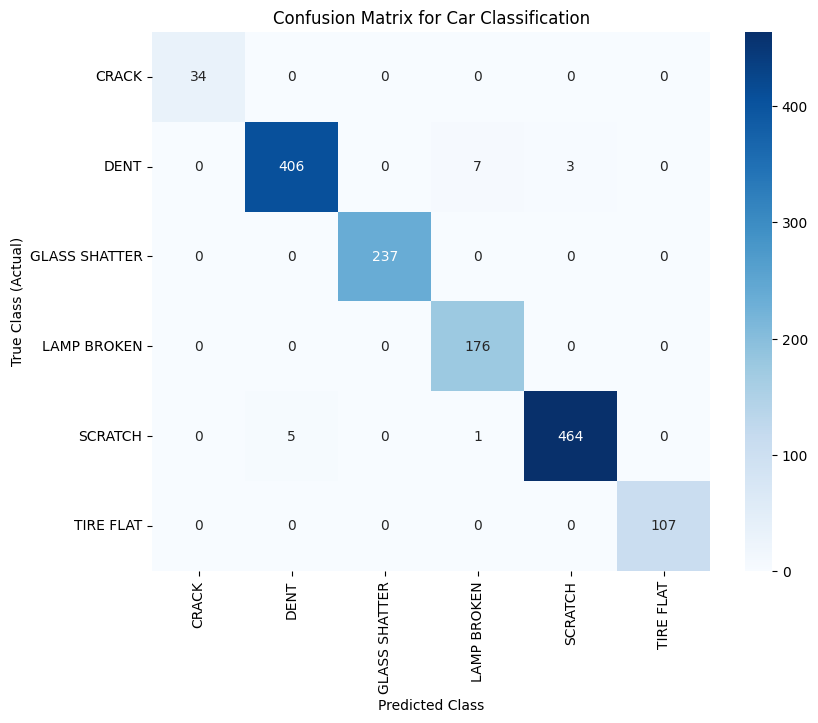

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

classes = ['CRACK', 'DENT', 'GLASS SHATTER', 'LAMP BROKEN', 'SCRATCH', 'TIRE FLAT']

cm = confusion_matrix(
    y_true = np.array(result_df['damage_type']),
    y_pred = np.array(result_df['pred_damage']),
    labels = classes
)

cm_df = pd.DataFrame(cm, index=classes, columns=classes)

# This confusion matrix is still used for main evaluation metrics
plt.figure(figsize=(9, 7))
sns.heatmap(
    cm_df,
    annot=True,
    fmt='d',
    cmap='Blues',
    cbar=True
)

plt.title('Confusion Matrix for Car Classification')
plt.ylabel('True Class (Actual)')
plt.xlabel('Predicted Class')
plt.show()

In [21]:
# Report from scikit-learn library
# Calculates: precision, recall, f1; and the from those: micro average, macro average, and weighted average
report = classification_report(
    y_true = result_df['damage_type'],
    y_pred = result_df['pred_damage'],
    labels = classes,
    zero_division = 0,
    output_dict=True
)
print(report)

report_df = pd.DataFrame.from_dict(report).transpose()
report_df = report_df.round(3)
report_df

{'CRACK': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 34.0}, 'DENT': {'precision': 0.9878345498783455, 'recall': 0.9759615384615384, 'f1-score': 0.9818621523579202, 'support': 416.0}, 'GLASS SHATTER': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 237.0}, 'LAMP BROKEN': {'precision': 0.9565217391304348, 'recall': 1.0, 'f1-score': 0.9777777777777777, 'support': 176.0}, 'SCRATCH': {'precision': 0.9935760171306209, 'recall': 0.9872340425531915, 'f1-score': 0.9903948772678762, 'support': 470.0}, 'TIRE FLAT': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 107.0}, 'accuracy': 0.9888888888888889, 'macro avg': {'precision': 0.989655384356567, 'recall': 0.9938659301691216, 'f1-score': 0.9916724679005956, 'support': 1440.0}, 'weighted avg': {'precision': 0.9890748103387084, 'recall': 0.9888888888888889, 'f1-score': 0.9889091226289484, 'support': 1440.0}}


,precision,recall,f1-score,support
CRACK,1.000,1.000,1.000,34.000
DENT,0.988,0.976,0.982,416.000
GLASS SHATTER,1.000,1.000,1.000,237.000
LAMP BROKEN,0.957,1.000,0.978,176.000
SCRATCH,0.994,0.987,0.990,470.000
TIRE FLAT,1.000,1.000,1.000,107.000
accuracy,0.989,0.989,0.989,0.989
macro avg,0.990,0.994,0.992,1440.000
weighted avg,0.989,0.989,0.989,1440.000


### Download Files
- Downloads the final metrics report as a .csv file for other use


In [22]:
# Downloads report as .csv file
from google.colab import files

OUTPUT_FILE = 'car_damage_metrics.csv'

print("Exportint Metrics to .csv file:")
report_df.to_csv(OUTPUT_FILE, index=True)

print(f'Downloading: {OUTPUT_FILE}')
files.download(OUTPUT_FILE)

Exportint Metrics to .csv file:
Downloading: car_damage_metrics.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>